# Práctica Final Machine Learning 2024

## Importación de librerías

Empiezo instalando e importando las librerías necesarias

In [41]:
%pip install -r requirements.txt

Processing c:\b\abs_1c1a_vjay2\croot\aiobotocore_1682537737724\work (from -r requirements.txt (line 2))
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\b\\abs_1c1a_vjay2\\croot\\aiobotocore_1682537737724\\work'



In [42]:
# %pip install pandas
# %pip install numpy
# %pip install matplotlib
# %pip install seaborn
# %pip install scikit-learn
# %pip install xgboost
# %pip install tensorflow
# %pip install keras
# %pip install torch
# %pip install optuna
# %pip install ipython
# %pip install imbalanced-learn
# %pip install cuda-python
# %pip install cupy-cuda12x

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, davies_bouldin_score, silhouette_score, calinski_harabasz_score, balanced_accuracy_score
from sklearn.cluster import HDBSCAN
from sklearn.decomposition import PCA
import xgboost as xgb
import tensorflow as tf
from tensorflow import keras
import optuna
import joblib
import gc
import logging
from sklearn.neighbors import LocalOutlierFactor
from sklearn.feature_selection import SelectFromModel

## EDA

Empiezo cargando mi set de datos

In [44]:
df = pd.read_csv('./caso_final_small_20k_con_mes.csv')

Muestro algunos datos para poder ver como es el dataset

In [45]:
df.head()

MES    MB_TOTALES  FACTURACION_TOTAL_IMPUESTOS  FACTURACION_CUOTA  \
0  201901    232.121597                    10.186000           0.000000   
1  201911  18280.292969                    32.005001          26.450001   
2  201906   2141.692810                    37.442001          31.400000   
3  202006   3181.986496                    20.001000          16.530000   
4  202001  25626.083984                    37.005001          26.450001   

   SEGUNDOS_LLAMADA_RED_PROPIA  SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA  \
0                       4523.0                                1183.0   
1                      13288.0                                9194.0   
2                         13.0                                  13.0   
3                          0.0                                   0.0   
4                      72783.0                               27609.0   

   SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA  MB_MENSUALES  EDAD  \
0                                  28.0    232.121597  39.0   
1                                  49.0  18280.292969  25.0   
2                                   0.0   2141.692810  47.0   
3                                   0.0   3181.986496  43.0   
4                                 151.0  25626.083984  40.0   

   NUM_LLAMADAS_RED_PROPIA  ...  MINUTOS_LLAMADAS_MENSUALES  NUM_DIAS_BUNDLE  \
0                     54.0  ...                   21.683399                0   
1                    152.0  ...                  166.050007              435   
2                      4.0  ...                  108.850102                0   
3                      0.0  ...                   65.799899                0   
4                    329.0  ...                  519.683305                1   

   KPI_IMPUESTOS  NUM_DESACTIVACIONES  PORCENTAJE_SEGUNDOS_RED_PROPIA  \
0       1.767800                    0                           100.0   
1       5.555000                    0                           100.0   
2       2.042002                    0                           100.0   
3       3.471001                    0                           100.0   
4       5.555000                    0                           100.0   

   SERVICIOS_TOTALES_MARCA  SERVICIOS_TOTALES_POSPAGO  MINUTOS_LLAMADAS_MOVIL  \
0                        2                          1                     0.0   
1                        1                          2                     0.0   
2                        2                          2                     0.0   
3                        2                          3                     0.0   
4                        1                          1                     0.0   

   PENETRACION_FIJO_ZONA  TARGET  
0               0.264612       0  
1               0.380171       0  
2               0.156041       0  
3               0.228810       1  
4               0.210286       1  

[5 rows x 36 columns]

Hago un análisis descriptivo de las variables

In [46]:
df.describe()

MES     MB_TOTALES  FACTURACION_TOTAL_IMPUESTOS  \
count   20000.000000   19741.000000                 19924.000000   
mean   201948.470400   12307.320625                    40.939452   
std        49.255692   20115.499610                    30.326117   
min    201901.000000       0.000000                    -0.002000   
25%    201905.000000    1929.673340                    24.999000   
50%    201911.000000    5931.522949                    33.004000   
75%    202005.000000   16013.454310                    50.124250   
max    202011.000000  853613.593750                  1246.438000   

       FACTURACION_CUOTA  SEGUNDOS_LLAMADA_RED_PROPIA  \
count       19924.000000                 19843.000000   
mean           25.179305                 19282.843471   
std            13.067181                 31773.406451   
min             0.000000                     0.000000   
25%            15.700000                  1777.000000   
50%            23.969999                  8011.000000   
75%            26.460000                 23009.500000   
max           133.890000                584239.000000   

       SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA  \
count                          19843.000000   
mean                           10334.947941   
std                            18971.928733   
min                                0.000000   
25%                              705.500000   
50%                             3631.000000   
75%                            11846.500000   
max                           422724.000000   

       SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA   MB_MENSUALES          EDAD  \
count                          19843.000000   19749.000000  19971.000000   
mean                              62.941239   12288.026161     43.990937   
std                               93.528782   20112.795794     14.125926   
min                                0.000000       0.000000     17.000000   
25%                               11.000000    1915.529785     33.000000   
50%                               36.000000    5898.413086     43.000000   
75%                               82.000000   15967.201660     54.000000   
max                             6220.000000  853613.593750     98.000000   

       NUM_LLAMADAS_RED_PROPIA  ...  MINUTOS_LLAMADAS_MENSUALES  \
count             19843.000000  ...                19749.000000   
mean                156.408456  ...                  361.817034   
std                 227.913588  ...                  543.391221   
min                   0.000000  ...                    0.000000   
25%                  29.000000  ...                   64.999998   
50%                  87.000000  ...                  178.966798   
75%                 199.000000  ...                  443.583287   
max               12497.000000  ...                12316.250395   

       NUM_DIAS_BUNDLE  KPI_IMPUESTOS  NUM_DESACTIVACIONES  \
count     20000.000000   19924.000000          20000.00000   
mean        148.792200       5.657482              0.00785   
std         476.199046       3.552509              0.10435   
min           0.000000      -1.190000              0.00000   
25%           0.000000       3.297000              0.00000   
50%           1.000000       5.034000              0.00000   
75%           2.000000       6.768002              0.00000   
max        4056.000000      93.483509              4.00000   

       PORCENTAJE_SEGUNDOS_RED_PROPIA  SERVICIOS_TOTALES_MARCA  \
count                    19737.000000             20000.000000   
mean                        99.975217                 1.432750   
std                          1.284268                 0.756972   
min                          0.000000                 1.000000   
25%                        100.000000                 1.000000   
50%                        100.000000                 1.000000   
75%                        100.000000                 2.000000   
max                        100.000000                 8.000000   

       SERVICIOS_TOTALE

Y veo los tipos de variables que tengo y cuántos registros tengo de cada

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   MES                                   20000 non-null  int64  
 1   MB_TOTALES                            19741 non-null  float64
 2   FACTURACION_TOTAL_IMPUESTOS           19924 non-null  float64
 3   FACTURACION_CUOTA                     19924 non-null  float64
 4   SEGUNDOS_LLAMADA_RED_PROPIA           19843 non-null  float64
 5   SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA  19843 non-null  float64
 6   SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA  19843 non-null  float64
 7   MB_MENSUALES                          19749 non-null  float64
 8   EDAD                                  19971 non-null  float64
 9   NUM_LLAMADAS_RED_PROPIA               19843 non-null  float64
 10  FACTURACION_TOTAL_SIN_IMPUESTOS       19924 non-null  float64
 11  NUM_LINEAS_PRIN

Para ver los nulos con más precisión, hago la siguiente función y veo cuántos hay por columna

In [48]:
df.isnull().sum()

MES                                        0
MB_TOTALES                               259
FACTURACION_TOTAL_IMPUESTOS               76
FACTURACION_CUOTA                         76
SEGUNDOS_LLAMADA_RED_PROPIA              157
SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA     157
SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA     157
MB_MENSUALES                             251
EDAD                                      29
NUM_LLAMADAS_RED_PROPIA                  157
FACTURACION_TOTAL_SIN_IMPUESTOS           76
NUM_LINEAS_PRIN_POSPAGO                    0
NUM_LINEAS_POSPAGO                         0
NUM_LINEAS_FIJAS                           0
NUM_DIAS_CONVERGENTE                       0
NUM_LINEAS_FIJAS_POSPAGO                   0
NUM_SERVICIOS_POSPAGO                      0
DIAS_PRIMERA_CUENTA                        0
NUM_CANCELACIONES                          0
LLAMADAS_MOVILES                          82
NUM_LINEAS_POSPAGO_TOTAL                   0
TERMINO_FACTURACION                       76
NUM_DESACT

Hago un pequeño gráfico para ver la distribución

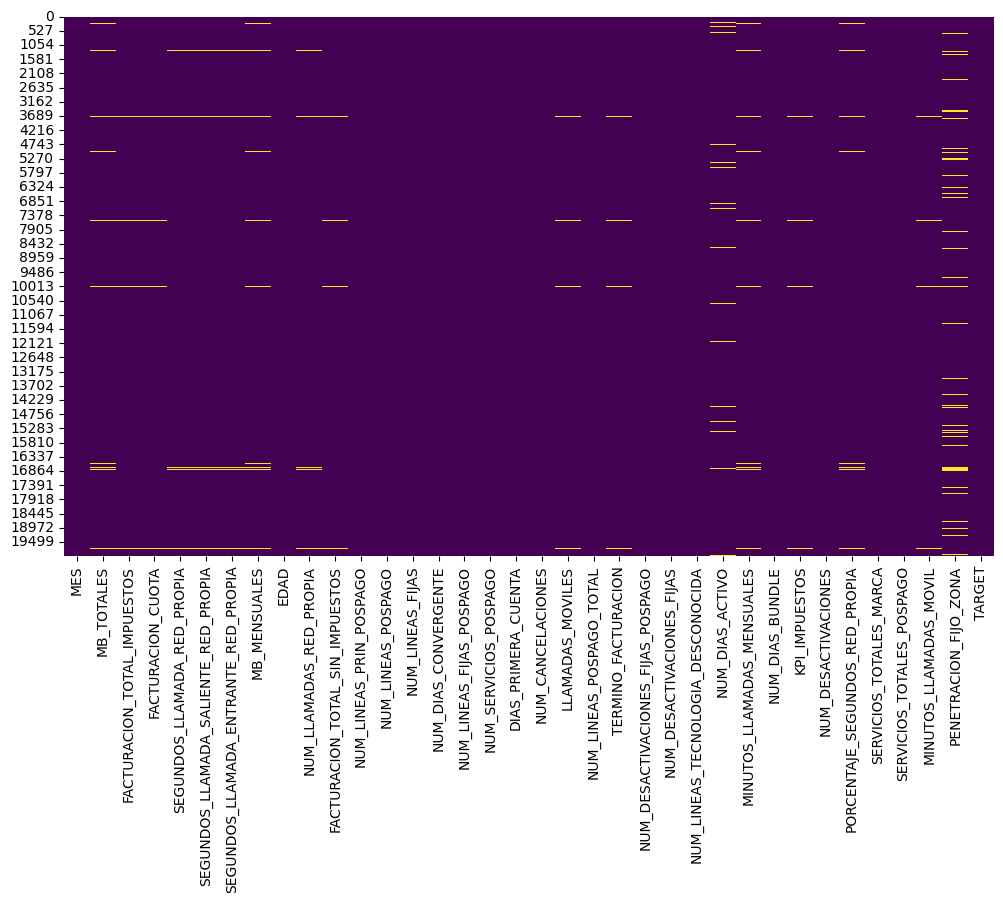

In [49]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

Para ver cuántos outliers tiene cada columna me creo una función y muestro el diccionario resultante

In [50]:
def detect_outliers(df):
    outliers = {}
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        outliers[column] = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))].shape[0]
    return outliers

outliers = detect_outliers(df)
outliers

{'MES': 0,
 'MB_TOTALES': 1291,
 'FACTURACION_TOTAL_IMPUESTOS': 1037,
 'FACTURACION_CUOTA': 1791,
 'SEGUNDOS_LLAMADA_RED_PROPIA': 1807,
 'SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA': 1906,
 'SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA': 1342,
 'MB_MENSUALES': 1298,
 'EDAD': 40,
 'NUM_LLAMADAS_RED_PROPIA': 1425,
 'FACTURACION_TOTAL_SIN_IMPUESTOS': 1010,
 'NUM_LINEAS_PRIN_POSPAGO': 2675,
 'NUM_LINEAS_POSPAGO': 423,
 'NUM_LINEAS_FIJAS': 21,
 'NUM_DIAS_CONVERGENTE': 654,
 'NUM_LINEAS_FIJAS_POSPAGO': 21,
 'NUM_SERVICIOS_POSPAGO': 423,
 'DIAS_PRIMERA_CUENTA': 101,
 'NUM_CANCELACIONES': 1475,
 'LLAMADAS_MOVILES': 42,
 'NUM_LINEAS_POSPAGO_TOTAL': 1966,
 'TERMINO_FACTURACION': 2446,
 'NUM_DESACTIVACIONES_FIJAS_POSPAGO': 47,
 'NUM_DESACTIVACIONES_FIJAS': 47,
 'NUM_LINEAS_TECNOLOGIA_DESCONOCIDA': 423,
 'NUM_DIAS_ACTIVO': 125,
 'MINUTOS_LLAMADAS_MENSUALES': 1589,
 'NUM_DIAS_BUNDLE': 3133,
 'KPI_IMPUESTOS': 988,
 'NUM_DESACTIVACIONES': 132,
 'PORCENTAJE_SEGUNDOS_RED_PROPIA': 30,
 'SERVICIOS_TOTALES_MARCA': 545,

Voy a mostrar la matriz de correlación de las variables para saber con qué me encuentro

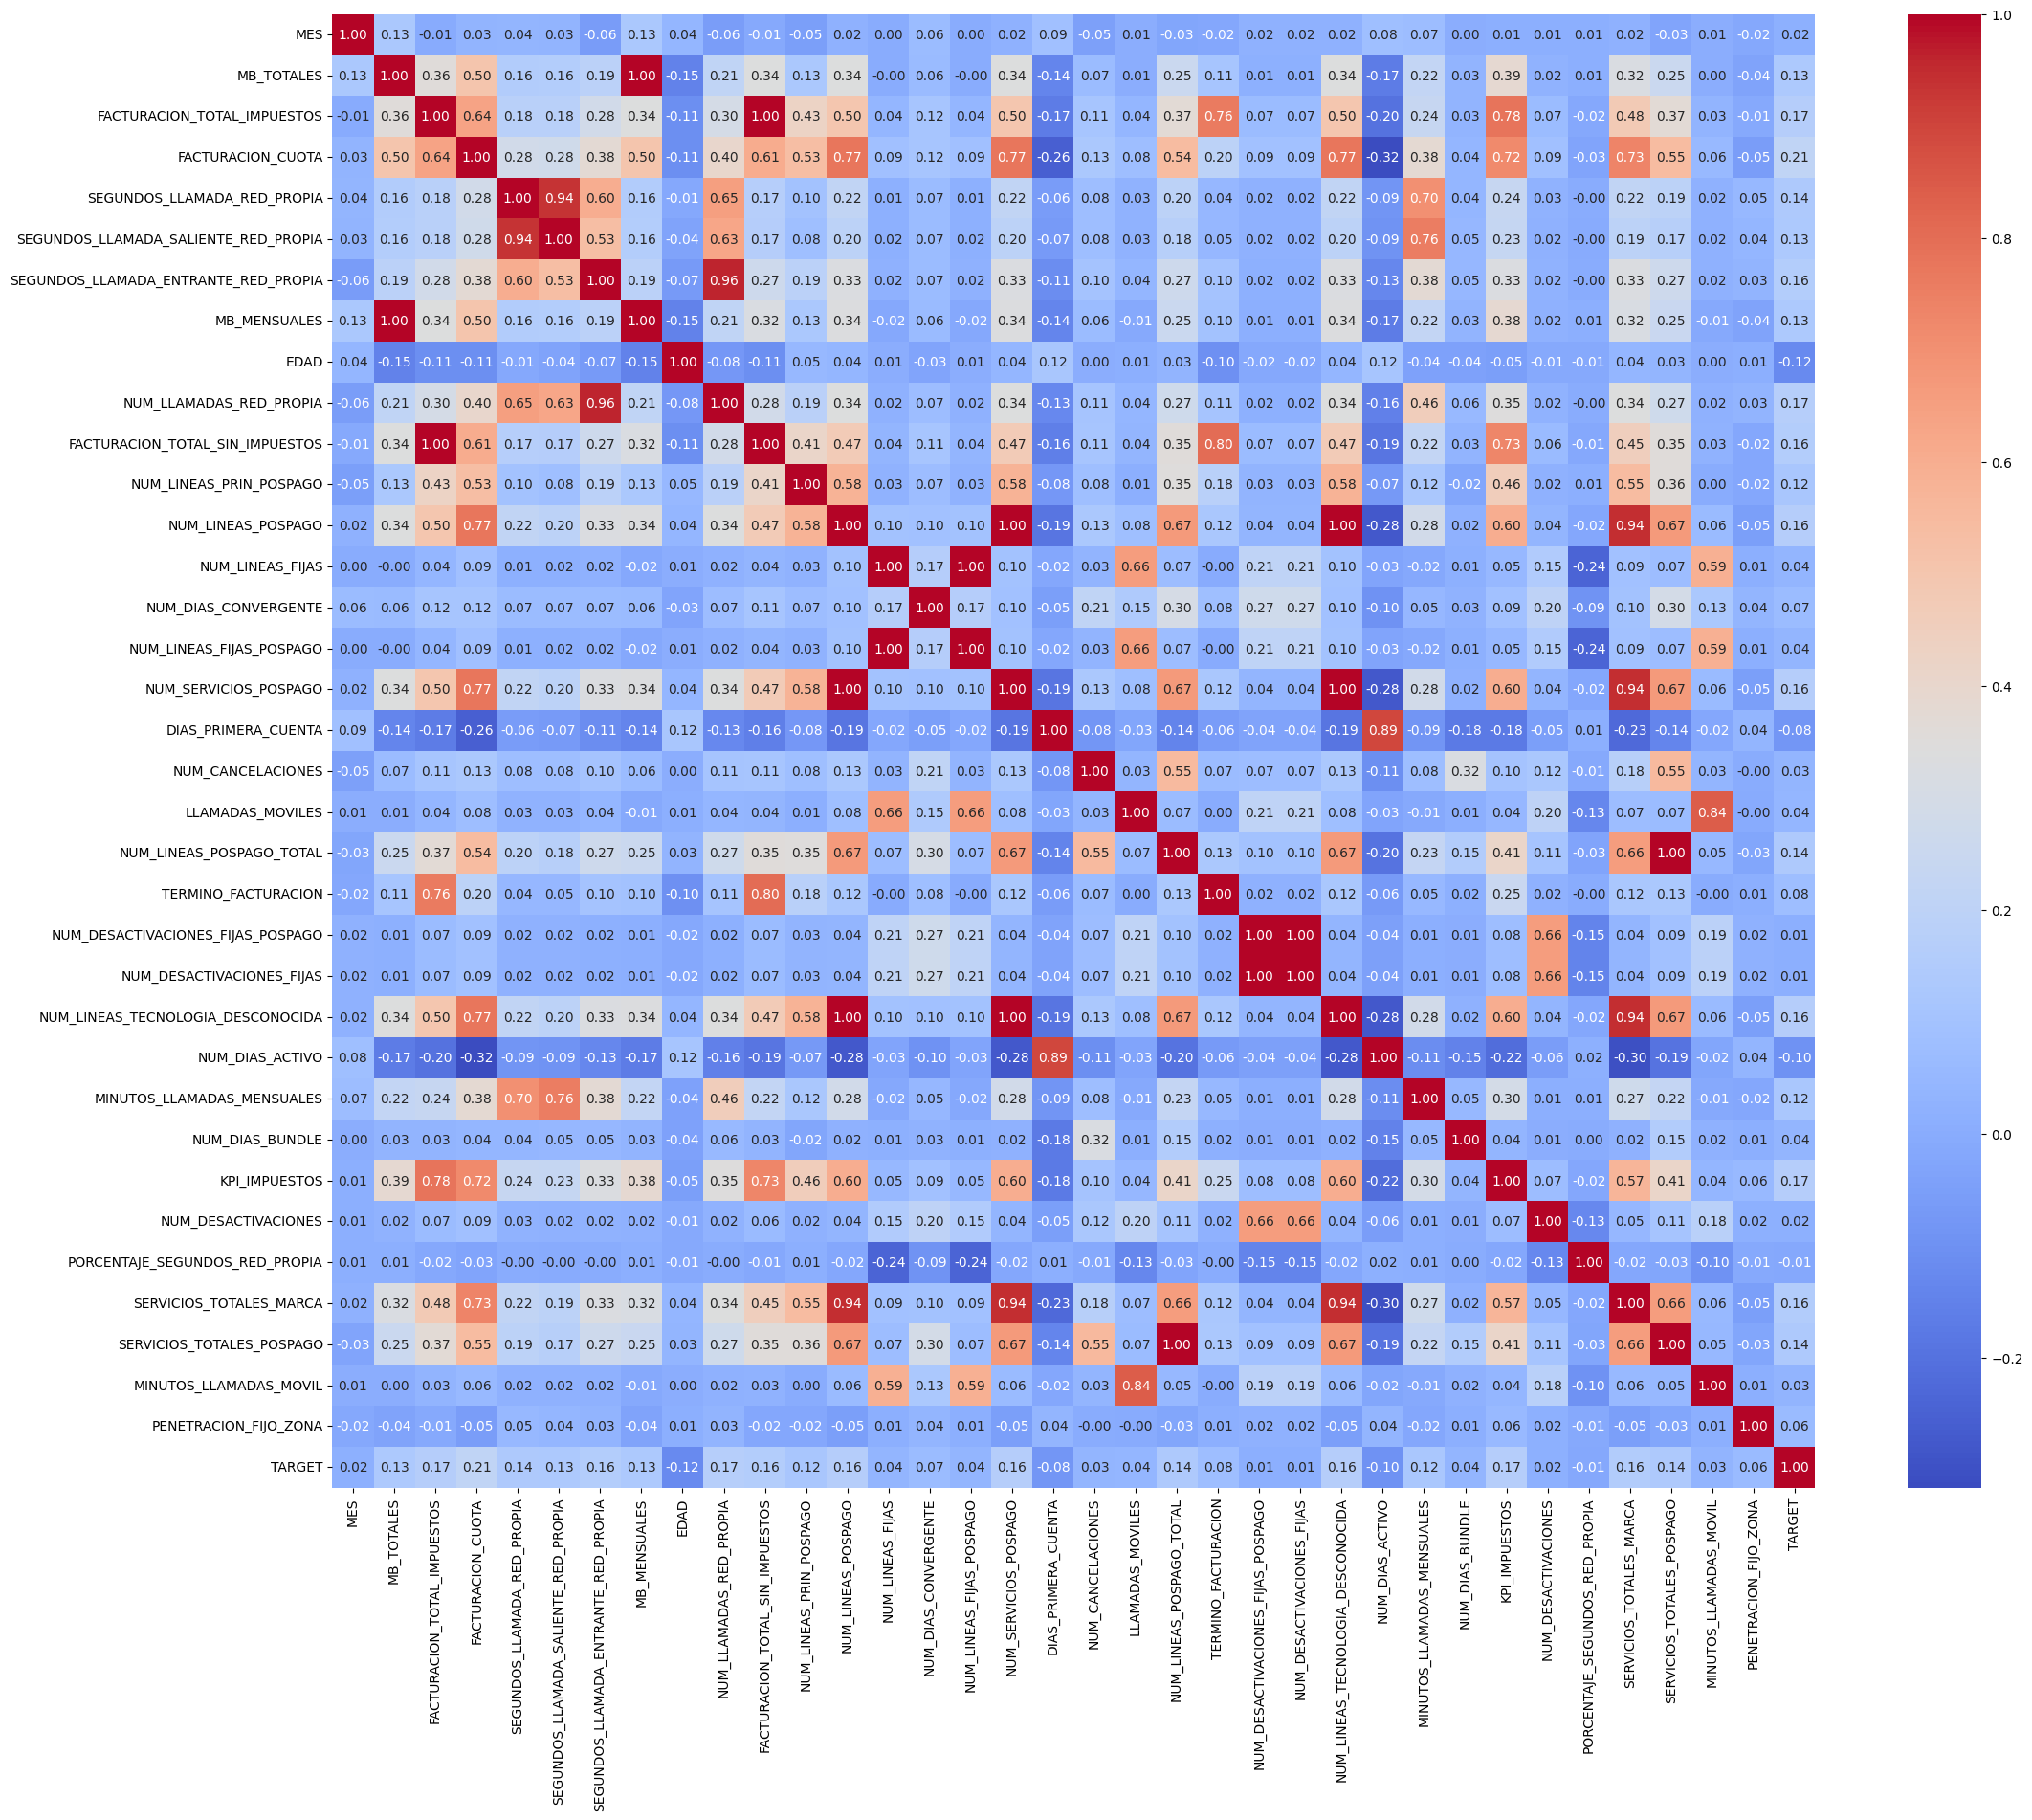

In [51]:
corr_matrix = df.corr()

plt.figure(figsize=(25, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Y finalmente voy a hacer un histograma de las variables del dataframe

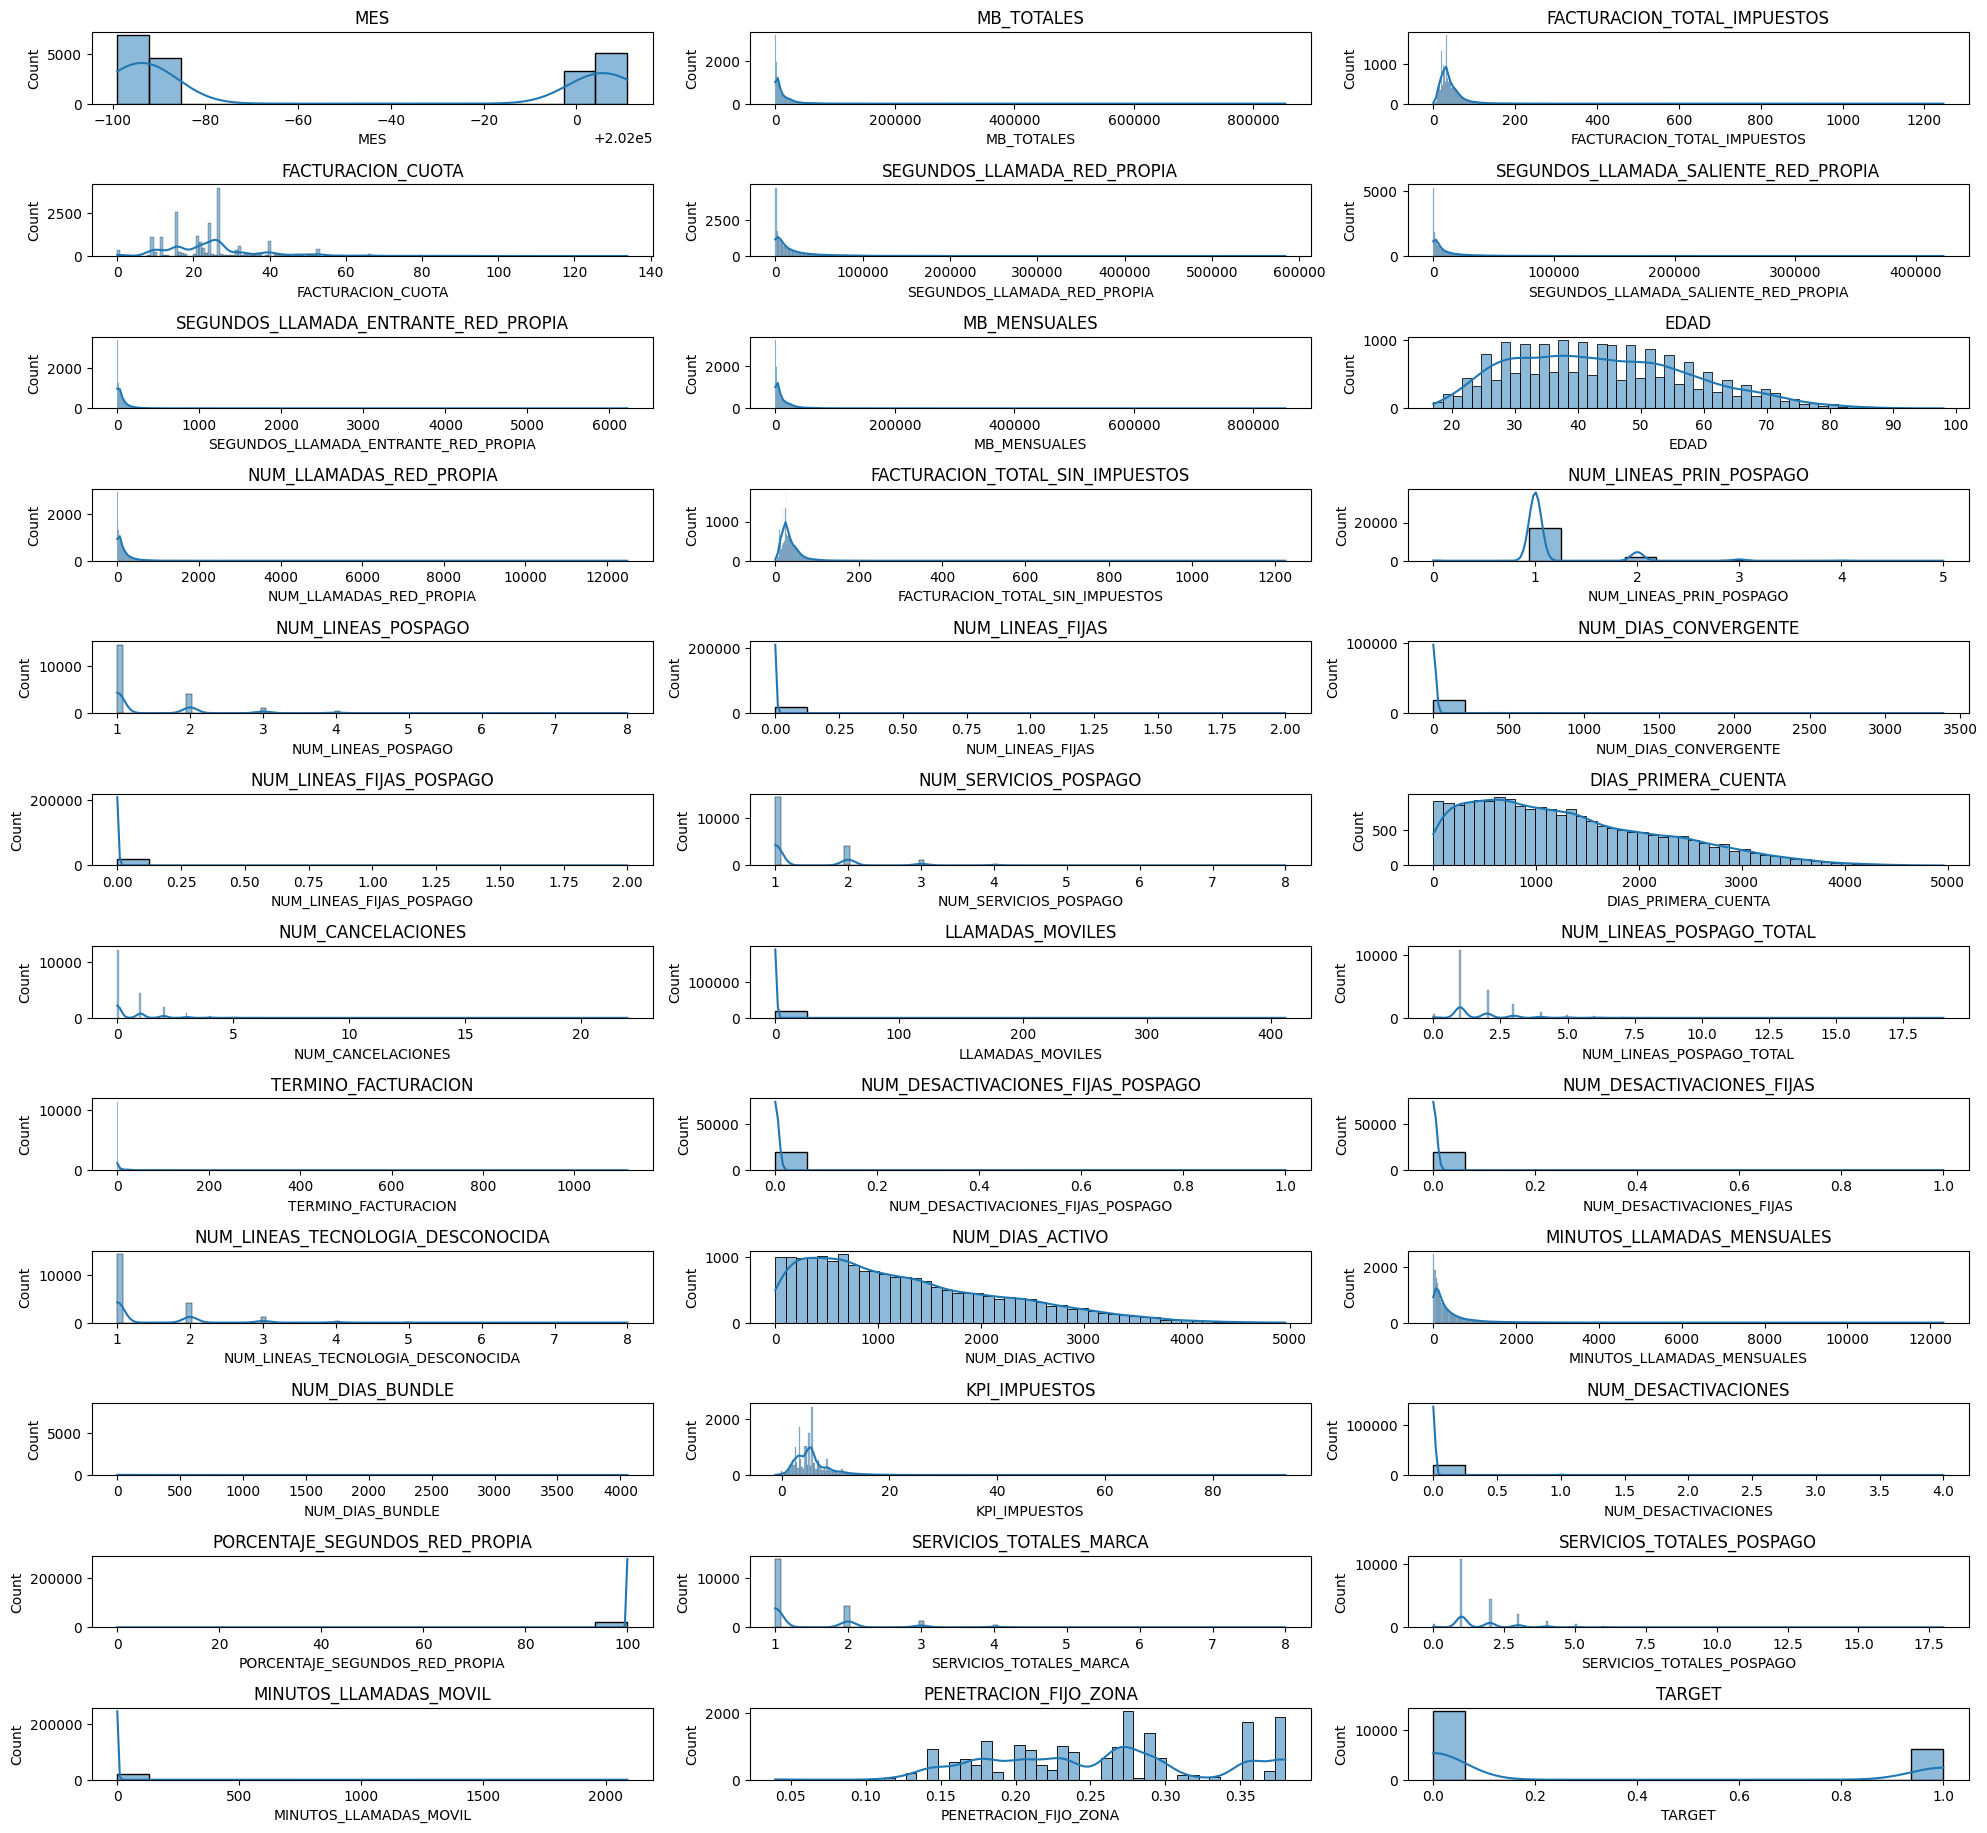

In [52]:
variables = df.columns
ax, fig = plt.subplots(figsize=(20, 35), nrows=23, ncols=3)
fig = fig.flatten()
for i, var in enumerate(variables):
    sns.histplot(df[var], ax=fig[i], kde=True)
    fig[i].set_title(var)
plt.tight_layout()
# delete the unused subplots
for i in range(len(variables), len(fig)):
    fig[i].set_visible(False)
plt.show()

### Detección de variables más importantes

Bien, de algo que he podido darme cuenta es que hay varias variables las cuales la mayoría de sus valores son 0, voy a convertir estas variables en categóricas de manera que si tiene más de un 90% de 0 y tiene menos de 10 valores únicos, la convierto en categórica de manera que si tiene valor 0 será 0 y si es distinto de 0 será 1

In [53]:
def clean_and_convert(df):
    for column in df.columns:
        null_count = df[column].isnull().sum()
        total_count = df.shape[0]
        
        
        ## Esta parte comentada es en la que erróneamente he imputado los valores nulos como 0 o como la media
        # if 0 < null_count < 0.1 * total_count:
        #     df[column] = df[column].fillna(0)
        # elif null_count > 0.8 * total_count:
        #     df[column] = df[column].fillna(0)
        # elif null_count > 0:
        #     df[column] = df[column].fillna(df[column].mean())

        if (df[column] == 0).sum() > 0.9 * total_count and column != 'TARGET':
            df[column] = df[column].apply(lambda x: 0 if x == 0 or x==np.nan else 1)
            if 'NUM' in column:
                new_column_name = column.replace('NUM_', '')
                df.rename(columns={column: new_column_name}, inplace=True)
    
    return df

df = clean_and_convert(df)
df.head()

MES    MB_TOTALES  FACTURACION_TOTAL_IMPUESTOS  FACTURACION_CUOTA  \
0  201901    232.121597                    10.186000           0.000000   
1  201911  18280.292969                    32.005001          26.450001   
2  201906   2141.692810                    37.442001          31.400000   
3  202006   3181.986496                    20.001000          16.530000   
4  202001  25626.083984                    37.005001          26.450001   

   SEGUNDOS_LLAMADA_RED_PROPIA  SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA  \
0                       4523.0                                1183.0   
1                      13288.0                                9194.0   
2                         13.0                                  13.0   
3                          0.0                                   0.0   
4                      72783.0                               27609.0   

   SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA  MB_MENSUALES  EDAD  \
0                                  28.0    232.121597  39.0   
1                                  49.0  18280.292969  25.0   
2                                   0.0   2141.692810  47.0   
3                                   0.0   3181.986496  43.0   
4                                 151.0  25626.083984  40.0   

   NUM_LLAMADAS_RED_PROPIA  ...  MINUTOS_LLAMADAS_MENSUALES  NUM_DIAS_BUNDLE  \
0                     54.0  ...                   21.683399                0   
1                    152.0  ...                  166.050007              435   
2                      4.0  ...                  108.850102                0   
3                      0.0  ...                   65.799899                0   
4                    329.0  ...                  519.683305                1   

   KPI_IMPUESTOS  DESACTIVACIONES  PORCENTAJE_SEGUNDOS_RED_PROPIA  \
0       1.767800                0                           100.0   
1       5.555000                0                           100.0   
2       2.042002                0                           100.0   
3       3.471001                0                           100.0   
4       5.555000                0                           100.0   

   SERVICIOS_TOTALES_MARCA  SERVICIOS_TOTALES_POSPAGO  MINUTOS_LLAMADAS_MOVIL  \
0                        2                          1                       0   
1                        1                          2                       0   
2                        2                          2                       0   
3                        2                          3                       0   
4                        1                          1                       0   

   PENETRACION_FIJO_ZONA  TARGET  
0               0.264612       0  
1               0.380171       0  
2               0.156041       0  
3               0.228810       1  
4               0.210286       1  

[5 rows x 36 columns]

Aquí saco el mes propiamente dicho y el año de la columna "MES", después la columna "MES" la elimino

In [54]:
df['MES'] = pd.to_datetime(df['MES'], format='%Y%m')

df['MES_AÑO'] = df['MES'].dt.year
df['MES_MES'] = df['MES'].dt.month

df = df.drop('MES', axis=1)

### Encontrar variables más importantes

Voy a hacer esto con un árbol de decisión y para ello, primero he de escalarlas adecuadamente (esto lo he hecho directamente en una celda, pero a la hora de explicarlo he decidido partirlo en distintas celdas para una mejor explicación)

Primero divido el dataset en variable dependiente y variables independientes X e y

In [55]:
X = df.drop('TARGET', axis=1)
y = df['TARGET']

Ahora escalo los meses de esta manera, esto lo hago por ser los meses un dato cíclico. En cuanto a los años, he decidido hacer que sean una variable categórica y tener solo el 2020 siendo verdadero o falso

In [56]:
X['MES_SIN'] = np.sin(2 * np.pi * X['MES_MES'] / 12)
X['MES_COS'] = np.cos(2 * np.pi * X['MES_MES'] / 12)
mes_anio = pd.get_dummies(X['MES_AÑO'], drop_first=True)


Uno de nuevo los datos temporales escalados a X

In [57]:
X = pd.concat([X, mes_anio], axis=1)
X = X.drop(['MES_MES', 'MES_AÑO'], axis=1)

Divido el dataset en entrenamiento y prueba

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y, shuffle=True)

Ahora, para poder escalarlo, saco las variables categóricas y las no categóricas

In [59]:
categorical_cols = X_train.select_dtypes(include=['category', 'bool', 'object']).columns
non_categorical_cols = X_train.select_dtypes(exclude=['category', 'bool']).columns

Y escalo las no categóricas

In [60]:
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [61]:
X_train_scaled[non_categorical_cols] = scaler.fit_transform(X_train[non_categorical_cols])
X_test_scaled[non_categorical_cols] = scaler.transform(X_test[non_categorical_cols])

Vuelvo a unir las categóricas con las no categóricas

In [62]:
X_train_final = pd.concat([X_train_scaled[non_categorical_cols], X_train[categorical_cols]], axis=1)
X_test_final = pd.concat([X_test_scaled[non_categorical_cols], X_test[categorical_cols]], axis=1)

Y extraigo los valores para que no haya problemas

In [63]:
X_train_final = X_train_final.values
X_test_final = X_test_final.values

Para ver cuáles son las mejores variables, primero entreno un RandomForest, del que extraeré las variables más importantes

In [64]:
rf = RandomForestClassifier(n_estimators=7000, random_state=42, n_jobs=8)
rf.fit(X_train_final, y_train)

RandomForestClassifier(n_estimators=7000, n_jobs=8, random_state=42)

Aquí hago una pequeña evaluación del modelo

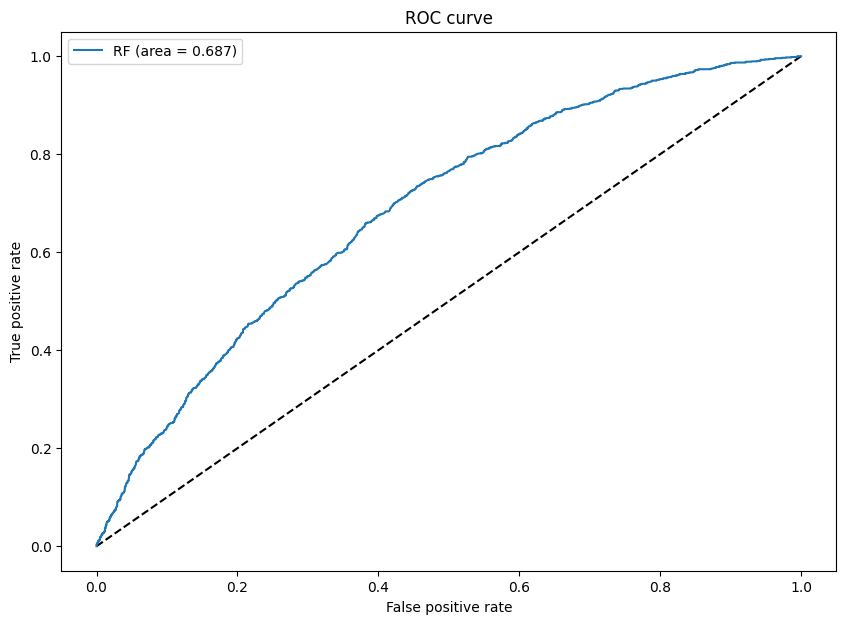

In [65]:
y_pred_rf = rf.predict_proba(X_test_final)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(roc_auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

Y con la clase <a href="https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html">SelectFromModel</a> veo cuáles han sido las variables más importantes para el modelo

In [66]:
sfm = SelectFromModel(rf, threshold=0.01)
sfm.fit(X_train_final, y_train)

selected_features = X_train.columns[sfm.get_support()]

selected_features

Index(['MB_TOTALES', 'FACTURACION_TOTAL_IMPUESTOS', 'FACTURACION_CUOTA',
       'SEGUNDOS_LLAMADA_RED_PROPIA', 'SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA',
       'SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA', 'MB_MENSUALES', 'EDAD',
       'NUM_LLAMADAS_RED_PROPIA', 'FACTURACION_TOTAL_SIN_IMPUESTOS',
       'DIAS_PRIMERA_CUENTA', 'NUM_CANCELACIONES', 'NUM_LINEAS_POSPAGO_TOTAL',
       'TERMINO_FACTURACION', 'NUM_DIAS_ACTIVO', 'MINUTOS_LLAMADAS_MENSUALES',
       'NUM_DIAS_BUNDLE', 'KPI_IMPUESTOS', 'SERVICIOS_TOTALES_POSPAGO',
       'PENETRACION_FIJO_ZONA', 'MES_SIN', 'MES_COS'],
      dtype='object')

In [67]:
df.columns

Index(['MB_TOTALES', 'FACTURACION_TOTAL_IMPUESTOS', 'FACTURACION_CUOTA',
       'SEGUNDOS_LLAMADA_RED_PROPIA', 'SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA',
       'SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA', 'MB_MENSUALES', 'EDAD',
       'NUM_LLAMADAS_RED_PROPIA', 'FACTURACION_TOTAL_SIN_IMPUESTOS',
       'NUM_LINEAS_PRIN_POSPAGO', 'NUM_LINEAS_POSPAGO', 'LINEAS_FIJAS',
       'DIAS_CONVERGENTE', 'LINEAS_FIJAS_POSPAGO', 'NUM_SERVICIOS_POSPAGO',
       'DIAS_PRIMERA_CUENTA', 'NUM_CANCELACIONES', 'LLAMADAS_MOVILES',
       'NUM_LINEAS_POSPAGO_TOTAL', 'TERMINO_FACTURACION',
       'DESACTIVACIONES_FIJAS_POSPAGO', 'DESACTIVACIONES_FIJAS',
       'NUM_LINEAS_TECNOLOGIA_DESCONOCIDA', 'NUM_DIAS_ACTIVO',
       'MINUTOS_LLAMADAS_MENSUALES', 'NUM_DIAS_BUNDLE', 'KPI_IMPUESTOS',
       'DESACTIVACIONES', 'PORCENTAJE_SEGUNDOS_RED_PROPIA',
       'SERVICIOS_TOTALES_MARCA', 'SERVICIOS_TOTALES_POSPAGO',
       'MINUTOS_LLAMADAS_MOVIL', 'PENETRACION_FIJO_ZONA', 'TARGET', 'MES_AÑO',
       'MES_MES'],
      dtyp

Selecciono las columnas a borrar, al ver que el dataset no cuenta con "MES_SIN" ni "MES_COS", saco "MES_MES" que es la columna original junto a "TARGET"

In [68]:
columns_to_drop = [column for column in df.columns if column not in selected_features]
columns_to_drop.remove('MES_MES')
columns_to_drop.remove('TARGET')
df_reduced = df.drop(columns_to_drop, axis=1)

In [69]:
len(df_reduced.columns)

22

Y veo cómo ha quedado mi dataset

In [70]:
df_reduced.head()

MB_TOTALES  FACTURACION_TOTAL_IMPUESTOS  FACTURACION_CUOTA  \
0    232.121597                    10.186000           0.000000   
1  18280.292969                    32.005001          26.450001   
2   2141.692810                    37.442001          31.400000   
3   3181.986496                    20.001000          16.530000   
4  25626.083984                    37.005001          26.450001   

   SEGUNDOS_LLAMADA_RED_PROPIA  SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA  \
0                       4523.0                                1183.0   
1                      13288.0                                9194.0   
2                         13.0                                  13.0   
3                          0.0                                   0.0   
4                      72783.0                               27609.0   

   SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA  MB_MENSUALES  EDAD  \
0                                  28.0    232.121597  39.0   
1                                  49.0  18280.292969  25.0   
2                                   0.0   2141.692810  47.0   
3                                   0.0   3181.986496  43.0   
4                                 151.0  25626.083984  40.0   

   NUM_LLAMADAS_RED_PROPIA  FACTURACION_TOTAL_SIN_IMPUESTOS  ...  \
0                     54.0                         8.418200  ...   
1                    152.0                        26.450001  ...   
2                      4.0                        35.400000  ...   
3                      0.0                        16.530000  ...   
4                    329.0                        31.450001  ...   

   NUM_LINEAS_POSPAGO_TOTAL  TERMINO_FACTURACION  NUM_DIAS_ACTIVO  \
0                         1                  0.0             44.0   
1                         2                  0.0            387.0   
2                         2                  4.0           1389.0   
3                         3                  0.0            154.0   
4                         1                  5.0           2205.0   

   MINUTOS_LLAMADAS_MENSUALES  NUM_DIAS_BUNDLE  KPI_IMPUESTOS  \
0                   21.683399                0       1.767800   
1                  166.050007              435       5.555000   
2                  108.850102                0       2.042002   
3                   65.799899                0       3.471001   
4                  519.683305                1       5.555000   

   SERVICIOS_TOTALES_POSPAGO  PENETRACION_FIJO_ZONA  TARGET  MES_MES  
0                          1               0.264612       0        1  
1                          2               0.380171       0       11  
2                          2               0.156041       0        6  
3                          3               0.228810       1        6  
4                          1               0.210286       1        1  

[5 rows x 22 columns]

Voy a ver la matriz de correlación del nuevo dataset

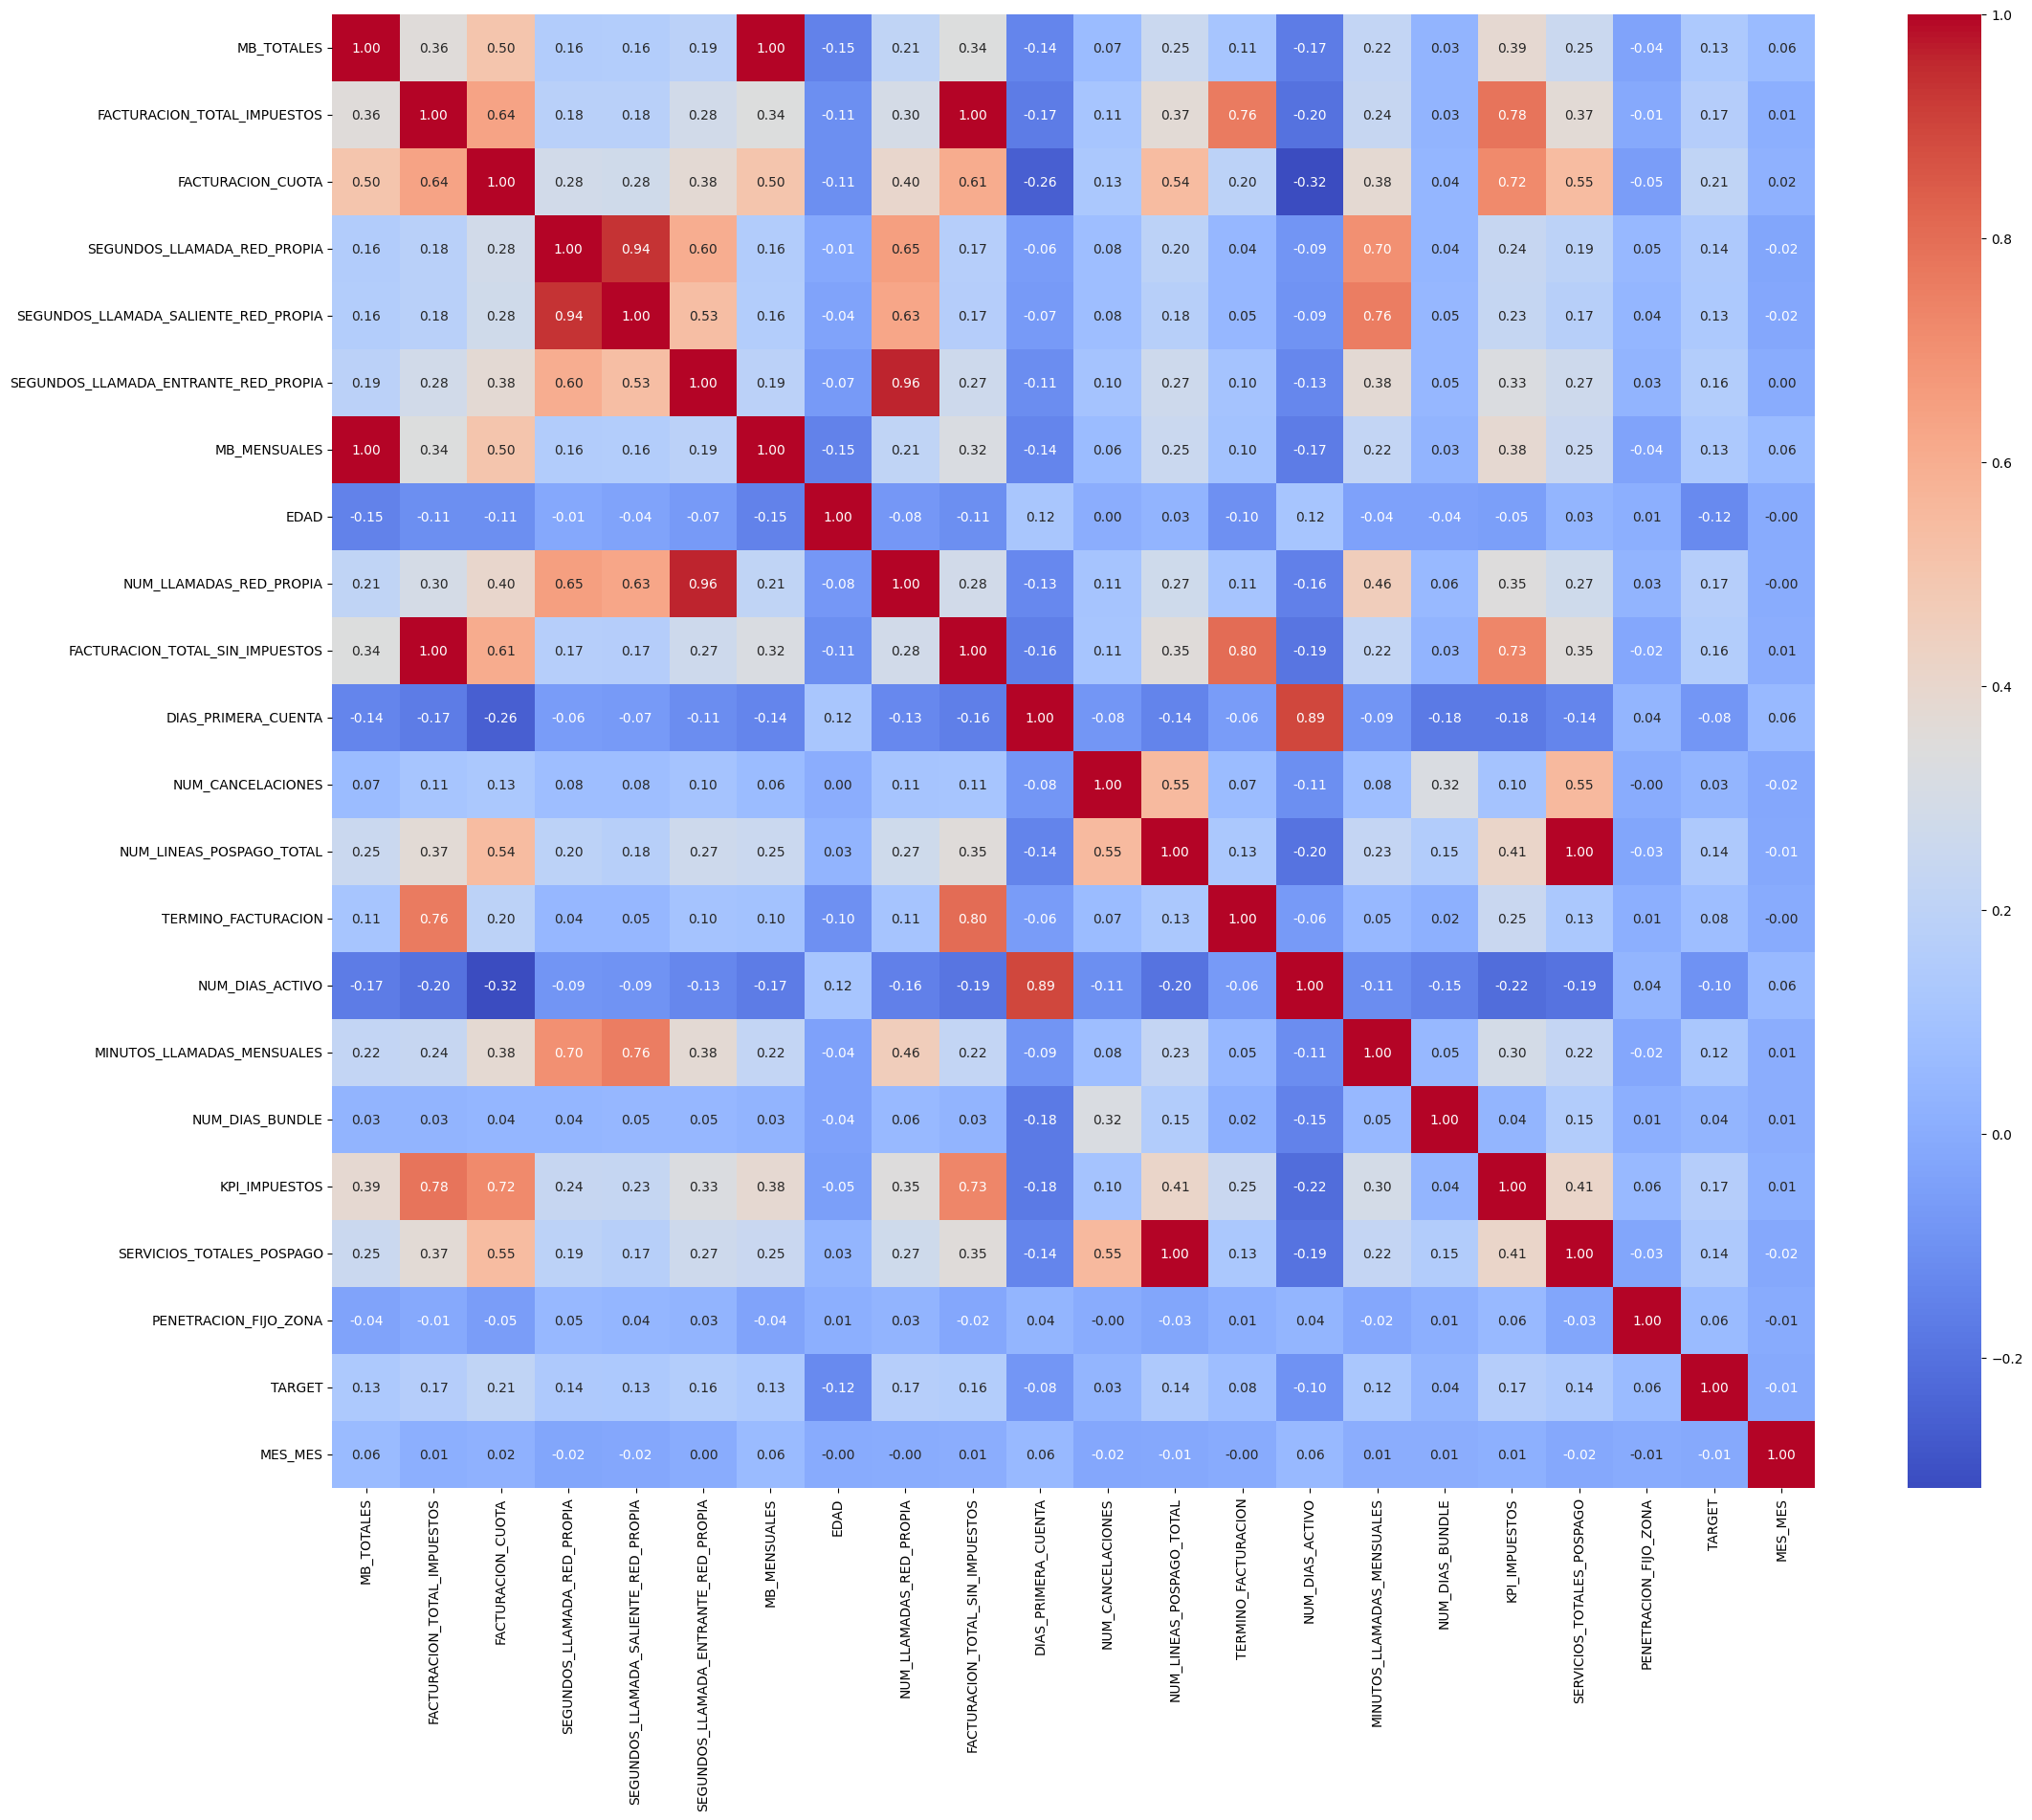

In [71]:
# Matriz de correlación
corr_matrix = df_reduced.corr()

# Heatmap de la matriz de correlación
plt.figure(figsize=(25, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Bien, viendo que hay varias columnas con una correlación mayor a 0.9, voy a eliminar todas aquellas columnas que tengan más de un 0.9 de correlación con otra columna, teniendo cuidado de no eliminar las que sean con ellas mismas y eliminando solo una

In [72]:
corr_threshold = 0.9

columns_to_drop = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > corr_threshold and i != j:
            columns_to_drop.append(corr_matrix.columns[i])
df_reduced = df_reduced.drop(columns=columns_to_drop)

Pinto el histograma de mis nuevas variables

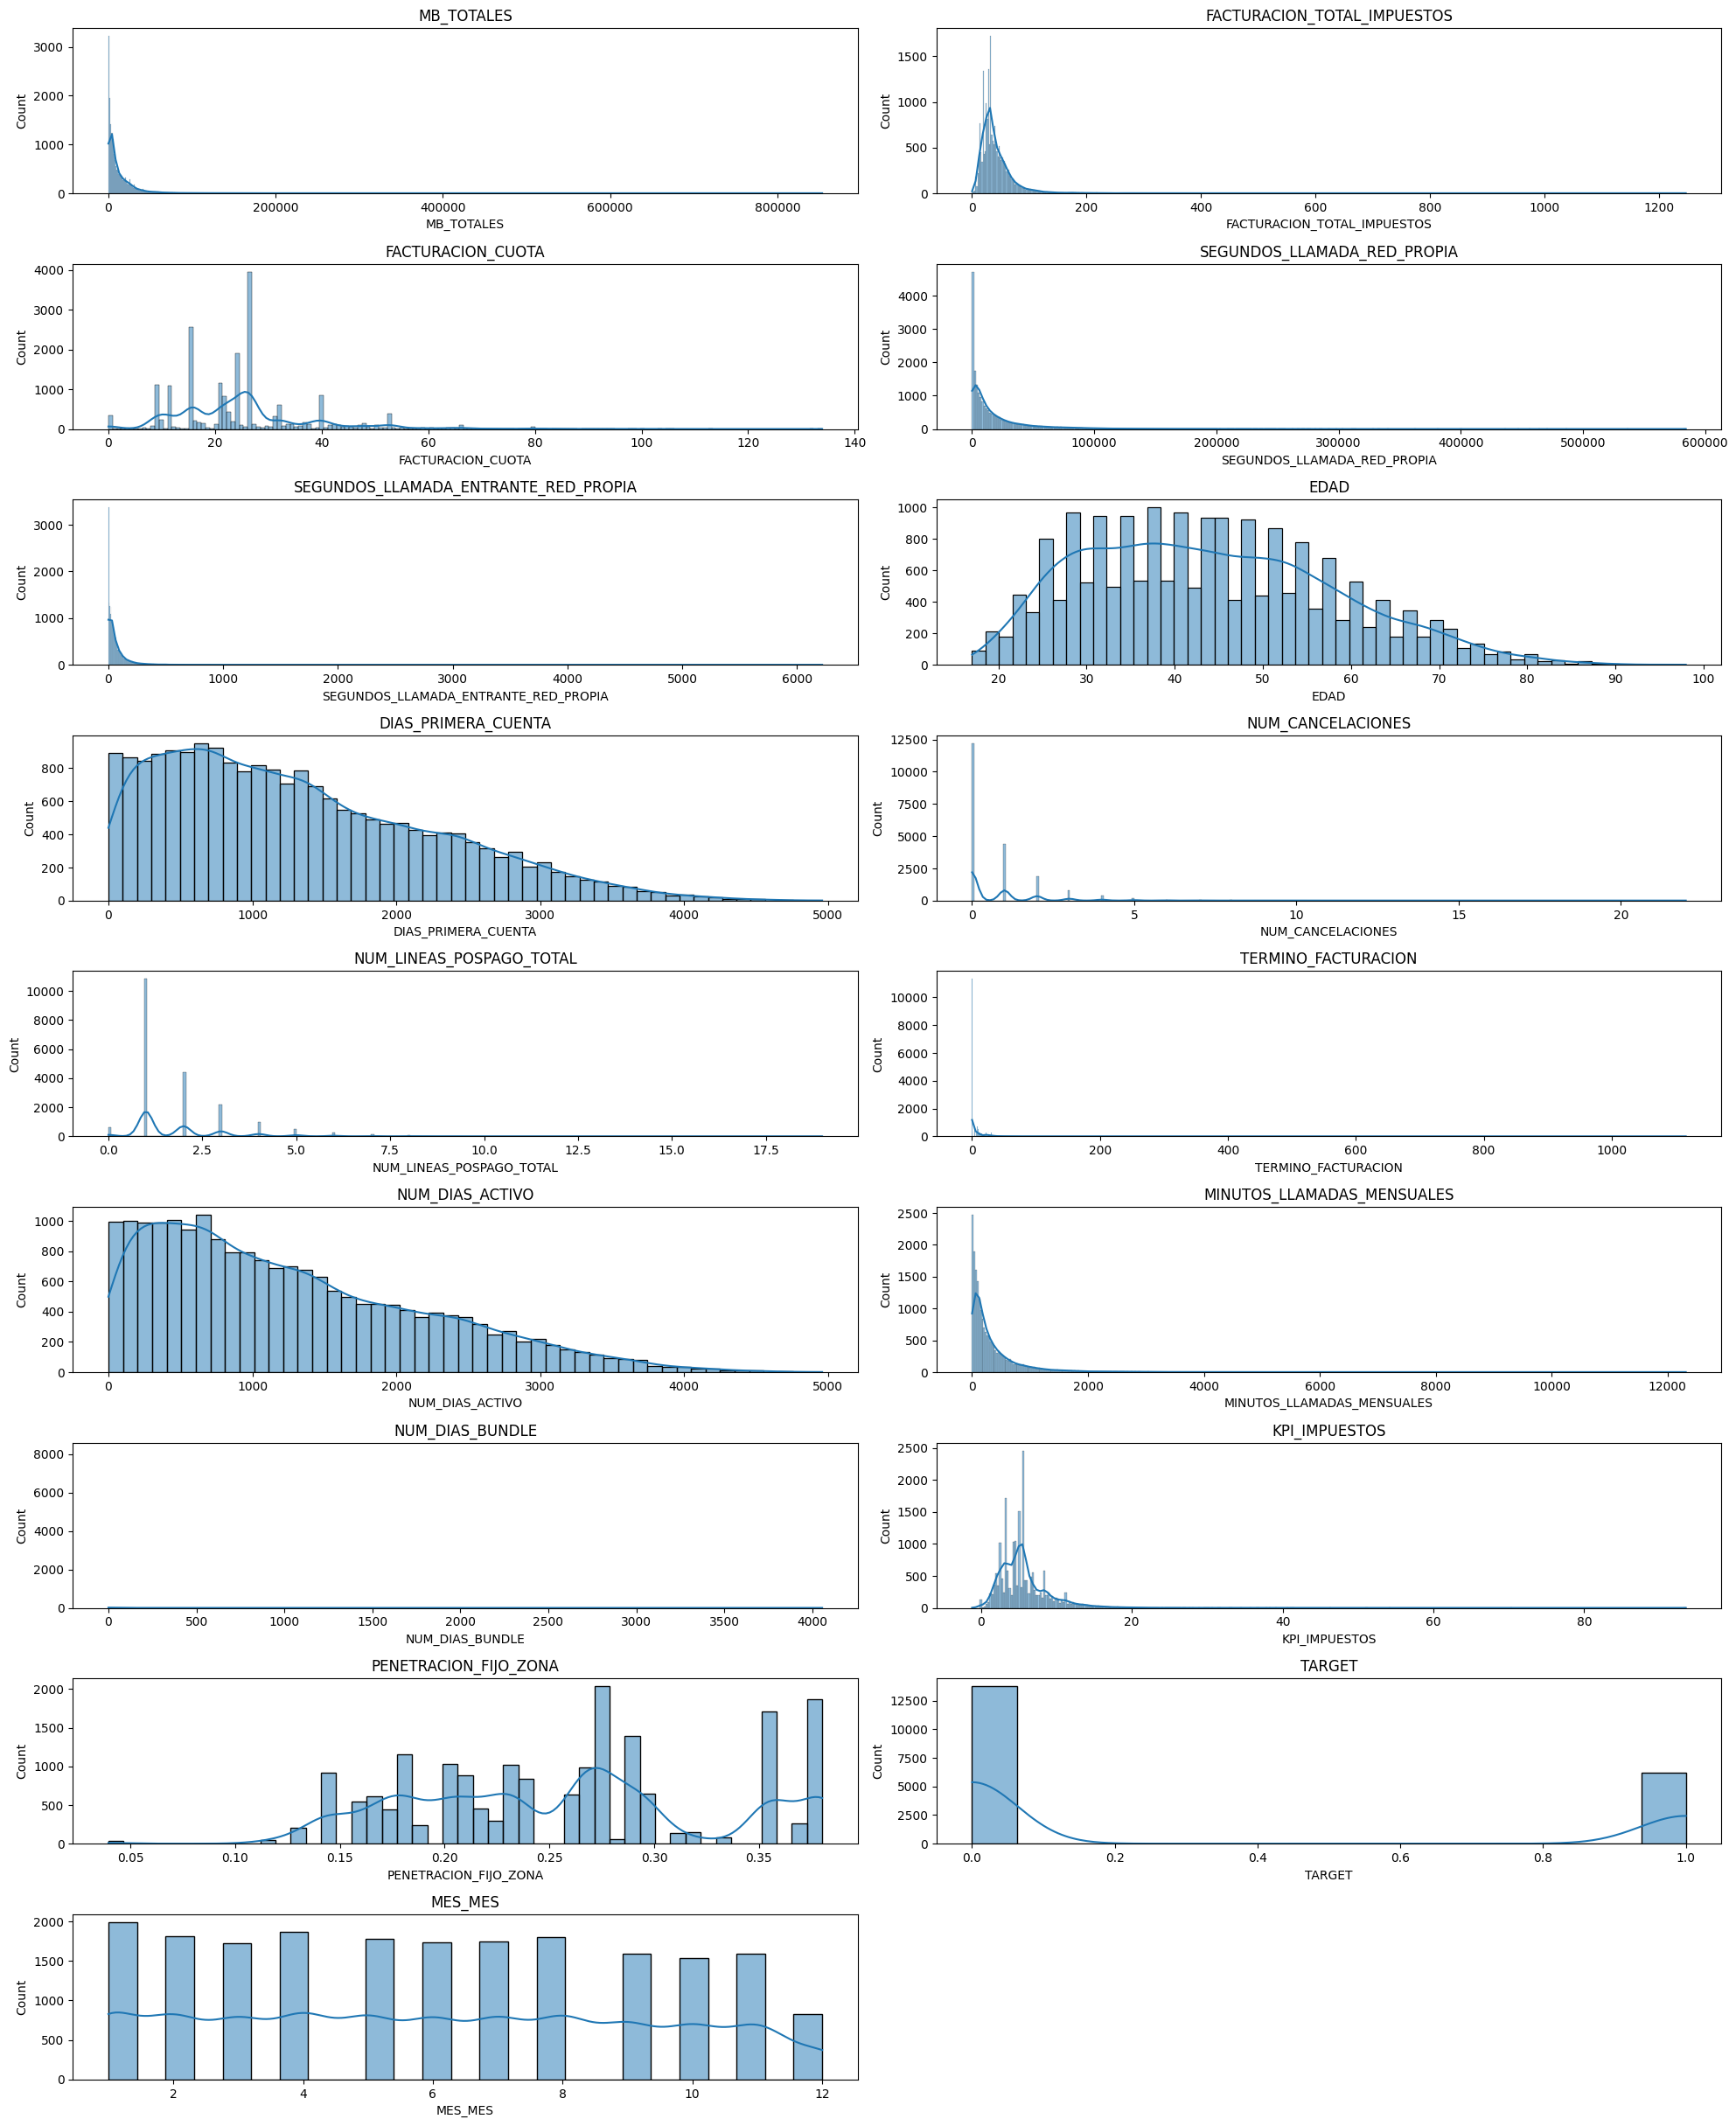

In [73]:
variables = df_reduced.columns
ax, fig = plt.subplots(figsize=(20, 35), nrows=13, ncols=2)
fig = fig.flatten()
for i, var in enumerate(variables):
    sns.histplot(df_reduced[var], ax=fig[i], kde=True)
    fig[i].set_title(var)
plt.tight_layout()
# delete the unused subplots
for i in range(len(variables), len(fig)):
    fig[i].set_visible(False)
plt.show()

Y el boxplot de las mismas

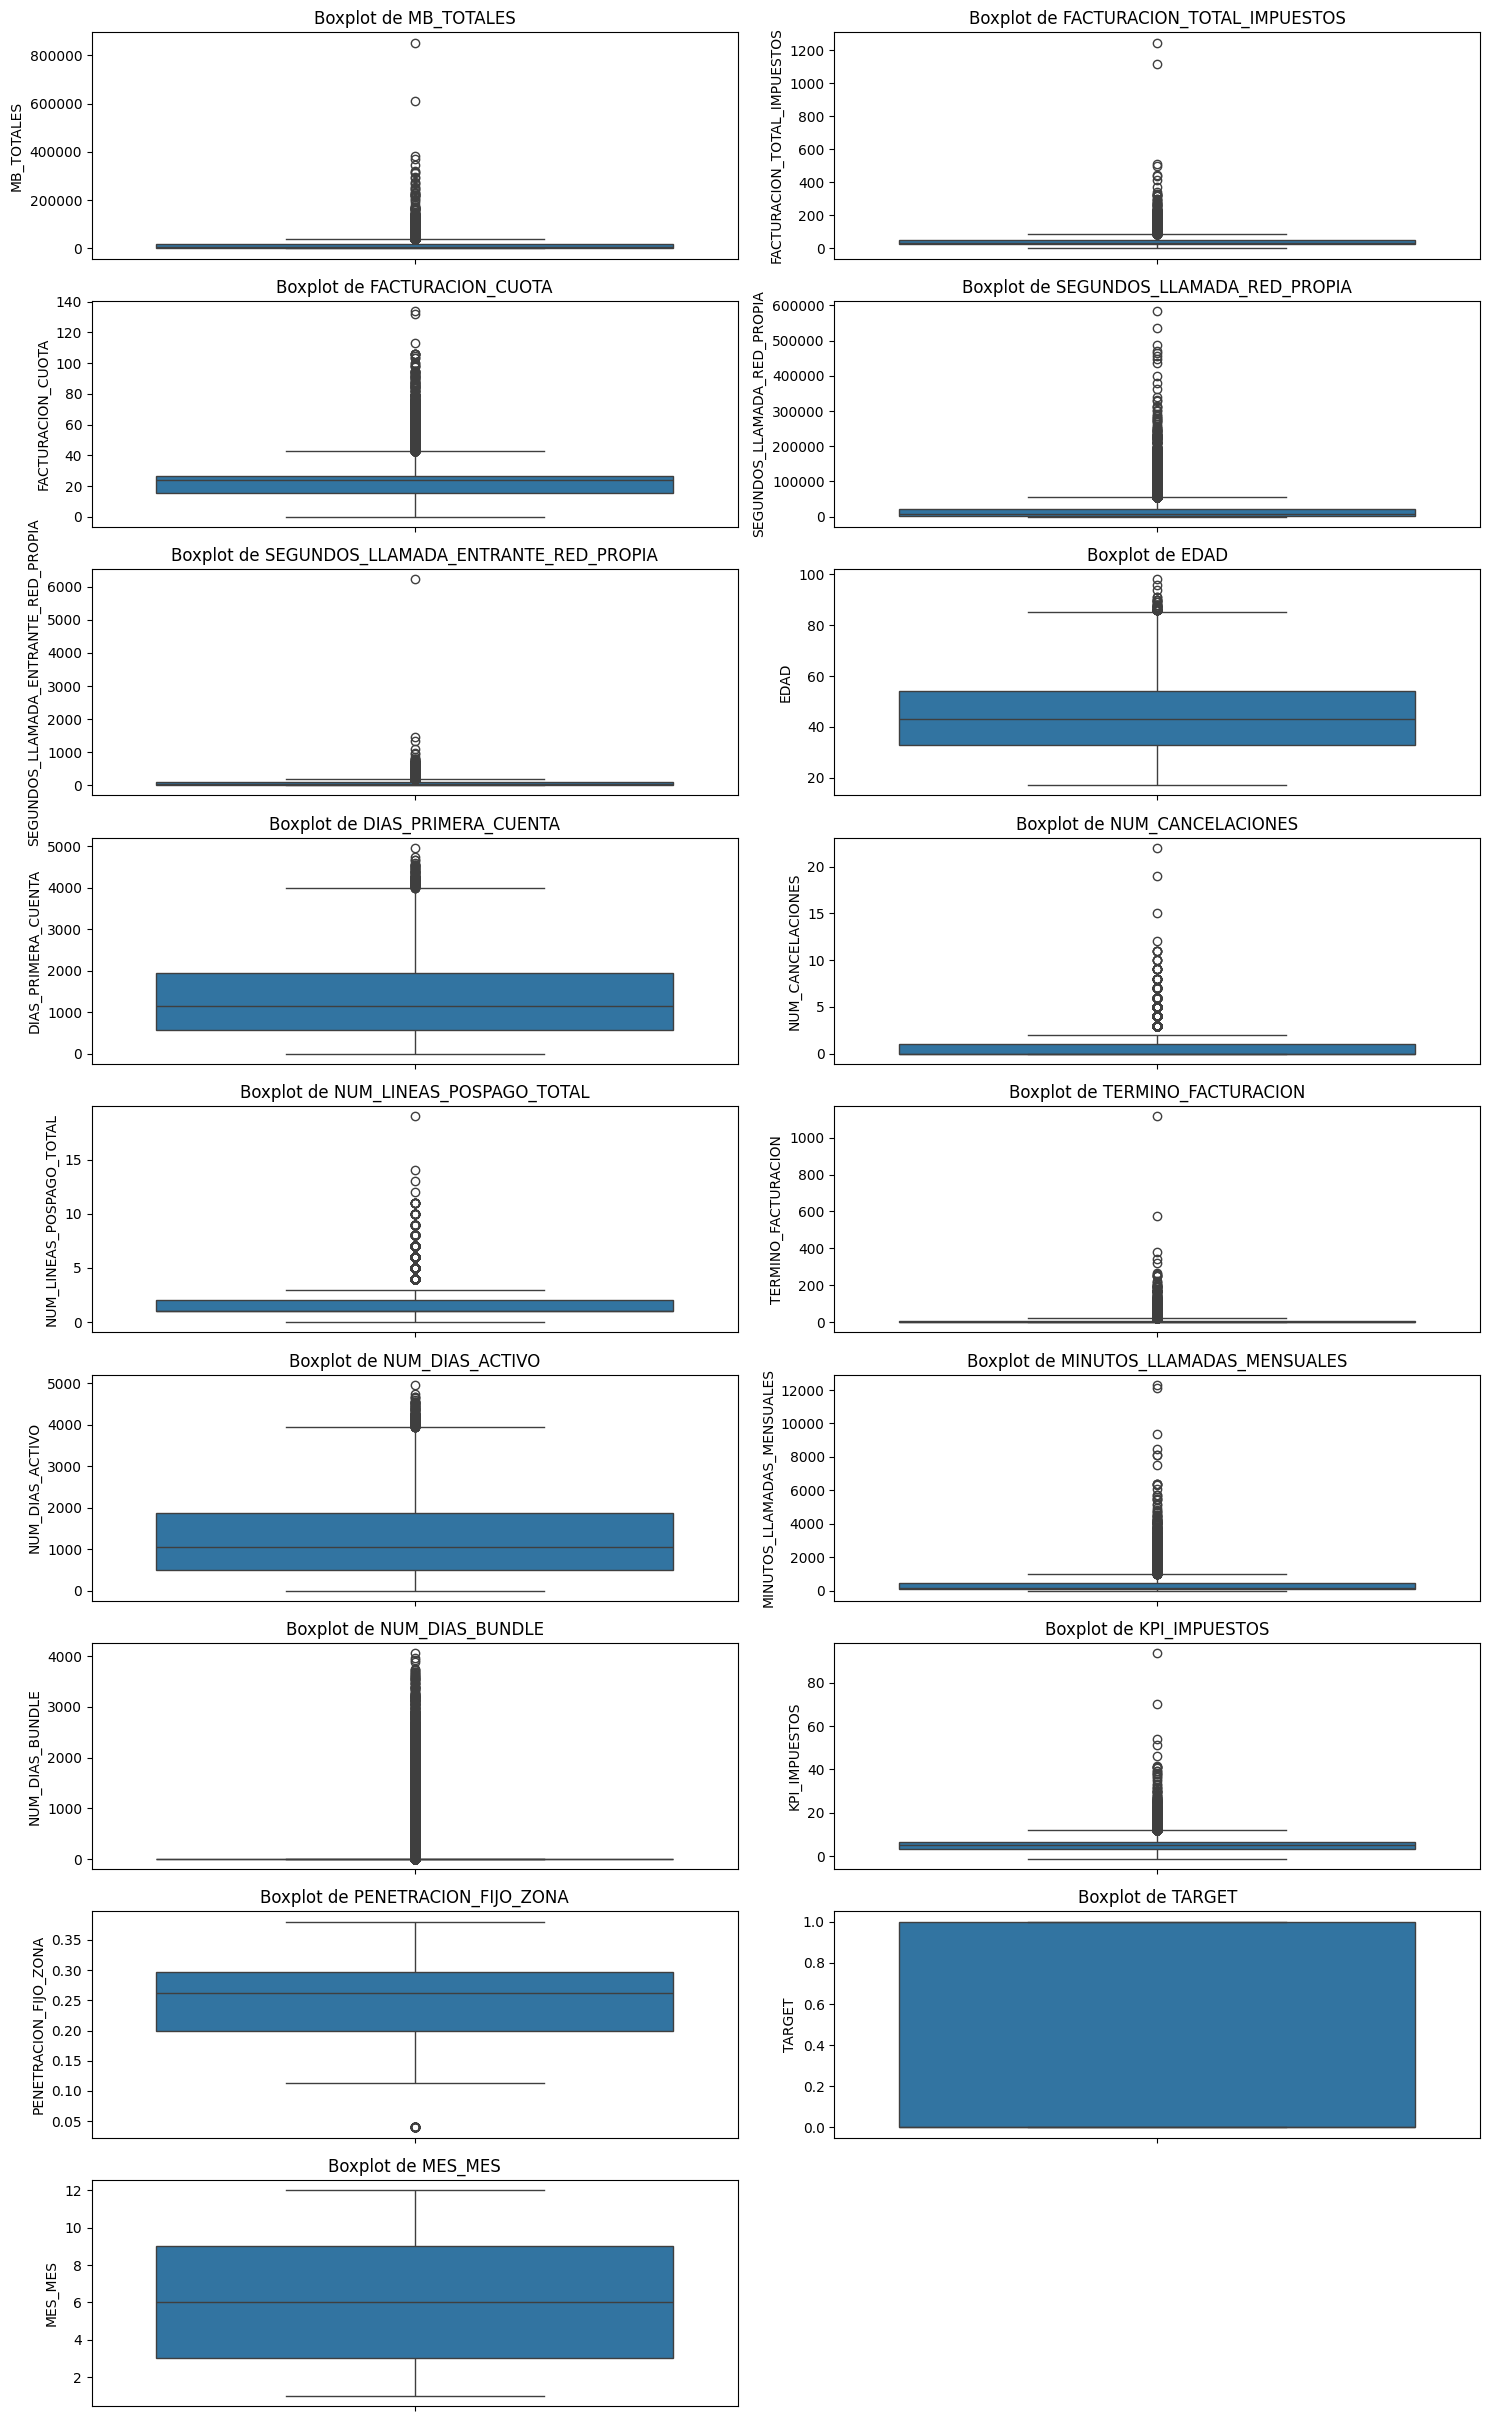

In [74]:
plt.figure(figsize=(15, 35))
for i, column in enumerate(variables, 1):
    plt.subplot(13, 2, i)
    sns.boxplot(y=df_reduced[column])
    plt.title(f'Boxplot de {column}')
plt.tight_layout()
plt.show()

Finalmente veo mi dataset final

In [75]:
df_reduced.shape

(20000, 17)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3076\427259312.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0], x='MES_MES', data=df_reduced[df_reduced['TARGET'] == 0], palette='viridis')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_3076\427259312.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[1], x='MES_MES', data=df_reduced[df_reduced['TARGET'] == 1], palette='magma')


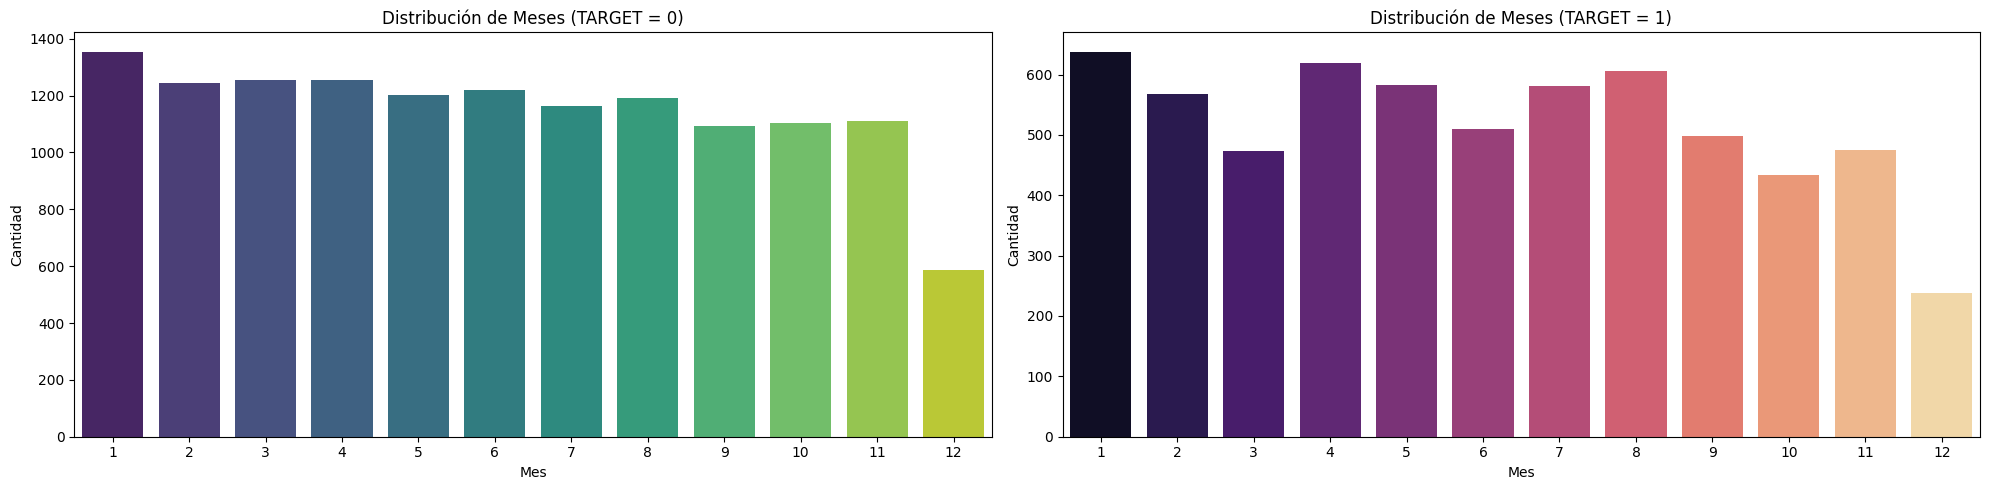

In [76]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

sns.countplot(ax=axes[0], x='MES_MES', data=df_reduced[df_reduced['TARGET'] == 0], palette='viridis')
axes[0].set_title('Distribución de Meses (TARGET = 0)')
axes[0].set_xlabel('Mes')
axes[0].set_ylabel('Cantidad')

sns.countplot(ax=axes[1], x='MES_MES', data=df_reduced[df_reduced['TARGET'] == 1], palette='magma')
axes[1].set_title('Distribución de Meses (TARGET = 1)')
axes[1].set_xlabel('Mes')
axes[1].set_ylabel('Cantidad')

plt.tight_layout()
plt.show()

### Relleno de nulos

Primero veo cuántos nulos tengo

In [77]:
df_reduced.isnull().sum()

MB_TOTALES                               259
FACTURACION_TOTAL_IMPUESTOS               76
FACTURACION_CUOTA                         76
SEGUNDOS_LLAMADA_RED_PROPIA              157
SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA     157
EDAD                                      29
DIAS_PRIMERA_CUENTA                        0
NUM_CANCELACIONES                          0
NUM_LINEAS_POSPAGO_TOTAL                   0
TERMINO_FACTURACION                       76
NUM_DIAS_ACTIVO                          550
MINUTOS_LLAMADAS_MENSUALES               251
NUM_DIAS_BUNDLE                            0
KPI_IMPUESTOS                             76
PENETRACION_FIJO_ZONA                   1323
TARGET                                     0
MES_MES                                    0
dtype: int64

Bien, para el relleno de nulos usaré la clase <a href="https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html">IterativeImputer</a> que usa <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.BayesianRidge.html#bayesianridge">BayesianRidge</a> para predecir los nulos basado en el resto de variables

In [78]:
target = df_reduced['TARGET']
features = df_reduced.drop('TARGET', axis=1)

imputer = IterativeImputer(max_iter=10000, random_state=42, initial_strategy='median', verbose=1)
features_imputed = pd.DataFrame(imputer.fit_transform(features), columns=features.columns)

df_imputed = features_imputed.copy()
df_imputed['TARGET'] = target.values

[IterativeImputer] Completing matrix with shape (20000, 16)
[IterativeImputer] Change: 26438.015263034416, scaled tolerance: 853.6135937500001 
[IterativeImputer] Change: 9773.29101015985, scaled tolerance: 853.6135937500001 
[IterativeImputer] Change: 5975.924897818698, scaled tolerance: 853.6135937500001 
[IterativeImputer] Change: 3389.9469258919157, scaled tolerance: 853.6135937500001 
[IterativeImputer] Change: 1915.885949707194, scaled tolerance: 853.6135937500001 
[IterativeImputer] Change: 1155.8532003340886, scaled tolerance: 853.6135937500001 
[IterativeImputer] Change: 865.0630404821961, scaled tolerance: 853.6135937500001 
[IterativeImputer] Change: 682.5635070070297, scaled tolerance: 853.6135937500001 
[IterativeImputer] Early stopping criterion reached.


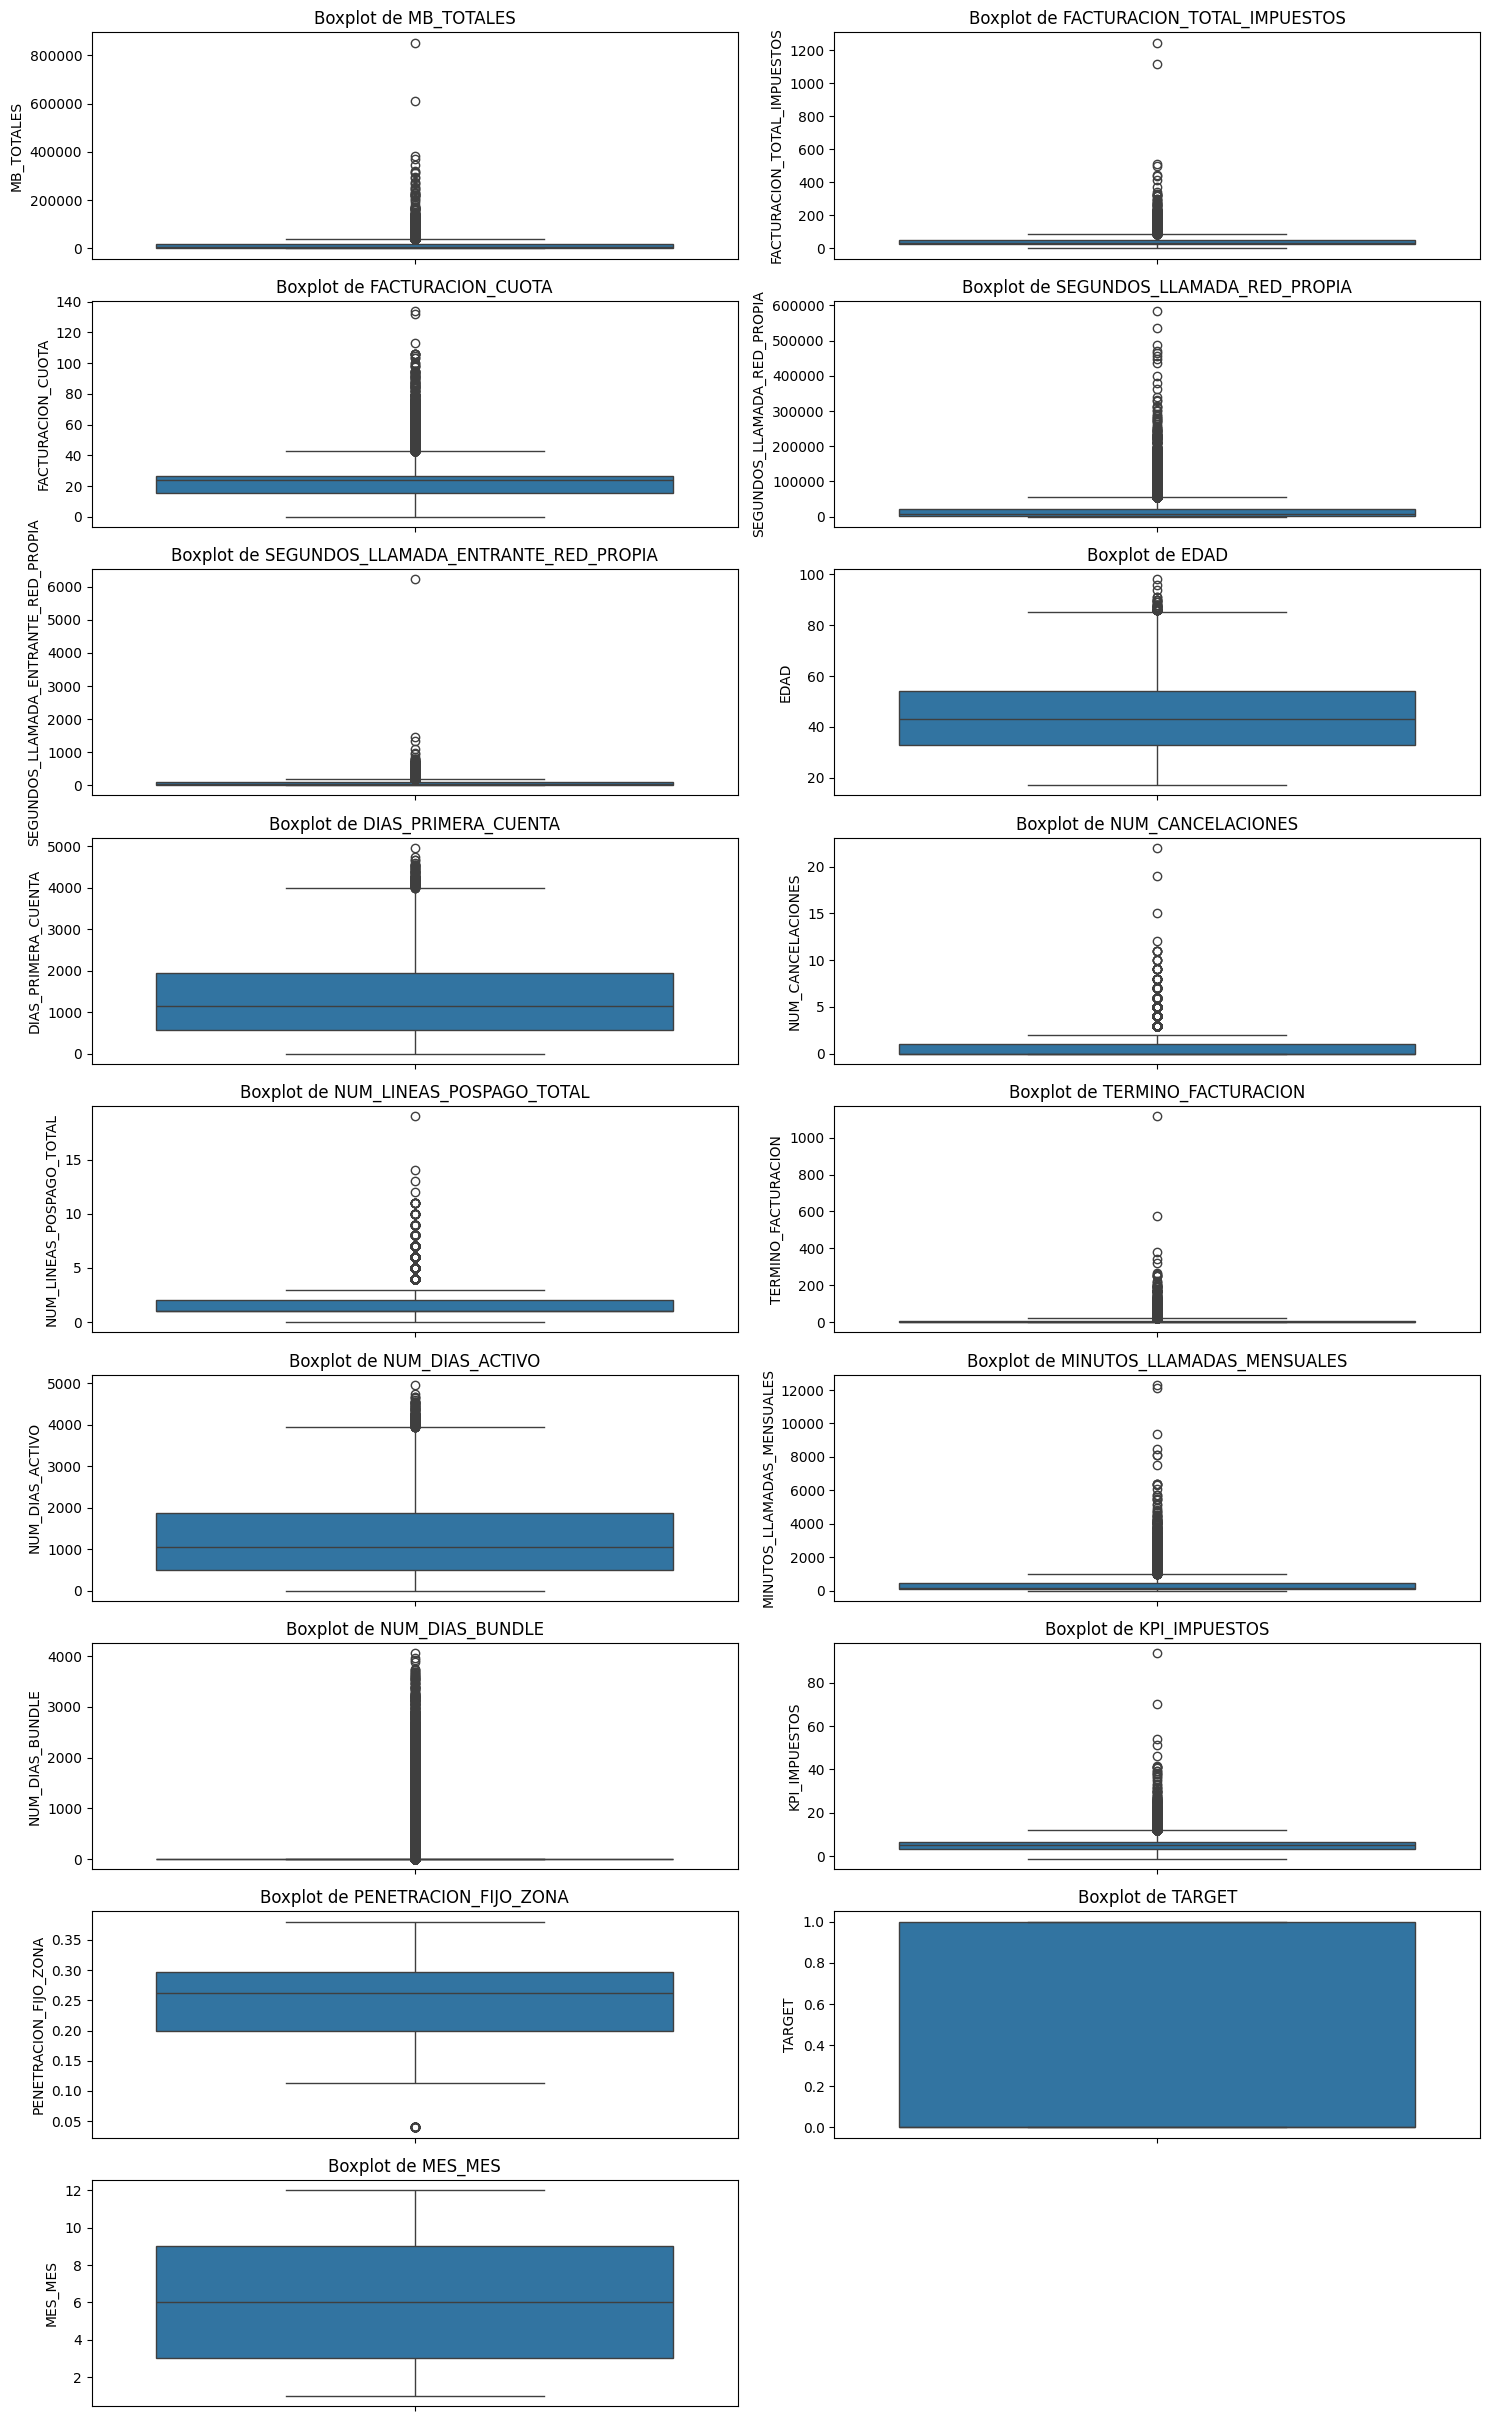

In [ ]:
plt.figure(figsize=(15, 35))
for i, column in enumerate(variables, 1):
    plt.subplot(13, 2, i)
    sns.boxplot(y=df_reduced[column])
    plt.title(f'Boxplot de {column}')
plt.tight_layout()
plt.show()

Esta parte es previo a darme cuenta del error, por desgracia ya lo he ejecutado pero había varias edades con valores 0

Elimino las filas cuya edad es 0

In [ ]:
df_imputed = df_imputed[df_imputed['EDAD'] != 0]

Compruebo que no haya nulos

In [79]:
df_imputed.isnull().sum()

MB_TOTALES                              0
FACTURACION_TOTAL_IMPUESTOS             0
FACTURACION_CUOTA                       0
SEGUNDOS_LLAMADA_RED_PROPIA             0
SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA    0
EDAD                                    0
DIAS_PRIMERA_CUENTA                     0
NUM_CANCELACIONES                       0
NUM_LINEAS_POSPAGO_TOTAL                0
TERMINO_FACTURACION                     0
NUM_DIAS_ACTIVO                         0
MINUTOS_LLAMADAS_MENSUALES              0
NUM_DIAS_BUNDLE                         0
KPI_IMPUESTOS                           0
PENETRACION_FIJO_ZONA                   0
MES_MES                                 0
TARGET                                  0
dtype: int64

Veo mi nuevo número de filas

In [40]:
df_imputed.shape

(19971, 17)

Elimino los outliers con la clase <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html#localoutlierfactor">LocalOutlierFactor</a>

In [41]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

yhat = lof.fit_predict(df_imputed)

mask = yhat != -1
df_cleaned = df_imputed[mask]

print(f"Outliers detectados y eliminados: {np.sum(yhat == -1)}")
print(f"Datos restantes después de la limpieza: {df_cleaned.shape[0]}")

Outliers detectados y eliminados: 1997
Datos restantes después de la limpieza: 17974


Y pinto los boxplots e histogramas de mi nuevo dataset

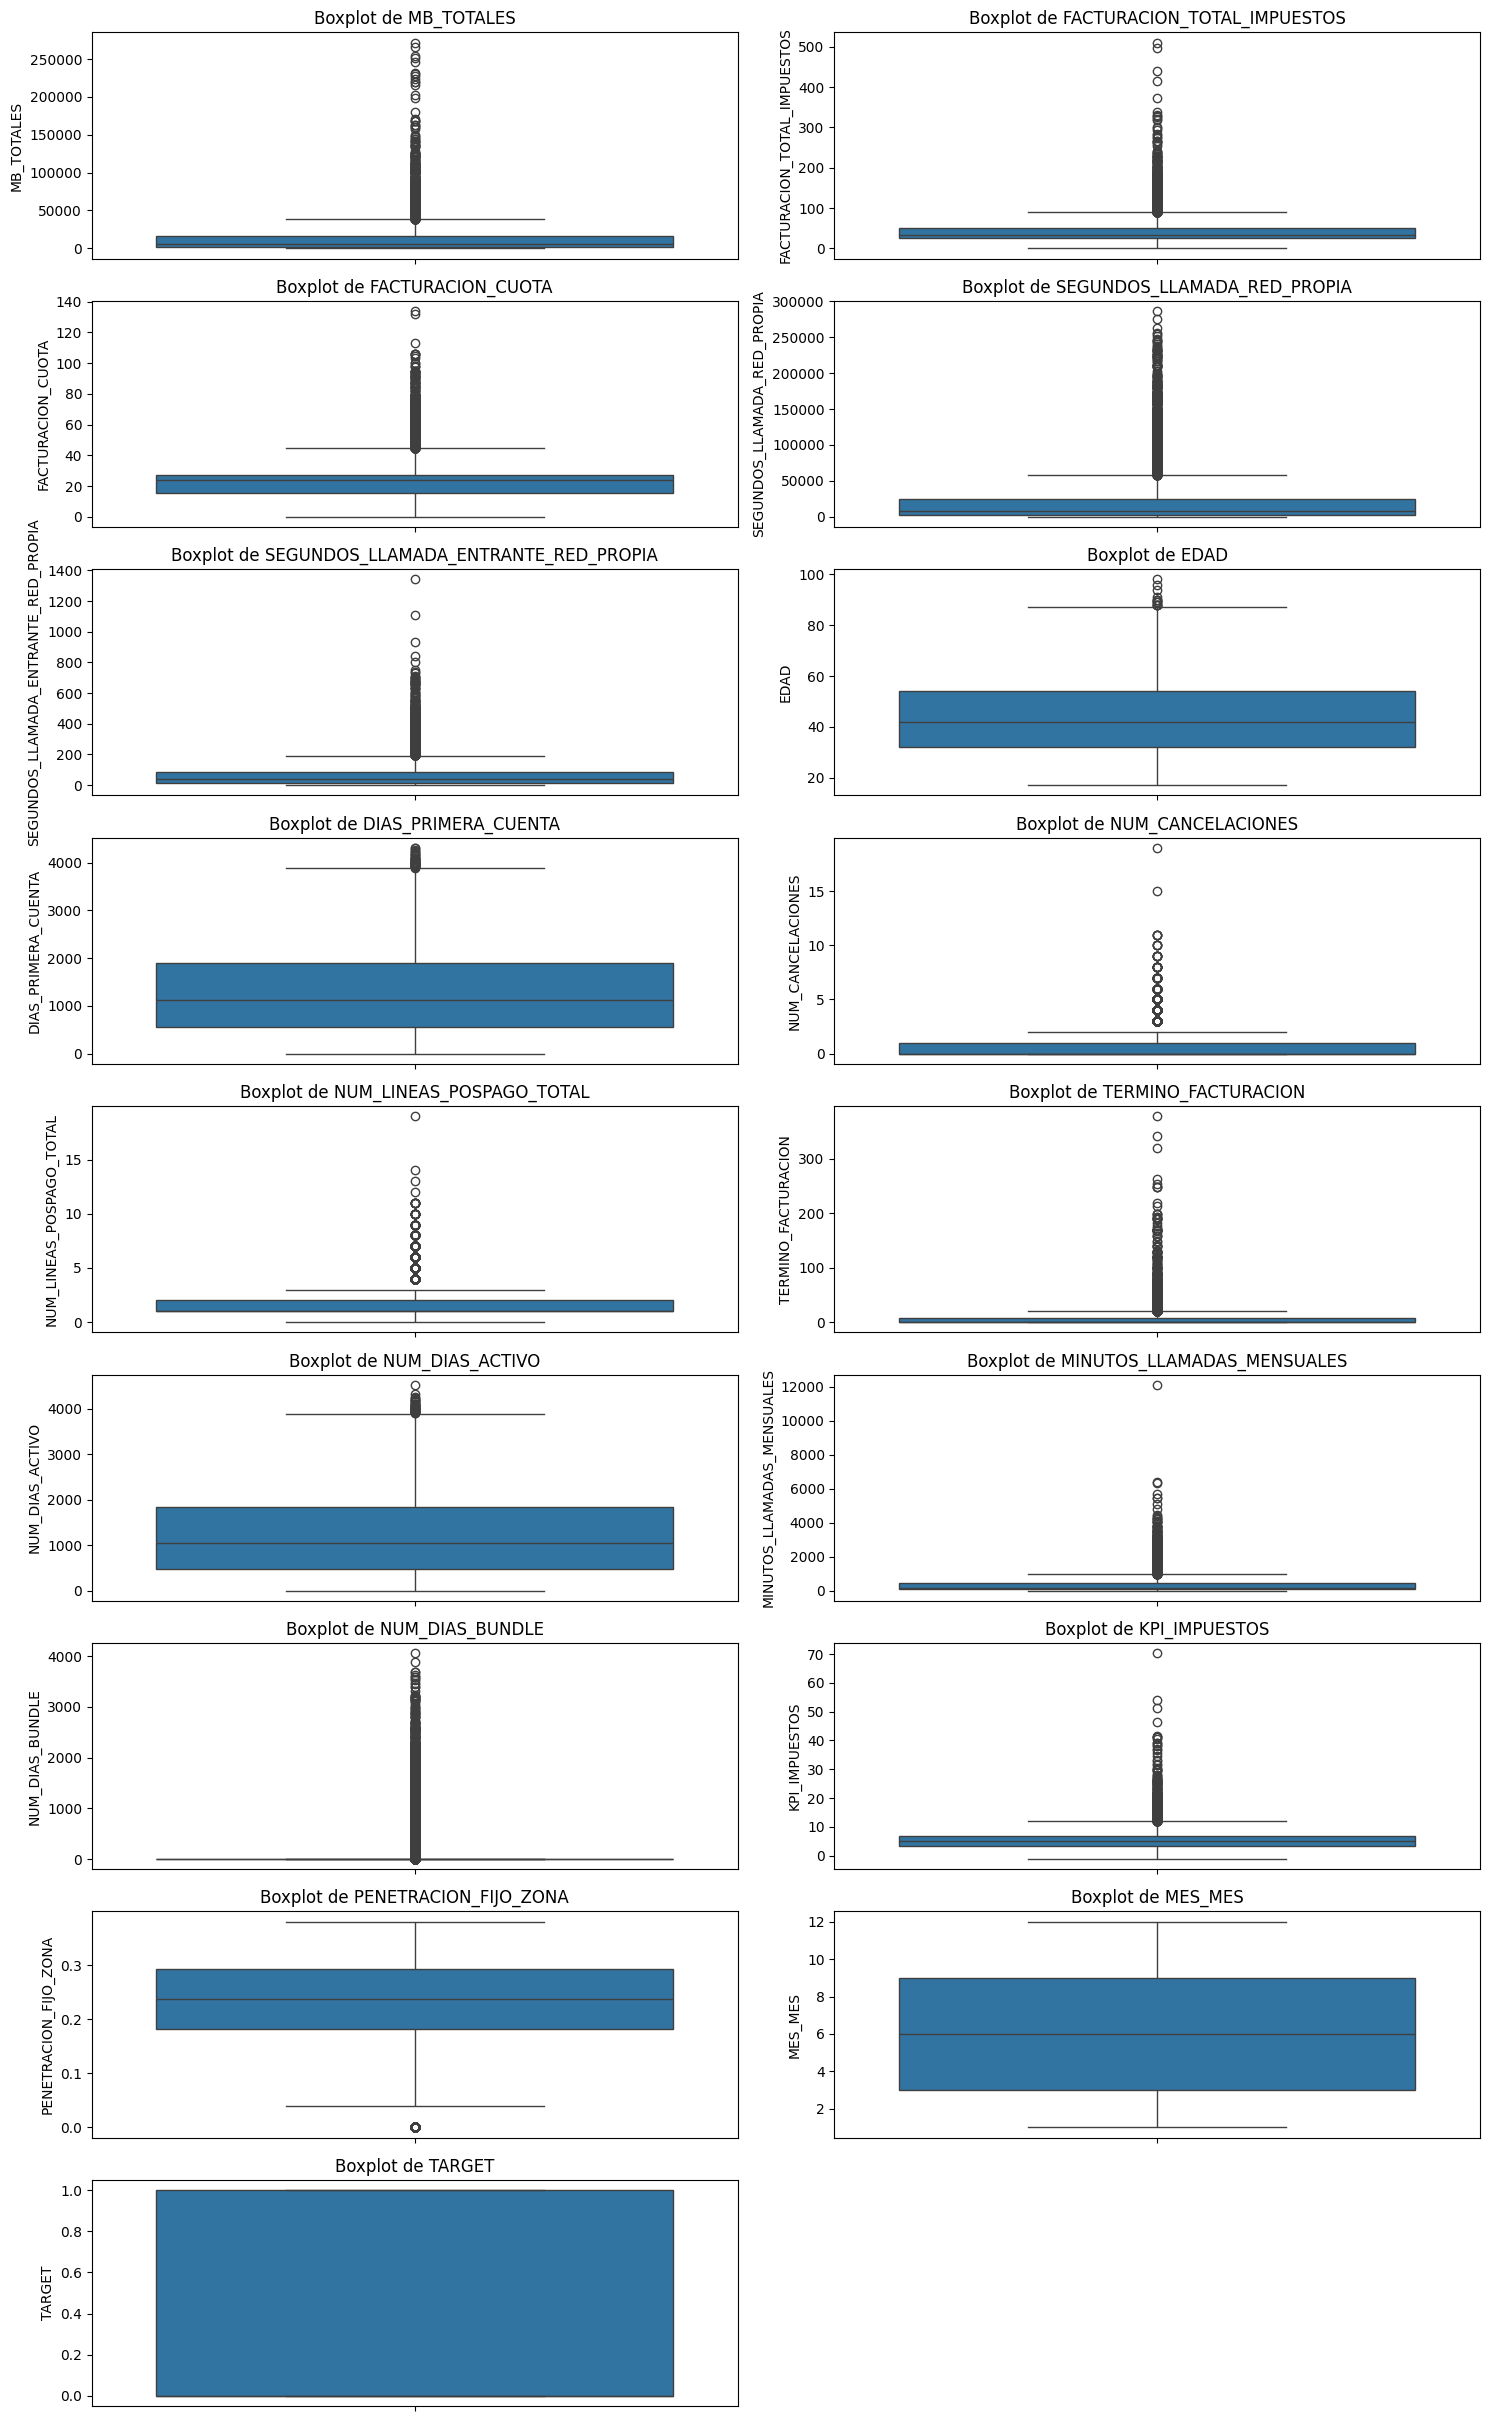

In [42]:
plt.figure(figsize=(15, 35))
for i, column in enumerate(df_cleaned.columns, 1):
    plt.subplot(13, 2, i)
    sns.boxplot(y=df_cleaned[column])
    plt.title(f'Boxplot de {column}')
plt.tight_layout()
plt.show()

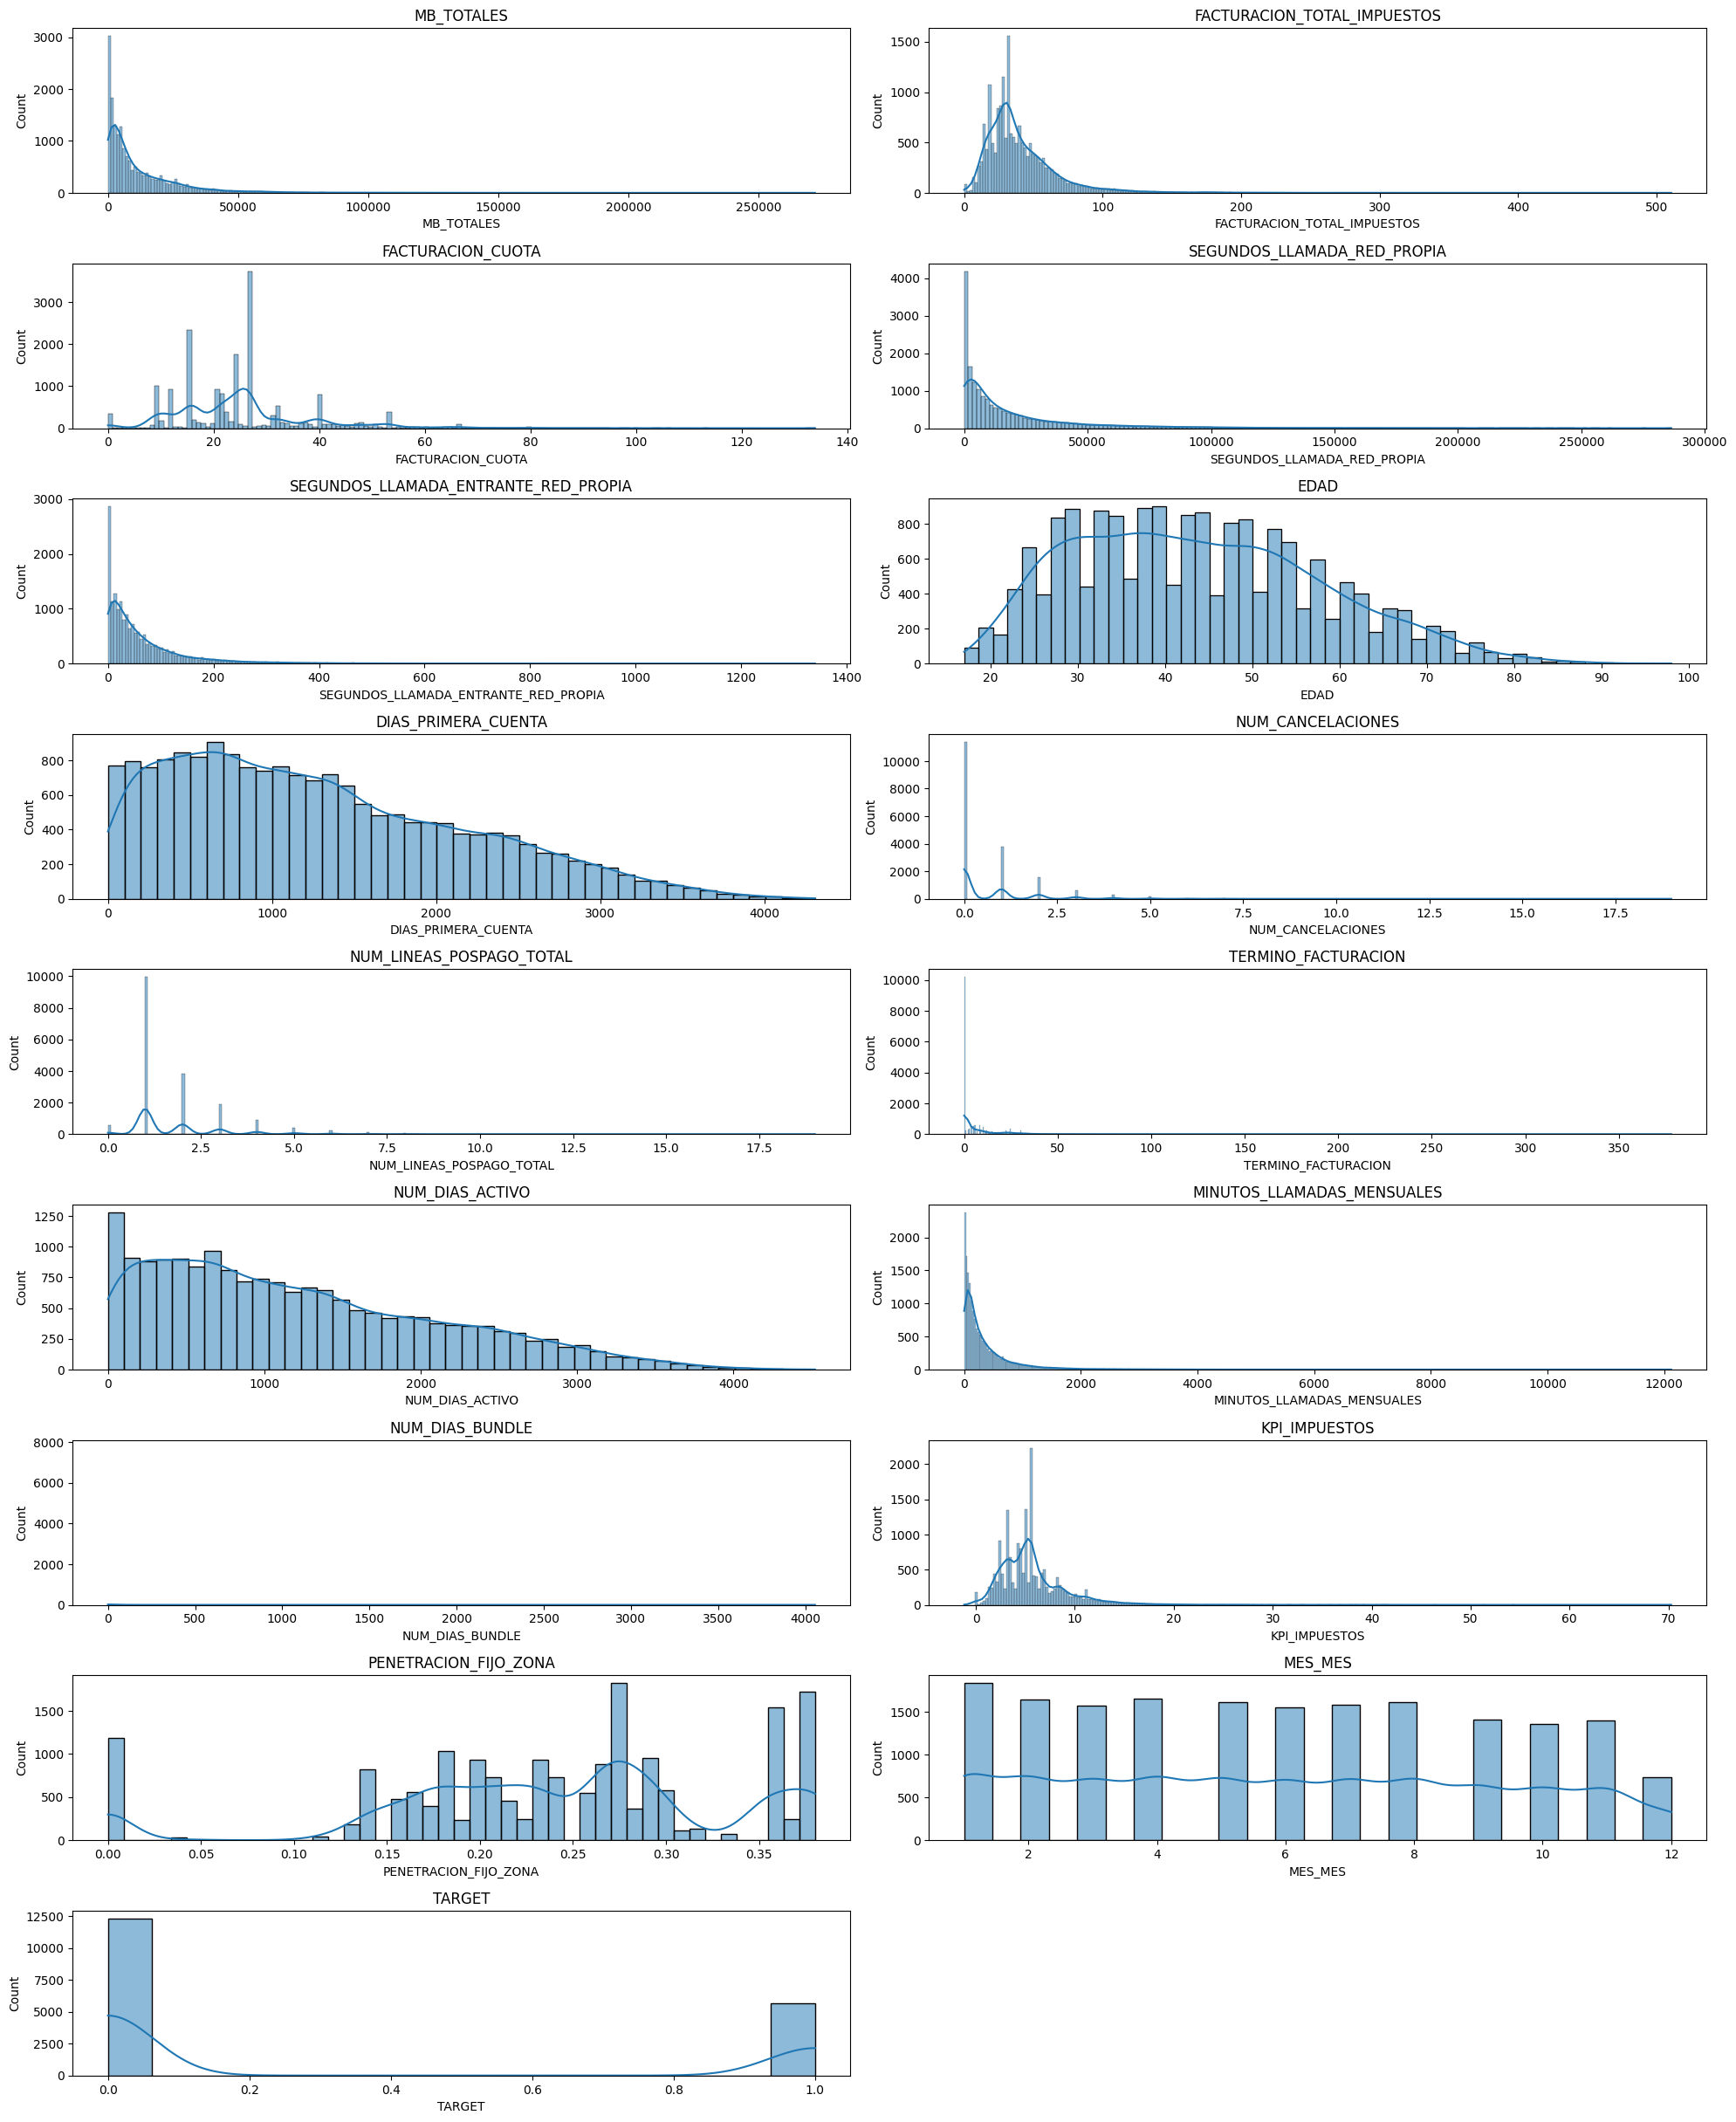

In [43]:
variables = df_cleaned.columns
ax, fig = plt.subplots(figsize=(20, 35), nrows=13, ncols=2)
fig = fig.flatten()
for i, var in enumerate(variables):
    sns.histplot(df_cleaned[var], ax=fig[i], kde=True)
    fig[i].set_title(var)
plt.tight_layout()
# delete the unused subplots
for i in range(len(variables), len(fig)):
    fig[i].set_visible(False)
plt.show()

In [44]:
df_cleaned.shape

(17974, 17)

Guardo el dataset limpio y el solo imputado para usarlo en próximos usos del cuaderno

In [45]:
df_cleaned.to_csv('./caso_final_small_20k_con_mes_cleaned.csv', index=False)

In [46]:
df_imputed.to_csv('./caso_final_small_20k_con_mes_imputed.csv', index=False)

In [108]:
# %pip install statsmodels
%pip install plotly
%pip install -U nbformat


Note: you may need to restart the kernel to use updated packages.


In [3]:
df_cleaned = pd.read_csv('./caso_final_small_20k_con_mes_cleaned.csv')

In [4]:
X = df_cleaned.drop('TARGET', axis=1)
y = df_cleaned['TARGET']

In [5]:
# Transformar las columnas MES_MES y MES_AÑO
mes_sin = np.sin(2 * np.pi * X['MES_MES'] / 12).values.reshape(-1, 1)
mes_cos = np.cos(2 * np.pi * X['MES_MES'] / 12).values.reshape(-1, 1)

X['MES_SIN'] = mes_sin
X['MES_COS'] = mes_cos
X = X.drop(['MES_MES'], axis=1)

In [6]:
X.head()

MB_TOTALES  FACTURACION_TOTAL_IMPUESTOS  FACTURACION_CUOTA  \
0    232.121597                    10.186000           0.000000   
1  18280.292969                    32.005001          26.450001   
2   2141.692810                    37.442001          31.400000   
3   3181.986496                    20.001000          16.530000   
4  25626.083984                    37.005001          26.450001   

   SEGUNDOS_LLAMADA_RED_PROPIA  SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA  EDAD  \
0                       4523.0                                  28.0  39.0   
1                      13288.0                                  49.0  25.0   
2                         13.0                                   0.0  47.0   
3                          0.0                                   0.0  43.0   
4                      72783.0                                 151.0  40.0   

   DIAS_PRIMERA_CUENTA  NUM_CANCELACIONES  NUM_LINEAS_POSPAGO_TOTAL  \
0                 44.0                0.0                       1.0   
1                387.0                1.0                       2.0   
2               1389.0                0.0                       2.0   
3                154.0                2.0                       3.0   
4               2205.0                0.0                       1.0   

   TERMINO_FACTURACION  NUM_DIAS_ACTIVO  MINUTOS_LLAMADAS_MENSUALES  \
0                  0.0             44.0                   21.683399   
1                  0.0            387.0                  166.050007   
2                  4.0           1389.0                  108.850102   
3                  0.0            154.0                   65.799899   
4                  5.0           2205.0                  519.683305   

   NUM_DIAS_BUNDLE  KPI_IMPUESTOS  PENETRACION_FIJO_ZONA       MES_SIN  \
0              0.0       1.767800               0.264612  5.000000e-01   
1            435.0       5.555000               0.380171 -5.000000e-01   
2              0.0       2.042002               0.156041  1.224647e-16   
3              0.0       3.471001               0.228810  1.224647e-16   
4              1.0       5.555000               0.210286  5.000000e-01   

    MES_COS  
0  0.866025  
1  0.866025  
2 -1.000000  
3 -1.000000  
4  0.866025

In [7]:
X.shape

(17974, 17)

In [8]:
print(X.dtypes)

MB_TOTALES                              float64
FACTURACION_TOTAL_IMPUESTOS             float64
FACTURACION_CUOTA                       float64
SEGUNDOS_LLAMADA_RED_PROPIA             float64
SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA    float64
EDAD                                    float64
DIAS_PRIMERA_CUENTA                     float64
NUM_CANCELACIONES                       float64
NUM_LINEAS_POSPAGO_TOTAL                float64
TERMINO_FACTURACION                     float64
NUM_DIAS_ACTIVO                         float64
MINUTOS_LLAMADAS_MENSUALES              float64
NUM_DIAS_BUNDLE                         float64
KPI_IMPUESTOS                           float64
PENETRACION_FIJO_ZONA                   float64
MES_SIN                                 float64
MES_COS                                 float64
dtype: object


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y, shuffle=True)

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled.copy(), y_train.copy())

In [12]:
X_test, X_val, y_test, y_val = train_test_split(X_test_scaled, y_test, test_size=0.5, random_state=42, stratify=y_test, shuffle=True)

In [13]:
pruner = optuna.pruners.SuccessiveHalvingPruner(min_resource=1, reduction_factor=4, min_early_stopping_rate=0)

In [306]:
def optimize_lr(trial):
    try:
        C = trial.suggest_float('C', 1e-10, 1e10, log=True)
        penalty = trial.suggest_categorical('penalty', ['l1', 'l2', 'elasticnet'])
        solver = trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'])
        if penalty == 'elasticnet':
            l1_ratio = trial.suggest_float('l1_ratio', 0, 1)
        else:
            l1_ratio = None
        lr = LogisticRegression(C=C, penalty=penalty, solver=solver, random_state=42, max_iter=10000, l1_ratio=l1_ratio)
        use_resampled = trial.suggest_categorical('use_resampled', [True, False])
        if use_resampled:
            lr.fit(X_train_resampled, y_train_resampled)
        else:
            lr.fit(X_train_scaled, y_train)
        y_pred = lr.predict(X_val)
        del lr
        gc.collect()
        return balanced_accuracy_score(y_val, y_pred)
    except Exception as e:
        logging.error(f'Error in Logistic Regression optimization: {e}')
        return float('-inf')

In [307]:
optuna.logging.set_verbosity(optuna.logging.INFO)

# Cargar el estudio desde la base de datos SQLite
study = optuna.create_study(direction='maximize', storage='sqlite:///optuna_study_lr.db', load_if_exists=True, study_name='Logistic Regression BAS', pruner=pruner)

# Continuar la optimización
study.optimize(optimize_lr, n_trials=300, gc_after_trial=True)

# Guardar el mejor modelo encontrado
best_lr = study.best_params

# Serializar el estudio para guardarlo
joblib.dump(study, 'optuna_study_lr.pkl')

# Imprimir los mejores parámetros
best_lr

[I 2024-06-08 15:43:00,664] Using an existing study with name 'Logistic Regression BAS' instead of creating a new one.
[I 2024-06-08 15:43:02,035] Trial 397 finished with value: 0.6338580640711748 and parameters: {'C': 0.02810516640243426, 'penalty': 'l2', 'solver': 'newton-cholesky', 'use_resampled': True}. Best is trial 116 with value: 0.638399408408719.
[I 2024-06-08 15:43:04,252] Trial 398 finished with value: 0.6340266522600396 and parameters: {'C': 0.006947065456288275, 'penalty': 'l2', 'solver': 'lbfgs', 'use_resampled': True}. Best is trial 116 with value: 0.638399408408719.
[I 2024-06-08 15:43:06,425] Trial 399 finished with value: 0.6349548451862325 and parameters: {'C': 0.0018581021850374757, 'penalty': 'l2', 'solver': 'lbfgs', 'use_resampled': True}. Best is trial 116 with value: 0.638399408408719.
[I 2024-06-08 15:43:08,760] Trial 400 finished with value: 0.5419497224042208 and parameters: {'C': 0.0008754209342129127, 'penalty': 'l2', 'solver': 'saga', 'use_resampled': Fal

{'C': 0.0006373647489709247,
 'penalty': 'l2',
 'solver': 'newton-cholesky',
 'use_resampled': True}

In [308]:
#optuna.delete_study('Logistic Regression AUC CV', storage='sqlite:///optuna_study_lr.db')

In [309]:
study.best_value

0.638399408408719

In [310]:
study = optuna.load_study(study_name='Logistic Regression BAS', storage='sqlite:///optuna_study_lr.db')

In [311]:
optuna.visualization.plot_optimization_history(study)

In [312]:
optuna.visualization.plot_param_importances(study)

[W 2024-06-08 15:54:13,011] Trial 0 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-08 15:54:13,012] Trial 5 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-08 15:54:13,013] Trial 6 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-08 15:54:13,013] Trial 9 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-08 15:54:13,013] Trial 17 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-08 15:54:13,014] Trial 20 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-08 15:54:13,014] Trial 30 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-08 15:54:13,014] Trial 47 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-08 15:54:13,014] Trial 57 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-08 15:54:13,015] Tria

In [313]:
optuna.visualization.plot_slice(study)

[W 2024-06-08 15:54:16,227] Trial 0 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-08 15:54:16,227] Trial 5 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-08 15:54:16,228] Trial 6 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-08 15:54:16,228] Trial 9 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-08 15:54:16,228] Trial 17 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-08 15:54:16,229] Trial 20 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-08 15:54:16,229] Trial 30 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-08 15:54:16,229] Trial 47 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-08 15:54:16,230] Trial 57 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-08 15:54:16,230] Tria

In [314]:
best_lr = study.best_params
use_resampled = best_lr.pop('use_resampled')
lr = LogisticRegression(**best_lr, random_state=42, max_iter=10000)
if use_resampled:
    lr.fit(X_train_resampled, y_train_resampled)
else:
    lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.67      0.72      1850
           1       0.45      0.59      0.51       846

    accuracy                           0.64      2696
   macro avg       0.61      0.63      0.62      2696
weighted avg       0.68      0.64      0.65      2696



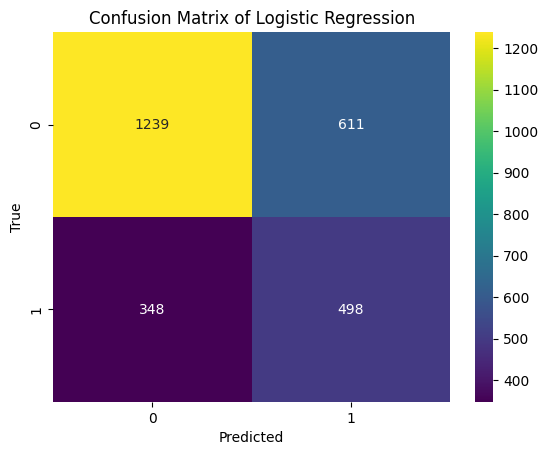

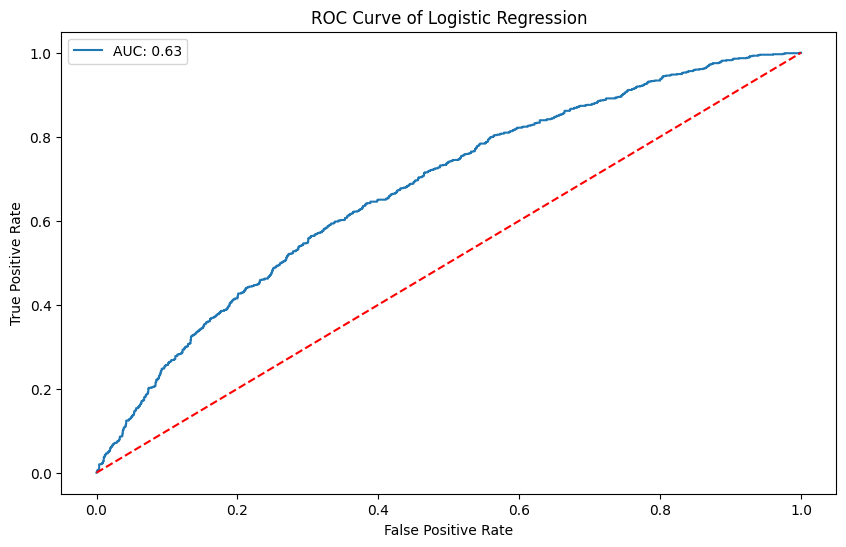

array([[0.63535011, 0.36464989],
       [0.59649467, 0.40350533],
       [0.52501407, 0.47498593],
       ...,
       [0.35640295, 0.64359705],
       [0.52405137, 0.47594863],
       [0.31561062, 0.68438938]])

In [315]:
y_pred = lr.predict(X_test)

# roc auc curve painted of logistic regression
roc_auc_lr = roc_auc_score(y_test, y_pred)

# Confusion matrix of logistic regression
cm_lr = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_lr, annot=True, cmap='viridis', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

# roc auc curve painted of logistic regression
roc_auc_lr

# plot roc curve
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC: {roc_auc_lr:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Logistic Regression')
plt.legend()
plt.show()
lr.predict_proba(X_test)

In [316]:
def optimize_random_forest(trial):
    try:
        # Definir los hiperparámetros
        n_estimators = trial.suggest_int('n_estimators', 100, 1000)  # Rango reducido para tiempos de entrenamiento más cortos
        max_depth = trial.suggest_int('max_depth', 1, 50)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
        criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
        max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
        
        class_weight_option = trial.suggest_int('class_weight', 0, 5)
        
        # Asignar pesos según el valor entero seleccionado
        if class_weight_option == 0:
            class_weight = None
        elif class_weight_option == 1:
            class_weight = 'balanced'
        elif class_weight_option == 2:
            class_weight = {0: 1, 1: 2}
        elif class_weight_option == 3:
            class_weight = {0: 1, 1: 3}
        elif class_weight_option == 4:
            class_weight = {0: 1, 1: 4}
        elif class_weight_option == 5:
            class_weight = {0: 1, 1: 5}
        
        # Registro de hiperparámetros seleccionados
        logging.info(f"Trial {trial.number} - Params: n_estimators: {n_estimators}, max_depth: {max_depth}, min_samples_split: {min_samples_split}, min_samples_leaf: {min_samples_leaf}, criterion: {criterion}, max_features: {max_features}, class_weight: {class_weight_option}")

        # Crear el modelo de RandomForest
        rf = RandomForestClassifier(
            n_estimators=n_estimators, 
            max_depth=max_depth, 
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf, 
            random_state=42, 
            criterion=criterion, 
            max_features=max_features, 
            n_jobs=-1,
            class_weight=class_weight
        )
        
        use_resampled = trial.suggest_categorical('use_resampled', [True, False])
        if use_resampled:
            rf.fit(X_train_resampled, y_train_resampled)
        else:
            rf.fit(X_train_scaled, y_train)

        y_pred = rf.predict(X_val)
        del rf
        gc.collect()
        return balanced_accuracy_score(y_val, y_pred)
    except Exception as e:
        logging.error(f"Optimization error in trial {trial.number}: {e}")
        return float('-inf')

In [317]:
optuna.logging.set_verbosity(optuna.logging.INFO)

# Cargar el estudio desde la base de datos SQLite
study = optuna.create_study(direction='maximize', storage='sqlite:///optuna_study_rf.db', load_if_exists=True, study_name='RandomForest BAS', pruner=pruner)

# Continuar la optimización
study.optimize(optimize_random_forest, n_trials=200, gc_after_trial=True)

# Guardar el mejor modelo encontrado
best_rf = study.best_params

# Serializar el estudio para guardarlo
joblib.dump(study, 'optuna_study_rf.pkl')

# Imprimir los mejores parámetros
best_rf

[I 2024-06-08 15:54:16,686] Using an existing study with name 'RandomForest BAS' instead of creating a new one.
[I 2024-06-08 15:54:22,640] Trial 200 finished with value: 0.650034867102697 and parameters: {'n_estimators': 551, 'max_depth': 42, 'min_samples_split': 7, 'min_samples_leaf': 8, 'criterion': 'gini', 'max_features': 'log2', 'class_weight': 3, 'use_resampled': False}. Best is trial 191 with value: 0.6526202052944354.
[I 2024-06-08 15:54:29,963] Trial 201 finished with value: 0.6508979236831921 and parameters: {'n_estimators': 611, 'max_depth': 45, 'min_samples_split': 7, 'min_samples_leaf': 9, 'criterion': 'gini', 'max_features': 'log2', 'class_weight': 3, 'use_resampled': False}. Best is trial 191 with value: 0.6526202052944354.
[I 2024-06-08 15:54:37,392] Trial 202 finished with value: 0.6522993130031304 and parameters: {'n_estimators': 599, 'max_depth': 45, 'min_samples_split': 7, 'min_samples_leaf': 9, 'criterion': 'gini', 'max_features': 'log2', 'class_weight': 3, 'use_re

{'n_estimators': 645,
 'max_depth': 37,
 'min_samples_split': 14,
 'min_samples_leaf': 9,
 'criterion': 'gini',
 'max_features': 'log2',
 'class_weight': 3,
 'use_resampled': False}

In [318]:
# optuna.delete_study('RandomForest AUC CV', storage='sqlite:///optuna_study_rf.db')

In [319]:
best_rf

{'n_estimators': 645,
 'max_depth': 37,
 'min_samples_split': 14,
 'min_samples_leaf': 9,
 'criterion': 'gini',
 'max_features': 'log2',
 'class_weight': 3,
 'use_resampled': False}

In [320]:
study.best_value

0.6532112218428988

In [321]:
study = optuna.load_study(study_name='RandomForest BAS', storage='sqlite:///optuna_study_rf.db')

In [322]:
optuna.visualization.plot_optimization_history(study)

In [323]:
optuna.visualization.plot_param_importances(study)

In [324]:
optuna.visualization.plot_slice(study)

In [325]:
best_rf = study.best_params
class_weight_option = best_rf['class_weight']
use_resampled = best_rf['use_resampled']
if class_weight_option == 0:
    class_weight = None
elif class_weight_option == 1:
    class_weight = 'balanced'
elif class_weight_option == 2:
    class_weight = {0: 1, 1: 2}
elif class_weight_option == 3:
    class_weight = {0: 1, 1: 3}
else:
    class_weight = {0: 1, 1: 5}

best_rf.pop('class_weight')
best_rf.pop('use_resampled')

rf = RandomForestClassifier(**best_rf,
                            class_weight=class_weight,
                            random_state=42,
                            n_jobs=-1)

if use_resampled:
    rf.fit(X_train_resampled, y_train_resampled)
else:
    rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.65      0.72      1850
           1       0.45      0.63      0.52       846

    accuracy                           0.64      2696
   macro avg       0.62      0.64      0.62      2696
weighted avg       0.69      0.64      0.66      2696



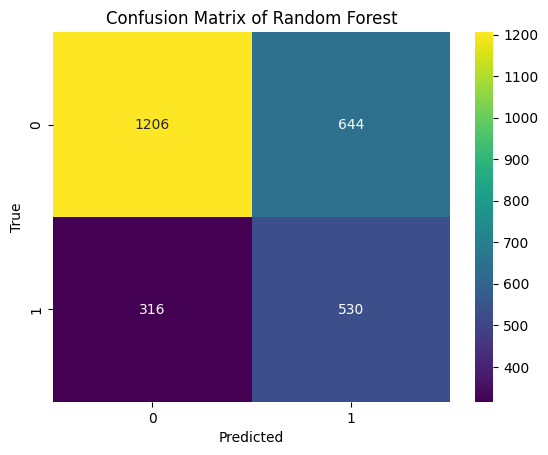

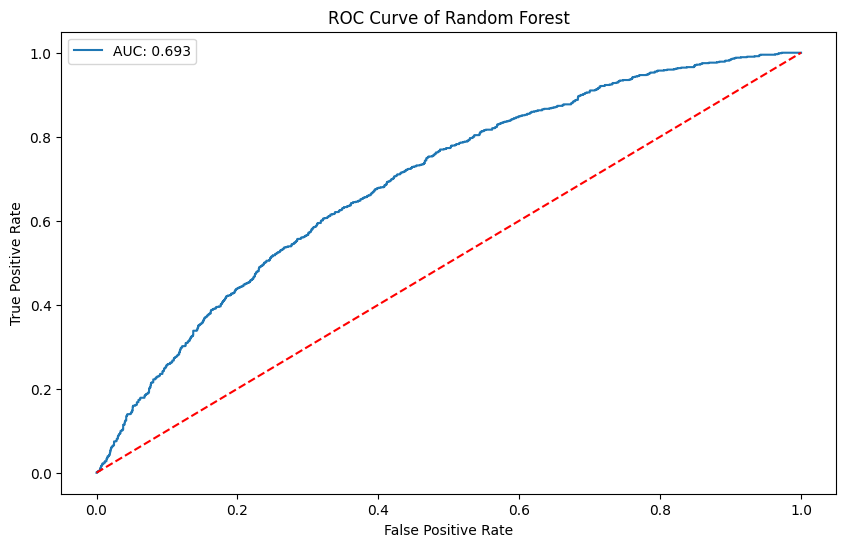

In [326]:
# roc auc curve painted of random forest
roc_auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

# Confusion matrix of random forest
cm_rf = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_rf, annot=True, cmap='viridis', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Random Forest')
plt.show()

# roc auc curve painted of random forest
roc_auc_rf

# plot roc curve
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC: {roc_auc_rf:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Random Forest')
plt.legend()

In [327]:
def optimize_xgboost(trial):
    try:
        # scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)
        # Definir los hiperparámetros con rangos reducidos
        n_estimators = trial.suggest_int('n_estimators', 100, 600)
        max_depth = trial.suggest_int('max_depth', 3, 10)
        learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-1, log=True)
        booster = trial.suggest_categorical('booster', ['gbtree', 'dart'])  # Eliminado 'gblinear' para reducir complejidad
        subsample = trial.suggest_float('subsample', 0.5, 1.0)
        colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)
        min_child_weight = trial.suggest_int('min_child_weight', 1, 6)
        gamma = trial.suggest_float('gamma', 0, 5)
        reg_alpha = trial.suggest_float('reg_alpha', 1e-5, 20, log=True)
        reg_lambda = trial.suggest_float('reg_lambda', 1e-5, 10, log=True)
        # scale_pos_weight = trial.suggest_float('scale_pos_weight', 1, 20)
        
        # Crear el modelo de XGBoost
        xgb_model = xgb.XGBClassifier(
            n_estimators=n_estimators, 
            max_depth=max_depth, 
            learning_rate=learning_rate,
            booster=booster, 
            subsample=subsample, 
            colsample_bytree=colsample_bytree,
            min_child_weight=min_child_weight, 
            gamma=gamma,
            reg_alpha=reg_alpha,
            reg_lambda=reg_lambda,
            # scale_pos_weight=scale_pos_weight,
            random_state=42
        )
        
        logging.info(f"Trial {trial.number} - Model created with params: {trial.params}")

        use_resampled = trial.suggest_categorical('use_resampled', [True, False])
        if use_resampled:
            xgb_model.fit(X_train_resampled, y_train_resampled)
        else:
            xgb_model.fit(X_train_scaled, y_train)
            
        y_pred = xgb_model.predict(X_val)
        del xgb_model
        gc.collect()
        return balanced_accuracy_score(y_val, y_pred)
    except Exception as e:
        logging.error(f"Optimization error in trial {trial.number}: {e}")
        return float('-inf')

In [328]:
optuna.logging.set_verbosity(optuna.logging.INFO)
# Cargar el estudio desde la base de datos SQLite
study = optuna.create_study(direction='maximize', storage='sqlite:///optuna_study_xgb.db', load_if_exists=True, study_name='XGBoost BAS', pruner=pruner)

# Continuar la optimización
study.optimize(optimize_xgboost, n_trials=300, gc_after_trial=True)

# Guardar el mejor modelo encontrado
best_xgb = study.best_params

# Serializar el estudio para guardarlo
joblib.dump(study, 'optuna_study_xgb.pkl')

# Imprimir los mejores parámetros
best_xgb

[I 2024-06-08 16:20:30,930] Using an existing study with name 'XGBoost BAS' instead of creating a new one.
[I 2024-06-08 16:21:15,156] Trial 112 finished with value: 0.639534505021246 and parameters: {'n_estimators': 320, 'max_depth': 7, 'learning_rate': 0.0002493937338215431, 'booster': 'dart', 'subsample': 0.9767215130237268, 'colsample_bytree': 0.824373409728785, 'min_child_weight': 1, 'gamma': 2.327610370145166, 'reg_alpha': 6.741479238627269, 'reg_lambda': 0.0006065933013334556, 'use_resampled': True}. Best is trial 91 with value: 0.6447176339414002.
[I 2024-06-08 16:21:45,964] Trial 113 finished with value: 0.6404808978087366 and parameters: {'n_estimators': 261, 'max_depth': 7, 'learning_rate': 0.00029772145000237334, 'booster': 'dart', 'subsample': 0.9883430972103259, 'colsample_bytree': 0.8615392416629511, 'min_child_weight': 1, 'gamma': 2.422101997649027, 'reg_alpha': 4.054146998438605, 'reg_lambda': 0.0018340113320538325, 'use_resampled': True}. Best is trial 91 with value: 

{'n_estimators': 592,
 'max_depth': 7,
 'learning_rate': 0.00010170487839455397,
 'booster': 'dart',
 'subsample': 0.8860117003534501,
 'colsample_bytree': 0.9517945420503496,
 'min_child_weight': 5,
 'gamma': 1.3240091241445753,
 'reg_alpha': 3.9970287938829547,
 'reg_lambda': 0.4190491991975587,
 'use_resampled': True}

In [329]:
study = optuna.load_study(study_name='XGBoost BAS', storage='sqlite:///optuna_study_xgb.db')

best_xgb = study.best_params

best_xgb

{'n_estimators': 592,
 'max_depth': 7,
 'learning_rate': 0.00010170487839455397,
 'booster': 'dart',
 'subsample': 0.8860117003534501,
 'colsample_bytree': 0.9517945420503496,
 'min_child_weight': 5,
 'gamma': 1.3240091241445753,
 'reg_alpha': 3.9970287938829547,
 'reg_lambda': 0.4190491991975587,
 'use_resampled': True}

In [330]:
# optuna.delete_study(study_name='XGBoost AUC CV', storage='sqlite:///optuna_study_xgb.db')

In [331]:
optuna.visualization.plot_optimization_history(study)

In [332]:
optuna.visualization.plot_param_importances(study)

In [333]:
optuna.visualization.plot_slice(study)

In [334]:
study.best_value

0.6473863083401343

In [335]:
best_xgb = study.best_params
use_resample = best_xgb.pop('use_resampled')
xgb_model = xgb.XGBClassifier(**best_xgb, random_state=42, n_jobs=4)
if use_resample:
    xgb_model.fit(X_train_resampled, y_train_resampled)
else:
    xgb_model.fit(X_train_scaled, y_train)
y_pred = xgb_model.predict(X_test)

In [336]:
print(classification_report(y_test, y_pred))
type(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.64      0.70      1850
           1       0.44      0.62      0.51       846

    accuracy                           0.63      2696
   macro avg       0.61      0.63      0.61      2696
weighted avg       0.68      0.63      0.64      2696



str

In [337]:
comf_matrix = confusion_matrix(y_test, y_pred)
comf_matrix

array([[1181,  669],
       [ 322,  524]], dtype=int64)

In [338]:
roc_auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
roc_auc_xgb

0.681044342214555

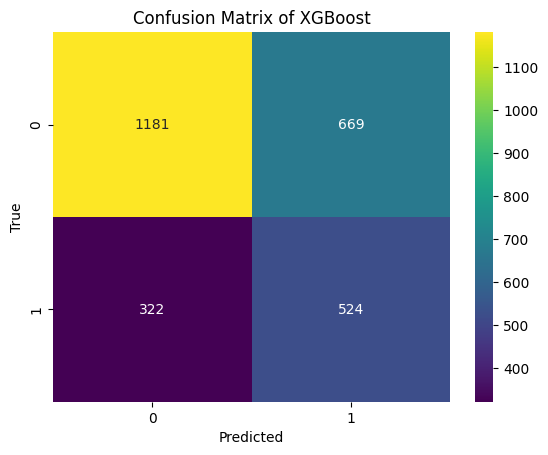

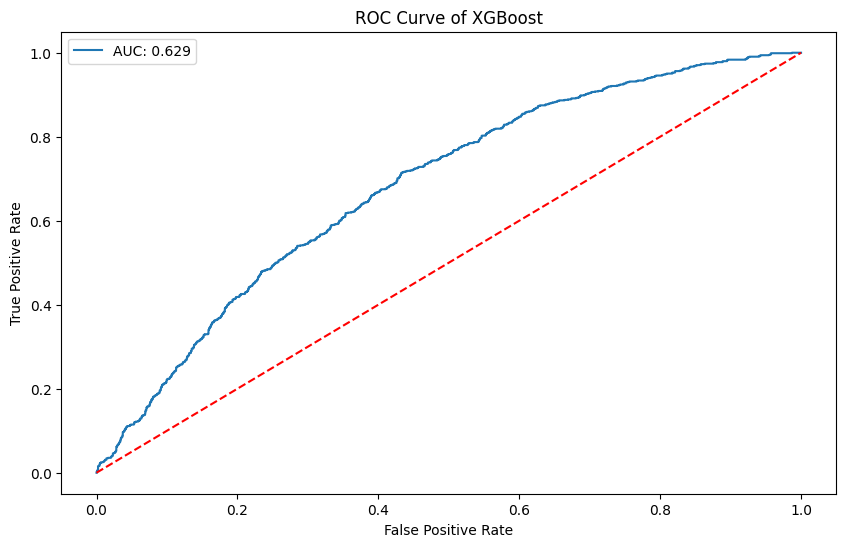

0.6288818605839881

In [339]:
roc_auc_xgb = roc_auc_score(y_test, y_pred)

cm_xgb = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_xgb, annot=True, cmap='viridis', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of XGBoost')
plt.show()

# plot roc curve
fpr, tpr, thresholds = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC: {roc_auc_xgb:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of XGBoost')
plt.legend()
plt.show()
roc_auc_xgb

In [340]:
%pip install optuna-integration

In [341]:
# class MatthewsCorrelationCoefficient(keras.metrics.Metric):
#     def __init__(self, name='matthews_corrcoef', **kwargs):
#         super(MatthewsCorrelationCoefficient, self).__init__(name=name, **kwargs)
#         self.tp = self.add_weight(name='tp', initializer='zeros')
#         self.tn = self.add_weight(name='tn', initializer='zeros')
#         self.fp = self.add_weight(name='fp', initializer='zeros')
#         self.fn = self.add_weight(name='fn', initializer='zeros')

#     def update_state(self, y_true, y_pred, sample_weight=None):
#         y_pred = tf.round(tf.clip_by_value(y_pred, 0, 1))
#         y_true = tf.cast(y_true, tf.float32)

#         tp = tf.reduce_sum(tf.cast(y_true * y_pred, tf.float32))
#         tn = tf.reduce_sum(tf.cast((1 - y_true) * (1 - y_pred), tf.float32))
#         fp = tf.reduce_sum(tf.cast((1 - y_true) * y_pred, tf.float32))
#         fn = tf.reduce_sum(tf.cast(y_true * (1 - y_pred), tf.float32))

#         self.tp.assign_add(tp)
#         self.tn.assign_add(tn)
#         self.fp.assign_add(fp)
#         self.fn.assign_add(fn)

#     def result(self):
#         numerator = self.tp * self.tn - self.fp * self.fn
#         denominator = tf.sqrt((self.tp + self.fp) * (self.tp + self.fn) * (self.tn + self.fp) * (self.tn + self.fn))
#         return tf.math.divide_no_nan(numerator, denominator)

#     def reset_states(self):
#         for v in self.variables:
#             v.assign(0)

In [15]:
def balanced_accuracy(y_true, y_pred):
    y_pred = tf.round(tf.clip_by_value(y_pred, 0, 1))
    y_true = tf.cast(y_true, tf.float32)

    tp = tf.reduce_sum(tf.cast(y_true * y_pred, tf.float32))
    tn = tf.reduce_sum(tf.cast((1 - y_true) * (1 - y_pred), tf.float32))
    fp = tf.reduce_sum(tf.cast((1 - y_true) * y_pred, tf.float32))
    fn = tf.reduce_sum(tf.cast(y_true * (1 - y_pred), tf.float32))

    tpr = tf.math.divide_no_nan(tp, tp + fn)  # Tasa de verdaderos positivos
    tnr = tf.math.divide_no_nan(tn, tn + fp)  # Tasa de verdaderos negativos

    balanced_acc = tf.math.divide_no_nan((tpr + tnr), 2.0)
    return balanced_acc

def optimize_nn(trial):
    try:
        # Definir los hiperparámetros con rangos reducidos
        neurons_first_layer = trial.suggest_int('neurons_first_layer', 10, 200)
        neurons_second_layer = trial.suggest_int('neurons_second_layer', 10, 200)
        neurons_third_layer = trial.suggest_int('neurons_third_layer', 10, 200)
        add_fourth_layer = trial.suggest_categorical('add_fourth_layer', [True, False])
        if add_fourth_layer:
            neurons_fourth_layer = trial.suggest_int('neurons_fourth_layer', 10, 200)
        else:
            neurons_fourth_layer = 0
        add_fifth_layer = trial.suggest_categorical('add_fifth_layer', [True, False])
        if add_fifth_layer:
            neurons_fifth_layer = trial.suggest_int('neurons_fifth_layer', 10, 200)
        else:
            neurons_fifth_layer = 0

        early_stopping = keras.callbacks.EarlyStopping(monitor='val_balanced_accuracy', patience=20, restore_best_weights=True, mode='max')
        activation = trial.suggest_categorical('activation', ['relu', 'tanh'])
        optimizer = trial.suggest_categorical('optimizer', ['adam', 'rmsprop', 'sgd'])
        loss = trial.suggest_categorical('loss', ['binary_crossentropy'])
        batch_size = trial.suggest_int('batch_size', 32, 128)
        learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True)
        dropout = trial.suggest_float('dropout', 0.1, 0.3)

        if optimizer == 'adam':
            opt = keras.optimizers.Adam(learning_rate=learning_rate)
        elif optimizer == 'rmsprop':
            opt = keras.optimizers.RMSprop(learning_rate=learning_rate)
        else:
            opt = keras.optimizers.SGD(learning_rate=learning_rate)

        physical_devices = tf.config.list_physical_devices('GPU')
        if len(physical_devices) > 0:
            tf.config.experimental.set_memory_growth(physical_devices[0], True)

        # Crear el modelo
        nn = keras.models.Sequential()
        nn.add(keras.layers.InputLayer(shape=(X_train.shape[1],)))
        nn.add(keras.layers.Dropout(dropout))
        nn.add(keras.layers.Dense(neurons_first_layer, activation=activation))
        nn.add(keras.layers.Dropout(dropout))
        nn.add(keras.layers.Dense(neurons_second_layer, activation=activation))
        nn.add(keras.layers.Dropout(dropout))
        nn.add(keras.layers.Dense(neurons_third_layer, activation=activation))
        if add_fourth_layer:
            nn.add(keras.layers.Dropout(dropout))
            nn.add(keras.layers.Dense(neurons_fourth_layer, activation=activation))
        if add_fifth_layer:
            nn.add(keras.layers.Dropout(dropout))
            nn.add(keras.layers.Dense(neurons_fifth_layer, activation=activation))
        nn.add(keras.layers.Dense(1, activation='sigmoid'))

        # Compilar el modelo con la métrica personalizada
        nn.compile(optimizer=opt, loss=loss, metrics=[balanced_accuracy])
        
        logging.info(f"Trial {trial.number} - Model created with params: {trial.params}")

        # Decidir si usar el conjunto de datos remuestreados
        use_resampled = trial.suggest_categorical('use_resampled', [True, False])
        if use_resampled:
            X_train_use, y_train_use = X_train_resampled, y_train_resampled
        else:
            X_train_use, y_train_use = X_train, y_train

        # Ajustar el modelo con validación cruzada
        nn.fit(X_train_use, y_train_use, validation_data=(X_val, y_val), batch_size=batch_size,
               epochs=50, callbacks=[early_stopping], verbose=0)

        y_pred = nn.predict(X_val)
        y_pred = np.round(y_pred)
        del nn
        gc.collect()
        return balanced_accuracy_score(y_val, y_pred)
    except Exception as e:
        logging.error(f"Optimization error in trial {trial.number}: {e}")
        return float('-inf')

In [16]:
optuna.logging.set_verbosity(optuna.logging.INFO)

study = optuna.create_study(direction='maximize', storage='sqlite:///optuna_study_nn.db', load_if_exists=True, study_name='Neural Network BAS', pruner=pruner)

study.optimize(optimize_nn, n_trials=200, gc_after_trial=True)

best_nn = study.best_params

joblib.dump(study, 'optuna_study_nn.pkl')

best_nn

[I 2024-06-09 01:32:00,474] A new study created in RDB with name: Neural Network BAS


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step


[I 2024-06-09 01:32:10,826] Trial 0 finished with value: 0.5 and parameters: {'neurons_first_layer': 158, 'neurons_second_layer': 168, 'neurons_third_layer': 105, 'add_fourth_layer': True, 'neurons_fourth_layer': 147, 'add_fifth_layer': True, 'neurons_fifth_layer': 21, 'activation': 'relu', 'optimizer': 'sgd', 'loss': 'binary_crossentropy', 'batch_size': 77, 'learning_rate': 0.00019530881970516322, 'dropout': 0.12504143640488194, 'use_resampled': False}. Best is trial 0 with value: 0.5.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step


[I 2024-06-09 01:32:24,779] Trial 1 finished with value: 0.634603300496952 and parameters: {'neurons_first_layer': 142, 'neurons_second_layer': 100, 'neurons_third_layer': 89, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 154, 'activation': 'tanh', 'optimizer': 'sgd', 'loss': 'binary_crossentropy', 'batch_size': 93, 'learning_rate': 0.0009295625363987464, 'dropout': 0.29937961207896013, 'use_resampled': True}. Best is trial 1 with value: 0.634603300496952.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step


[I 2024-06-09 01:32:30,211] Trial 2 finished with value: 0.5582702085512528 and parameters: {'neurons_first_layer': 43, 'neurons_second_layer': 30, 'neurons_third_layer': 18, 'add_fourth_layer': True, 'neurons_fourth_layer': 58, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 72, 'learning_rate': 0.00017130111782243432, 'dropout': 0.2734571127319546, 'use_resampled': False}. Best is trial 1 with value: 0.634603300496952.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step


[I 2024-06-09 01:32:39,304] Trial 3 finished with value: 0.6395163051599481 and parameters: {'neurons_first_layer': 113, 'neurons_second_layer': 58, 'neurons_third_layer': 136, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 195, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 82, 'learning_rate': 3.6963827731822244e-05, 'dropout': 0.21809998150517967, 'use_resampled': True}. Best is trial 3 with value: 0.6395163051599481.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step


[I 2024-06-09 01:32:45,638] Trial 4 finished with value: 0.5183559969500864 and parameters: {'neurons_first_layer': 193, 'neurons_second_layer': 181, 'neurons_third_layer': 111, 'add_fourth_layer': True, 'neurons_fourth_layer': 139, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'sgd', 'loss': 'binary_crossentropy', 'batch_size': 128, 'learning_rate': 2.2075808108479562e-05, 'dropout': 0.22462035350632556, 'use_resampled': False}. Best is trial 3 with value: 0.6395163051599481.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step


[I 2024-06-09 01:33:02,193] Trial 5 finished with value: 0.6533510734086616 and parameters: {'neurons_first_layer': 197, 'neurons_second_layer': 124, 'neurons_third_layer': 72, 'add_fourth_layer': True, 'neurons_fourth_layer': 116, 'add_fifth_layer': True, 'neurons_fifth_layer': 41, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 104, 'learning_rate': 8.684282760288941e-05, 'dropout': 0.12312437537069061, 'use_resampled': True}. Best is trial 5 with value: 0.6533510734086616.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step


[I 2024-06-09 01:33:07,675] Trial 6 finished with value: 0.5331467368606579 and parameters: {'neurons_first_layer': 181, 'neurons_second_layer': 95, 'neurons_third_layer': 40, 'add_fourth_layer': True, 'neurons_fourth_layer': 122, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 113, 'learning_rate': 1.0641845079165724e-05, 'dropout': 0.2767625299925801, 'use_resampled': False}. Best is trial 5 with value: 0.6533510734086616.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step


[I 2024-06-09 01:33:20,993] Trial 7 finished with value: 0.6491124215011246 and parameters: {'neurons_first_layer': 64, 'neurons_second_layer': 102, 'neurons_third_layer': 173, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 77, 'learning_rate': 0.003484056740818865, 'dropout': 0.24236099733389935, 'use_resampled': True}. Best is trial 5 with value: 0.6533510734086616.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step


[I 2024-06-09 01:33:34,619] Trial 8 finished with value: 0.6439273768060968 and parameters: {'neurons_first_layer': 193, 'neurons_second_layer': 45, 'neurons_third_layer': 155, 'add_fourth_layer': True, 'neurons_fourth_layer': 94, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 104, 'learning_rate': 1.0123832806914479e-05, 'dropout': 0.10156301396007944, 'use_resampled': True}. Best is trial 5 with value: 0.6533510734086616.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step


[I 2024-06-09 01:33:54,108] Trial 9 finished with value: 0.5514337659152997 and parameters: {'neurons_first_layer': 181, 'neurons_second_layer': 105, 'neurons_third_layer': 127, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 58, 'activation': 'relu', 'optimizer': 'sgd', 'loss': 'binary_crossentropy', 'batch_size': 46, 'learning_rate': 3.1529026665225254e-05, 'dropout': 0.2737406200612964, 'use_resampled': True}. Best is trial 5 with value: 0.6533510734086616.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step


[I 2024-06-09 01:34:14,883] Trial 10 finished with value: 0.6427281017353089 and parameters: {'neurons_first_layer': 14, 'neurons_second_layer': 148, 'neurons_third_layer': 68, 'add_fourth_layer': True, 'neurons_fourth_layer': 189, 'add_fifth_layer': True, 'neurons_fifth_layer': 87, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 34, 'learning_rate': 0.008957819691323836, 'dropout': 0.16253710561151347, 'use_resampled': True}. Best is trial 5 with value: 0.6533510734086616.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step


[I 2024-06-09 01:34:27,424] Trial 11 finished with value: 0.6522849446915794 and parameters: {'neurons_first_layer': 65, 'neurons_second_layer': 138, 'neurons_third_layer': 189, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 72, 'learning_rate': 0.0021165982437293686, 'dropout': 0.17585174419363492, 'use_resampled': True}. Best is trial 5 with value: 0.6533510734086616.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step


[I 2024-06-09 01:34:39,760] Trial 12 finished with value: 0.6469150277212624 and parameters: {'neurons_first_layer': 84, 'neurons_second_layer': 137, 'neurons_third_layer': 68, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 59, 'learning_rate': 0.0007727521513949037, 'dropout': 0.16788438763721095, 'use_resampled': True}. Best is trial 5 with value: 0.6533510734086616.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step


[I 2024-06-09 01:34:49,454] Trial 13 finished with value: 0.6474715603220035 and parameters: {'neurons_first_layer': 114, 'neurons_second_layer': 134, 'neurons_third_layer': 198, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 12, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 99, 'learning_rate': 0.00010328854577250933, 'dropout': 0.17092502154732597, 'use_resampled': True}. Best is trial 5 with value: 0.6533510734086616.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step


[I 2024-06-09 01:34:59,693] Trial 14 finished with value: 0.6524065963960444 and parameters: {'neurons_first_layer': 81, 'neurons_second_layer': 70, 'neurons_third_layer': 59, 'add_fourth_layer': True, 'neurons_fourth_layer': 10, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 60, 'learning_rate': 0.000966148709045995, 'dropout': 0.13667006803632056, 'use_resampled': True}. Best is trial 5 with value: 0.6533510734086616.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step


[I 2024-06-09 01:35:17,354] Trial 15 finished with value: 0.6527131203757984 and parameters: {'neurons_first_layer': 141, 'neurons_second_layer': 72, 'neurons_third_layer': 55, 'add_fourth_layer': True, 'neurons_fourth_layer': 18, 'add_fifth_layer': True, 'neurons_fifth_layer': 118, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 53, 'learning_rate': 0.0005730593906211291, 'dropout': 0.13100997865290814, 'use_resampled': True}. Best is trial 5 with value: 0.6533510734086616.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step


[I 2024-06-09 01:35:25,798] Trial 16 finished with value: 0.6460213187427919 and parameters: {'neurons_first_layer': 144, 'neurons_second_layer': 76, 'neurons_third_layer': 12, 'add_fourth_layer': True, 'neurons_fourth_layer': 66, 'add_fifth_layer': True, 'neurons_fifth_layer': 124, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 117, 'learning_rate': 0.00044128356734638536, 'dropout': 0.11034869979696457, 'use_resampled': True}. Best is trial 5 with value: 0.6533510734086616.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step


[I 2024-06-09 01:35:43,088] Trial 17 finished with value: 0.6431840561551931 and parameters: {'neurons_first_layer': 152, 'neurons_second_layer': 10, 'neurons_third_layer': 39, 'add_fourth_layer': True, 'neurons_fourth_layer': 13, 'add_fifth_layer': True, 'neurons_fifth_layer': 86, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 57, 'learning_rate': 5.563743882196796e-05, 'dropout': 0.1382625399832615, 'use_resampled': True}. Best is trial 5 with value: 0.6533510734086616.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step


[I 2024-06-09 01:35:57,825] Trial 18 finished with value: 0.5264386511412271 and parameters: {'neurons_first_layer': 130, 'neurons_second_layer': 198, 'neurons_third_layer': 82, 'add_fourth_layer': True, 'neurons_fourth_layer': 86, 'add_fifth_layer': True, 'neurons_fifth_layer': 130, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 89, 'learning_rate': 0.0003456476645622126, 'dropout': 0.19373730838454128, 'use_resampled': False}. Best is trial 5 with value: 0.6533510734086616.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step


[I 2024-06-09 01:36:28,946] Trial 19 finished with value: 0.6533022211493882 and parameters: {'neurons_first_layer': 157, 'neurons_second_layer': 122, 'neurons_third_layer': 51, 'add_fourth_layer': True, 'neurons_fourth_layer': 46, 'add_fifth_layer': True, 'neurons_fifth_layer': 52, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 35, 'learning_rate': 7.190585647192357e-05, 'dropout': 0.14450694084645782, 'use_resampled': True}. Best is trial 5 with value: 0.6533510734086616.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step


[I 2024-06-09 01:36:59,588] Trial 20 finished with value: 0.6527619726350717 and parameters: {'neurons_first_layer': 169, 'neurons_second_layer': 120, 'neurons_third_layer': 38, 'add_fourth_layer': True, 'neurons_fourth_layer': 47, 'add_fifth_layer': True, 'neurons_fifth_layer': 47, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 33, 'learning_rate': 9.595532575649614e-05, 'dropout': 0.15141230580955273, 'use_resampled': True}. Best is trial 5 with value: 0.6533510734086616.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step


[I 2024-06-09 01:37:30,510] Trial 21 finished with value: 0.6519515998635967 and parameters: {'neurons_first_layer': 163, 'neurons_second_layer': 119, 'neurons_third_layer': 31, 'add_fourth_layer': True, 'neurons_fourth_layer': 49, 'add_fifth_layer': True, 'neurons_fifth_layer': 49, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 32, 'learning_rate': 8.404582667856714e-05, 'dropout': 0.14360325675624055, 'use_resampled': True}. Best is trial 5 with value: 0.6533510734086616.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step


[I 2024-06-09 01:37:50,805] Trial 22 finished with value: 0.6578761336597814 and parameters: {'neurons_first_layer': 173, 'neurons_second_layer': 156, 'neurons_third_layer': 85, 'add_fourth_layer': True, 'neurons_fourth_layer': 39, 'add_fifth_layer': True, 'neurons_fifth_layer': 48, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 42, 'learning_rate': 0.00015981571660277533, 'dropout': 0.1550528978543141, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step


[I 2024-06-09 01:38:20,331] Trial 23 finished with value: 0.6531662011333724 and parameters: {'neurons_first_layer': 200, 'neurons_second_layer': 160, 'neurons_third_layer': 90, 'add_fourth_layer': True, 'neurons_fourth_layer': 113, 'add_fifth_layer': True, 'neurons_fifth_layer': 64, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 42, 'learning_rate': 0.00019024031702379444, 'dropout': 0.18717028251748621, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step


[I 2024-06-09 01:38:37,459] Trial 24 finished with value: 0.6470328478759804 and parameters: {'neurons_first_layer': 175, 'neurons_second_layer': 156, 'neurons_third_layer': 105, 'add_fourth_layer': True, 'neurons_fourth_layer': 84, 'add_fifth_layer': True, 'neurons_fifth_layer': 30, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 48, 'learning_rate': 5.8046505893773785e-05, 'dropout': 0.11867708002001173, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step


[I 2024-06-09 01:38:57,009] Trial 25 finished with value: 0.6453268503511616 and parameters: {'neurons_first_layer': 125, 'neurons_second_layer': 120, 'neurons_third_layer': 72, 'add_fourth_layer': True, 'neurons_fourth_layer': 36, 'add_fifth_layer': True, 'neurons_fifth_layer': 75, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 66, 'learning_rate': 2.0601275789197745e-05, 'dropout': 0.15244734526662657, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step


[I 2024-06-09 01:39:17,835] Trial 26 finished with value: 0.5116258798196107 and parameters: {'neurons_first_layer': 179, 'neurons_second_layer': 176, 'neurons_third_layer': 51, 'add_fourth_layer': True, 'neurons_fourth_layer': 72, 'add_fifth_layer': True, 'neurons_fifth_layer': 35, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 45, 'learning_rate': 0.00013905526139069006, 'dropout': 0.2086285504489934, 'use_resampled': False}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step


[I 2024-06-09 01:39:37,814] Trial 27 finished with value: 0.6486267725707017 and parameters: {'neurons_first_layer': 162, 'neurons_second_layer': 194, 'neurons_third_layer': 81, 'add_fourth_layer': True, 'neurons_fourth_layer': 168, 'add_fifth_layer': True, 'neurons_fifth_layer': 95, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 40, 'learning_rate': 0.0002671293686449624, 'dropout': 0.10124700216662152, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step


[I 2024-06-09 01:39:54,927] Trial 28 finished with value: 0.651576107988398 and parameters: {'neurons_first_layer': 190, 'neurons_second_layer': 89, 'neurons_third_layer': 122, 'add_fourth_layer': True, 'neurons_fourth_layer': 37, 'add_fifth_layer': True, 'neurons_fifth_layer': 35, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 86, 'learning_rate': 6.280187310204632e-05, 'dropout': 0.12025059873960235, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step


[I 2024-06-09 01:40:01,963] Trial 29 finished with value: 0.5 and parameters: {'neurons_first_layer': 155, 'neurons_second_layer': 170, 'neurons_third_layer': 107, 'add_fourth_layer': True, 'neurons_fourth_layer': 103, 'add_fifth_layer': True, 'neurons_fifth_layer': 71, 'activation': 'relu', 'optimizer': 'sgd', 'loss': 'binary_crossentropy', 'batch_size': 109, 'learning_rate': 0.00023352273753942803, 'dropout': 0.15763150151399052, 'use_resampled': False}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step


[I 2024-06-09 01:40:17,629] Trial 30 finished with value: 0.6405968021885813 and parameters: {'neurons_first_layer': 97, 'neurons_second_layer': 148, 'neurons_third_layer': 91, 'add_fourth_layer': True, 'neurons_fourth_layer': 130, 'add_fifth_layer': True, 'neurons_fifth_layer': 10, 'activation': 'tanh', 'optimizer': 'sgd', 'loss': 'binary_crossentropy', 'batch_size': 121, 'learning_rate': 0.000131102748453846, 'dropout': 0.18088168030228663, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step


[I 2024-06-09 01:40:40,917] Trial 31 finished with value: 0.6497704901701591 and parameters: {'neurons_first_layer': 199, 'neurons_second_layer': 159, 'neurons_third_layer': 97, 'add_fourth_layer': True, 'neurons_fourth_layer': 116, 'add_fifth_layer': True, 'neurons_fifth_layer': 67, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 40, 'learning_rate': 0.00019020144808453741, 'dropout': 0.1887770525387072, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step


[I 2024-06-09 01:41:07,016] Trial 32 finished with value: 0.6468134916529689 and parameters: {'neurons_first_layer': 186, 'neurons_second_layer': 128, 'neurons_third_layer': 78, 'add_fourth_layer': True, 'neurons_fourth_layer': 110, 'add_fifth_layer': True, 'neurons_fifth_layer': 51, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 41, 'learning_rate': 4.692781348381941e-05, 'dropout': 0.12522854644345377, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step


[I 2024-06-09 01:41:29,767] Trial 33 finished with value: 0.6506479150622052 and parameters: {'neurons_first_layer': 200, 'neurons_second_layer': 164, 'neurons_third_layer': 96, 'add_fourth_layer': True, 'neurons_fourth_layer': 155, 'add_fifth_layer': True, 'neurons_fifth_layer': 39, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 51, 'learning_rate': 8.062903216969324e-05, 'dropout': 0.20706863795339142, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step


[I 2024-06-09 01:41:46,519] Trial 34 finished with value: 0.655497699154377 and parameters: {'neurons_first_layer': 175, 'neurons_second_layer': 111, 'neurons_third_layer': 60, 'add_fourth_layer': True, 'neurons_fourth_layer': 29, 'add_fifth_layer': True, 'neurons_fifth_layer': 63, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 95, 'learning_rate': 0.00020466995588559893, 'dropout': 0.14502814498068464, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step


[I 2024-06-09 01:42:02,949] Trial 35 finished with value: 0.6550082186742072 and parameters: {'neurons_first_layer': 170, 'neurons_second_layer': 112, 'neurons_third_layer': 50, 'add_fourth_layer': True, 'neurons_fourth_layer': 29, 'add_fifth_layer': True, 'neurons_fifth_layer': 106, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 94, 'learning_rate': 0.0003556194867199466, 'dropout': 0.14387717117122475, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step


[I 2024-06-09 01:42:09,210] Trial 36 finished with value: 0.5 and parameters: {'neurons_first_layer': 171, 'neurons_second_layer': 111, 'neurons_third_layer': 31, 'add_fourth_layer': True, 'neurons_fourth_layer': 25, 'add_fifth_layer': True, 'neurons_fifth_layer': 111, 'activation': 'relu', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 96, 'learning_rate': 0.0015664559070823186, 'dropout': 0.11685293673258204, 'use_resampled': False}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step


[I 2024-06-09 01:42:20,123] Trial 37 finished with value: 0.6531336329605235 and parameters: {'neurons_first_layer': 135, 'neurons_second_layer': 86, 'neurons_third_layer': 61, 'add_fourth_layer': True, 'neurons_fourth_layer': 26, 'add_fifth_layer': True, 'neurons_fifth_layer': 142, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 101, 'learning_rate': 0.000520456208935649, 'dropout': 0.1348039895059964, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step


[I 2024-06-09 01:42:26,587] Trial 38 finished with value: 0.5015536934223785 and parameters: {'neurons_first_layer': 169, 'neurons_second_layer': 108, 'neurons_third_layer': 45, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 104, 'activation': 'relu', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 92, 'learning_rate': 0.00030685885898516655, 'dropout': 0.15272386010887434, 'use_resampled': False}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step


[I 2024-06-09 01:42:45,052] Trial 39 finished with value: 0.6482531964703764 and parameters: {'neurons_first_layer': 187, 'neurons_second_layer': 144, 'neurons_third_layer': 145, 'add_fourth_layer': True, 'neurons_fourth_layer': 58, 'add_fifth_layer': True, 'neurons_fifth_layer': 80, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 107, 'learning_rate': 0.00012616172895026147, 'dropout': 0.12935254309779273, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step


[I 2024-06-09 01:42:59,110] Trial 40 finished with value: 0.6412587024073627 and parameters: {'neurons_first_layer': 147, 'neurons_second_layer': 95, 'neurons_third_layer': 22, 'add_fourth_layer': True, 'neurons_fourth_layer': 34, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 81, 'learning_rate': 2.2789098626748585e-05, 'dropout': 0.10909812729499302, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step


[I 2024-06-09 01:43:15,055] Trial 41 finished with value: 0.6257342207202548 and parameters: {'neurons_first_layer': 165, 'neurons_second_layer': 128, 'neurons_third_layer': 49, 'add_fourth_layer': True, 'neurons_fourth_layer': 48, 'add_fifth_layer': True, 'neurons_fifth_layer': 24, 'activation': 'tanh', 'optimizer': 'sgd', 'loss': 'binary_crossentropy', 'batch_size': 87, 'learning_rate': 3.710525475860934e-05, 'dropout': 0.14494449691195338, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step


[I 2024-06-09 01:43:29,945] Trial 42 finished with value: 0.6486794563797219 and parameters: {'neurons_first_layer': 157, 'neurons_second_layer': 111, 'neurons_third_layer': 64, 'add_fourth_layer': True, 'neurons_fourth_layer': 73, 'add_fifth_layer': True, 'neurons_fifth_layer': 55, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 96, 'learning_rate': 0.0003482337565138023, 'dropout': 0.23254619161737117, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step


[I 2024-06-09 01:43:46,385] Trial 43 finished with value: 0.6483853849366453 and parameters: {'neurons_first_layer': 179, 'neurons_second_layer': 99, 'neurons_third_layer': 72, 'add_fourth_layer': True, 'neurons_fourth_layer': 26, 'add_fifth_layer': True, 'neurons_fifth_layer': 160, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 110, 'learning_rate': 0.00019761558063506281, 'dropout': 0.16297779741260268, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step


[I 2024-06-09 01:44:02,638] Trial 44 finished with value: 0.6338436957596238 and parameters: {'neurons_first_layer': 188, 'neurons_second_layer': 124, 'neurons_third_layer': 27, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 43, 'activation': 'tanh', 'optimizer': 'sgd', 'loss': 'binary_crossentropy', 'batch_size': 74, 'learning_rate': 0.00012942670006281222, 'dropout': 0.141863459053489, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step


[I 2024-06-09 01:44:13,154] Trial 45 finished with value: 0.6561107471138852 and parameters: {'neurons_first_layer': 177, 'neurons_second_layer': 84, 'neurons_third_layer': 120, 'add_fourth_layer': True, 'neurons_fourth_layer': 58, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 104, 'learning_rate': 0.0008574538461849604, 'dropout': 0.2592671311975579, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step


[I 2024-06-09 01:44:26,013] Trial 46 finished with value: 0.652461195979938 and parameters: {'neurons_first_layer': 175, 'neurons_second_layer': 54, 'neurons_third_layer': 115, 'add_fourth_layer': True, 'neurons_fourth_layer': 57, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 104, 'learning_rate': 0.0011668060686780197, 'dropout': 0.29140558849672304, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step


[I 2024-06-09 01:44:35,529] Trial 47 finished with value: 0.6485942043978528 and parameters: {'neurons_first_layer': 23, 'neurons_second_layer': 88, 'neurons_third_layer': 134, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 126, 'learning_rate': 0.003463199660731426, 'dropout': 0.24977105951105735, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step


[I 2024-06-09 01:44:47,439] Trial 48 finished with value: 0.6531681169082458 and parameters: {'neurons_first_layer': 185, 'neurons_second_layer': 79, 'neurons_third_layer': 160, 'add_fourth_layer': True, 'neurons_fourth_layer': 131, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 114, 'learning_rate': 0.0006914694376139023, 'dropout': 0.24319855548227662, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step


[I 2024-06-09 01:44:53,932] Trial 49 finished with value: 0.5 and parameters: {'neurons_first_layer': 193, 'neurons_second_layer': 61, 'neurons_third_layer': 117, 'add_fourth_layer': True, 'neurons_fourth_layer': 95, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 101, 'learning_rate': 0.00043440083871926834, 'dropout': 0.26153758755834733, 'use_resampled': False}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step


[I 2024-06-09 01:45:03,042] Trial 50 finished with value: 0.6488767811916887 and parameters: {'neurons_first_layer': 148, 'neurons_second_layer': 139, 'neurons_third_layer': 98, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 94, 'learning_rate': 0.0014000314092841599, 'dropout': 0.1750182917192695, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step


[I 2024-06-09 01:45:15,483] Trial 51 finished with value: 0.650345222632198 and parameters: {'neurons_first_layer': 157, 'neurons_second_layer': 114, 'neurons_third_layer': 60, 'add_fourth_layer': True, 'neurons_fourth_layer': 42, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 104, 'learning_rate': 0.0002477328441387079, 'dropout': 0.1626477455118144, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step


[I 2024-06-09 01:45:34,038] Trial 52 finished with value: 0.6517628960385606 and parameters: {'neurons_first_layer': 179, 'neurons_second_layer': 106, 'neurons_third_layer': 79, 'add_fourth_layer': True, 'neurons_fourth_layer': 22, 'add_fifth_layer': True, 'neurons_fifth_layer': 93, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 90, 'learning_rate': 0.0007945652061977345, 'dropout': 0.2959544438497208, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step


[I 2024-06-09 01:45:49,925] Trial 53 finished with value: 0.6498557421520282 and parameters: {'neurons_first_layer': 137, 'neurons_second_layer': 131, 'neurons_third_layer': 44, 'add_fourth_layer': True, 'neurons_fourth_layer': 55, 'add_fifth_layer': True, 'neurons_fifth_layer': 22, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 98, 'learning_rate': 0.0001677624859516005, 'dropout': 0.14803685082014, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step


[I 2024-06-09 01:46:02,864] Trial 54 finished with value: 0.6431821403803196 and parameters: {'neurons_first_layer': 168, 'neurons_second_layer': 98, 'neurons_third_layer': 72, 'add_fourth_layer': True, 'neurons_fourth_layer': 31, 'add_fifth_layer': True, 'neurons_fifth_layer': 55, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 84, 'learning_rate': 7.193019305322991e-05, 'dropout': 0.11028973100093431, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step


[I 2024-06-09 01:46:29,187] Trial 55 finished with value: 0.6491794736216958 and parameters: {'neurons_first_layer': 115, 'neurons_second_layer': 185, 'neurons_third_layer': 54, 'add_fourth_layer': True, 'neurons_fourth_layer': 10, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 36, 'learning_rate': 0.00011049538438213112, 'dropout': 0.13796906458104952, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step


[I 2024-06-09 01:46:53,741] Trial 56 finished with value: 0.655747707775364 and parameters: {'neurons_first_layer': 175, 'neurons_second_layer': 150, 'neurons_third_layer': 85, 'add_fourth_layer': True, 'neurons_fourth_layer': 69, 'add_fifth_layer': True, 'neurons_fifth_layer': 186, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 63, 'learning_rate': 0.00039487310374697993, 'dropout': 0.1278899354729857, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step


[I 2024-06-09 01:47:17,519] Trial 57 finished with value: 0.6508854711465146 and parameters: {'neurons_first_layer': 175, 'neurons_second_layer': 153, 'neurons_third_layer': 86, 'add_fourth_layer': True, 'neurons_fourth_layer': 65, 'add_fifth_layer': True, 'neurons_fifth_layer': 199, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 67, 'learning_rate': 0.00041598597070471123, 'dropout': 0.12735620205987153, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step


[I 2024-06-09 01:47:35,964] Trial 58 finished with value: 0.6448488645202325 and parameters: {'neurons_first_layer': 183, 'neurons_second_layer': 141, 'neurons_third_layer': 101, 'add_fourth_layer': True, 'neurons_fourth_layer': 17, 'add_fifth_layer': True, 'neurons_fifth_layer': 162, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 76, 'learning_rate': 0.0005323631650809066, 'dropout': 0.28201027487765085, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step


[I 2024-06-09 01:47:46,579] Trial 59 finished with value: 0.6493030411010341 and parameters: {'neurons_first_layer': 193, 'neurons_second_layer': 30, 'neurons_third_layer': 66, 'add_fourth_layer': True, 'neurons_fourth_layer': 85, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 66, 'learning_rate': 0.0019212086760565946, 'dropout': 0.11724068564377303, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step


[I 2024-06-09 01:47:59,852] Trial 60 finished with value: 0.6335208876934453 and parameters: {'neurons_first_layer': 162, 'neurons_second_layer': 148, 'neurons_third_layer': 126, 'add_fourth_layer': True, 'neurons_fourth_layer': 67, 'add_fifth_layer': True, 'neurons_fifth_layer': 185, 'activation': 'tanh', 'optimizer': 'sgd', 'loss': 'binary_crossentropy', 'batch_size': 114, 'learning_rate': 0.000927782776609475, 'dropout': 0.22060750679567093, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step


[I 2024-06-09 01:48:17,337] Trial 61 finished with value: 0.6537265652838604 and parameters: {'neurons_first_layer': 173, 'neurons_second_layer': 120, 'neurons_third_layer': 56, 'add_fourth_layer': True, 'neurons_fourth_layer': 43, 'add_fifth_layer': True, 'neurons_fifth_layer': 175, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 53, 'learning_rate': 0.0003025979159339518, 'dropout': 0.15779669465144028, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step


[I 2024-06-09 01:48:39,719] Trial 62 finished with value: 0.6518845477430256 and parameters: {'neurons_first_layer': 194, 'neurons_second_layer': 132, 'neurons_third_layer': 75, 'add_fourth_layer': True, 'neurons_fourth_layer': 41, 'add_fifth_layer': True, 'neurons_fifth_layer': 175, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 54, 'learning_rate': 0.0002998472614470755, 'dropout': 0.15689251885316935, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step


[I 2024-06-09 01:49:00,834] Trial 63 finished with value: 0.6519879995861926 and parameters: {'neurons_first_layer': 173, 'neurons_second_layer': 118, 'neurons_third_layer': 86, 'add_fourth_layer': True, 'neurons_fourth_layer': 51, 'add_fifth_layer': True, 'neurons_fifth_layer': 177, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 63, 'learning_rate': 0.0006434779311691694, 'dropout': 0.13374564296542482, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step


[I 2024-06-09 01:49:13,501] Trial 64 finished with value: 0.6435902004283673 and parameters: {'neurons_first_layer': 67, 'neurons_second_layer': 80, 'neurons_third_layer': 57, 'add_fourth_layer': True, 'neurons_fourth_layer': 30, 'add_fifth_layer': True, 'neurons_fifth_layer': 188, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 44, 'learning_rate': 0.0003757750627161247, 'dropout': 0.1677438050263685, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step


[I 2024-06-09 01:49:38,647] Trial 65 finished with value: 0.6550245027606316 and parameters: {'neurons_first_layer': 164, 'neurons_second_layer': 104, 'neurons_third_layer': 109, 'add_fourth_layer': True, 'neurons_fourth_layer': 78, 'add_fifth_layer': True, 'neurons_fifth_layer': 146, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 57, 'learning_rate': 0.00016608887589841847, 'dropout': 0.1255650488426309, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step


[I 2024-06-09 01:49:58,184] Trial 66 finished with value: 0.6479323041790713 and parameters: {'neurons_first_layer': 153, 'neurons_second_layer': 173, 'neurons_third_layer': 139, 'add_fourth_layer': True, 'neurons_fourth_layer': 78, 'add_fifth_layer': True, 'neurons_fifth_layer': 142, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 57, 'learning_rate': 0.00021695989178486768, 'dropout': 0.12370119753576891, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step


[I 2024-06-09 01:50:08,530] Trial 67 finished with value: 0.5503800897348952 and parameters: {'neurons_first_layer': 166, 'neurons_second_layer': 103, 'neurons_third_layer': 108, 'add_fourth_layer': True, 'neurons_fourth_layer': 62, 'add_fifth_layer': True, 'neurons_fifth_layer': 149, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 51, 'learning_rate': 0.00015540312628163698, 'dropout': 0.17997231159686963, 'use_resampled': False}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step


[I 2024-06-09 01:50:28,123] Trial 68 finished with value: 0.6533711890448329 and parameters: {'neurons_first_layer': 142, 'neurons_second_layer': 90, 'neurons_third_layer': 115, 'add_fourth_layer': True, 'neurons_fourth_layer': 40, 'add_fifth_layer': True, 'neurons_fifth_layer': 170, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 70, 'learning_rate': 0.00027682508875148367, 'dropout': 0.1999634728024819, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step


[I 2024-06-09 01:50:40,681] Trial 69 finished with value: 0.6542447823871321 and parameters: {'neurons_first_layer': 150, 'neurons_second_layer': 70, 'neurons_third_layer': 94, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 134, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 61, 'learning_rate': 0.008929106486115435, 'dropout': 0.1561224648563953, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step


[I 2024-06-09 01:50:59,423] Trial 70 finished with value: 0.6516613599702672 and parameters: {'neurons_first_layer': 124, 'neurons_second_layer': 67, 'neurons_third_layer': 101, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 123, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 63, 'learning_rate': 0.004763006777298378, 'dropout': 0.14069662893910853, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step


[I 2024-06-09 01:51:19,167] Trial 71 finished with value: 0.6440586073849289 and parameters: {'neurons_first_layer': 162, 'neurons_second_layer': 48, 'neurons_third_layer': 90, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 131, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 49, 'learning_rate': 0.008723874369185177, 'dropout': 0.15420104434113888, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step


[I 2024-06-09 01:51:33,681] Trial 72 finished with value: 0.6530119812560586 and parameters: {'neurons_first_layer': 149, 'neurons_second_layer': 71, 'neurons_third_layer': 111, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 133, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 55, 'learning_rate': 0.0030415061914977424, 'dropout': 0.14735049778216547, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step


[I 2024-06-09 01:51:53,356] Trial 73 finished with value: 0.645318229364231 and parameters: {'neurons_first_layer': 180, 'neurons_second_layer': 83, 'neurons_third_layer': 94, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 114, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 59, 'learning_rate': 0.00015783951979351694, 'dropout': 0.1686093365987028, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step


[I 2024-06-09 01:52:13,805] Trial 74 finished with value: 0.6524736485166155 and parameters: {'neurons_first_layer': 174, 'neurons_second_layer': 165, 'neurons_third_layer': 37, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 190, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 61, 'learning_rate': 0.0004957077317885737, 'dropout': 0.15947548899155303, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step


[I 2024-06-09 01:52:33,155] Trial 75 finished with value: 0.6481698602633807 and parameters: {'neurons_first_layer': 161, 'neurons_second_layer': 114, 'neurons_third_layer': 83, 'add_fourth_layer': True, 'neurons_fourth_layer': 76, 'add_fifth_layer': True, 'neurons_fifth_layer': 103, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 79, 'learning_rate': 0.00497042376057604, 'dropout': 0.13215967940320664, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step


[I 2024-06-09 01:52:47,926] Trial 76 finished with value: 0.6492685571533119 and parameters: {'neurons_first_layer': 170, 'neurons_second_layer': 92, 'neurons_third_layer': 121, 'add_fourth_layer': True, 'neurons_fourth_layer': 95, 'add_fifth_layer': True, 'neurons_fifth_layer': 155, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 49, 'learning_rate': 0.0002401981011506984, 'dropout': 0.10559258635242366, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step


[I 2024-06-09 01:53:04,928] Trial 77 finished with value: 0.6454628703671774 and parameters: {'neurons_first_layer': 182, 'neurons_second_layer': 76, 'neurons_third_layer': 45, 'add_fourth_layer': True, 'neurons_fourth_layer': 51, 'add_fifth_layer': True, 'neurons_fifth_layer': 169, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 46, 'learning_rate': 0.00010421624885720514, 'dropout': 0.11596234433317673, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step


[I 2024-06-09 01:53:19,994] Trial 78 finished with value: 0.5015833879329172 and parameters: {'neurons_first_layer': 154, 'neurons_second_layer': 96, 'neurons_third_layer': 130, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 143, 'activation': 'tanh', 'optimizer': 'sgd', 'loss': 'binary_crossentropy', 'batch_size': 69, 'learning_rate': 0.00034098897815298626, 'dropout': 0.15033421716227643, 'use_resampled': False}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step


[I 2024-06-09 01:53:33,476] Trial 79 finished with value: 0.6488384656942193 and parameters: {'neurons_first_layer': 189, 'neurons_second_layer': 181, 'neurons_third_layer': 104, 'add_fourth_layer': True, 'neurons_fourth_layer': 18, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 53, 'learning_rate': 0.00019755742407527403, 'dropout': 0.17313984042371489, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


[I 2024-06-09 01:53:59,165] Trial 80 finished with value: 0.6521201880524616 and parameters: {'neurons_first_layer': 101, 'neurons_second_layer': 63, 'neurons_third_layer': 68, 'add_fourth_layer': True, 'neurons_fourth_layer': 45, 'add_fifth_layer': True, 'neurons_fifth_layer': 62, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 38, 'learning_rate': 0.0002859815857182325, 'dropout': 0.13758956963300648, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step


[I 2024-06-09 01:54:20,693] Trial 81 finished with value: 0.652829024755643 and parameters: {'neurons_first_layer': 141, 'neurons_second_layer': 93, 'neurons_third_layer': 115, 'add_fourth_layer': True, 'neurons_fourth_layer': 36, 'add_fifth_layer': True, 'neurons_fifth_layer': 178, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 63, 'learning_rate': 0.0002525509364967083, 'dropout': 0.20594639494200925, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step


[I 2024-06-09 01:54:39,369] Trial 82 finished with value: 0.6430738990999689 and parameters: {'neurons_first_layer': 177, 'neurons_second_layer': 103, 'neurons_third_layer': 111, 'add_fourth_layer': True, 'neurons_fourth_layer': 37, 'add_fifth_layer': True, 'neurons_fifth_layer': 173, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 69, 'learning_rate': 0.0003986125746207531, 'dropout': 0.2020628643043193, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step


[I 2024-06-09 01:55:01,456] Trial 83 finished with value: 0.6492158733442916 and parameters: {'neurons_first_layer': 166, 'neurons_second_layer': 88, 'neurons_third_layer': 121, 'add_fourth_layer': True, 'neurons_fourth_layer': 41, 'add_fifth_layer': True, 'neurons_fifth_layer': 164, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 58, 'learning_rate': 0.0003007554308675028, 'dropout': 0.23061195841702042, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step


[I 2024-06-09 01:55:12,940] Trial 84 finished with value: 0.6436898207217874 and parameters: {'neurons_first_layer': 142, 'neurons_second_layer': 108, 'neurons_third_layer': 148, 'add_fourth_layer': True, 'neurons_fourth_layer': 54, 'add_fifth_layer': True, 'neurons_fifth_layer': 181, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 69, 'learning_rate': 0.000178807897880237, 'dropout': 0.186814007679155, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step


[I 2024-06-09 01:55:34,598] Trial 85 finished with value: 0.6479141043177734 and parameters: {'neurons_first_layer': 131, 'neurons_second_layer': 84, 'neurons_third_layer': 126, 'add_fourth_layer': True, 'neurons_fourth_layer': 61, 'add_fifth_layer': True, 'neurons_fifth_layer': 195, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 72, 'learning_rate': 0.0006224166343187543, 'dropout': 0.2665966123204087, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step


[I 2024-06-09 01:55:55,206] Trial 86 finished with value: 0.6503979064412183 and parameters: {'neurons_first_layer': 159, 'neurons_second_layer': 116, 'neurons_third_layer': 93, 'add_fourth_layer': True, 'neurons_fourth_layer': 29, 'add_fifth_layer': True, 'neurons_fifth_layer': 168, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 62, 'learning_rate': 0.0004724078153294769, 'dropout': 0.16364570894997468, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step


[I 2024-06-09 01:56:06,480] Trial 87 finished with value: 0.6396743565870087 and parameters: {'neurons_first_layer': 149, 'neurons_second_layer': 76, 'neurons_third_layer': 62, 'add_fourth_layer': True, 'neurons_fourth_layer': 70, 'add_fifth_layer': True, 'neurons_fifth_layer': 155, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 92, 'learning_rate': 0.00014543956826819016, 'dropout': 0.21359790505898685, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step


[I 2024-06-09 01:56:18,564] Trial 88 finished with value: 0.651137395542375 and parameters: {'neurons_first_layer': 170, 'neurons_second_layer': 125, 'neurons_third_layer': 100, 'add_fourth_layer': True, 'neurons_fourth_layer': 20, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 55, 'learning_rate': 0.00022940918876835256, 'dropout': 0.14316149945786774, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step


[I 2024-06-09 01:56:29,541] Trial 89 finished with value: 0.5570278285458119 and parameters: {'neurons_first_layer': 185, 'neurons_second_layer': 111, 'neurons_third_layer': 52, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 149, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 101, 'learning_rate': 0.00011327659727849422, 'dropout': 0.13030369308122186, 'use_resampled': False}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step


[I 2024-06-09 01:56:46,623] Trial 90 finished with value: 0.6487302244138686 and parameters: {'neurons_first_layer': 164, 'neurons_second_layer': 100, 'neurons_third_layer': 86, 'add_fourth_layer': True, 'neurons_fourth_layer': 44, 'add_fifth_layer': True, 'neurons_fifth_layer': 125, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 65, 'learning_rate': 0.0009758697073075947, 'dropout': 0.19469758105551446, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step


[I 2024-06-09 01:57:01,520] Trial 91 finished with value: 0.6489802330348555 and parameters: {'neurons_first_layer': 198, 'neurons_second_layer': 136, 'neurons_third_layer': 76, 'add_fourth_layer': True, 'neurons_fourth_layer': 103, 'add_fifth_layer': True, 'neurons_fifth_layer': 85, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 119, 'learning_rate': 0.00020832746159640876, 'dropout': 0.1217744196579823, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step


[I 2024-06-09 01:57:17,388] Trial 92 finished with value: 0.6478250207861573 and parameters: {'neurons_first_layer': 177, 'neurons_second_layer': 155, 'neurons_third_layer': 71, 'add_fourth_layer': True, 'neurons_fourth_layer': 122, 'add_fifth_layer': True, 'neurons_fifth_layer': 35, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 108, 'learning_rate': 7.498960259384484e-05, 'dropout': 0.1288327538264398, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step


[I 2024-06-09 01:57:31,923] Trial 93 finished with value: 0.6463910632933703 and parameters: {'neurons_first_layer': 172, 'neurons_second_layer': 121, 'neurons_third_layer': 80, 'add_fourth_layer': True, 'neurons_fourth_layer': 38, 'add_fifth_layer': True, 'neurons_fifth_layer': 45, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 96, 'learning_rate': 5.182595231741054e-05, 'dropout': 0.15497068671071806, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step


[I 2024-06-09 01:57:51,675] Trial 94 finished with value: 0.6491469054488469 and parameters: {'neurons_first_layer': 191, 'neurons_second_layer': 128, 'neurons_third_layer': 57, 'add_fourth_layer': True, 'neurons_fourth_layer': 145, 'add_fifth_layer': True, 'neurons_fifth_layer': 138, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 111, 'learning_rate': 0.00012423851132763593, 'dropout': 0.13645531756842116, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step


[I 2024-06-09 01:58:06,913] Trial 95 finished with value: 0.6140681096283014 and parameters: {'neurons_first_layer': 184, 'neurons_second_layer': 151, 'neurons_third_layer': 64, 'add_fourth_layer': True, 'neurons_fourth_layer': 80, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'sgd', 'loss': 'binary_crossentropy', 'batch_size': 106, 'learning_rate': 9.920045936187849e-05, 'dropout': 0.2523159594401156, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step


[I 2024-06-09 01:58:20,936] Trial 96 finished with value: 0.6504793268733404 and parameters: {'neurons_first_layer': 159, 'neurons_second_layer': 143, 'neurons_third_layer': 89, 'add_fourth_layer': True, 'neurons_fourth_layer': 120, 'add_fifth_layer': True, 'neurons_fifth_layer': 30, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 104, 'learning_rate': 0.00034041484292448237, 'dropout': 0.11322495517374129, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step


[I 2024-06-09 01:58:33,408] Trial 97 finished with value: 0.6407424010789644 and parameters: {'neurons_first_layer': 196, 'neurons_second_layer': 92, 'neurons_third_layer': 47, 'add_fourth_layer': True, 'neurons_fourth_layer': 109, 'add_fifth_layer': True, 'neurons_fifth_layer': 183, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 99, 'learning_rate': 0.007285354136564509, 'dropout': 0.14679097199426303, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step


[I 2024-06-09 01:58:53,695] Trial 98 finished with value: 0.649670869876739 and parameters: {'neurons_first_layer': 145, 'neurons_second_layer': 104, 'neurons_third_layer': 117, 'add_fourth_layer': True, 'neurons_fourth_layer': 196, 'add_fifth_layer': True, 'neurons_fifth_layer': 74, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 74, 'learning_rate': 9.220622282998754e-05, 'dropout': 0.10522786407346343, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step


[I 2024-06-09 01:59:06,738] Trial 99 finished with value: 0.6464274630159661 and parameters: {'neurons_first_layer': 152, 'neurons_second_layer': 111, 'neurons_third_layer': 40, 'add_fourth_layer': True, 'neurons_fourth_layer': 91, 'add_fifth_layer': True, 'neurons_fifth_layer': 40, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 51, 'learning_rate': 0.0002683342077393265, 'dropout': 0.18016904614167026, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step


[I 2024-06-09 01:59:23,336] Trial 100 finished with value: 0.6499860148434238 and parameters: {'neurons_first_layer': 168, 'neurons_second_layer': 125, 'neurons_third_layer': 106, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 87, 'learning_rate': 3.9234866744749267e-05, 'dropout': 0.12605897804280697, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step


[I 2024-06-09 01:59:53,036] Trial 101 finished with value: 0.651240847385542 and parameters: {'neurons_first_layer': 158, 'neurons_second_layer': 120, 'neurons_third_layer': 56, 'add_fourth_layer': True, 'neurons_fourth_layer': 49, 'add_fifth_layer': True, 'neurons_fifth_layer': 63, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 35, 'learning_rate': 6.854641563271449e-05, 'dropout': 0.1416688070986628, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step


[I 2024-06-09 02:00:17,162] Trial 102 finished with value: 0.6514295512105781 and parameters: {'neurons_first_layer': 137, 'neurons_second_layer': 115, 'neurons_third_layer': 51, 'add_fourth_layer': True, 'neurons_fourth_layer': 58, 'add_fifth_layer': True, 'neurons_fifth_layer': 54, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 39, 'learning_rate': 0.000166749635793707, 'dropout': 0.15932962136866893, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step


[I 2024-06-09 02:00:39,855] Trial 103 finished with value: 0.6455806905218955 and parameters: {'neurons_first_layer': 165, 'neurons_second_layer': 162, 'neurons_third_layer': 67, 'add_fourth_layer': True, 'neurons_fourth_layer': 131, 'add_fifth_layer': True, 'neurons_fifth_layer': 16, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 36, 'learning_rate': 6.15735953401461e-05, 'dropout': 0.1505705582682181, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step


[I 2024-06-09 02:01:07,117] Trial 104 finished with value: 0.6484035847979432 and parameters: {'neurons_first_layer': 181, 'neurons_second_layer': 135, 'neurons_third_layer': 75, 'add_fourth_layer': True, 'neurons_fourth_layer': 33, 'add_fifth_layer': True, 'neurons_fifth_layer': 48, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 43, 'learning_rate': 8.448309070790841e-05, 'dropout': 0.16578379803084622, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step


[I 2024-06-09 02:01:24,370] Trial 105 finished with value: 0.6400077014149913 and parameters: {'neurons_first_layer': 174, 'neurons_second_layer': 68, 'neurons_third_layer': 97, 'add_fourth_layer': True, 'neurons_fourth_layer': 24, 'add_fifth_layer': True, 'neurons_fifth_layer': 69, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 94, 'learning_rate': 1.494840097284629e-05, 'dropout': 0.14443640100902613, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step


[I 2024-06-09 02:01:38,093] Trial 106 finished with value: 0.5204595177611488 and parameters: {'neurons_first_layer': 155, 'neurons_second_layer': 130, 'neurons_third_layer': 34, 'add_fourth_layer': True, 'neurons_fourth_layer': 45, 'add_fifth_layer': True, 'neurons_fifth_layer': 97, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 32, 'learning_rate': 4.744424532444537e-05, 'dropout': 0.13513338866984637, 'use_resampled': False}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step


[I 2024-06-09 02:01:54,835] Trial 107 finished with value: 0.6415106268032231 and parameters: {'neurons_first_layer': 81, 'neurons_second_layer': 123, 'neurons_third_layer': 42, 'add_fourth_layer': True, 'neurons_fourth_layer': 53, 'add_fifth_layer': True, 'neurons_fifth_layer': 191, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 60, 'learning_rate': 2.7251894034563314e-05, 'dropout': 0.1196035415427852, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step


[I 2024-06-09 02:02:07,993] Trial 108 finished with value: 0.6508835553716412 and parameters: {'neurons_first_layer': 187, 'neurons_second_layer': 108, 'neurons_third_layer': 85, 'add_fourth_layer': True, 'neurons_fourth_layer': 66, 'add_fifth_layer': True, 'neurons_fifth_layer': 117, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 89, 'learning_rate': 0.0007947474276052734, 'dropout': 0.12525044406590813, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step


[I 2024-06-09 02:02:24,739] Trial 109 finished with value: 0.6414924269419252 and parameters: {'neurons_first_layer': 171, 'neurons_second_layer': 54, 'neurons_third_layer': 111, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'sgd', 'loss': 'binary_crossentropy', 'batch_size': 41, 'learning_rate': 0.0003895528966062732, 'dropout': 0.1317884718025897, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step


[I 2024-06-09 02:02:43,880] Trial 110 finished with value: 0.6509180393193634 and parameters: {'neurons_first_layer': 166, 'neurons_second_layer': 99, 'neurons_third_layer': 60, 'add_fourth_layer': True, 'neurons_fourth_layer': 28, 'add_fifth_layer': True, 'neurons_fifth_layer': 57, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 83, 'learning_rate': 0.0005502063775803658, 'dropout': 0.14030684825409784, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step


[I 2024-06-09 02:02:55,260] Trial 111 finished with value: 0.6460864550884897 and parameters: {'neurons_first_layer': 179, 'neurons_second_layer': 78, 'neurons_third_layer': 159, 'add_fourth_layer': True, 'neurons_fourth_layer': 131, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 116, 'learning_rate': 0.0007232199700371918, 'dropout': 0.2425662360220857, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step


[I 2024-06-09 02:03:11,009] Trial 112 finished with value: 0.6455193857259446 and parameters: {'neurons_first_layer': 39, 'neurons_second_layer': 85, 'neurons_third_layer': 179, 'add_fourth_layer': True, 'neurons_fourth_layer': 126, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 112, 'learning_rate': 0.0022002868720500633, 'dropout': 0.2764607786677247, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step


[I 2024-06-09 02:03:26,602] Trial 113 finished with value: 0.6502618864252024 and parameters: {'neurons_first_layer': 190, 'neurons_second_layer': 74, 'neurons_third_layer': 164, 'add_fourth_layer': True, 'neurons_fourth_layer': 143, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 124, 'learning_rate': 0.00044499226613602355, 'dropout': 0.2596114183870407, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step


[I 2024-06-09 02:03:49,760] Trial 114 finished with value: 0.6537735017682602 and parameters: {'neurons_first_layer': 184, 'neurons_second_layer': 81, 'neurons_third_layer': 178, 'add_fourth_layer': True, 'neurons_fourth_layer': 15, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 57, 'learning_rate': 0.0001820138624008684, 'dropout': 0.25253720347973063, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step


[I 2024-06-09 02:04:01,572] Trial 115 finished with value: 0.6424551038158404 and parameters: {'neurons_first_layer': 183, 'neurons_second_layer': 91, 'neurons_third_layer': 193, 'add_fourth_layer': True, 'neurons_fourth_layer': 40, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 58, 'learning_rate': 0.00013817923253811674, 'dropout': 0.2661604930144534, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step


[I 2024-06-09 02:04:27,564] Trial 116 finished with value: 0.6449915897483055 and parameters: {'neurons_first_layer': 177, 'neurons_second_layer': 97, 'neurons_third_layer': 177, 'add_fourth_layer': True, 'neurons_fourth_layer': 15, 'add_fifth_layer': True, 'neurons_fifth_layer': 80, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 56, 'learning_rate': 0.00018854224937877938, 'dropout': 0.25242207269426326, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step


[I 2024-06-09 02:04:48,909] Trial 117 finished with value: 0.6522705763800285 and parameters: {'neurons_first_layer': 151, 'neurons_second_layer': 170, 'neurons_third_layer': 70, 'add_fourth_layer': True, 'neurons_fourth_layer': 12, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 65, 'learning_rate': 0.00011515047531029075, 'dropout': 0.15129212235880127, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step


[I 2024-06-09 02:05:02,740] Trial 118 finished with value: 0.6450624734186237 and parameters: {'neurons_first_layer': 196, 'neurons_second_layer': 81, 'neurons_third_layer': 53, 'add_fourth_layer': True, 'neurons_fourth_layer': 21, 'add_fifth_layer': True, 'neurons_fifth_layer': 26, 'activation': 'relu', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 53, 'learning_rate': 0.0002684761156332392, 'dropout': 0.23630832607228383, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step


[I 2024-06-09 02:05:19,539] Trial 119 finished with value: 0.6534200413041062 and parameters: {'neurons_first_layer': 161, 'neurons_second_layer': 146, 'neurons_third_layer': 81, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 107, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 68, 'learning_rate': 0.00022357368963939718, 'dropout': 0.16080905957932617, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step


[I 2024-06-09 02:05:35,861] Trial 120 finished with value: 0.6479993562996426 and parameters: {'neurons_first_layer': 162, 'neurons_second_layer': 145, 'neurons_third_layer': 78, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 109, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 79, 'learning_rate': 0.00023059211486400503, 'dropout': 0.15823441248694411, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step


[I 2024-06-09 02:05:54,095] Trial 121 finished with value: 0.6510741749715507 and parameters: {'neurons_first_layer': 92, 'neurons_second_layer': 160, 'neurons_third_layer': 49, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 90, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 67, 'learning_rate': 0.00030787250930305513, 'dropout': 0.16115468530842006, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step


[I 2024-06-09 02:06:14,624] Trial 122 finished with value: 0.6474897601833014 and parameters: {'neurons_first_layer': 173, 'neurons_second_layer': 118, 'neurons_third_layer': 91, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 108, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 47, 'learning_rate': 0.00017246542462393395, 'dropout': 0.1478304686969261, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step


[I 2024-06-09 02:06:31,120] Trial 123 finished with value: 0.64958561789487 and parameters: {'neurons_first_layer': 169, 'neurons_second_layer': 157, 'neurons_third_layer': 83, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 51, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 71, 'learning_rate': 0.00021591931410461755, 'dropout': 0.1721636069733875, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step


[I 2024-06-09 02:06:53,303] Trial 124 finished with value: 0.6504975267346385 and parameters: {'neurons_first_layer': 158, 'neurons_second_layer': 140, 'neurons_third_layer': 63, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 98, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 60, 'learning_rate': 0.0001473879364756878, 'dropout': 0.1545841116349895, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step


[I 2024-06-09 02:07:12,540] Trial 125 finished with value: 0.6502638022000758 and parameters: {'neurons_first_layer': 176, 'neurons_second_layer': 166, 'neurons_third_layer': 74, 'add_fourth_layer': True, 'neurons_fourth_layer': 33, 'add_fifth_layer': True, 'neurons_fifth_layer': 101, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 102, 'learning_rate': 0.0003635568295160491, 'dropout': 0.2845975727500582, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step


[I 2024-06-09 02:07:25,310] Trial 126 finished with value: 0.5340739718994141 and parameters: {'neurons_first_layer': 118, 'neurons_second_layer': 105, 'neurons_third_layer': 133, 'add_fourth_layer': True, 'neurons_fourth_layer': 46, 'add_fifth_layer': True, 'neurons_fifth_layer': 126, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 62, 'learning_rate': 0.0002705612439681949, 'dropout': 0.1696109374199064, 'use_resampled': False}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step


[I 2024-06-09 02:07:38,026] Trial 127 finished with value: 0.648365269300474 and parameters: {'neurons_first_layer': 162, 'neurons_second_layer': 113, 'neurons_third_layer': 103, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 120, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 65, 'learning_rate': 0.00019079903517052905, 'dropout': 0.137691165727956, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step


[I 2024-06-09 02:07:58,699] Trial 128 finished with value: 0.6533022211493882 and parameters: {'neurons_first_layer': 182, 'neurons_second_layer': 149, 'neurons_third_layer': 81, 'add_fourth_layer': True, 'neurons_fourth_layer': 61, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 76, 'learning_rate': 0.0001365292616274472, 'dropout': 0.2229857003523562, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step


[I 2024-06-09 02:08:17,539] Trial 129 finished with value: 0.6443957837626585 and parameters: {'neurons_first_layer': 187, 'neurons_second_layer': 62, 'neurons_third_layer': 88, 'add_fourth_layer': True, 'neurons_fourth_layer': 24, 'add_fifth_layer': True, 'neurons_fifth_layer': 200, 'activation': 'relu', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 56, 'learning_rate': 0.00024209204533901549, 'dropout': 0.21637206526247924, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step


[I 2024-06-09 02:08:34,917] Trial 130 finished with value: 0.6403305094811698 and parameters: {'neurons_first_layer': 168, 'neurons_second_layer': 87, 'neurons_third_layer': 94, 'add_fourth_layer': True, 'neurons_fourth_layer': 70, 'add_fifth_layer': True, 'neurons_fifth_layer': 172, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 98, 'learning_rate': 8.188699246774665e-05, 'dropout': 0.2586729949253141, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step


[I 2024-06-09 02:08:51,193] Trial 131 finished with value: 0.6423229153495714 and parameters: {'neurons_first_layer': 181, 'neurons_second_layer': 150, 'neurons_third_layer': 69, 'add_fourth_layer': True, 'neurons_fourth_layer': 61, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 77, 'learning_rate': 0.00012658905635676588, 'dropout': 0.24864683997465306, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step


[I 2024-06-09 02:09:09,669] Trial 132 finished with value: 0.6547524627285999 and parameters: {'neurons_first_layer': 192, 'neurons_second_layer': 133, 'neurons_third_layer': 81, 'add_fourth_layer': True, 'neurons_fourth_layer': 52, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 74, 'learning_rate': 0.000157795129778383, 'dropout': 0.1451019786561495, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step


[I 2024-06-09 02:09:25,430] Trial 133 finished with value: 0.6509180393193634 and parameters: {'neurons_first_layer': 192, 'neurons_second_layer': 131, 'neurons_third_layer': 81, 'add_fourth_layer': True, 'neurons_fourth_layer': 50, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 70, 'learning_rate': 0.00016381618784745803, 'dropout': 0.1475251277908365, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step


[I 2024-06-09 02:09:39,598] Trial 134 finished with value: 0.6455663222103445 and parameters: {'neurons_first_layer': 199, 'neurons_second_layer': 137, 'neurons_third_layer': 141, 'add_fourth_layer': True, 'neurons_fourth_layer': 37, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 73, 'learning_rate': 0.00033262400365890354, 'dropout': 0.1431927878825793, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step


[I 2024-06-09 02:10:00,901] Trial 135 finished with value: 0.6524880168281665 and parameters: {'neurons_first_layer': 173, 'neurons_second_layer': 146, 'neurons_third_layer': 59, 'add_fourth_layer': True, 'neurons_fourth_layer': 56, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 68, 'learning_rate': 9.785508930425337e-05, 'dropout': 0.1544279883833799, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step


[I 2024-06-09 02:10:22,008] Trial 136 finished with value: 0.6324748746125345 and parameters: {'neurons_first_layer': 155, 'neurons_second_layer': 126, 'neurons_third_layer': 77, 'add_fourth_layer': True, 'neurons_fourth_layer': 30, 'add_fifth_layer': True, 'neurons_fifth_layer': 165, 'activation': 'tanh', 'optimizer': 'sgd', 'loss': 'binary_crossentropy', 'batch_size': 64, 'learning_rate': 0.000206653738911918, 'dropout': 0.1636060657961649, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step


[I 2024-06-09 02:10:43,022] Trial 137 finished with value: 0.6459341509860492 and parameters: {'neurons_first_layer': 189, 'neurons_second_layer': 122, 'neurons_third_layer': 97, 'add_fourth_layer': True, 'neurons_fourth_layer': 41, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 61, 'learning_rate': 0.00029309142204172534, 'dropout': 0.2707968977020742, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step


[I 2024-06-09 02:10:59,393] Trial 138 finished with value: 0.6469351433574337 and parameters: {'neurons_first_layer': 194, 'neurons_second_layer': 118, 'neurons_third_layer': 10, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 37, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 106, 'learning_rate': 0.00015112122824659387, 'dropout': 0.11394280531368937, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step


[I 2024-06-09 02:11:23,962] Trial 139 finished with value: 0.6513462150035825 and parameters: {'neurons_first_layer': 178, 'neurons_second_layer': 134, 'neurons_third_layer': 66, 'add_fourth_layer': True, 'neurons_fourth_layer': 33, 'add_fifth_layer': True, 'neurons_fifth_layer': 160, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 58, 'learning_rate': 0.00018189658344238343, 'dropout': 0.1315712671782439, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step


[I 2024-06-09 02:11:42,368] Trial 140 finished with value: 0.6514563720588067 and parameters: {'neurons_first_layer': 148, 'neurons_second_layer': 108, 'neurons_third_layer': 92, 'add_fourth_layer': True, 'neurons_fourth_layer': 99, 'add_fifth_layer': True, 'neurons_fifth_layer': 32, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 67, 'learning_rate': 0.005481128300239028, 'dropout': 0.1205638192996854, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step


[I 2024-06-09 02:11:57,167] Trial 141 finished with value: 0.6462061910180811 and parameters: {'neurons_first_layer': 181, 'neurons_second_layer': 152, 'neurons_third_layer': 83, 'add_fourth_layer': True, 'neurons_fourth_layer': 59, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 76, 'learning_rate': 0.00011701924489720612, 'dropout': 0.23485524219966902, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step


[I 2024-06-09 02:12:19,323] Trial 142 finished with value: 0.6517322436405852 and parameters: {'neurons_first_layer': 184, 'neurons_second_layer': 141, 'neurons_third_layer': 79, 'add_fourth_layer': True, 'neurons_fourth_layer': 76, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 71, 'learning_rate': 0.00021862326534589707, 'dropout': 0.19716347096826378, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step


[I 2024-06-09 02:12:46,208] Trial 143 finished with value: 0.6539076060094027 and parameters: {'neurons_first_layer': 165, 'neurons_second_layer': 154, 'neurons_third_layer': 88, 'add_fourth_layer': True, 'neurons_fourth_layer': 179, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 51, 'learning_rate': 0.00013614479824815853, 'dropout': 0.2289775984252671, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step


[I 2024-06-09 02:13:06,973] Trial 144 finished with value: 0.6467282396710998 and parameters: {'neurons_first_layer': 163, 'neurons_second_layer': 159, 'neurons_third_layer': 101, 'add_fourth_layer': True, 'neurons_fourth_layer': 89, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 51, 'learning_rate': 9.181629359995995e-05, 'dropout': 0.22990698725529476, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step


[I 2024-06-09 02:13:25,015] Trial 145 finished with value: 0.6475750121651704 and parameters: {'neurons_first_layer': 167, 'neurons_second_layer': 70, 'neurons_third_layer': 73, 'add_fourth_layer': True, 'neurons_fourth_layer': 176, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 49, 'learning_rate': 0.0001741714883565833, 'dropout': 0.1509683290437813, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step


[I 2024-06-09 02:13:56,154] Trial 146 finished with value: 0.6542122142142832 and parameters: {'neurons_first_layer': 171, 'neurons_second_layer': 113, 'neurons_third_layer': 107, 'add_fourth_layer': True, 'neurons_fourth_layer': 161, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 37, 'learning_rate': 7.003149779612345e-05, 'dropout': 0.13883376639927186, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step


[I 2024-06-09 02:14:17,786] Trial 147 finished with value: 0.6521182722775881 and parameters: {'neurons_first_layer': 173, 'neurons_second_layer': 155, 'neurons_third_layer': 110, 'add_fourth_layer': True, 'neurons_fourth_layer': 167, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 54, 'learning_rate': 0.0002499365628730189, 'dropout': 0.13909553816036085, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step


[I 2024-06-09 02:14:40,957] Trial 148 finished with value: 0.6516469916587162 and parameters: {'neurons_first_layer': 170, 'neurons_second_layer': 112, 'neurons_third_layer': 119, 'add_fourth_layer': True, 'neurons_fourth_layer': 186, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 38, 'learning_rate': 0.00010960443323945834, 'dropout': 0.12565571394530092, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step


[I 2024-06-09 02:14:52,822] Trial 149 finished with value: 0.5285124774417509 and parameters: {'neurons_first_layer': 165, 'neurons_second_layer': 102, 'neurons_third_layer': 108, 'add_fourth_layer': True, 'neurons_fourth_layer': 170, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 44, 'learning_rate': 0.00014793855107258347, 'dropout': 0.25469066348640335, 'use_resampled': False}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step


[I 2024-06-09 02:15:14,078] Trial 150 finished with value: 0.6504956109597648 and parameters: {'neurons_first_layer': 177, 'neurons_second_layer': 81, 'neurons_third_layer': 89, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 52, 'learning_rate': 6.348348290142965e-05, 'dropout': 0.24605430877878043, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step


[I 2024-06-09 02:15:36,202] Trial 151 finished with value: 0.6444657095455399 and parameters: {'neurons_first_layer': 159, 'neurons_second_layer': 116, 'neurons_third_layer': 86, 'add_fourth_layer': True, 'neurons_fourth_layer': 49, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 35, 'learning_rate': 8.02006976190259e-05, 'dropout': 0.13263053122572482, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step


[I 2024-06-09 02:15:56,374] Trial 152 finished with value: 0.6431658562938951 and parameters: {'neurons_first_layer': 144, 'neurons_second_layer': 121, 'neurons_third_layer': 124, 'add_fourth_layer': True, 'neurons_fourth_layer': 158, 'add_fifth_layer': True, 'neurons_fifth_layer': 186, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 42, 'learning_rate': 6.544395624408224e-05, 'dropout': 0.14666440756815682, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step


[I 2024-06-09 02:16:18,649] Trial 153 finished with value: 0.6493461460356871 and parameters: {'neurons_first_layer': 155, 'neurons_second_layer': 127, 'neurons_third_layer': 115, 'add_fourth_layer': True, 'neurons_fourth_layer': 43, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 32, 'learning_rate': 5.048606377948136e-05, 'dropout': 0.15840624545658866, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step


[I 2024-06-09 02:16:38,448] Trial 154 finished with value: 0.6448594012820366 and parameters: {'neurons_first_layer': 172, 'neurons_second_layer': 109, 'neurons_third_layer': 104, 'add_fourth_layer': True, 'neurons_fourth_layer': 53, 'add_fifth_layer': True, 'neurons_fifth_layer': 136, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 38, 'learning_rate': 0.0026307389902125965, 'dropout': 0.1440380019447128, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step


[I 2024-06-09 02:17:01,432] Trial 155 finished with value: 0.6462521696150443 and parameters: {'neurons_first_layer': 186, 'neurons_second_layer': 95, 'neurons_third_layer': 48, 'add_fourth_layer': True, 'neurons_fourth_layer': 184, 'add_fifth_layer': True, 'neurons_fifth_layer': 148, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 57, 'learning_rate': 0.001695172290815081, 'dropout': 0.13469826112955716, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step


[I 2024-06-09 02:17:22,616] Trial 156 finished with value: 0.6567994681808951 and parameters: {'neurons_first_layer': 162, 'neurons_second_layer': 65, 'neurons_third_layer': 55, 'add_fourth_layer': True, 'neurons_fourth_layer': 177, 'add_fifth_layer': True, 'neurons_fifth_layer': 180, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 103, 'learning_rate': 0.00021284289979160917, 'dropout': 0.1402238773943851, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step


[I 2024-06-09 02:17:43,805] Trial 157 finished with value: 0.652999528719381 and parameters: {'neurons_first_layer': 167, 'neurons_second_layer': 57, 'neurons_third_layer': 96, 'add_fourth_layer': True, 'neurons_fourth_layer': 196, 'add_fifth_layer': True, 'neurons_fifth_layer': 171, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 103, 'learning_rate': 0.0001981413593099982, 'dropout': 0.14062747267598547, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step


[I 2024-06-09 02:17:59,046] Trial 158 finished with value: 0.6536106609040159 and parameters: {'neurons_first_layer': 161, 'neurons_second_layer': 70, 'neurons_third_layer': 57, 'add_fourth_layer': True, 'neurons_fourth_layer': 159, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 106, 'learning_rate': 0.00033149027351815733, 'dropout': 0.2122585800534288, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step


[I 2024-06-09 02:18:23,220] Trial 159 finished with value: 0.6507839350782211 and parameters: {'neurons_first_layer': 151, 'neurons_second_layer': 67, 'neurons_third_layer': 56, 'add_fourth_layer': True, 'neurons_fourth_layer': 179, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 46, 'learning_rate': 0.0004080236114845365, 'dropout': 0.21144241950293655, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step


[I 2024-06-09 02:18:32,742] Trial 160 finished with value: 0.6495348498607232 and parameters: {'neurons_first_layer': 161, 'neurons_second_layer': 65, 'neurons_third_layer': 44, 'add_fourth_layer': True, 'neurons_fourth_layer': 154, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 106, 'learning_rate': 0.0003383232611976086, 'dropout': 0.1504492013881273, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step


[I 2024-06-09 02:18:45,262] Trial 161 finished with value: 0.6490492009303003 and parameters: {'neurons_first_layer': 174, 'neurons_second_layer': 74, 'neurons_third_layer': 64, 'add_fourth_layer': True, 'neurons_fourth_layer': 172, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 100, 'learning_rate': 0.001232629186646546, 'dropout': 0.12786136920824376, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step


[I 2024-06-09 02:19:01,082] Trial 162 finished with value: 0.6505138108210629 and parameters: {'neurons_first_layer': 165, 'neurons_second_layer': 72, 'neurons_third_layer': 54, 'add_fourth_layer': True, 'neurons_fourth_layer': 138, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 105, 'learning_rate': 0.00028837587357749724, 'dropout': 0.22872700989319542, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step


[I 2024-06-09 02:19:19,991] Trial 163 finished with value: 0.6497580376334816 and parameters: {'neurons_first_layer': 169, 'neurons_second_layer': 146, 'neurons_third_layer': 58, 'add_fourth_layer': True, 'neurons_fourth_layer': 162, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 108, 'learning_rate': 0.0002371884921060257, 'dropout': 0.23914328777436014, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step


[I 2024-06-09 02:19:43,275] Trial 164 finished with value: 0.6519477683138499 and parameters: {'neurons_first_layer': 178, 'neurons_second_layer': 59, 'neurons_third_layer': 185, 'add_fourth_layer': True, 'neurons_fourth_layer': 151, 'add_fifth_layer': True, 'neurons_fifth_layer': 179, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 108, 'learning_rate': 0.0001631615007346277, 'dropout': 0.18629709628089894, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step


[I 2024-06-09 02:20:05,334] Trial 165 finished with value: 0.6560925472525873 and parameters: {'neurons_first_layer': 163, 'neurons_second_layer': 78, 'neurons_third_layer': 86, 'add_fourth_layer': True, 'neurons_fourth_layer': 191, 'add_fifth_layer': True, 'neurons_fifth_layer': 195, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 98, 'learning_rate': 0.00026376287627692744, 'dropout': 0.20003341366207944, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step


[I 2024-06-09 02:20:28,205] Trial 166 finished with value: 0.6501057507730152 and parameters: {'neurons_first_layer': 159, 'neurons_second_layer': 73, 'neurons_third_layer': 200, 'add_fourth_layer': True, 'neurons_fourth_layer': 191, 'add_fifth_layer': True, 'neurons_fifth_layer': 195, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 97, 'learning_rate': 0.0004495931841107258, 'dropout': 0.20437522194134475, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step


[I 2024-06-09 02:20:44,484] Trial 167 finished with value: 0.6538261855772804 and parameters: {'neurons_first_layer': 165, 'neurons_second_layer': 81, 'neurons_third_layer': 100, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 93, 'learning_rate': 0.00030025367657990473, 'dropout': 0.220238264771381, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step


[I 2024-06-09 02:21:00,614] Trial 168 finished with value: 0.6482800173186049 and parameters: {'neurons_first_layer': 170, 'neurons_second_layer': 77, 'neurons_third_layer': 94, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 92, 'learning_rate': 0.00032447256646693095, 'dropout': 0.19382538840698044, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step


[I 2024-06-09 02:21:16,334] Trial 169 finished with value: 0.6505138108210629 and parameters: {'neurons_first_layer': 164, 'neurons_second_layer': 82, 'neurons_third_layer': 88, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 94, 'learning_rate': 0.00025782792294443114, 'dropout': 0.22467369659845937, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step


[I 2024-06-09 02:21:25,947] Trial 170 finished with value: 0.6443641734772463 and parameters: {'neurons_first_layer': 175, 'neurons_second_layer': 45, 'neurons_third_layer': 101, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 95, 'learning_rate': 0.00020441245025275411, 'dropout': 0.21462369027168365, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step


[I 2024-06-09 02:21:38,011] Trial 171 finished with value: 0.6498356265158569 and parameters: {'neurons_first_layer': 161, 'neurons_second_layer': 86, 'neurons_third_layer': 106, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 100, 'learning_rate': 0.0003766915980789811, 'dropout': 0.212391712880148, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step


[I 2024-06-09 02:21:52,316] Trial 172 finished with value: 0.6525407006371867 and parameters: {'neurons_first_layer': 155, 'neurons_second_layer': 69, 'neurons_third_layer': 92, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 91, 'learning_rate': 0.0002900495378791869, 'dropout': 0.20040146180051252, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step


[I 2024-06-09 02:22:11,697] Trial 173 finished with value: 0.6522399239820531 and parameters: {'neurons_first_layer': 170, 'neurons_second_layer': 77, 'neurons_third_layer': 168, 'add_fourth_layer': True, 'neurons_fourth_layer': 180, 'add_fifth_layer': True, 'neurons_fifth_layer': 189, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 97, 'learning_rate': 0.00020489785035790806, 'dropout': 0.2243299297081443, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step


[I 2024-06-09 02:22:28,836] Trial 174 finished with value: 0.6495022816878743 and parameters: {'neurons_first_layer': 164, 'neurons_second_layer': 89, 'neurons_third_layer': 113, 'add_fourth_layer': True, 'neurons_fourth_layer': 189, 'add_fifth_layer': True, 'neurons_fifth_layer': 193, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 110, 'learning_rate': 0.0002373238043351537, 'dropout': 0.21854531768251487, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step


[I 2024-06-09 02:22:43,946] Trial 175 finished with value: 0.6506009785778053 and parameters: {'neurons_first_layer': 158, 'neurons_second_layer': 80, 'neurons_third_layer': 95, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 89, 'learning_rate': 0.0002736991943768732, 'dropout': 0.2083369684670264, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step


[I 2024-06-09 02:23:04,807] Trial 176 finished with value: 0.6369999348636544 and parameters: {'neurons_first_layer': 167, 'neurons_second_layer': 82, 'neurons_third_layer': 84, 'add_fourth_layer': True, 'neurons_fourth_layer': 199, 'add_fifth_layer': True, 'neurons_fifth_layer': 114, 'activation': 'tanh', 'optimizer': 'sgd', 'loss': 'binary_crossentropy', 'batch_size': 102, 'learning_rate': 0.0005043884655457493, 'dropout': 0.2624753201298719, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step


[I 2024-06-09 02:23:27,313] Trial 177 finished with value: 0.6534564410267021 and parameters: {'neurons_first_layer': 175, 'neurons_second_layer': 74, 'neurons_third_layer': 101, 'add_fourth_layer': True, 'neurons_fourth_layer': 173, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 59, 'learning_rate': 0.00032296410273115965, 'dropout': 0.1571683508496734, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step


[I 2024-06-09 02:23:37,996] Trial 178 finished with value: 0.5 and parameters: {'neurons_first_layer': 175, 'neurons_second_layer': 65, 'neurons_third_layer': 101, 'add_fourth_layer': True, 'neurons_fourth_layer': 166, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 59, 'learning_rate': 0.0003868243645997115, 'dropout': 0.15541681199997928, 'use_resampled': False}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step


[I 2024-06-09 02:23:55,002] Trial 179 finished with value: 0.6453268503511616 and parameters: {'neurons_first_layer': 179, 'neurons_second_layer': 74, 'neurons_third_layer': 98, 'add_fourth_layer': True, 'neurons_fourth_layer': 177, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 61, 'learning_rate': 0.0006011153423049, 'dropout': 0.16268309665807656, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step


[I 2024-06-09 02:24:14,745] Trial 180 finished with value: 0.6535196615975263 and parameters: {'neurons_first_layer': 172, 'neurons_second_layer': 64, 'neurons_third_layer': 87, 'add_fourth_layer': True, 'neurons_fourth_layer': 183, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 56, 'learning_rate': 0.00031569688691046274, 'dropout': 0.15127798273915055, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step


[I 2024-06-09 02:24:33,624] Trial 181 finished with value: 0.6496239333923393 and parameters: {'neurons_first_layer': 172, 'neurons_second_layer': 54, 'neurons_third_layer': 89, 'add_fourth_layer': True, 'neurons_fourth_layer': 184, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 56, 'learning_rate': 0.0003150119913239743, 'dropout': 0.15216677379907761, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step


[I 2024-06-09 02:24:50,946] Trial 182 finished with value: 0.6498940576494975 and parameters: {'neurons_first_layer': 168, 'neurons_second_layer': 63, 'neurons_third_layer': 152, 'add_fourth_layer': True, 'neurons_fourth_layer': 163, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 59, 'learning_rate': 0.00033264111147041325, 'dropout': 0.15779654431672394, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step


[I 2024-06-09 02:25:11,237] Trial 183 finished with value: 0.6518807161932787 and parameters: {'neurons_first_layer': 176, 'neurons_second_layer': 68, 'neurons_third_layer': 85, 'add_fourth_layer': True, 'neurons_fourth_layer': 182, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 54, 'learning_rate': 0.0001758669218671421, 'dropout': 0.14973052369403128, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step


[I 2024-06-09 02:25:30,275] Trial 184 finished with value: 0.6509180393193634 and parameters: {'neurons_first_layer': 183, 'neurons_second_layer': 61, 'neurons_third_layer': 91, 'add_fourth_layer': True, 'neurons_fourth_layer': 173, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 62, 'learning_rate': 0.0002243998610874025, 'dropout': 0.14331521382330092, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step


[I 2024-06-09 02:25:51,995] Trial 185 finished with value: 0.6448268331091878 and parameters: {'neurons_first_layer': 10, 'neurons_second_layer': 155, 'neurons_third_layer': 50, 'add_fourth_layer': True, 'neurons_fourth_layer': 190, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 55, 'learning_rate': 0.00026012809576030717, 'dropout': 0.16551296624874345, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step


[I 2024-06-09 02:26:04,482] Trial 186 finished with value: 0.6491085899513775 and parameters: {'neurons_first_layer': 163, 'neurons_second_layer': 73, 'neurons_third_layer': 77, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 58, 'learning_rate': 0.0004531166883434849, 'dropout': 0.13899069483429746, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step


[I 2024-06-09 02:26:17,185] Trial 187 finished with value: 0.6506967673214785 and parameters: {'neurons_first_layer': 170, 'neurons_second_layer': 76, 'neurons_third_layer': 19, 'add_fourth_layer': True, 'neurons_fourth_layer': 175, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 50, 'learning_rate': 0.00035709071354286673, 'dropout': 0.14502860250106245, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step


[I 2024-06-09 02:26:35,481] Trial 188 finished with value: 0.6533855573563839 and parameters: {'neurons_first_layer': 172, 'neurons_second_layer': 59, 'neurons_third_layer': 98, 'add_fourth_layer': True, 'neurons_fourth_layer': 194, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 99, 'learning_rate': 0.00018437574958859074, 'dropout': 0.1549253295305026, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step


[I 2024-06-09 02:26:55,011] Trial 189 finished with value: 0.649232157430716 and parameters: {'neurons_first_layer': 166, 'neurons_second_layer': 162, 'neurons_third_layer': 82, 'add_fourth_layer': True, 'neurons_fourth_layer': 65, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 63, 'learning_rate': 0.00013237409066276166, 'dropout': 0.21906827424502484, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step


[I 2024-06-09 02:27:13,911] Trial 190 finished with value: 0.6506210942139767 and parameters: {'neurons_first_layer': 180, 'neurons_second_layer': 78, 'neurons_third_layer': 108, 'add_fourth_layer': True, 'neurons_fourth_layer': 187, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 53, 'learning_rate': 0.00030725603151025757, 'dropout': 0.14731552428538136, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step


[I 2024-06-09 02:27:31,918] Trial 191 finished with value: 0.650009962029342 and parameters: {'neurons_first_layer': 172, 'neurons_second_layer': 57, 'neurons_third_layer': 97, 'add_fourth_layer': True, 'neurons_fourth_layer': 193, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 103, 'learning_rate': 0.00018890263579295974, 'dropout': 0.15969296522811793, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step


[I 2024-06-09 02:27:49,843] Trial 192 finished with value: 0.6489476648620067 and parameters: {'neurons_first_layer': 174, 'neurons_second_layer': 65, 'neurons_third_layer': 87, 'add_fourth_layer': True, 'neurons_fourth_layer': 182, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 99, 'learning_rate': 0.000216621449465539, 'dropout': 0.15702160966843184, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step


[I 2024-06-09 02:28:08,920] Trial 193 finished with value: 0.6534401569402777 and parameters: {'neurons_first_layer': 177, 'neurons_second_layer': 69, 'neurons_third_layer': 103, 'add_fourth_layer': True, 'neurons_fourth_layer': 195, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 98, 'learning_rate': 0.00016805612507094295, 'dropout': 0.15291181597393588, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step


[I 2024-06-09 02:28:25,902] Trial 194 finished with value: 0.6539076060094027 and parameters: {'neurons_first_layer': 178, 'neurons_second_layer': 70, 'neurons_third_layer': 104, 'add_fourth_layer': True, 'neurons_fourth_layer': 199, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 97, 'learning_rate': 0.00013767528046408793, 'dropout': 0.15238594951815798, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step


[I 2024-06-09 02:28:44,722] Trial 195 finished with value: 0.6564239763056964 and parameters: {'neurons_first_layer': 178, 'neurons_second_layer': 69, 'neurons_third_layer': 103, 'add_fourth_layer': True, 'neurons_fourth_layer': 187, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 93, 'learning_rate': 0.0001538527800784852, 'dropout': 0.1519710448765373, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step


[I 2024-06-09 02:29:04,094] Trial 196 finished with value: 0.6543501500051725 and parameters: {'neurons_first_layer': 185, 'neurons_second_layer': 72, 'neurons_third_layer': 110, 'add_fourth_layer': True, 'neurons_fourth_layer': 178, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 91, 'learning_rate': 0.00013827916532307407, 'dropout': 0.14769924195939604, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step


[I 2024-06-09 02:29:17,224] Trial 197 finished with value: 0.6444915725063316 and parameters: {'neurons_first_layer': 187, 'neurons_second_layer': 70, 'neurons_third_layer': 106, 'add_fourth_layer': True, 'neurons_fourth_layer': 198, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 94, 'learning_rate': 0.00013000794290595757, 'dropout': 0.13776666974264515, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step


[I 2024-06-09 02:29:37,884] Trial 198 finished with value: 0.6553291109655122 and parameters: {'neurons_first_layer': 186, 'neurons_second_layer': 65, 'neurons_third_layer': 111, 'add_fourth_layer': True, 'neurons_fourth_layer': 188, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 86, 'learning_rate': 0.00010879628983468908, 'dropout': 0.1487145341186316, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step


[I 2024-06-09 02:29:54,051] Trial 199 finished with value: 0.654248613936879 and parameters: {'neurons_first_layer': 190, 'neurons_second_layer': 70, 'neurons_third_layer': 110, 'add_fourth_layer': True, 'neurons_fourth_layer': 188, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 89, 'learning_rate': 0.00015022587280288927, 'dropout': 0.14668892740500616, 'use_resampled': True}. Best is trial 22 with value: 0.6578761336597814.


{'neurons_first_layer': 173,
 'neurons_second_layer': 156,
 'neurons_third_layer': 85,
 'add_fourth_layer': True,
 'neurons_fourth_layer': 39,
 'add_fifth_layer': True,
 'neurons_fifth_layer': 48,
 'activation': 'tanh',
 'optimizer': 'adam',
 'loss': 'binary_crossentropy',
 'batch_size': 42,
 'learning_rate': 0.00015981571660277533,
 'dropout': 0.1550528978543141,
 'use_resampled': True}

In [17]:
study.best_value

0.6578761336597814

In [18]:
study = optuna.load_study(study_name='Neural Network BAS', storage='sqlite:///optuna_study_nn.db')

best_nn = study.best_params

best_nn

{'neurons_first_layer': 173,
 'neurons_second_layer': 156,
 'neurons_third_layer': 85,
 'add_fourth_layer': True,
 'neurons_fourth_layer': 39,
 'add_fifth_layer': True,
 'neurons_fifth_layer': 48,
 'activation': 'tanh',
 'optimizer': 'adam',
 'loss': 'binary_crossentropy',
 'batch_size': 42,
 'learning_rate': 0.00015981571660277533,
 'dropout': 0.1550528978543141,
 'use_resampled': True}

In [19]:
optuna.visualization.plot_optimization_history(study)

In [20]:
optuna.visualization.plot_param_importances(study)

In [21]:
optuna.visualization.plot_slice(study)

In [22]:
best_nn = study.best_params
use_resampled = best_nn.pop('use_resampled')
add_fourth_layer = best_nn.pop('add_fourth_layer')
add_fifth_layer = best_nn.pop('add_fifth_layer')
early_stopping = keras.callbacks.EarlyStopping(monitor='val_balanced_accuracy', patience=20, restore_best_weights=True, mode='max')
activation = best_nn.pop('activation')
optimizer = best_nn.pop('optimizer')
loss = best_nn.pop('loss')
batch_size = best_nn.pop('batch_size')
learning_rate = best_nn.pop('learning_rate')
dropout = best_nn.pop('dropout')

if optimizer == 'adam':
    opt = keras.optimizers.Adam(learning_rate=learning_rate)
elif optimizer == 'rmsprop':
    opt = keras.optimizers.RMSprop(learning_rate=learning_rate)
else:
    opt = keras.optimizers.SGD(learning_rate=learning_rate)
    
nn = keras.models.Sequential()
nn.add(keras.layers.InputLayer(shape=(X_train.shape[1],)))
nn.add(keras.layers.Dropout(dropout))
nn.add(keras.layers.Dense(best_nn['neurons_first_layer'], activation=activation))
nn.add(keras.layers.Dropout(dropout))
nn.add(keras.layers.Dense(best_nn['neurons_second_layer'], activation=activation))
nn.add(keras.layers.Dropout(dropout))
nn.add(keras.layers.Dense(best_nn['neurons_third_layer'], activation=activation))
if add_fourth_layer:
    nn.add(keras.layers.Dropout(dropout))
    nn.add(keras.layers.Dense(best_nn['neurons_fourth_layer'], activation=activation))
if add_fifth_layer:
    nn.add(keras.layers.Dropout(dropout))
    nn.add(keras.layers.Dense(best_nn['neurons_fifth_layer'], activation=activation))
nn.add(keras.layers.Dense(1, activation='sigmoid'))

nn.compile(optimizer=opt, loss=loss, metrics=[balanced_accuracy])

if use_resampled:
    nn.fit(X_train_resampled, y_train_resampled,
           validation_data=(X_val, y_val),
           batch_size=batch_size, epochs=50,
           callbacks=[early_stopping],
           verbose=0)
else:
    nn.fit(X_train, y_train,
           validation_data=(X_val, y_val),
           batch_size=batch_size, epochs=50,
           callbacks=[early_stopping],
           verbose=0)
    
y_pred = nn.predict(X_test)
y_pred = np.round(y_pred)

print(classification_report(y_test, y_pred))

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step
              precision    recall  f1-score   support

           0       0.79      0.59      0.67      1850
           1       0.42      0.65      0.51       846

    accuracy                           0.61      2696
   macro avg       0.60      0.62      0.59      2696
weighted avg       0.67      0.61      0.62      2696



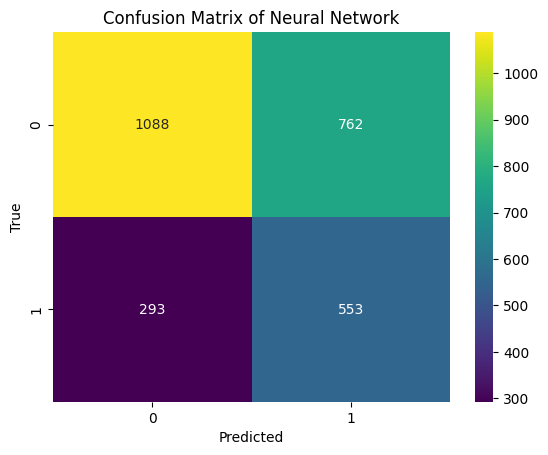

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step


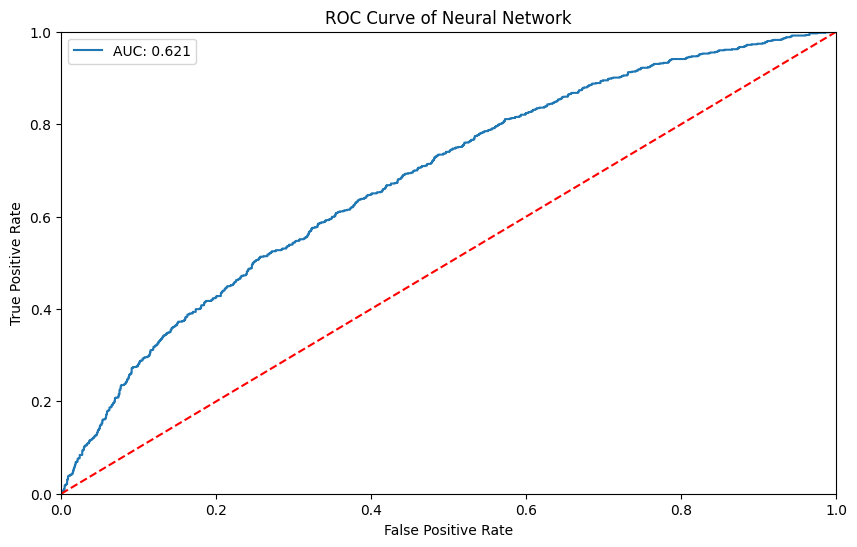

In [23]:
roc_auc_nn = roc_auc_score(y_test, y_pred)

cm_nn = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_nn, annot=True, cmap='viridis', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Neural Network')
plt.show()

roc_auc_nn

# plot roc curve
fpr, tpr, thresholds = roc_curve(y_test, nn.predict(X_test))
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC: {roc_auc_nn:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Neural Network')
plt.legend()
plt.show()

## Clustering

In [25]:
df_imputed = pd.read_csv('./caso_final_small_20k_con_mes_imputed.csv')

In [26]:
# Asume que df_imputed es tu DataFrame y que 'TARGET' es la columna que no quieres usar para clustering
X = df_imputed.drop(columns=['TARGET'])

# Definimos el rango de min_cluster_size que queremos evaluar
min_cluster_size_range = range(5, 51, 5)
davies_bouldin = []
silhouette = []
calinski_harabasz = []

for min_cluster_size in min_cluster_size_range:
    clusterer = HDBSCAN(min_cluster_size=min_cluster_size)
    cluster_labels = clusterer.fit_predict(X)
    
    # Filtrar clusters de ruido
    if len(set(cluster_labels)) > 1:  # Si hay más de un cluster
        # Davies-Bouldin Score
        db_score = davies_bouldin_score(X, cluster_labels)
        davies_bouldin.append(db_score)
        
        # Silhouette Score
        sil_score = silhouette_score(X, cluster_labels)
        silhouette.append(sil_score)
        
        # Calinski-Harabasz Index
        ch_score = calinski_harabasz_score(X, cluster_labels)
        calinski_harabasz.append(ch_score)
    else:
        davies_bouldin.append(np.nan)
        silhouette.append(np.nan)
        calinski_harabasz.append(np.nan)

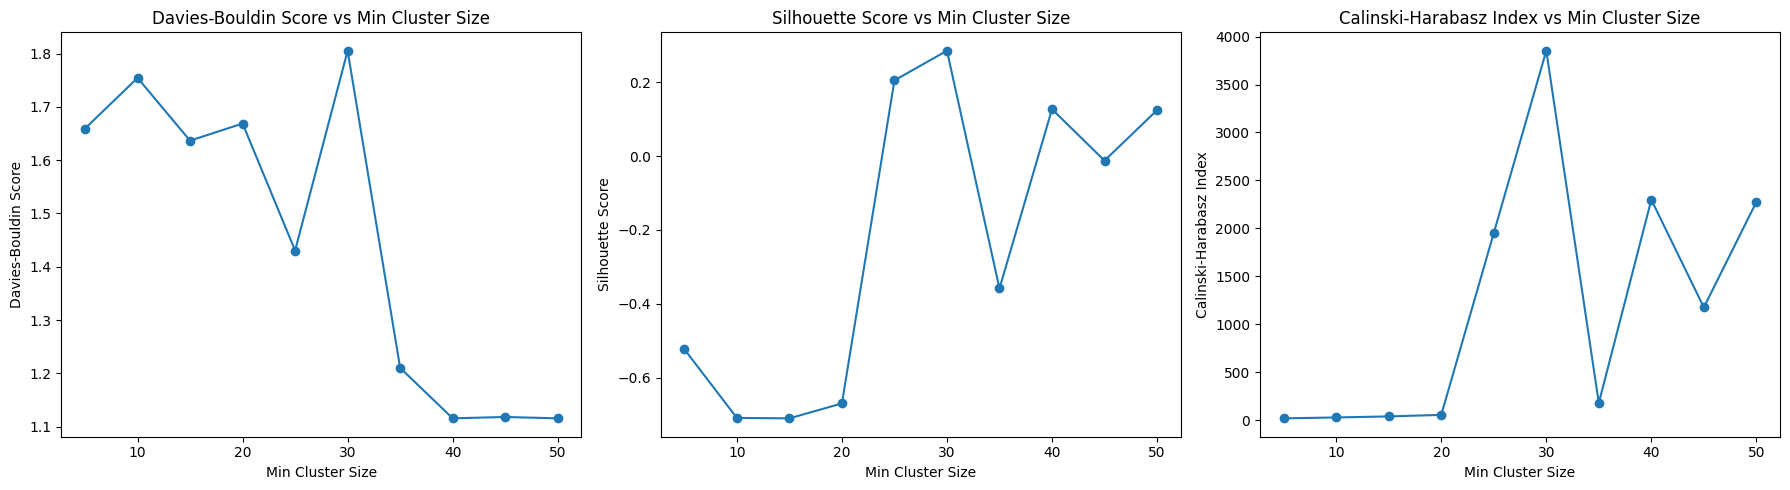

In [27]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.plot(min_cluster_size_range, davies_bouldin, marker='o')
plt.xlabel('Min Cluster Size')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies-Bouldin Score vs Min Cluster Size')

plt.subplot(1, 3, 2)
plt.plot(min_cluster_size_range, silhouette, marker='o')
plt.xlabel('Min Cluster Size')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Min Cluster Size')

plt.subplot(1, 3, 3)
plt.plot(min_cluster_size_range, calinski_harabasz, marker='o')
plt.xlabel('Min Cluster Size')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index vs Min Cluster Size')

plt.tight_layout()
plt.show()

In [28]:
# Asume que df_imputed es tu DataFrame y que 'TARGET' es la columna que no quieres usar para clustering
X = df_imputed.drop(columns=['TARGET'])

# Inicializa y ajusta el modelo HDBSCAN con min_cluster_size=30
clusterer = HDBSCAN(min_cluster_size=30)
cluster_labels = clusterer.fit_predict(X)

In [29]:
num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
print(f"Número de clusters: {num_clusters}")

Número de clusters: 2


In [30]:
df_imputed['Cluster'] = cluster_labels

In [31]:
df1 = df_imputed[df_imputed['Cluster'] == -1]
df2 = df_imputed[df_imputed['Cluster'] != -1]

In [32]:
df1.drop(columns=['Cluster'], inplace=True)
df2.drop(columns=['Cluster'], inplace=True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_28128\3872977471.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Usuario\AppData\Local\Temp\ipykernel_28128\3872977471.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
df1.shape, df2.shape

((6397, 17), (13574, 17))

In [34]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
yhat = lof.fit_predict(df1)

mask = yhat != -1
df1_cleaned = df1[mask]

print(f"Outliers detectados y eliminados: {np.sum(yhat == -1)}")

Outliers detectados y eliminados: 640


In [35]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
yhat = lof.fit_predict(df2)

mask = yhat != -1
df2_cleaned = df2[mask]

print(f"Outliers detectados y eliminados: {np.sum(yhat == -1)}")

Outliers detectados y eliminados: 1358


In [36]:
df1_cleaned.shape, df2_cleaned.shape

((5757, 17), (12216, 17))

In [37]:
X1 = df1_cleaned.drop(columns=['TARGET'])
X2 = df2_cleaned.drop(columns=['TARGET'])
y1 = df1_cleaned['TARGET']
y2 = df2_cleaned['TARGET']

In [38]:
mes_1_sin = np.sin(2 * np.pi * X1['MES_MES'] / 12).values.reshape(-1, 1)
mes_1_cos = np.cos(2 * np.pi * X1['MES_MES'] / 12).values.reshape(-1, 1)

X1['MES_SIN'] = mes_1_sin
X1['MES_COS'] = mes_1_cos
X1 = X1.drop(['MES_MES'], axis=1)

mes_2_sin = np.sin(2 * np.pi * X2['MES_MES'] / 12).values.reshape(-1, 1)
mes_2_cos = np.cos(2 * np.pi * X2['MES_MES'] / 12).values.reshape(-1, 1)

X2['MES_SIN'] = mes_2_sin
X2['MES_COS'] = mes_2_cos
X2 = X2.drop(['MES_MES'], axis=1)

In [39]:
X1 = X1.values
X2 = X2.values
y1 = y1.values.reshape(-1, 1)
y2 = y2.values.reshape(-1, 1)

In [40]:
type(X1), type(X2), type(y1), type(y2)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [41]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=42, stratify=y1, shuffle=True)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42, stratify=y2, shuffle=True)

In [42]:
scaler = StandardScaler()
X_train1_scaled = scaler.fit_transform(X_train1)
X_test1_scaled = scaler.transform(X_test1)
X_train2_scaled = scaler.fit_transform(X_train2)
X_test2_scaled = scaler.transform(X_test2)

In [43]:
smote = SMOTE(random_state=42)
X_train1_resampled, y_train1_resampled = smote.fit_resample(X_train1_scaled.copy(), y_train1.copy())
X_train2_resampled, y_train2_resampled = smote.fit_resample(X_train2_scaled.copy(), y_train2.copy())

In [44]:
X_test1, X_val1, y_test1, y_val1 = train_test_split(X_test1_scaled, y_test1, test_size=0.5, random_state=42, stratify=y_test1, shuffle=True)
X_test2, X_val2, y_test2, y_val2 = train_test_split(X_test2_scaled, y_test2, test_size=0.5, random_state=42, stratify=y_test2, shuffle=True)

In [28]:
def optimize_lr(trial, X_train, y_train, X_val, y_val, X_train_resampled, y_train_resampled):
    try:
        C = trial.suggest_float('C', 1e-10, 1e10, log=True)
        penalty = trial.suggest_categorical('penalty', ['l1', 'l2', 'elasticnet'])
        solver = trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'])
        if penalty == 'elasticnet':
            l1_ratio = trial.suggest_float('l1_ratio', 0, 1)
        else:
            l1_ratio = None
        lr = LogisticRegression(C=C, penalty=penalty, solver=solver, random_state=42, max_iter=10000, l1_ratio=l1_ratio)
        use_resampled = trial.suggest_categorical('use_resampled', [True, False])
        if use_resampled:
            lr.fit(X_train_resampled, y_train_resampled)
        else:
            lr.fit(X_train, y_train)
        y_pred = lr.predict(X_val)
        del lr
        gc.collect()
        return balanced_accuracy_score(y_val, y_pred)
    except Exception as e:
        logging.error(f'Error in Logistic Regression optimization: {e}')
        return float('-inf')

In [83]:
study = optuna.create_study(direction='maximize', storage='sqlite:///optuna_study_lr_1.db', load_if_exists=True, study_name='Logistic Regression BAS 1', pruner=pruner)
study.optimize(lambda trial: optimize_lr(trial, X_train1_scaled, y_train1, X_val1, y_val1, X_train1_resampled, y_train1_resampled), n_trials=300, gc_after_trial=True)

best_lr1 = study.best_params
best_lr1

[I 2024-06-08 22:08:15,044] A new study created in RDB with name: Logistic Regression BAS 1
ERROR:root:Error in Logistic Regression optimization: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.
[I 2024-06-08 22:08:15,215] Trial 0 finished with value: -inf and parameters: {'C': 29157.133024535327, 'penalty': 'elasticnet', 'solver': 'liblinear', 'l1_ratio': 0.07076906506765857, 'use_resampled': False}. Best is trial 0 with value: -inf.
ERROR:root:Error in Logistic Regression optimization: Solver lbfgs supports only 'l2' or None penalties, got l1 penalty.
[I 2024-06-08 22:08:17,642] Trial 1 finished with value: -inf and parameters: {'C': 6.905671511127822e-10, 'penalty': 'l1', 'solver': 'lbfgs', 'use_resampled': True}. Best is trial 0 with value: -inf.
ERROR:root:Error in Logistic Regression optimization: Solver newton-cg supports only 'l2' or None penalties, got elasticnet penalty.
[I 2024-06-08 22:08:20,033] Trial 2 finished with value: -inf and parameters: {'C': 3

{'C': 0.0013374681219782726,
 'penalty': 'l2',
 'solver': 'newton-cholesky',
 'use_resampled': True}

In [84]:
study = optuna.create_study(direction='maximize', storage='sqlite:///optuna_study_lr_2.db', load_if_exists=True, study_name='Logistic Regression BAS 2', pruner=pruner)
study.optimize(lambda trial: optimize_lr(trial, X_train2_scaled, y_train2, X_val2, y_val2, X_train2_resampled, y_train2_resampled), n_trials=300, gc_after_trial=True)

best_lr2 = study.best_params
best_lr2

[I 2024-06-08 22:29:53,119] A new study created in RDB with name: Logistic Regression BAS 2
[I 2024-06-08 22:29:55,504] Trial 0 finished with value: 0.5893250183418929 and parameters: {'C': 35068.48847940184, 'penalty': 'l2', 'solver': 'lbfgs', 'use_resampled': True}. Best is trial 0 with value: 0.5893250183418929.
ERROR:root:Error in Logistic Regression optimization: Solver sag supports only 'l2' or None penalties, got elasticnet penalty.
[I 2024-06-08 22:29:57,773] Trial 1 finished with value: -inf and parameters: {'C': 0.7506599285635381, 'penalty': 'elasticnet', 'solver': 'sag', 'l1_ratio': 0.09974489298057898, 'use_resampled': False}. Best is trial 0 with value: 0.5893250183418929.
ERROR:root:Error in Logistic Regression optimization: Solver sag supports only 'l2' or None penalties, got l1 penalty.
[I 2024-06-08 22:30:00,183] Trial 2 finished with value: -inf and parameters: {'C': 0.000758046212852232, 'penalty': 'l1', 'solver': 'sag', 'use_resampled': False}. Best is trial 0 with

{'C': 1.618463857221085e-06,
 'penalty': 'l2',
 'solver': 'sag',
 'use_resampled': True}

In [85]:
study = optuna.load_study(study_name='Logistic Regression BAS 1', storage='sqlite:///optuna_study_lr_1.db')
best_lr1 = study.best_params
use_resampled = best_lr1.pop('use_resampled')
lr1 = LogisticRegression(**best_lr1, random_state=42, max_iter=10000)
if use_resampled:
    lr1.fit(X_train1_resampled, y_train1_resampled)
else:
    lr1.fit(X_train1_scaled, y_train1)
y_pred1 = lr1.predict(X_test1)
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.65      0.58      0.62       491
           1       0.52      0.59      0.55       373

    accuracy                           0.59       864
   macro avg       0.58      0.59      0.58       864
weighted avg       0.59      0.59      0.59       864



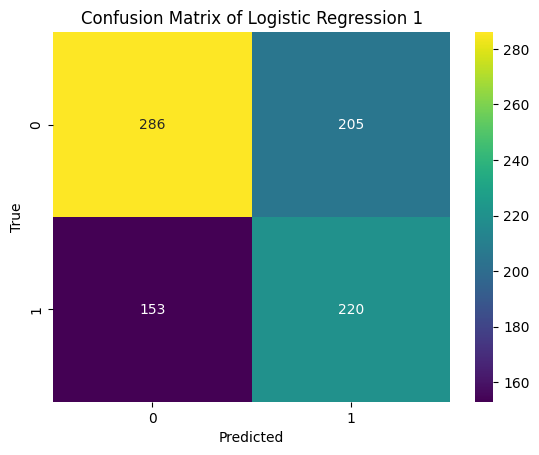

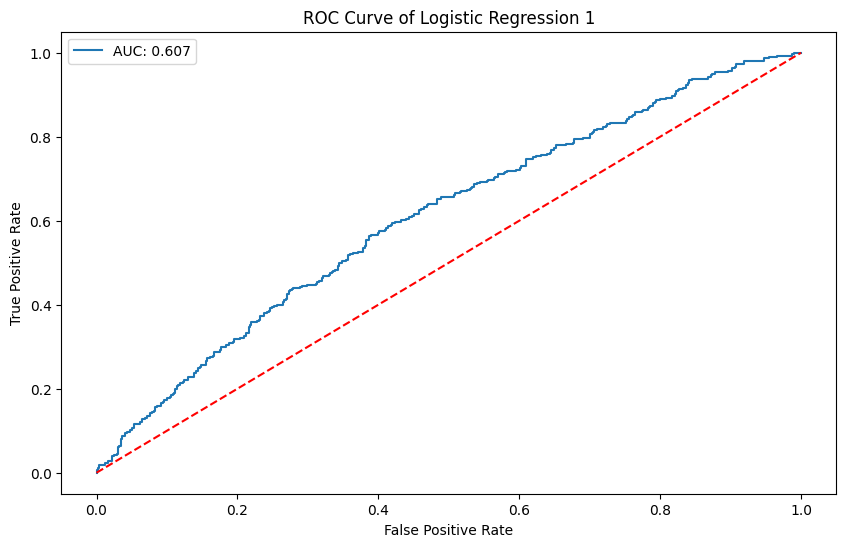

In [86]:
roc_auc_lr1 = roc_auc_score(y_test1, lr1.predict_proba(X_test1)[:, 1])
roc_auc_lr1

cm_lr1 = confusion_matrix(y_test1, y_pred1)
sns.heatmap(cm_lr1, annot=True, cmap='viridis', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Logistic Regression 1')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test1, lr1.predict_proba(X_test1)[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC: {roc_auc_lr1:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Logistic Regression 1')
plt.legend()
plt.show()

In [87]:
study = optuna.load_study(study_name='Logistic Regression BAS 2', storage='sqlite:///optuna_study_lr_2.db')
best_lr2 = study.best_params
use_resampled = best_lr2.pop('use_resampled')
lr2 = LogisticRegression(**best_lr2, random_state=42, max_iter=10000)
if use_resampled:
    lr2.fit(X_train2_resampled, y_train2_resampled)
else:
    lr2.fit(X_train2_scaled, y_train2)
y_pred2 = lr2.predict(X_test2)
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.81      0.67      0.73      1362
           1       0.36      0.55      0.44       470

    accuracy                           0.64      1832
   macro avg       0.59      0.61      0.58      1832
weighted avg       0.70      0.64      0.66      1832



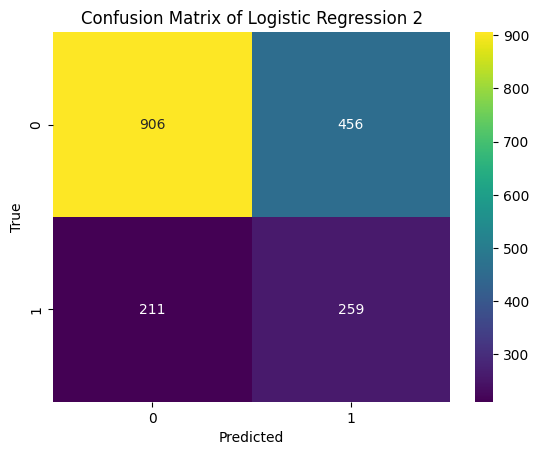

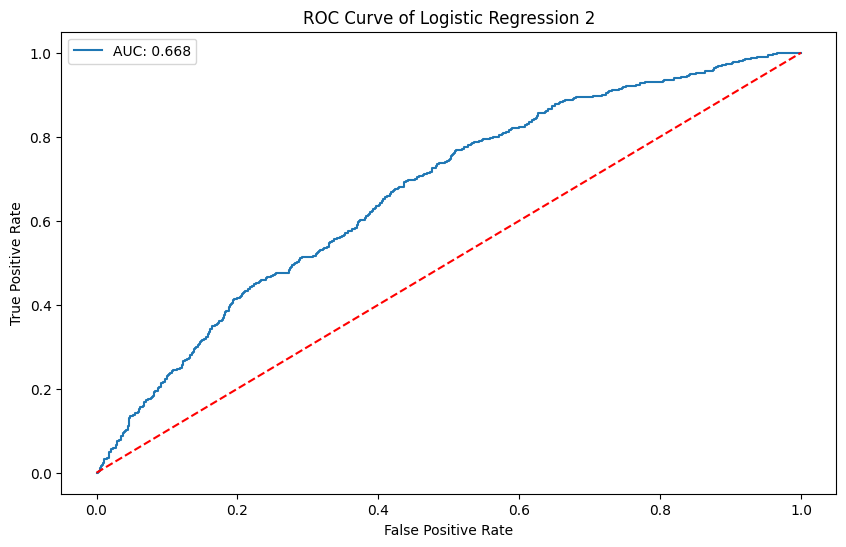

In [88]:
roc_auc_lr2 = roc_auc_score(y_test2, lr2.predict_proba(X_test2)[:, 1])
roc_auc_lr2

cm_lr2 = confusion_matrix(y_test2, y_pred2)
sns.heatmap(cm_lr2, annot=True, cmap='viridis', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Logistic Regression 2')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test2, lr2.predict_proba(X_test2)[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC: {roc_auc_lr2:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Logistic Regression 2')
plt.legend()
plt.show()

In [89]:
def optimize_random_forest(trial, X_train, y_train, X_val, y_val, X_train_resampled, y_train_resampled):
    try:
        # Definir los hiperparámetros
        n_estimators = trial.suggest_int('n_estimators', 100, 1000)
        max_depth = trial.suggest_int('max_depth', 1, 50)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
        criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
        max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
        
        class_weight_option = trial.suggest_int('class_weight', 0, 5)
        
        # Asignar pesos según el valor entero seleccionado
        if class_weight_option == 0:
            class_weight = None
        elif class_weight_option == 1:
            class_weight = 'balanced'
        else:
            class_weight = {0: 1, 1: class_weight_option}
        
        # Registro de hiperparámetros seleccionados
        logging.info(f"Trial {trial.number} - Params: n_estimators: {n_estimators}, max_depth: {max_depth}, min_samples_split: {min_samples_split}, min_samples_leaf: {min_samples_leaf}, criterion: {criterion}, max_features: {max_features}, class_weight: {class_weight_option}")

        # Crear el modelo de RandomForest
        rf = RandomForestClassifier(
            n_estimators=n_estimators, 
            max_depth=max_depth, 
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf, 
            random_state=42, 
            criterion=criterion, 
            max_features=max_features, 
            n_jobs=-1,
            class_weight=class_weight
        )
        
        use_resampled = trial.suggest_categorical('use_resampled', [True, False])
        if use_resampled:
            rf.fit(X_train_resampled, y_train_resampled.ravel())
        else:
            rf.fit(X_train, y_train.ravel())

        y_pred = rf.predict(X_val)
        del rf
        gc.collect()
        return balanced_accuracy_score(y_val, y_pred)
    except Exception as e:
        logging.error(f"Optimization error in trial {trial.number}: {e}")
        return float('-inf')

In [4]:
pruner = optuna.pruners.SuccessiveHalvingPruner(min_resource=1, reduction_factor=4, min_early_stopping_rate=0)

In [91]:
study = optuna.create_study(direction='maximize', storage='sqlite:///optuna_study_rf1.db', load_if_exists=True, study_name='RandomForest BAS 1', pruner=pruner)

study.optimize(lambda trial: optimize_random_forest(trial, X_train1, y_train1, X_val1, y_val1, X_train1_resampled, y_train1_resampled), n_trials=200, gc_after_trial=True)

best_rf1 = study.best_params

joblib.dump(study, 'optuna_study_rf1.pkl')

best_rf1

[I 2024-06-08 22:51:19,944] A new study created in RDB with name: RandomForest BAS 1
[I 2024-06-08 22:51:23,628] Trial 0 finished with value: 0.5 and parameters: {'n_estimators': 920, 'max_depth': 50, 'min_samples_split': 10, 'min_samples_leaf': 19, 'criterion': 'gini', 'max_features': 'log2', 'class_weight': 0, 'use_resampled': False}. Best is trial 0 with value: 0.5.
[I 2024-06-08 22:51:29,293] Trial 1 finished with value: 0.5 and parameters: {'n_estimators': 544, 'max_depth': 44, 'min_samples_split': 14, 'min_samples_leaf': 20, 'criterion': 'entropy', 'max_features': None, 'class_weight': 3, 'use_resampled': False}. Best is trial 0 with value: 0.5.
[I 2024-06-08 22:51:34,547] Trial 2 finished with value: 0.5 and parameters: {'n_estimators': 393, 'max_depth': 35, 'min_samples_split': 7, 'min_samples_leaf': 2, 'criterion': 'entropy', 'max_features': 'sqrt', 'class_weight': 2, 'use_resampled': False}. Best is trial 0 with value: 0.5.
[I 2024-06-08 22:51:39,837] Trial 3 finished with va

{'n_estimators': 185,
 'max_depth': 4,
 'min_samples_split': 7,
 'min_samples_leaf': 19,
 'criterion': 'gini',
 'max_features': 'log2',
 'class_weight': 1,
 'use_resampled': True}

In [92]:
study = optuna.create_study(direction='maximize', storage='sqlite:///optuna_study_rf2.db', load_if_exists=True, study_name='RandomForest BAS 2', pruner=pruner)

study.optimize(lambda trial: optimize_random_forest(trial, X_train2, y_train2, X_val2, y_val2, X_train2_resampled, y_train2_resampled), n_trials=200, gc_after_trial=True)

best_rf2 = study.best_params

joblib.dump(study, 'optuna_study_rf2.pkl')

best_rf2

[I 2024-06-08 23:08:06,719] A new study created in RDB with name: RandomForest BAS 2
[I 2024-06-08 23:08:09,828] Trial 0 finished with value: 0.5 and parameters: {'n_estimators': 352, 'max_depth': 9, 'min_samples_split': 19, 'min_samples_leaf': 12, 'criterion': 'entropy', 'max_features': 'sqrt', 'class_weight': 1, 'use_resampled': False}. Best is trial 0 with value: 0.5.
[I 2024-06-08 23:08:15,830] Trial 1 finished with value: 0.5 and parameters: {'n_estimators': 903, 'max_depth': 26, 'min_samples_split': 2, 'min_samples_leaf': 18, 'criterion': 'gini', 'max_features': 'sqrt', 'class_weight': 1, 'use_resampled': False}. Best is trial 0 with value: 0.5.
[I 2024-06-08 23:08:22,530] Trial 2 finished with value: 0.5003668378576669 and parameters: {'n_estimators': 540, 'max_depth': 37, 'min_samples_split': 3, 'min_samples_leaf': 4, 'criterion': 'gini', 'max_features': None, 'class_weight': 5, 'use_resampled': False}. Best is trial 2 with value: 0.5003668378576669.
[I 2024-06-08 23:08:28,519]

{'n_estimators': 304,
 'max_depth': 46,
 'min_samples_split': 16,
 'min_samples_leaf': 14,
 'criterion': 'gini',
 'max_features': 'log2',
 'class_weight': 2,
 'use_resampled': True}

In [93]:
study = optuna.load_study(study_name='RandomForest BAS 1', storage='sqlite:///optuna_study_rf1.db')
best_rf1 = study.best_params
class_weight_option = best_rf1['class_weight']
use_resampled = best_rf1['use_resampled']
if class_weight_option == 0:
    class_weight = None
elif class_weight_option == 1:
    class_weight = 'balanced'
else:
    class_weight = {0: 1, 1: class_weight_option}
    
best_rf1.pop('class_weight')
best_rf1.pop('use_resampled')

rf1 = RandomForestClassifier(**best_rf1,
                            class_weight=class_weight,
                            random_state=42,
                            n_jobs=-1)

if use_resampled:
    rf1.fit(X_train1_resampled, y_train1_resampled.ravel())
else:
    rf1.fit(X_train1, y_train1.ravel())
    
y_pred1 = rf1.predict(X_test1)

print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.67      0.54      0.60       491
           1       0.52      0.65      0.58       373

    accuracy                           0.59       864
   macro avg       0.60      0.60      0.59       864
weighted avg       0.61      0.59      0.59       864



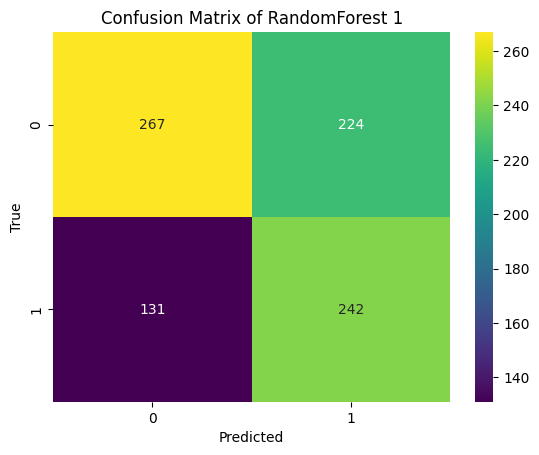

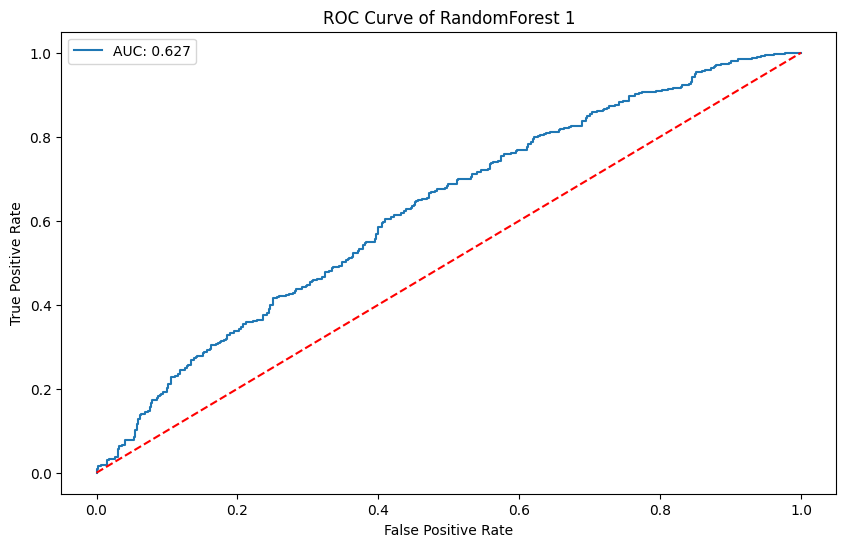

In [94]:
roc_auc_rf1 = roc_auc_score(y_test1, rf1.predict_proba(X_test1)[:, 1])

cm_rf1 = confusion_matrix(y_test1, y_pred1)
sns.heatmap(cm_rf1, annot=True, cmap='viridis', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of RandomForest 1')
plt.show()

roc_auc_rf1

fpr, tpr, thresholds = roc_curve(y_test1, rf1.predict_proba(X_test1)[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC: {roc_auc_rf1:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC Curve of RandomForest 1')
plt.legend()
plt.show()

In [95]:
study = optuna.load_study(study_name='RandomForest BAS 2', storage='sqlite:///optuna_study_rf2.db')
best_rf2 = study.best_params
class_weight_option = best_rf2['class_weight']
use_resampled = best_rf2['use_resampled']
if class_weight_option == 0:
    class_weight = None
elif class_weight_option == 1:
    class_weight = 'balanced'
else:
    class_weight = {0: 1, 1: class_weight_option}
    
best_rf2.pop('class_weight')
best_rf2.pop('use_resampled')

rf2 = RandomForestClassifier(**best_rf2,
                            class_weight=class_weight,
                            random_state=42,
                            n_jobs=-1)

if use_resampled:
    rf2.fit(X_train2_resampled, y_train2_resampled.ravel())
else:
    rf2.fit(X_train2, y_train2.ravel())
    
y_pred2 = rf2.predict(X_test2)

print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.85      0.54      0.66      1362
           1       0.35      0.71      0.47       470

    accuracy                           0.59      1832
   macro avg       0.60      0.63      0.56      1832
weighted avg       0.72      0.59      0.61      1832



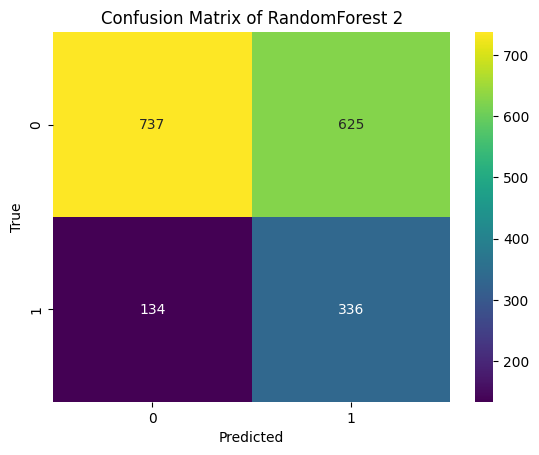

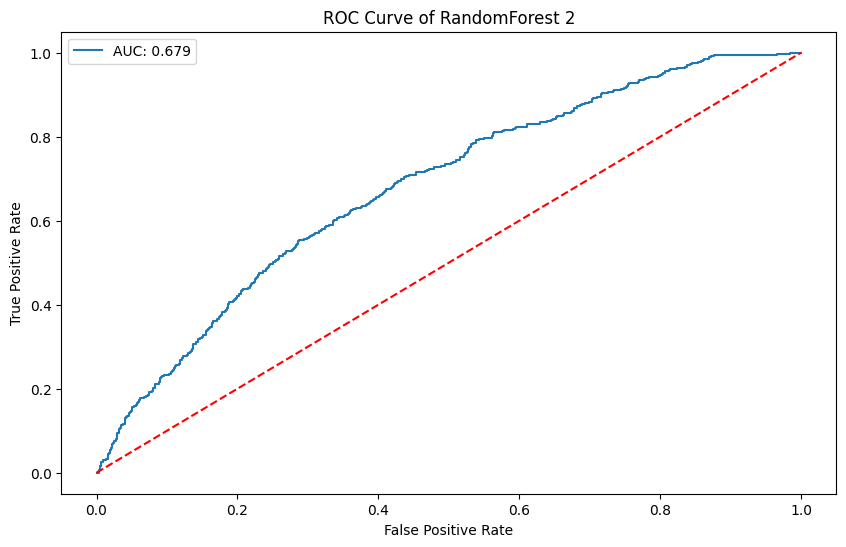

In [96]:
roc_auc_rf2 = roc_auc_score(y_test2, rf2.predict_proba(X_test2)[:, 1])

cm_rf2 = confusion_matrix(y_test2, y_pred2)
sns.heatmap(cm_rf2, annot=True, cmap='viridis', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of RandomForest 2')
plt.show()

roc_auc_rf2

fpr, tpr, thresholds = roc_curve(y_test2, rf2.predict_proba(X_test2)[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC: {roc_auc_rf2:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC Curve of RandomForest 2')
plt.legend()

In [45]:
def optimize_xgboost(trial, X_train, y_train, X_val, y_val, X_train_resampled, y_train_resampled):
    try:
        # scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)
        # Definir los hiperparámetros con rangos reducidos
        n_estimators = trial.suggest_int('n_estimators', 100, 600)
        max_depth = trial.suggest_int('max_depth', 3, 10)
        learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-1, log=True)
        booster = trial.suggest_categorical('booster', ['gbtree', 'dart'])  # Eliminado 'gblinear' para reducir complejidad
        subsample = trial.suggest_float('subsample', 0.5, 1.0)
        colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)
        min_child_weight = trial.suggest_int('min_child_weight', 1, 6)
        gamma = trial.suggest_float('gamma', 0, 5)
        reg_alpha = trial.suggest_float('reg_alpha', 1e-5, 20, log=True)
        reg_lambda = trial.suggest_float('reg_lambda', 1e-5, 10, log=True)
        # scale_pos_weight = trial.suggest_float('scale_pos_weight', 1, 20)
        
        # Crear el modelo de XGBoost
        xgb_model = xgb.XGBClassifier(
            n_estimators=n_estimators, 
            max_depth=max_depth, 
            learning_rate=learning_rate,
            booster=booster, 
            subsample=subsample, 
            colsample_bytree=colsample_bytree,
            min_child_weight=min_child_weight, 
            gamma=gamma,
            reg_alpha=reg_alpha,
            reg_lambda=reg_lambda,
            # scale_pos_weight=scale_pos_weight,
            random_state=42
        )
        
        logging.info(f"Trial {trial.number} - Model created with params: {trial.params}")

        use_resampled = trial.suggest_categorical('use_resampled', [True, False])
        if use_resampled:
            xgb_model.fit(X_train_resampled, y_train_resampled)
        else:
            xgb_model.fit(X_train, y_train)
            
        y_pred = xgb_model.predict(X_val)
        del xgb_model
        gc.collect()
        return balanced_accuracy_score(y_val, y_pred)
    except Exception as e:
        logging.error(f"Optimization error in trial {trial.number}: {e}")
        return float('-inf')

In [99]:
study = optuna.create_study(direction='maximize', storage='sqlite:///optuna_study_xgb1.db', load_if_exists=True, study_name='XGBoost BAS 1', pruner=pruner)

study.optimize(lambda trial: optimize_xgboost(trial, X_train1_scaled, y_train1, X_val1, y_val1, X_train1_resampled, y_train1_resampled), n_trials=200, gc_after_trial=True)

best_xgb1 = study.best_params

joblib.dump(study, 'optuna_study_xgb1.pkl')

best_xgb1

[I 2024-06-09 00:19:43,864] Using an existing study with name 'XGBoost BAS 1' instead of creating a new one.
[I 2024-06-09 00:20:01,908] Trial 110 finished with value: 0.5687875150060024 and parameters: {'n_estimators': 347, 'max_depth': 3, 'learning_rate': 0.017723711046101855, 'booster': 'dart', 'subsample': 0.5935252244247042, 'colsample_bytree': 0.7863977757349893, 'min_child_weight': 6, 'gamma': 4.888586690756242, 'reg_alpha': 5.648647667983693, 'reg_lambda': 0.35568157306551934, 'use_resampled': True}. Best is trial 86 with value: 0.5906362545018007.
[I 2024-06-09 00:20:14,541] Trial 111 finished with value: 0.5701244134017243 and parameters: {'n_estimators': 240, 'max_depth': 9, 'learning_rate': 0.006767781223013403, 'booster': 'dart', 'subsample': 0.5358716334434434, 'colsample_bytree': 0.6665177418483954, 'min_child_weight': 6, 'gamma': 4.128558541713404, 'reg_alpha': 4.450559344562488, 'reg_lambda': 1.3582800281998282, 'use_resampled': True}. Best is trial 86 with value: 0.59

{'n_estimators': 342,
 'max_depth': 9,
 'learning_rate': 0.010488792600129169,
 'booster': 'dart',
 'subsample': 0.5146340554697559,
 'colsample_bytree': 0.7502010287276828,
 'min_child_weight': 6,
 'gamma': 4.847456340212361,
 'reg_alpha': 7.223908859704513,
 'reg_lambda': 4.878012378191845,
 'use_resampled': True}

In [46]:
study = optuna.create_study(direction='maximize', storage='sqlite:///optuna_study_xgb2.db', load_if_exists=True, study_name='XGBoost BAS 2', pruner=pruner)

study.optimize(lambda trial: optimize_xgboost(trial, X_train2_scaled, y_train2, X_val2, y_val2, X_train2_resampled, y_train2_resampled), n_trials=60, gc_after_trial=True)

best_xgb2 = study.best_params

joblib.dump(study, 'optuna_study_xgb2.pkl')

best_xgb2

[I 2024-06-09 02:31:37,347] Using an existing study with name 'XGBoost BAS 2' instead of creating a new one.
[I 2024-06-09 02:31:48,291] Trial 142 finished with value: 0.6110418195157741 and parameters: {'n_estimators': 175, 'max_depth': 4, 'learning_rate': 0.000691401279354572, 'booster': 'dart', 'subsample': 0.7855316733025016, 'colsample_bytree': 0.6501794510130223, 'min_child_weight': 2, 'gamma': 0.24082742262228687, 'reg_alpha': 0.027016875973991775, 'reg_lambda': 3.29858863905898, 'use_resampled': True}. Best is trial 137 with value: 0.6125091709464416.
[I 2024-06-09 02:32:02,278] Trial 143 finished with value: 0.6090608950843727 and parameters: {'n_estimators': 194, 'max_depth': 4, 'learning_rate': 0.0005909784993975443, 'booster': 'dart', 'subsample': 0.8057080273144289, 'colsample_bytree': 0.6388204966966382, 'min_child_weight': 2, 'gamma': 0.1326045974721445, 'reg_alpha': 0.00932252262496436, 'reg_lambda': 1.2978395955160863e-05, 'use_resampled': True}. Best is trial 137 with

{'n_estimators': 336,
 'max_depth': 4,
 'learning_rate': 0.0009986672685716774,
 'booster': 'dart',
 'subsample': 0.7839490989364447,
 'colsample_bytree': 0.5273271054824267,
 'min_child_weight': 2,
 'gamma': 0.5297275501250265,
 'reg_alpha': 2.024000652338936,
 'reg_lambda': 0.00011608458703918562,
 'use_resampled': True}

In [47]:
study = optuna.load_study(study_name='XGBoost BAS 1', storage='sqlite:///optuna_study_xgb1.db')
best_xgb1 = study.best_params
use_resampled = best_xgb1.pop('use_resampled')
xgb_model1 = xgb.XGBClassifier(**best_xgb1, random_state=42)
if use_resampled:
    xgb_model1.fit(X_train1_resampled, y_train1_resampled)
else:
    xgb_model1.fit(X_train1_scaled, y_train1)
y_pred1 = xgb_model1.predict(X_test1)

print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.66      0.55      0.60       491
           1       0.52      0.64      0.57       373

    accuracy                           0.58       864
   macro avg       0.59      0.59      0.58       864
weighted avg       0.60      0.58      0.59       864



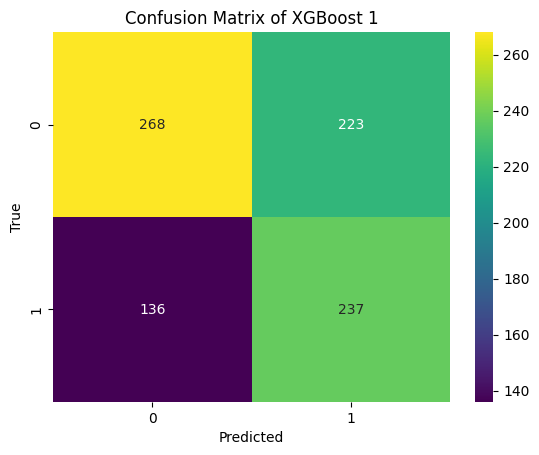

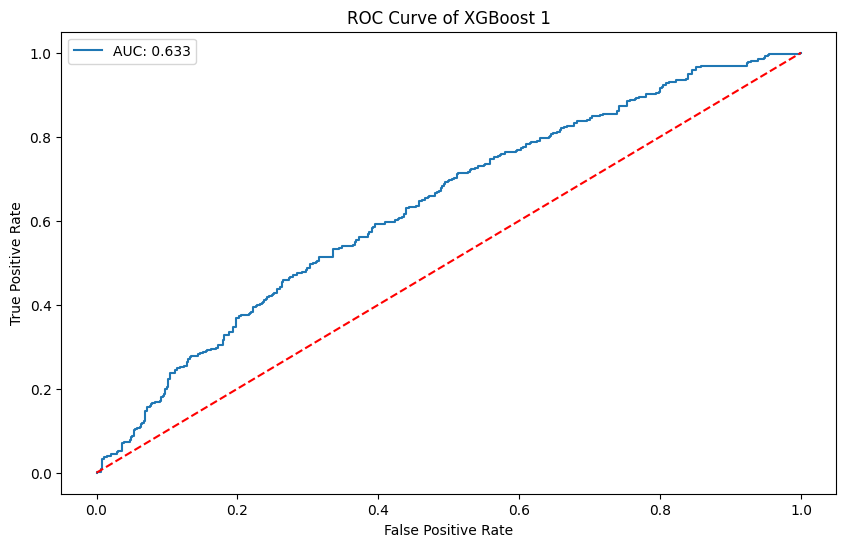

In [48]:
roc_auc_xgb1 = roc_auc_score(y_test1, xgb_model1.predict_proba(X_test1)[:, 1])

cm_xgb1 = confusion_matrix(y_test1, y_pred1)
sns.heatmap(cm_xgb1, annot=True, cmap='viridis', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of XGBoost 1')
plt.show()

roc_auc_xgb1

fpr, tpr, thresholds = roc_curve(y_test1, xgb_model1.predict_proba(X_test1)[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC: {roc_auc_xgb1:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of XGBoost 1')
plt.legend()
plt.show()

In [49]:
study = optuna.load_study(study_name='XGBoost BAS 2', storage='sqlite:///optuna_study_xgb2.db')
best_xgb2 = study.best_params
use_resampled = best_xgb2.pop('use_resampled')
xgb_model2 = xgb.XGBClassifier(**best_xgb2, random_state=42)
if use_resampled:
    xgb_model2.fit(X_train2_resampled, y_train2_resampled)
else:
    xgb_model2.fit(X_train2_scaled, y_train2)
y_pred2 = xgb_model2.predict(X_test2)

print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.84      0.61      0.71      1362
           1       0.37      0.66      0.47       470

    accuracy                           0.62      1832
   macro avg       0.60      0.63      0.59      1832
weighted avg       0.72      0.62      0.65      1832



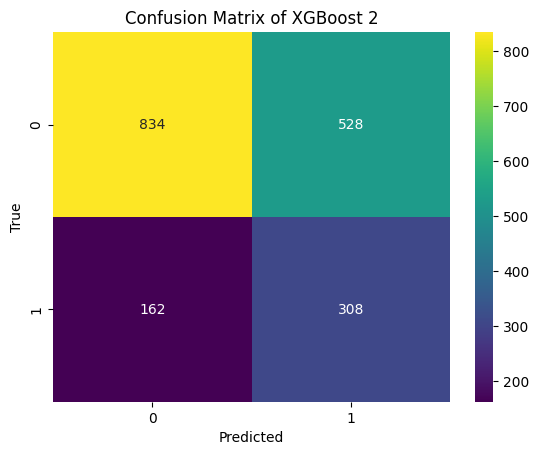

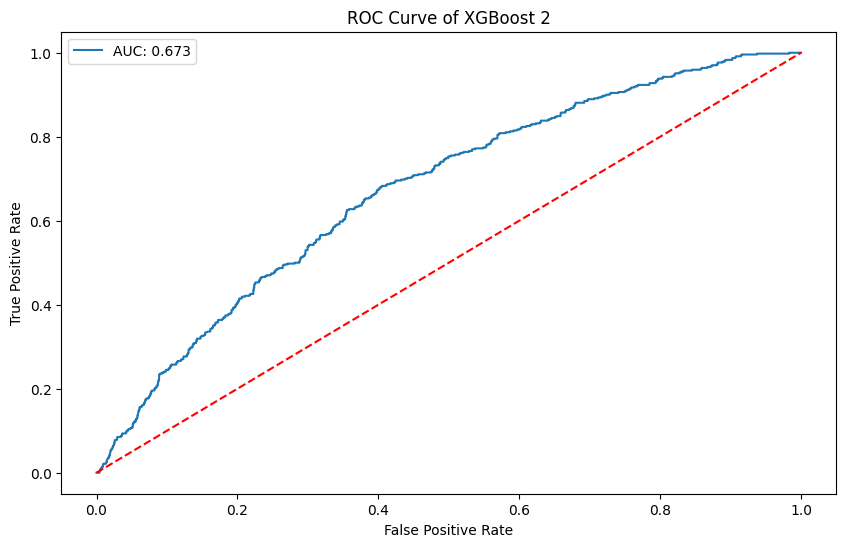

In [50]:
roc_auc_xgb2 = roc_auc_score(y_test2, xgb_model2.predict_proba(X_test2)[:, 1])

cm_xgb2 = confusion_matrix(y_test2, y_pred2)
sns.heatmap(cm_xgb2, annot=True, cmap='viridis', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of XGBoost 2')
plt.show()

roc_auc_xgb2

fpr, tpr, thresholds = roc_curve(y_test2, xgb_model2.predict_proba(X_test2)[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC: {roc_auc_xgb2:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of XGBoost 2')
plt.legend()
plt.show()

In [51]:
def balanced_accuracy(y_true, y_pred):
    y_pred = tf.round(tf.clip_by_value(y_pred, 0, 1))
    y_true = tf.cast(y_true, tf.float32)

    tp = tf.reduce_sum(tf.cast(y_true * y_pred, tf.float32))
    tn = tf.reduce_sum(tf.cast((1 - y_true) * (1 - y_pred), tf.float32))
    fp = tf.reduce_sum(tf.cast((1 - y_true) * y_pred, tf.float32))
    fn = tf.reduce_sum(tf.cast(y_true * (1 - y_pred), tf.float32))

    tpr = tf.math.divide_no_nan(tp, tp + fn)  # Tasa de verdaderos positivos
    tnr = tf.math.divide_no_nan(tn, tn + fp)  # Tasa de verdaderos negativos

    balanced_acc = tf.math.divide_no_nan((tpr + tnr), 2.0)
    return balanced_acc

def optimize_nn(trial, X_train, y_train, X_val, y_val, X_train_resampled, y_train_resampled):
    try:
        neurons_first_layer = trial.suggest_int('neurons_first_layer', 10, 200)
        neurons_second_layer = trial.suggest_int('neurons_second_layer', 10, 200)
        neurons_third_layer = trial.suggest_int('neurons_third_layer', 10, 200)
        add_fourth_layer = trial.suggest_categorical('add_fourth_layer', [True, False])
        if add_fourth_layer:
            neurons_fourth_layer = trial.suggest_int('neurons_fourth_layer', 10, 200)
        else:
            neurons_fourth_layer = 0
        add_fifth_layer = trial.suggest_categorical('add_fifth_layer', [True, False])
        if add_fifth_layer:
            neurons_fifth_layer = trial.suggest_int('neurons_fifth_layer', 10, 200)
        else:
            neurons_fifth_layer = 0

        early_stopping = keras.callbacks.EarlyStopping(monitor='val_balanced_accuracy', patience=20, restore_best_weights=True, mode='max')
        activation = trial.suggest_categorical('activation', ['relu', 'tanh'])
        optimizer = trial.suggest_categorical('optimizer', ['adam', 'rmsprop', 'sgd'])
        loss = trial.suggest_categorical('loss', ['binary_crossentropy'])
        batch_size = trial.suggest_int('batch_size', 32, 128)
        learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True)
        dropout = trial.suggest_float('dropout', 0.1, 0.3)

        if optimizer == 'adam':
            opt = keras.optimizers.Adam(learning_rate=learning_rate)
        elif optimizer == 'rmsprop':
            opt = keras.optimizers.RMSprop(learning_rate=learning_rate)
        else:
            opt = keras.optimizers.SGD(learning_rate=learning_rate)

        physical_devices = tf.config.list_physical_devices('GPU')
        if len(physical_devices) > 0:
            tf.config.experimental.set_memory_growth(physical_devices[0], True)

        # Crear el modelo
        nn = keras.models.Sequential()
        nn.add(keras.layers.InputLayer(shape=(X_train.shape[1],)))
        nn.add(keras.layers.Dropout(dropout))
        nn.add(keras.layers.Dense(neurons_first_layer, activation=activation))
        nn.add(keras.layers.Dropout(dropout))
        nn.add(keras.layers.Dense(neurons_second_layer, activation=activation))
        nn.add(keras.layers.Dropout(dropout))
        nn.add(keras.layers.Dense(neurons_third_layer, activation=activation))
        if add_fourth_layer:
            nn.add(keras.layers.Dropout(dropout))
            nn.add(keras.layers.Dense(neurons_fourth_layer, activation=activation))
        if add_fifth_layer:
            nn.add(keras.layers.Dropout(dropout))
            nn.add(keras.layers.Dense(neurons_fifth_layer, activation=activation))
        nn.add(keras.layers.Dense(1, activation='sigmoid'))
        
        nn.compile(optimizer=opt, loss=loss, metrics=[balanced_accuracy])
        
        use_resampled = trial.suggest_categorical('use_resampled', [True, False])
        if use_resampled:
            nn.fit(X_train_resampled, y_train_resampled, validation_data=(X_val, y_val), batch_size=batch_size,
                   epochs=900, callbacks=[early_stopping], verbose=0)
        else:
            nn.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=batch_size,
                   epochs=900, callbacks=[early_stopping], verbose=0)
            
        y_pred = nn.predict(X_val)
        y_pred = np.round(y_pred)
        del nn
        gc.collect()
        return balanced_accuracy(y_val, y_pred)
    except Exception as e:
        logging.error(f"Optimization error in trial {trial.number}: {e}")
        return float('-inf')

In [52]:
study = optuna.create_study(direction='maximize', storage='sqlite:///optuna_study_nn1.db', load_if_exists=True, study_name='Neural Network BAS 1', pruner=pruner)

study.optimize(lambda trial: optimize_nn(trial, X_train1_scaled, y_train1, X_val1, y_val1, X_train1_resampled, y_train1_resampled), n_trials=200, gc_after_trial=True)

best_nn1 = study.best_params

joblib.dump(study, 'optuna_study_nn1.pkl')

best_nn1

[I 2024-06-09 03:06:35,345] A new study created in RDB with name: Neural Network BAS 1


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step


[I 2024-06-09 03:06:45,623] Trial 0 finished with value: 0.6015114784240723 and parameters: {'neurons_first_layer': 149, 'neurons_second_layer': 65, 'neurons_third_layer': 91, 'add_fourth_layer': True, 'neurons_fourth_layer': 97, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 58, 'learning_rate': 0.0015351033487537766, 'dropout': 0.281650992620354, 'use_resampled': True}. Best is trial 0 with value: 0.6015114784240723.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step


[I 2024-06-09 03:06:54,760] Trial 1 finished with value: 0.5759249329566956 and parameters: {'neurons_first_layer': 37, 'neurons_second_layer': 192, 'neurons_third_layer': 43, 'add_fourth_layer': True, 'neurons_fourth_layer': 14, 'add_fifth_layer': True, 'neurons_fifth_layer': 150, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 42, 'learning_rate': 0.003056917583559837, 'dropout': 0.268845866699225, 'use_resampled': True}. Best is trial 0 with value: 0.6015114784240723.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step


[I 2024-06-09 03:07:01,261] Trial 2 finished with value: 0.5557459592819214 and parameters: {'neurons_first_layer': 133, 'neurons_second_layer': 11, 'neurons_third_layer': 10, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 122, 'learning_rate': 0.0004399529250610143, 'dropout': 0.1581248907289331, 'use_resampled': False}. Best is trial 0 with value: 0.6015114784240723.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step


[I 2024-06-09 03:07:09,844] Trial 3 finished with value: 0.5740368366241455 and parameters: {'neurons_first_layer': 24, 'neurons_second_layer': 83, 'neurons_third_layer': 53, 'add_fourth_layer': True, 'neurons_fourth_layer': 74, 'add_fifth_layer': True, 'neurons_fifth_layer': 144, 'activation': 'relu', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 85, 'learning_rate': 0.0005240274172675951, 'dropout': 0.19352287882936592, 'use_resampled': False}. Best is trial 0 with value: 0.6015114784240723.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step


[I 2024-06-09 03:07:19,248] Trial 4 finished with value: 0.5737749338150024 and parameters: {'neurons_first_layer': 42, 'neurons_second_layer': 124, 'neurons_third_layer': 167, 'add_fourth_layer': True, 'neurons_fourth_layer': 93, 'add_fifth_layer': True, 'neurons_fifth_layer': 176, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 118, 'learning_rate': 0.0001566520439850218, 'dropout': 0.25981937596754795, 'use_resampled': True}. Best is trial 0 with value: 0.6015114784240723.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step


[I 2024-06-09 03:07:30,371] Trial 5 finished with value: 0.5552002787590027 and parameters: {'neurons_first_layer': 160, 'neurons_second_layer': 119, 'neurons_third_layer': 105, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'sgd', 'loss': 'binary_crossentropy', 'batch_size': 105, 'learning_rate': 0.00016376988682394343, 'dropout': 0.2720101234521263, 'use_resampled': True}. Best is trial 0 with value: 0.6015114784240723.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step


[I 2024-06-09 03:07:40,691] Trial 6 finished with value: 0.5578958988189697 and parameters: {'neurons_first_layer': 14, 'neurons_second_layer': 143, 'neurons_third_layer': 170, 'add_fourth_layer': True, 'neurons_fourth_layer': 29, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 93, 'learning_rate': 9.543592081791578e-05, 'dropout': 0.18397269396079316, 'use_resampled': False}. Best is trial 0 with value: 0.6015114784240723.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step


[I 2024-06-09 03:07:56,763] Trial 7 finished with value: 0.5705118179321289 and parameters: {'neurons_first_layer': 187, 'neurons_second_layer': 149, 'neurons_third_layer': 123, 'add_fourth_layer': True, 'neurons_fourth_layer': 135, 'add_fifth_layer': True, 'neurons_fifth_layer': 18, 'activation': 'tanh', 'optimizer': 'sgd', 'loss': 'binary_crossentropy', 'batch_size': 39, 'learning_rate': 0.0005131564785151894, 'dropout': 0.24530944654189002, 'use_resampled': True}. Best is trial 0 with value: 0.6015114784240723.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step


[I 2024-06-09 03:08:13,226] Trial 8 finished with value: 0.57602858543396 and parameters: {'neurons_first_layer': 49, 'neurons_second_layer': 192, 'neurons_third_layer': 191, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'sgd', 'loss': 'binary_crossentropy', 'batch_size': 92, 'learning_rate': 0.005324536678537144, 'dropout': 0.2988081017537302, 'use_resampled': True}. Best is trial 0 with value: 0.6015114784240723.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step


[I 2024-06-09 03:08:19,007] Trial 9 finished with value: 0.5003165006637573 and parameters: {'neurons_first_layer': 51, 'neurons_second_layer': 147, 'neurons_third_layer': 113, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'sgd', 'loss': 'binary_crossentropy', 'batch_size': 121, 'learning_rate': 1.3609510771621761e-05, 'dropout': 0.22153650474151948, 'use_resampled': True}. Best is trial 0 with value: 0.6015114784240723.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step


[I 2024-06-09 03:08:30,506] Trial 10 finished with value: 0.5875859260559082 and parameters: {'neurons_first_layer': 98, 'neurons_second_layer': 57, 'neurons_third_layer': 73, 'add_fourth_layer': True, 'neurons_fourth_layer': 182, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 62, 'learning_rate': 0.0018858474068636272, 'dropout': 0.11010859757389564, 'use_resampled': False}. Best is trial 0 with value: 0.6015114784240723.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step


[I 2024-06-09 03:08:40,193] Trial 11 finished with value: 0.5796300172805786 and parameters: {'neurons_first_layer': 95, 'neurons_second_layer': 64, 'neurons_third_layer': 73, 'add_fourth_layer': True, 'neurons_fourth_layer': 200, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 61, 'learning_rate': 0.0018933520719832426, 'dropout': 0.11772754823916212, 'use_resampled': False}. Best is trial 0 with value: 0.6015114784240723.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step


[I 2024-06-09 03:08:48,278] Trial 12 finished with value: 0.5645421743392944 and parameters: {'neurons_first_layer': 101, 'neurons_second_layer': 36, 'neurons_third_layer': 83, 'add_fourth_layer': True, 'neurons_fourth_layer': 156, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 65, 'learning_rate': 0.0012416858179707833, 'dropout': 0.10234744272334494, 'use_resampled': False}. Best is trial 0 with value: 0.6015114784240723.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step


[I 2024-06-09 03:08:56,627] Trial 13 finished with value: 0.5798319578170776 and parameters: {'neurons_first_layer': 130, 'neurons_second_layer': 69, 'neurons_third_layer': 138, 'add_fourth_layer': True, 'neurons_fourth_layer': 199, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 64, 'learning_rate': 0.009619546213162697, 'dropout': 0.14337758661313757, 'use_resampled': False}. Best is trial 0 with value: 0.6015114784240723.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step


[I 2024-06-09 03:09:07,237] Trial 14 finished with value: 0.6037924289703369 and parameters: {'neurons_first_layer': 78, 'neurons_second_layer': 41, 'neurons_third_layer': 72, 'add_fourth_layer': True, 'neurons_fourth_layer': 135, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 52, 'learning_rate': 0.0011076498558557002, 'dropout': 0.21206060463764187, 'use_resampled': True}. Best is trial 14 with value: 0.6037924289703369.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step


[I 2024-06-09 03:09:15,348] Trial 15 finished with value: 0.5738186240196228 and parameters: {'neurons_first_layer': 80, 'neurons_second_layer': 31, 'neurons_third_layer': 23, 'add_fourth_layer': True, 'neurons_fourth_layer': 119, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 32, 'learning_rate': 4.556352568218722e-05, 'dropout': 0.21716869038294387, 'use_resampled': True}. Best is trial 14 with value: 0.6037924289703369.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step


[I 2024-06-09 03:09:26,372] Trial 16 finished with value: 0.5957710146903992 and parameters: {'neurons_first_layer': 135, 'neurons_second_layer': 91, 'neurons_third_layer': 91, 'add_fourth_layer': True, 'neurons_fourth_layer': 63, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 52, 'learning_rate': 0.0009242400600284848, 'dropout': 0.2939962913237766, 'use_resampled': True}. Best is trial 14 with value: 0.6037924289703369.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step


[I 2024-06-09 03:09:33,518] Trial 17 finished with value: 0.5802903175354004 and parameters: {'neurons_first_layer': 195, 'neurons_second_layer': 44, 'neurons_third_layer': 41, 'add_fourth_layer': True, 'neurons_fourth_layer': 147, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 78, 'learning_rate': 0.0048663182858531984, 'dropout': 0.2341416620425638, 'use_resampled': True}. Best is trial 14 with value: 0.6037924289703369.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step


[I 2024-06-09 03:09:41,877] Trial 18 finished with value: 0.5795154571533203 and parameters: {'neurons_first_layer': 73, 'neurons_second_layer': 12, 'neurons_third_layer': 137, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 29, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 50, 'learning_rate': 0.001047599202453703, 'dropout': 0.17478826056921187, 'use_resampled': True}. Best is trial 14 with value: 0.6037924289703369.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step


[I 2024-06-09 03:09:49,786] Trial 19 finished with value: 0.5769507884979248 and parameters: {'neurons_first_layer': 150, 'neurons_second_layer': 95, 'neurons_third_layer': 58, 'add_fourth_layer': True, 'neurons_fourth_layer': 102, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 76, 'learning_rate': 0.00021394344172552798, 'dropout': 0.21258996490848767, 'use_resampled': True}. Best is trial 14 with value: 0.6037924289703369.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step


[I 2024-06-09 03:09:58,017] Trial 20 finished with value: 0.5783586502075195 and parameters: {'neurons_first_layer': 168, 'neurons_second_layer': 77, 'neurons_third_layer': 95, 'add_fourth_layer': True, 'neurons_fourth_layer': 59, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 46, 'learning_rate': 6.889312056897309e-05, 'dropout': 0.250679275588408, 'use_resampled': True}. Best is trial 14 with value: 0.6037924289703369.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step


[I 2024-06-09 03:10:08,767] Trial 21 finished with value: 0.5964040160179138 and parameters: {'neurons_first_layer': 123, 'neurons_second_layer': 102, 'neurons_third_layer': 91, 'add_fourth_layer': True, 'neurons_fourth_layer': 61, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 51, 'learning_rate': 0.0009026852370032629, 'dropout': 0.29714115414742004, 'use_resampled': True}. Best is trial 14 with value: 0.6037924289703369.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step


[I 2024-06-09 03:10:17,655] Trial 22 finished with value: 0.586199939250946 and parameters: {'neurons_first_layer': 122, 'neurons_second_layer': 111, 'neurons_third_layer': 74, 'add_fourth_layer': True, 'neurons_fourth_layer': 89, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 56, 'learning_rate': 0.0006899384567919731, 'dropout': 0.2810168880916688, 'use_resampled': True}. Best is trial 14 with value: 0.6037924289703369.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step


[I 2024-06-09 03:10:25,943] Trial 23 finished with value: 0.5857142806053162 and parameters: {'neurons_first_layer': 116, 'neurons_second_layer': 47, 'neurons_third_layer': 124, 'add_fourth_layer': True, 'neurons_fourth_layer': 45, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 73, 'learning_rate': 0.0022041607440451026, 'dropout': 0.2797882448058219, 'use_resampled': True}. Best is trial 14 with value: 0.6037924289703369.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step


[I 2024-06-09 03:10:40,475] Trial 24 finished with value: 0.5882789492607117 and parameters: {'neurons_first_layer': 70, 'neurons_second_layer': 97, 'neurons_third_layer': 97, 'add_fourth_layer': True, 'neurons_fourth_layer': 116, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 32, 'learning_rate': 0.00029934211567852375, 'dropout': 0.2994248979422353, 'use_resampled': True}. Best is trial 14 with value: 0.6037924289703369.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step


[I 2024-06-09 03:10:50,094] Trial 25 finished with value: 0.5809287428855896 and parameters: {'neurons_first_layer': 147, 'neurons_second_layer': 27, 'neurons_third_layer': 63, 'add_fourth_layer': True, 'neurons_fourth_layer': 79, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 69, 'learning_rate': 0.003907072092145134, 'dropout': 0.23899507165444467, 'use_resampled': True}. Best is trial 14 with value: 0.6037924289703369.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step


[I 2024-06-09 03:11:01,485] Trial 26 finished with value: 0.5988322496414185 and parameters: {'neurons_first_layer': 174, 'neurons_second_layer': 53, 'neurons_third_layer': 34, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 84, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 56, 'learning_rate': 0.0015191477288270605, 'dropout': 0.2596369052974236, 'use_resampled': True}. Best is trial 14 with value: 0.6037924289703369.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step


[I 2024-06-09 03:11:10,450] Trial 27 finished with value: 0.5789533853530884 and parameters: {'neurons_first_layer': 176, 'neurons_second_layer': 55, 'neurons_third_layer': 31, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 81, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 58, 'learning_rate': 0.0077151986129460745, 'dropout': 0.25809680077540137, 'use_resampled': True}. Best is trial 14 with value: 0.6037924289703369.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step


[I 2024-06-09 03:11:20,305] Trial 28 finished with value: 0.5906689763069153 and parameters: {'neurons_first_layer': 183, 'neurons_second_layer': 25, 'neurons_third_layer': 16, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 81, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 40, 'learning_rate': 0.0014316148287299797, 'dropout': 0.2304088493391582, 'use_resampled': True}. Best is trial 14 with value: 0.6037924289703369.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step


[I 2024-06-09 03:11:33,275] Trial 29 finished with value: 0.569491446018219 and parameters: {'neurons_first_layer': 154, 'neurons_second_layer': 74, 'neurons_third_layer': 43, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 107, 'activation': 'tanh', 'optimizer': 'sgd', 'loss': 'binary_crossentropy', 'batch_size': 44, 'learning_rate': 0.002802752309227335, 'dropout': 0.20240856534449259, 'use_resampled': True}. Best is trial 14 with value: 0.6037924289703369.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step


[I 2024-06-09 03:11:41,185] Trial 30 finished with value: 0.5810924172401428 and parameters: {'neurons_first_layer': 171, 'neurons_second_layer': 47, 'neurons_third_layer': 30, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 58, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 84, 'learning_rate': 0.003443747870503079, 'dropout': 0.2697969656525733, 'use_resampled': True}. Best is trial 14 with value: 0.6037924289703369.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step


[I 2024-06-09 03:11:49,335] Trial 31 finished with value: 0.5678325891494751 and parameters: {'neurons_first_layer': 86, 'neurons_second_layer': 62, 'neurons_third_layer': 86, 'add_fourth_layer': True, 'neurons_fourth_layer': 126, 'add_fifth_layer': True, 'neurons_fifth_layer': 125, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 51, 'learning_rate': 0.000938117248529724, 'dropout': 0.2866455018288783, 'use_resampled': True}. Best is trial 14 with value: 0.6037924289703369.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step


[I 2024-06-09 03:11:57,049] Trial 32 finished with value: 0.5820146203041077 and parameters: {'neurons_first_layer': 117, 'neurons_second_layer': 82, 'neurons_third_layer': 46, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 184, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 54, 'learning_rate': 0.0007544931912775071, 'dropout': 0.2696129911567026, 'use_resampled': True}. Best is trial 14 with value: 0.6037924289703369.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step


[I 2024-06-09 03:12:05,050] Trial 33 finished with value: 0.5752264261245728 and parameters: {'neurons_first_layer': 139, 'neurons_second_layer': 12, 'neurons_third_layer': 61, 'add_fourth_layer': True, 'neurons_fourth_layer': 163, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 68, 'learning_rate': 0.0003972139964228339, 'dropout': 0.25873394862688237, 'use_resampled': True}. Best is trial 14 with value: 0.6037924289703369.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step


[I 2024-06-09 03:12:15,622] Trial 34 finished with value: 0.5952417254447937 and parameters: {'neurons_first_layer': 159, 'neurons_second_layer': 106, 'neurons_third_layer': 109, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 46, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 47, 'learning_rate': 0.00155185225378041, 'dropout': 0.2796904764981383, 'use_resampled': True}. Best is trial 14 with value: 0.6037924289703369.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step


[I 2024-06-09 03:12:24,594] Trial 35 finished with value: 0.5890156030654907 and parameters: {'neurons_first_layer': 62, 'neurons_second_layer': 131, 'neurons_third_layer': 81, 'add_fourth_layer': True, 'neurons_fourth_layer': 106, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 57, 'learning_rate': 0.000647117196389349, 'dropout': 0.1597956039932466, 'use_resampled': True}. Best is trial 14 with value: 0.6037924289703369.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step


[I 2024-06-09 03:12:38,991] Trial 36 finished with value: 0.5927807688713074 and parameters: {'neurons_first_layer': 110, 'neurons_second_layer': 41, 'neurons_third_layer': 66, 'add_fourth_layer': True, 'neurons_fourth_layer': 46, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 42, 'learning_rate': 0.0003369834595643473, 'dropout': 0.2889147717867457, 'use_resampled': True}. Best is trial 14 with value: 0.6037924289703369.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step


[I 2024-06-09 03:12:47,370] Trial 37 finished with value: 0.5818072557449341 and parameters: {'neurons_first_layer': 142, 'neurons_second_layer': 84, 'neurons_third_layer': 11, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 79, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 72, 'learning_rate': 0.0028071865872275545, 'dropout': 0.25119095357559323, 'use_resampled': False}. Best is trial 14 with value: 0.6037924289703369.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step


[I 2024-06-09 03:13:00,640] Trial 38 finished with value: 0.5980955958366394 and parameters: {'neurons_first_layer': 128, 'neurons_second_layer': 55, 'neurons_third_layer': 50, 'add_fourth_layer': True, 'neurons_fourth_layer': 142, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 36, 'learning_rate': 0.00048065102281420036, 'dropout': 0.19344021577947146, 'use_resampled': True}. Best is trial 14 with value: 0.6037924289703369.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step


[I 2024-06-09 03:13:09,201] Trial 39 finished with value: 0.5809942483901978 and parameters: {'neurons_first_layer': 193, 'neurons_second_layer': 22, 'neurons_third_layer': 52, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 200, 'activation': 'relu', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 36, 'learning_rate': 0.0005241146511057573, 'dropout': 0.19369765432257435, 'use_resampled': True}. Best is trial 14 with value: 0.6037924289703369.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step


[I 2024-06-09 03:13:18,050] Trial 40 finished with value: 0.5531430840492249 and parameters: {'neurons_first_layer': 162, 'neurons_second_layer': 56, 'neurons_third_layer': 35, 'add_fourth_layer': True, 'neurons_fourth_layer': 138, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 38, 'learning_rate': 0.00019782508771533727, 'dropout': 0.17724294457336762, 'use_resampled': False}. Best is trial 14 with value: 0.6037924289703369.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step


[I 2024-06-09 03:13:30,192] Trial 41 finished with value: 0.5919076800346375 and parameters: {'neurons_first_layer': 124, 'neurons_second_layer': 185, 'neurons_third_layer': 100, 'add_fourth_layer': True, 'neurons_fourth_layer': 164, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 106, 'learning_rate': 0.0013371770058842412, 'dropout': 0.20923599665752246, 'use_resampled': True}. Best is trial 14 with value: 0.6037924289703369.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step


[I 2024-06-09 03:13:37,833] Trial 42 finished with value: 0.5732892751693726 and parameters: {'neurons_first_layer': 92, 'neurons_second_layer': 170, 'neurons_third_layer': 54, 'add_fourth_layer': True, 'neurons_fourth_layer': 111, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'sgd', 'loss': 'binary_crossentropy', 'batch_size': 48, 'learning_rate': 0.000522433030891333, 'dropout': 0.22726442158770493, 'use_resampled': True}. Best is trial 14 with value: 0.6037924289703369.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step


[I 2024-06-09 03:13:46,940] Trial 43 finished with value: 0.6029466390609741 and parameters: {'neurons_first_layer': 27, 'neurons_second_layer': 67, 'neurons_third_layer': 70, 'add_fourth_layer': True, 'neurons_fourth_layer': 131, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 58, 'learning_rate': 0.0023673606405105485, 'dropout': 0.16096274878939576, 'use_resampled': True}. Best is trial 14 with value: 0.6037924289703369.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step


[I 2024-06-09 03:13:57,218] Trial 44 finished with value: 0.5937356948852539 and parameters: {'neurons_first_layer': 29, 'neurons_second_layer': 69, 'neurons_third_layer': 72, 'add_fourth_layer': True, 'neurons_fourth_layer': 131, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 64, 'learning_rate': 0.0023386746793557234, 'dropout': 0.14084664367231764, 'use_resampled': True}. Best is trial 14 with value: 0.6037924289703369.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step


[I 2024-06-09 03:14:07,439] Trial 45 finished with value: 0.5946797132492065 and parameters: {'neurons_first_layer': 20, 'neurons_second_layer': 35, 'neurons_third_layer': 80, 'add_fourth_layer': True, 'neurons_fourth_layer': 150, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 60, 'learning_rate': 0.0016908036579703588, 'dropout': 0.16609927080204517, 'use_resampled': True}. Best is trial 14 with value: 0.6037924289703369.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step


[I 2024-06-09 03:14:16,497] Trial 46 finished with value: 0.5638273358345032 and parameters: {'neurons_first_layer': 38, 'neurons_second_layer': 50, 'neurons_third_layer': 49, 'add_fourth_layer': True, 'neurons_fourth_layer': 144, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 43, 'learning_rate': 1.0191938825586824e-05, 'dropout': 0.18750417706370873, 'use_resampled': True}. Best is trial 14 with value: 0.6037924289703369.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step


[I 2024-06-09 03:14:23,186] Trial 47 finished with value: 0.5689347982406616 and parameters: {'neurons_first_layer': 58, 'neurons_second_layer': 69, 'neurons_third_layer': 67, 'add_fourth_layer': True, 'neurons_fourth_layer': 97, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 91, 'learning_rate': 0.004485691293646245, 'dropout': 0.14203005547989228, 'use_resampled': False}. Best is trial 14 with value: 0.6037924289703369.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step


[I 2024-06-09 03:14:35,720] Trial 48 finished with value: 0.5681545734405518 and parameters: {'neurons_first_layer': 106, 'neurons_second_layer': 61, 'neurons_third_layer': 38, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'sgd', 'loss': 'binary_crossentropy', 'batch_size': 36, 'learning_rate': 0.0012257702062734466, 'dropout': 0.1308318904621814, 'use_resampled': True}. Best is trial 14 with value: 0.6037924289703369.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step


[I 2024-06-09 03:14:43,034] Trial 49 finished with value: 0.5743533372879028 and parameters: {'neurons_first_layer': 45, 'neurons_second_layer': 86, 'neurons_third_layer': 22, 'add_fourth_layer': True, 'neurons_fourth_layer': 178, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 60, 'learning_rate': 0.006489612574310209, 'dropout': 0.15401771853345725, 'use_resampled': True}. Best is trial 14 with value: 0.6037924289703369.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step


[I 2024-06-09 03:14:50,589] Trial 50 finished with value: 0.5215268135070801 and parameters: {'neurons_first_layer': 179, 'neurons_second_layer': 40, 'neurons_third_layer': 120, 'add_fourth_layer': True, 'neurons_fourth_layer': 129, 'add_fifth_layer': True, 'neurons_fifth_layer': 104, 'activation': 'relu', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 54, 'learning_rate': 2.2002139434684644e-05, 'dropout': 0.20237803254195302, 'use_resampled': False}. Best is trial 14 with value: 0.6037924289703369.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step


[I 2024-06-09 03:15:00,380] Trial 51 finished with value: 0.5946469306945801 and parameters: {'neurons_first_layer': 126, 'neurons_second_layer': 55, 'neurons_third_layer': 90, 'add_fourth_layer': True, 'neurons_fourth_layer': 77, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 50, 'learning_rate': 0.0008365501009492402, 'dropout': 0.2628008160136116, 'use_resampled': True}. Best is trial 14 with value: 0.6037924289703369.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step


[I 2024-06-09 03:15:09,557] Trial 52 finished with value: 0.5841972827911377 and parameters: {'neurons_first_layer': 143, 'neurons_second_layer': 123, 'neurons_third_layer': 103, 'add_fourth_layer': True, 'neurons_fourth_layer': 26, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 68, 'learning_rate': 0.002093502981344539, 'dropout': 0.28902032856631715, 'use_resampled': True}. Best is trial 14 with value: 0.6037924289703369.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step


[I 2024-06-09 03:15:22,568] Trial 53 finished with value: 0.6070665121078491 and parameters: {'neurons_first_layer': 134, 'neurons_second_layer': 102, 'neurons_third_layer': 77, 'add_fourth_layer': True, 'neurons_fourth_layer': 10, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 54, 'learning_rate': 0.0010932510077841183, 'dropout': 0.18312504733647342, 'use_resampled': True}. Best is trial 53 with value: 0.6070665121078491.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step


[I 2024-06-09 03:15:32,778] Trial 54 finished with value: 0.5578795075416565 and parameters: {'neurons_first_layer': 29, 'neurons_second_layer': 132, 'neurons_third_layer': 58, 'add_fourth_layer': True, 'neurons_fourth_layer': 22, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'sgd', 'loss': 'binary_crossentropy', 'batch_size': 127, 'learning_rate': 0.0002639175219026133, 'dropout': 0.1751470028434926, 'use_resampled': True}. Best is trial 53 with value: 0.6070665121078491.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step


[I 2024-06-09 03:15:42,539] Trial 55 finished with value: 0.5808577537536621 and parameters: {'neurons_first_layer': 133, 'neurons_second_layer': 76, 'neurons_third_layer': 198, 'add_fourth_layer': True, 'neurons_fourth_layer': 171, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 46, 'learning_rate': 0.0012186191978878485, 'dropout': 0.19404051421104962, 'use_resampled': True}. Best is trial 53 with value: 0.6070665121078491.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step


[I 2024-06-09 03:15:55,346] Trial 56 finished with value: 0.5956019163131714 and parameters: {'neurons_first_layer': 155, 'neurons_second_layer': 67, 'neurons_third_layer': 75, 'add_fourth_layer': True, 'neurons_fourth_layer': 122, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 64, 'learning_rate': 0.0006333608915594554, 'dropout': 0.18320471073847405, 'use_resampled': True}. Best is trial 53 with value: 0.6070665121078491.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step


[I 2024-06-09 03:16:03,163] Trial 57 finished with value: 0.5675542950630188 and parameters: {'neurons_first_layer': 134, 'neurons_second_layer': 113, 'neurons_third_layer': 83, 'add_fourth_layer': True, 'neurons_fourth_layer': 15, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 54, 'learning_rate': 0.00011742041180312303, 'dropout': 0.16352025860740257, 'use_resampled': True}. Best is trial 53 with value: 0.6070665121078491.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step


[I 2024-06-09 03:16:11,317] Trial 58 finished with value: 0.584404706954956 and parameters: {'neurons_first_layer': 165, 'neurons_second_layer': 51, 'neurons_third_layer': 68, 'add_fourth_layer': True, 'neurons_fourth_layer': 136, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 58, 'learning_rate': 0.0026998186853235085, 'dropout': 0.17015794604747067, 'use_resampled': True}. Best is trial 53 with value: 0.6070665121078491.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step


[I 2024-06-09 03:16:21,716] Trial 59 finished with value: 0.5917985439300537 and parameters: {'neurons_first_layer': 10, 'neurons_second_layer': 19, 'neurons_third_layer': 159, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 73, 'learning_rate': 0.0017649186561303212, 'dropout': 0.22038306310789071, 'use_resampled': True}. Best is trial 53 with value: 0.6070665121078491.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step


[I 2024-06-09 03:16:30,828] Trial 60 finished with value: 0.5817691087722778 and parameters: {'neurons_first_layer': 200, 'neurons_second_layer': 33, 'neurons_third_layer': 56, 'add_fourth_layer': True, 'neurons_fourth_layer': 155, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 82, 'learning_rate': 0.00040784072068714134, 'dropout': 0.24262313772545477, 'use_resampled': True}. Best is trial 53 with value: 0.6070665121078491.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step


[I 2024-06-09 03:16:40,183] Trial 61 finished with value: 0.5975335836410522 and parameters: {'neurons_first_layer': 119, 'neurons_second_layer': 95, 'neurons_third_layer': 113, 'add_fourth_layer': True, 'neurons_fourth_layer': 37, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 49, 'learning_rate': 0.0010130994265180949, 'dropout': 0.1871895573748495, 'use_resampled': True}. Best is trial 53 with value: 0.6070665121078491.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step


[I 2024-06-09 03:16:49,901] Trial 62 finished with value: 0.5765251517295837 and parameters: {'neurons_first_layer': 114, 'neurons_second_layer': 96, 'neurons_third_layer': 114, 'add_fourth_layer': True, 'neurons_fourth_layer': 40, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 40, 'learning_rate': 0.001090097185158817, 'dropout': 0.1512557665224606, 'use_resampled': True}. Best is trial 53 with value: 0.6070665121078491.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step


[I 2024-06-09 03:17:02,539] Trial 63 finished with value: 0.6067554354667664 and parameters: {'neurons_first_layer': 147, 'neurons_second_layer': 88, 'neurons_third_layer': 134, 'add_fourth_layer': True, 'neurons_fourth_layer': 33, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 49, 'learning_rate': 0.0036135239667111204, 'dropout': 0.18425987647521871, 'use_resampled': True}. Best is trial 53 with value: 0.6070665121078491.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step


[I 2024-06-09 03:17:17,665] Trial 64 finished with value: 0.5881043672561646 and parameters: {'neurons_first_layer': 173, 'neurons_second_layer': 88, 'neurons_third_layer': 138, 'add_fourth_layer': True, 'neurons_fourth_layer': 89, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 54, 'learning_rate': 0.003640544916786727, 'dropout': 0.18238847374991252, 'use_resampled': True}. Best is trial 53 with value: 0.6070665121078491.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step


[I 2024-06-09 03:17:28,990] Trial 65 finished with value: 0.5927807688713074 and parameters: {'neurons_first_layer': 150, 'neurons_second_layer': 79, 'neurons_third_layer': 150, 'add_fourth_layer': True, 'neurons_fourth_layer': 16, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 62, 'learning_rate': 0.002225687994077759, 'dropout': 0.20691954045398456, 'use_resampled': True}. Best is trial 53 with value: 0.6070665121078491.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step


[I 2024-06-09 03:17:41,065] Trial 66 finished with value: 0.5791334509849548 and parameters: {'neurons_first_layer': 128, 'neurons_second_layer': 73, 'neurons_third_layer': 182, 'add_fourth_layer': True, 'neurons_fourth_layer': 141, 'add_fifth_layer': True, 'neurons_fifth_layer': 47, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 35, 'learning_rate': 0.005334873522404941, 'dropout': 0.19095069277168739, 'use_resampled': True}. Best is trial 53 with value: 0.6070665121078491.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step


[I 2024-06-09 03:17:49,409] Trial 67 finished with value: 0.5875477194786072 and parameters: {'neurons_first_layer': 138, 'neurons_second_layer': 63, 'neurons_third_layer': 127, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 45, 'learning_rate': 0.009717980097616036, 'dropout': 0.20028512553769384, 'use_resampled': False}. Best is trial 53 with value: 0.6070665121078491.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step


[I 2024-06-09 03:18:01,154] Trial 68 finished with value: 0.595209002494812 and parameters: {'neurons_first_layer': 145, 'neurons_second_layer': 107, 'neurons_third_layer': 77, 'add_fourth_layer': True, 'neurons_fourth_layer': 112, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 52, 'learning_rate': 0.0014942990397434942, 'dropout': 0.16982283316938537, 'use_resampled': True}. Best is trial 53 with value: 0.6070665121078491.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step


[I 2024-06-09 03:18:09,064] Trial 69 finished with value: 0.5450071096420288 and parameters: {'neurons_first_layer': 102, 'neurons_second_layer': 43, 'neurons_third_layer': 93, 'add_fourth_layer': True, 'neurons_fourth_layer': 69, 'add_fifth_layer': True, 'neurons_fifth_layer': 112, 'activation': 'relu', 'optimizer': 'sgd', 'loss': 'binary_crossentropy', 'batch_size': 57, 'learning_rate': 0.003195564573577493, 'dropout': 0.1802335868210407, 'use_resampled': True}. Best is trial 53 with value: 0.6070665121078491.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step


[I 2024-06-09 03:18:20,505] Trial 70 finished with value: 0.5966168642044067 and parameters: {'neurons_first_layer': 155, 'neurons_second_layer': 61, 'neurons_third_layer': 45, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 42, 'learning_rate': 0.0006558878333928007, 'dropout': 0.1967726347786144, 'use_resampled': True}. Best is trial 53 with value: 0.6070665121078491.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step


[I 2024-06-09 03:18:29,727] Trial 71 finished with value: 0.589332103729248 and parameters: {'neurons_first_layer': 121, 'neurons_second_layer': 98, 'neurons_third_layer': 129, 'add_fourth_layer': True, 'neurons_fourth_layer': 37, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 48, 'learning_rate': 0.001032681207128862, 'dropout': 0.18856280577543497, 'use_resampled': True}. Best is trial 53 with value: 0.6070665121078491.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step


[I 2024-06-09 03:18:38,435] Trial 72 finished with value: 0.5786751508712769 and parameters: {'neurons_first_layer': 78, 'neurons_second_layer': 51, 'neurons_third_layer': 144, 'add_fourth_layer': True, 'neurons_fourth_layer': 54, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 50, 'learning_rate': 0.0008003000237282156, 'dropout': 0.21557746361014177, 'use_resampled': True}. Best is trial 53 with value: 0.6070665121078491.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step


[I 2024-06-09 03:18:48,664] Trial 73 finished with value: 0.6024227738380432 and parameters: {'neurons_first_layer': 92, 'neurons_second_layer': 89, 'neurons_third_layer': 116, 'add_fourth_layer': True, 'neurons_fourth_layer': 32, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 66, 'learning_rate': 0.0018816401495701822, 'dropout': 0.17062856148160074, 'use_resampled': True}. Best is trial 53 with value: 0.6070665121078491.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step


[I 2024-06-09 03:18:59,788] Trial 74 finished with value: 0.5884208083152771 and parameters: {'neurons_first_layer': 98, 'neurons_second_layer': 91, 'neurons_third_layer': 119, 'add_fourth_layer': True, 'neurons_fourth_layer': 30, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 67, 'learning_rate': 0.0018140532330131577, 'dropout': 0.15233478529935068, 'use_resampled': True}. Best is trial 53 with value: 0.6070665121078491.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step


[I 2024-06-09 03:19:11,845] Trial 75 finished with value: 0.6037269830703735 and parameters: {'neurons_first_layer': 110, 'neurons_second_layer': 81, 'neurons_third_layer': 87, 'add_fourth_layer': True, 'neurons_fourth_layer': 12, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 61, 'learning_rate': 0.004170055591418522, 'dropout': 0.1701493318721184, 'use_resampled': True}. Best is trial 53 with value: 0.6070665121078491.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step


[I 2024-06-09 03:19:20,029] Trial 76 finished with value: 0.5858234167098999 and parameters: {'neurons_first_layer': 88, 'neurons_second_layer': 80, 'neurons_third_layer': 88, 'add_fourth_layer': True, 'neurons_fourth_layer': 11, 'add_fifth_layer': True, 'neurons_fifth_layer': 150, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 60, 'learning_rate': 0.006771527303702356, 'dropout': 0.15900760566429575, 'use_resampled': True}. Best is trial 53 with value: 0.6070665121078491.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step


[I 2024-06-09 03:19:30,530] Trial 77 finished with value: 0.6012222766876221 and parameters: {'neurons_first_layer': 68, 'neurons_second_layer': 102, 'neurons_third_layer': 86, 'add_fourth_layer': True, 'neurons_fourth_layer': 21, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 70, 'learning_rate': 0.0042172487923036565, 'dropout': 0.16919209079816108, 'use_resampled': True}. Best is trial 53 with value: 0.6070665121078491.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step


[I 2024-06-09 03:19:40,281] Trial 78 finished with value: 0.5797282457351685 and parameters: {'neurons_first_layer': 69, 'neurons_second_layer': 116, 'neurons_third_layer': 108, 'add_fourth_layer': True, 'neurons_fourth_layer': 22, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 71, 'learning_rate': 0.00263769215948051, 'dropout': 0.16829816424306018, 'use_resampled': True}. Best is trial 53 with value: 0.6070665121078491.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step


[I 2024-06-09 03:19:49,419] Trial 79 finished with value: 0.6112571954727173 and parameters: {'neurons_first_layer': 85, 'neurons_second_layer': 101, 'neurons_third_layer': 100, 'add_fourth_layer': True, 'neurons_fourth_layer': 28, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 65, 'learning_rate': 0.004097222398359345, 'dropout': 0.13281788137836445, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step


[I 2024-06-09 03:20:00,060] Trial 80 finished with value: 0.5843774080276489 and parameters: {'neurons_first_layer': 85, 'neurons_second_layer': 90, 'neurons_third_layer': 100, 'add_fourth_layer': True, 'neurons_fourth_layer': 10, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 75, 'learning_rate': 0.005080254282121488, 'dropout': 0.12331006869436148, 'use_resampled': False}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step


[I 2024-06-09 03:20:10,594] Trial 81 finished with value: 0.595596432685852 and parameters: {'neurons_first_layer': 74, 'neurons_second_layer': 102, 'neurons_third_layer': 97, 'add_fourth_layer': True, 'neurons_fourth_layer': 30, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 66, 'learning_rate': 0.004244587806223549, 'dropout': 0.1360834629887556, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step


[I 2024-06-09 03:20:22,202] Trial 82 finished with value: 0.5911328196525574 and parameters: {'neurons_first_layer': 61, 'neurons_second_layer': 103, 'neurons_third_layer': 84, 'add_fourth_layer': True, 'neurons_fourth_layer': 19, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 78, 'learning_rate': 0.003389135994928545, 'dropout': 0.1079821968202217, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step


[I 2024-06-09 03:20:31,861] Trial 83 finished with value: 0.5974571704864502 and parameters: {'neurons_first_layer': 82, 'neurons_second_layer': 72, 'neurons_third_layer': 105, 'add_fourth_layer': True, 'neurons_fourth_layer': 28, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 62, 'learning_rate': 0.005955833632222072, 'dropout': 0.17298376883050862, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step


[I 2024-06-09 03:20:43,405] Trial 84 finished with value: 0.6000600457191467 and parameters: {'neurons_first_layer': 95, 'neurons_second_layer': 109, 'neurons_third_layer': 71, 'add_fourth_layer': True, 'neurons_fourth_layer': 50, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 70, 'learning_rate': 0.008035303874049101, 'dropout': 0.14692482939210555, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step


[I 2024-06-09 03:20:53,594] Trial 85 finished with value: 0.5845792889595032 and parameters: {'neurons_first_layer': 52, 'neurons_second_layer': 92, 'neurons_third_layer': 80, 'add_fourth_layer': True, 'neurons_fourth_layer': 34, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 65, 'learning_rate': 0.004013718798535592, 'dropout': 0.16428786795033543, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step


[I 2024-06-09 03:21:03,612] Trial 86 finished with value: 0.5939430594444275 and parameters: {'neurons_first_layer': 108, 'neurons_second_layer': 84, 'neurons_third_layer': 130, 'add_fourth_layer': True, 'neurons_fourth_layer': 43, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 58, 'learning_rate': 0.002239551298303112, 'dropout': 0.17912418612725767, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step


[I 2024-06-09 03:21:16,297] Trial 87 finished with value: 0.588595449924469 and parameters: {'neurons_first_layer': 91, 'neurons_second_layer': 99, 'neurons_third_layer': 62, 'add_fourth_layer': True, 'neurons_fourth_layer': 23, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 61, 'learning_rate': 0.0031091063195022315, 'dropout': 0.15707919728354558, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step


[I 2024-06-09 03:21:28,783] Trial 88 finished with value: 0.5950343608856201 and parameters: {'neurons_first_layer': 76, 'neurons_second_layer': 122, 'neurons_third_layer': 93, 'add_fourth_layer': True, 'neurons_fourth_layer': 18, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 63, 'learning_rate': 0.00812336112681718, 'dropout': 0.1324556291046023, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step


[I 2024-06-09 03:21:37,239] Trial 89 finished with value: 0.5841646194458008 and parameters: {'neurons_first_layer': 65, 'neurons_second_layer': 81, 'neurons_third_layer': 87, 'add_fourth_layer': True, 'neurons_fourth_layer': 13, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 55, 'learning_rate': 0.0019205845993256888, 'dropout': 0.1481889289327199, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step


[I 2024-06-09 03:21:46,506] Trial 90 finished with value: 0.584126353263855 and parameters: {'neurons_first_layer': 112, 'neurons_second_layer': 113, 'neurons_third_layer': 78, 'add_fourth_layer': True, 'neurons_fourth_layer': 34, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'sgd', 'loss': 'binary_crossentropy', 'batch_size': 52, 'learning_rate': 0.0025823946705218806, 'dropout': 0.11750268140720319, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step


[I 2024-06-09 03:21:55,703] Trial 91 finished with value: 0.5901451110839844 and parameters: {'neurons_first_layer': 92, 'neurons_second_layer': 108, 'neurons_third_layer': 72, 'add_fourth_layer': True, 'neurons_fourth_layer': 47, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 71, 'learning_rate': 0.007771388130461325, 'dropout': 0.14483411538862817, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step


[I 2024-06-09 03:22:04,328] Trial 92 finished with value: 0.580923318862915 and parameters: {'neurons_first_layer': 102, 'neurons_second_layer': 132, 'neurons_third_layer': 67, 'add_fourth_layer': True, 'neurons_fourth_layer': 50, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 68, 'learning_rate': 0.005629742295020543, 'dropout': 0.16314594911593577, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step


[I 2024-06-09 03:22:13,938] Trial 93 finished with value: 0.5864455103874207 and parameters: {'neurons_first_layer': 84, 'neurons_second_layer': 110, 'neurons_third_layer': 99, 'add_fourth_layer': True, 'neurons_fourth_layer': 28, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 76, 'learning_rate': 0.00462654803025825, 'dropout': 0.17410020203224563, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step


[I 2024-06-09 03:22:24,941] Trial 94 finished with value: 0.5830732583999634 and parameters: {'neurons_first_layer': 97, 'neurons_second_layer': 101, 'neurons_third_layer': 72, 'add_fourth_layer': True, 'neurons_fourth_layer': 21, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 70, 'learning_rate': 0.003631588950504322, 'dropout': 0.15614978649684627, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step


[I 2024-06-09 03:22:37,078] Trial 95 finished with value: 0.6024991869926453 and parameters: {'neurons_first_layer': 69, 'neurons_second_layer': 88, 'neurons_third_layer': 86, 'add_fourth_layer': True, 'neurons_fourth_layer': 54, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 66, 'learning_rate': 0.00674635566419054, 'dropout': 0.12283278635313659, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step


[I 2024-06-09 03:22:46,264] Trial 96 finished with value: 0.576416015625 and parameters: {'neurons_first_layer': 68, 'neurons_second_layer': 93, 'neurons_third_layer': 90, 'add_fourth_layer': True, 'neurons_fourth_layer': 58, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 66, 'learning_rate': 0.004554721333579661, 'dropout': 0.12401462182052755, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step


[I 2024-06-09 03:22:56,438] Trial 97 finished with value: 0.5927861928939819 and parameters: {'neurons_first_layer': 52, 'neurons_second_layer': 85, 'neurons_third_layer': 108, 'add_fourth_layer': True, 'neurons_fourth_layer': 192, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 59, 'learning_rate': 0.006323540544926351, 'dropout': 0.10123317768431198, 'use_resampled': False}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step


[I 2024-06-09 03:23:05,924] Trial 98 finished with value: 0.5991542339324951 and parameters: {'neurons_first_layer': 80, 'neurons_second_layer': 77, 'neurons_third_layer': 85, 'add_fourth_layer': True, 'neurons_fourth_layer': 69, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 88, 'learning_rate': 0.0029301247936152327, 'dropout': 0.13856137715626557, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step


[I 2024-06-09 03:23:16,643] Trial 99 finished with value: 0.586161732673645 and parameters: {'neurons_first_layer': 88, 'neurons_second_layer': 66, 'neurons_third_layer': 115, 'add_fourth_layer': True, 'neurons_fourth_layer': 100, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 55, 'learning_rate': 0.0012776185838093933, 'dropout': 0.185407097468797, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step


[I 2024-06-09 03:23:27,342] Trial 100 finished with value: 0.5846556425094604 and parameters: {'neurons_first_layer': 73, 'neurons_second_layer': 88, 'neurons_third_layer': 101, 'add_fourth_layer': True, 'neurons_fourth_layer': 123, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 64, 'learning_rate': 0.0015946347168346773, 'dropout': 0.1148790756904565, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step


[I 2024-06-09 03:23:35,721] Trial 101 finished with value: 0.5886663198471069 and parameters: {'neurons_first_layer': 59, 'neurons_second_layer': 105, 'neurons_third_layer': 94, 'add_fourth_layer': True, 'neurons_fourth_layer': 42, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 74, 'learning_rate': 0.007078810016796312, 'dropout': 0.12770357420427592, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step


[I 2024-06-09 03:23:44,644] Trial 102 finished with value: 0.5895776748657227 and parameters: {'neurons_first_layer': 56, 'neurons_second_layer': 95, 'neurons_third_layer': 76, 'add_fourth_layer': True, 'neurons_fourth_layer': 33, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 109, 'learning_rate': 0.009712324598246584, 'dropout': 0.14711942985082127, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step


[I 2024-06-09 03:23:53,715] Trial 103 finished with value: 0.5804976224899292 and parameters: {'neurons_first_layer': 95, 'neurons_second_layer': 73, 'neurons_third_layer': 83, 'add_fourth_layer': True, 'neurons_fourth_layer': 53, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 78, 'learning_rate': 0.008025417101225204, 'dropout': 0.16021264898785817, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step


[I 2024-06-09 03:24:02,178] Trial 104 finished with value: 0.5745224952697754 and parameters: {'neurons_first_layer': 46, 'neurons_second_layer': 86, 'neurons_third_layer': 69, 'add_fourth_layer': True, 'neurons_fourth_layer': 26, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 69, 'learning_rate': 0.0040816669978780045, 'dropout': 0.1781424016511691, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step


[I 2024-06-09 03:24:12,196] Trial 105 finished with value: 0.598264753818512 and parameters: {'neurons_first_layer': 139, 'neurons_second_layer': 114, 'neurons_third_layer': 63, 'add_fourth_layer': True, 'neurons_fourth_layer': 17, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 62, 'learning_rate': 0.004992289814793545, 'dropout': 0.17216474666864934, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step


[I 2024-06-09 03:24:21,580] Trial 106 finished with value: 0.5803230404853821 and parameters: {'neurons_first_layer': 149, 'neurons_second_layer': 118, 'neurons_third_layer': 80, 'add_fourth_layer': True, 'neurons_fourth_layer': 87, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 52, 'learning_rate': 0.00573468832193794, 'dropout': 0.1493948370378958, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step


[I 2024-06-09 03:24:31,782] Trial 107 finished with value: 0.5728691816329956 and parameters: {'neurons_first_layer': 38, 'neurons_second_layer': 99, 'neurons_third_layer': 96, 'add_fourth_layer': True, 'neurons_fourth_layer': 132, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'sgd', 'loss': 'binary_crossentropy', 'batch_size': 57, 'learning_rate': 0.0020686166859140123, 'dropout': 0.2753125432730923, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step


[I 2024-06-09 03:24:41,109] Trial 108 finished with value: 0.5724108219146729 and parameters: {'neurons_first_layer': 79, 'neurons_second_layer': 82, 'neurons_third_layer': 88, 'add_fourth_layer': True, 'neurons_fourth_layer': 10, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 60, 'learning_rate': 0.00859112680371686, 'dropout': 0.16816906501698786, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step


[I 2024-06-09 03:24:50,090] Trial 109 finished with value: 0.5693168640136719 and parameters: {'neurons_first_layer': 158, 'neurons_second_layer': 59, 'neurons_third_layer': 135, 'add_fourth_layer': True, 'neurons_fourth_layer': 148, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 66, 'learning_rate': 0.0025782807075761735, 'dropout': 0.1624015809979027, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step


[I 2024-06-09 03:25:00,409] Trial 110 finished with value: 0.5883171558380127 and parameters: {'neurons_first_layer': 66, 'neurons_second_layer': 105, 'neurons_third_layer': 105, 'add_fourth_layer': True, 'neurons_fourth_layer': 25, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 80, 'learning_rate': 0.003908561174407433, 'dropout': 0.13323774151092502, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step


[I 2024-06-09 03:25:12,216] Trial 111 finished with value: 0.592115044593811 and parameters: {'neurons_first_layer': 82, 'neurons_second_layer': 77, 'neurons_third_layer': 83, 'add_fourth_layer': True, 'neurons_fourth_layer': 63, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 100, 'learning_rate': 0.00288737141485079, 'dropout': 0.1393136240596653, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step


[I 2024-06-09 03:25:20,162] Trial 112 finished with value: 0.5922186970710754 and parameters: {'neurons_first_layer': 102, 'neurons_second_layer': 70, 'neurons_third_layer': 86, 'add_fourth_layer': True, 'neurons_fourth_layer': 66, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 88, 'learning_rate': 0.0032746618912820333, 'dropout': 0.13791556090198262, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step


[I 2024-06-09 03:25:28,299] Trial 113 finished with value: 0.5868656635284424 and parameters: {'neurons_first_layer': 71, 'neurons_second_layer': 76, 'neurons_third_layer': 71, 'add_fourth_layer': True, 'neurons_fourth_layer': 84, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 97, 'learning_rate': 0.002393673475104099, 'dropout': 0.14469194051353576, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step


[I 2024-06-09 03:25:37,710] Trial 114 finished with value: 0.5863800048828125 and parameters: {'neurons_first_layer': 19, 'neurons_second_layer': 89, 'neurons_third_layer': 77, 'add_fourth_layer': True, 'neurons_fourth_layer': 72, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 73, 'learning_rate': 0.0029998790849300743, 'dropout': 0.126712622824321, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step


[I 2024-06-09 03:25:47,048] Trial 115 finished with value: 0.5884535312652588 and parameters: {'neurons_first_layer': 89, 'neurons_second_layer': 126, 'neurons_third_layer': 91, 'add_fourth_layer': True, 'neurons_fourth_layer': 49, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 85, 'learning_rate': 0.0014300476381633909, 'dropout': 0.10765572575704176, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step


[I 2024-06-09 03:25:55,438] Trial 116 finished with value: 0.564787745475769 and parameters: {'neurons_first_layer': 81, 'neurons_second_layer': 94, 'neurons_third_layer': 60, 'add_fourth_layer': True, 'neurons_fourth_layer': 39, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 91, 'learning_rate': 0.001781854151536808, 'dropout': 0.1220027899415467, 'use_resampled': False}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step


[I 2024-06-09 03:26:07,991] Trial 117 finished with value: 0.609309196472168 and parameters: {'neurons_first_layer': 77, 'neurons_second_layer': 79, 'neurons_third_layer': 75, 'add_fourth_layer': True, 'neurons_fourth_layer': 15, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 56, 'learning_rate': 0.004613168494237899, 'dropout': 0.15515135626492005, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step


[I 2024-06-09 03:26:20,445] Trial 118 finished with value: 0.5926007032394409 and parameters: {'neurons_first_layer': 93, 'neurons_second_layer': 160, 'neurons_third_layer': 66, 'add_fourth_layer': True, 'neurons_fourth_layer': 14, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 47, 'learning_rate': 0.007067956716779767, 'dropout': 0.15525870231658084, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step


[I 2024-06-09 03:26:32,367] Trial 119 finished with value: 0.5919731855392456 and parameters: {'neurons_first_layer': 75, 'neurons_second_layer': 98, 'neurons_third_layer': 75, 'add_fourth_layer': True, 'neurons_fourth_layer': 19, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 53, 'learning_rate': 0.005068757602670848, 'dropout': 0.1813772630931289, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step


[I 2024-06-09 03:26:45,026] Trial 120 finished with value: 0.5890865325927734 and parameters: {'neurons_first_layer': 131, 'neurons_second_layer': 109, 'neurons_third_layer': 81, 'add_fourth_layer': True, 'neurons_fourth_layer': 32, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 58, 'learning_rate': 0.0036888768539452884, 'dropout': 0.17580095040302038, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step


[I 2024-06-09 03:26:54,516] Trial 121 finished with value: 0.591651201248169 and parameters: {'neurons_first_layer': 99, 'neurons_second_layer': 79, 'neurons_third_layer': 86, 'add_fourth_layer': True, 'neurons_fourth_layer': 105, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 56, 'learning_rate': 0.004353390084629137, 'dropout': 0.1675858991323006, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step


[I 2024-06-09 03:27:05,856] Trial 122 finished with value: 0.5765633583068848 and parameters: {'neurons_first_layer': 78, 'neurons_second_layer': 66, 'neurons_third_layer': 74, 'add_fourth_layer': True, 'neurons_fourth_layer': 80, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 64, 'learning_rate': 3.819626558165749e-05, 'dropout': 0.13444077891934586, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step


[I 2024-06-09 03:27:16,104] Trial 123 finished with value: 0.5855997204780579 and parameters: {'neurons_first_layer': 84, 'neurons_second_layer': 84, 'neurons_third_layer': 65, 'add_fourth_layer': True, 'neurons_fourth_layer': 58, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 62, 'learning_rate': 0.0063361043598290714, 'dropout': 0.16062912031184245, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step


[I 2024-06-09 03:27:28,231] Trial 124 finished with value: 0.5975663065910339 and parameters: {'neurons_first_layer': 86, 'neurons_second_layer': 75, 'neurons_third_layer': 96, 'add_fourth_layer': True, 'neurons_fourth_layer': 15, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 50, 'learning_rate': 0.002103172718026259, 'dropout': 0.151829480765789, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step


[I 2024-06-09 03:27:37,453] Trial 125 finished with value: 0.5878205895423889 and parameters: {'neurons_first_layer': 64, 'neurons_second_layer': 90, 'neurons_third_layer': 92, 'add_fourth_layer': True, 'neurons_fourth_layer': 23, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 69, 'learning_rate': 0.0033664389075757604, 'dropout': 0.14382469848087384, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step


[I 2024-06-09 03:27:51,356] Trial 126 finished with value: 0.5955255031585693 and parameters: {'neurons_first_layer': 107, 'neurons_second_layer': 79, 'neurons_third_layer': 69, 'add_fourth_layer': True, 'neurons_fourth_layer': 93, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 59, 'learning_rate': 0.005700247541525907, 'dropout': 0.12812825541833905, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step


[I 2024-06-09 03:28:04,120] Trial 127 finished with value: 0.585114061832428 and parameters: {'neurons_first_layer': 71, 'neurons_second_layer': 102, 'neurons_third_layer': 152, 'add_fourth_layer': True, 'neurons_fourth_layer': 114, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 56, 'learning_rate': 0.001135769892123901, 'dropout': 0.22536530157985404, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step


[I 2024-06-09 03:28:14,101] Trial 128 finished with value: 0.5671341419219971 and parameters: {'neurons_first_layer': 146, 'neurons_second_layer': 38, 'neurons_third_layer': 78, 'add_fourth_layer': True, 'neurons_fourth_layer': 44, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'sgd', 'loss': 'binary_crossentropy', 'batch_size': 67, 'learning_rate': 0.0023638216145115457, 'dropout': 0.23436233248092952, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step


[I 2024-06-09 03:28:24,897] Trial 129 finished with value: 0.5888737440109253 and parameters: {'neurons_first_layer': 163, 'neurons_second_layer': 16, 'neurons_third_layer': 103, 'add_fourth_layer': True, 'neurons_fourth_layer': 35, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 83, 'learning_rate': 0.0009460893163724792, 'dropout': 0.1408680829951181, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step


[I 2024-06-09 03:28:38,339] Trial 130 finished with value: 0.5964422225952148 and parameters: {'neurons_first_layer': 152, 'neurons_second_layer': 87, 'neurons_third_layer': 120, 'add_fourth_layer': True, 'neurons_fourth_layer': 21, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 71, 'learning_rate': 0.0046817830949231285, 'dropout': 0.164586585075632, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step


[I 2024-06-09 03:28:53,059] Trial 131 finished with value: 0.6038961410522461 and parameters: {'neurons_first_layer': 77, 'neurons_second_layer': 30, 'neurons_third_layer': 25, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 66, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 54, 'learning_rate': 0.001632280442576345, 'dropout': 0.2940397991331343, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step


[I 2024-06-09 03:29:03,167] Trial 132 finished with value: 0.5875368118286133 and parameters: {'neurons_first_layer': 75, 'neurons_second_layer': 48, 'neurons_third_layer': 112, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 17, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 54, 'learning_rate': 0.0013846352316008207, 'dropout': 0.2982368296356693, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step


[I 2024-06-09 03:29:18,005] Trial 133 finished with value: 0.5963658094406128 and parameters: {'neurons_first_layer': 79, 'neurons_second_layer': 32, 'neurons_third_layer': 89, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 60, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 49, 'learning_rate': 0.0016326603469536951, 'dropout': 0.2923579969368894, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step


[I 2024-06-09 03:29:29,506] Trial 134 finished with value: 0.5808196067810059 and parameters: {'neurons_first_layer': 88, 'neurons_second_layer': 69, 'neurons_third_layer': 26, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 125, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 61, 'learning_rate': 0.0028980047258145383, 'dropout': 0.26527344480061155, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step


[I 2024-06-09 03:29:38,803] Trial 135 finished with value: 0.5923223495483398 and parameters: {'neurons_first_layer': 27, 'neurons_second_layer': 27, 'neurons_third_layer': 12, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 42, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 52, 'learning_rate': 0.0037686299656193027, 'dropout': 0.1720425016631985, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step


[I 2024-06-09 03:29:47,963] Trial 136 finished with value: 0.5811361074447632 and parameters: {'neurons_first_layer': 92, 'neurons_second_layer': 25, 'neurons_third_layer': 53, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 167, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 64, 'learning_rate': 0.00870137616415791, 'dropout': 0.2521227702274594, 'use_resampled': False}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step


[I 2024-06-09 03:30:00,728] Trial 137 finished with value: 0.6026301383972168 and parameters: {'neurons_first_layer': 71, 'neurons_second_layer': 93, 'neurons_third_layer': 83, 'add_fourth_layer': True, 'neurons_fourth_layer': 29, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 88, 'learning_rate': 0.0019510405091042865, 'dropout': 0.2920953475666994, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step


[I 2024-06-09 03:30:11,980] Trial 138 finished with value: 0.5843719244003296 and parameters: {'neurons_first_layer': 67, 'neurons_second_layer': 93, 'neurons_third_layer': 58, 'add_fourth_layer': True, 'neurons_fourth_layer': 154, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 56, 'learning_rate': 0.0019087387961483166, 'dropout': 0.29299615900442466, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step


[I 2024-06-09 03:30:23,262] Trial 139 finished with value: 0.5887700319290161 and parameters: {'neurons_first_layer': 136, 'neurons_second_layer': 97, 'neurons_third_layer': 82, 'add_fourth_layer': True, 'neurons_fourth_layer': 28, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 59, 'learning_rate': 0.0015786094594190468, 'dropout': 0.28347631469021894, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step


[I 2024-06-09 03:30:35,371] Trial 140 finished with value: 0.5868711471557617 and parameters: {'neurons_first_layer': 62, 'neurons_second_layer': 105, 'neurons_third_layer': 98, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 66, 'learning_rate': 0.0011584456629010855, 'dropout': 0.2895252072526034, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step


[I 2024-06-09 03:30:43,785] Trial 141 finished with value: 0.5796245336532593 and parameters: {'neurons_first_layer': 72, 'neurons_second_layer': 82, 'neurons_third_layer': 85, 'add_fourth_layer': True, 'neurons_fourth_layer': 39, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 89, 'learning_rate': 0.002516113323990062, 'dropout': 0.2786328616884609, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step


[I 2024-06-09 03:30:53,252] Trial 142 finished with value: 0.5787787437438965 and parameters: {'neurons_first_layer': 82, 'neurons_second_layer': 100, 'neurons_third_layer': 173, 'add_fourth_layer': True, 'neurons_fourth_layer': 139, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 45, 'learning_rate': 0.003111310040977083, 'dropout': 0.2951841599304433, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step


[I 2024-06-09 03:31:02,799] Trial 143 finished with value: 0.5887373089790344 and parameters: {'neurons_first_layer': 56, 'neurons_second_layer': 91, 'neurons_third_layer': 79, 'add_fourth_layer': True, 'neurons_fourth_layer': 127, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 95, 'learning_rate': 0.001825003312690882, 'dropout': 0.283012282372388, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step


[I 2024-06-09 03:31:12,543] Trial 144 finished with value: 0.5817691087722778 and parameters: {'neurons_first_layer': 142, 'neurons_second_layer': 110, 'neurons_third_layer': 72, 'add_fourth_layer': True, 'neurons_fourth_layer': 12, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 88, 'learning_rate': 0.002127515478793277, 'dropout': 0.2996555801735852, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step


[I 2024-06-09 03:31:26,484] Trial 145 finished with value: 0.5945432782173157 and parameters: {'neurons_first_layer': 95, 'neurons_second_layer': 86, 'neurons_third_layer': 92, 'add_fourth_layer': True, 'neurons_fourth_layer': 25, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 81, 'learning_rate': 0.0013147672342221604, 'dropout': 0.19128778588902556, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step


[I 2024-06-09 03:31:38,534] Trial 146 finished with value: 0.5864127278327942 and parameters: {'neurons_first_layer': 76, 'neurons_second_layer': 198, 'neurons_third_layer': 145, 'add_fourth_layer': True, 'neurons_fourth_layer': 54, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 51, 'learning_rate': 0.005378874124117723, 'dropout': 0.15714948627264513, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step


[I 2024-06-09 03:31:48,233] Trial 147 finished with value: 0.5823256373405457 and parameters: {'neurons_first_layer': 32, 'neurons_second_layer': 73, 'neurons_third_layer': 124, 'add_fourth_layer': True, 'neurons_fourth_layer': 19, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 86, 'learning_rate': 0.004063151527169024, 'dropout': 0.2865121039837195, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step


[I 2024-06-09 03:31:58,819] Trial 148 finished with value: 0.5745934844017029 and parameters: {'neurons_first_layer': 68, 'neurons_second_layer': 94, 'neurons_third_layer': 86, 'add_fourth_layer': True, 'neurons_fourth_layer': 31, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 61, 'learning_rate': 0.006958882483992158, 'dropout': 0.20665703738260996, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step


[I 2024-06-09 03:32:11,372] Trial 149 finished with value: 0.6047800779342651 and parameters: {'neurons_first_layer': 168, 'neurons_second_layer': 80, 'neurons_third_layer': 75, 'add_fourth_layer': True, 'neurons_fourth_layer': 118, 'add_fifth_layer': True, 'neurons_fifth_layer': 62, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 76, 'learning_rate': 0.002698439906916214, 'dropout': 0.1775612571749215, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step


[I 2024-06-09 03:32:25,987] Trial 150 finished with value: 0.586800217628479 and parameters: {'neurons_first_layer': 117, 'neurons_second_layer': 64, 'neurons_third_layer': 75, 'add_fourth_layer': True, 'neurons_fourth_layer': 118, 'add_fifth_layer': True, 'neurons_fifth_layer': 66, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 70, 'learning_rate': 0.002558627387946874, 'dropout': 0.19720443159016732, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step


[I 2024-06-09 03:32:43,954] Trial 151 finished with value: 0.6040761470794678 and parameters: {'neurons_first_layer': 86, 'neurons_second_layer': 82, 'neurons_third_layer': 83, 'add_fourth_layer': True, 'neurons_fourth_layer': 124, 'add_fifth_layer': True, 'neurons_fifth_layer': 32, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 76, 'learning_rate': 0.0028327511512402097, 'dropout': 0.1845052661920613, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step


[I 2024-06-09 03:32:55,349] Trial 152 finished with value: 0.579237163066864 and parameters: {'neurons_first_layer': 190, 'neurons_second_layer': 81, 'neurons_third_layer': 79, 'add_fourth_layer': True, 'neurons_fourth_layer': 133, 'add_fifth_layer': True, 'neurons_fifth_layer': 34, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 76, 'learning_rate': 0.00335014823126109, 'dropout': 0.18303543452568907, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step


[I 2024-06-09 03:33:06,208] Trial 153 finished with value: 0.59168940782547 and parameters: {'neurons_first_layer': 85, 'neurons_second_layer': 89, 'neurons_third_layer': 70, 'add_fourth_layer': True, 'neurons_fourth_layer': 110, 'add_fifth_layer': True, 'neurons_fifth_layer': 69, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 78, 'learning_rate': 0.0020703937786448016, 'dropout': 0.17667263044567752, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step


[I 2024-06-09 03:33:30,594] Trial 154 finished with value: 0.59590744972229 and parameters: {'neurons_first_layer': 169, 'neurons_second_layer': 84, 'neurons_third_layer': 83, 'add_fourth_layer': True, 'neurons_fourth_layer': 125, 'add_fifth_layer': True, 'neurons_fifth_layer': 11, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 72, 'learning_rate': 0.0046330090022609115, 'dropout': 0.18965623754584973, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step


[I 2024-06-09 03:33:42,396] Trial 155 finished with value: 0.599748969078064 and parameters: {'neurons_first_layer': 166, 'neurons_second_layer': 97, 'neurons_third_layer': 89, 'add_fourth_layer': True, 'neurons_fourth_layer': 122, 'add_fifth_layer': True, 'neurons_fifth_layer': 94, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 68, 'learning_rate': 0.001709603388442302, 'dropout': 0.16736766999218836, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step


[I 2024-06-09 03:33:54,375] Trial 156 finished with value: 0.5772945880889893 and parameters: {'neurons_first_layer': 88, 'neurons_second_layer': 103, 'neurons_third_layer': 132, 'add_fourth_layer': True, 'neurons_fourth_layer': 129, 'add_fifth_layer': True, 'neurons_fifth_layer': 29, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 75, 'learning_rate': 0.003685393022112334, 'dropout': 0.17866282760686458, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step


[I 2024-06-09 03:34:03,909] Trial 157 finished with value: 0.5623486042022705 and parameters: {'neurons_first_layer': 105, 'neurons_second_layer': 92, 'neurons_third_layer': 76, 'add_fourth_layer': True, 'neurons_fourth_layer': 137, 'add_fifth_layer': True, 'neurons_fifth_layer': 54, 'activation': 'tanh', 'optimizer': 'sgd', 'loss': 'binary_crossentropy', 'batch_size': 80, 'learning_rate': 0.0008041874921635024, 'dropout': 0.17375360382374597, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step


[I 2024-06-09 03:34:19,292] Trial 158 finished with value: 0.5972825288772583 and parameters: {'neurons_first_layer': 95, 'neurons_second_layer': 58, 'neurons_third_layer': 95, 'add_fourth_layer': True, 'neurons_fourth_layer': 143, 'add_fifth_layer': True, 'neurons_fifth_layer': 35, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 73, 'learning_rate': 0.00281993727742654, 'dropout': 0.18307702908721604, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step


[I 2024-06-09 03:34:37,244] Trial 159 finished with value: 0.581283450126648 and parameters: {'neurons_first_layer': 179, 'neurons_second_layer': 79, 'neurons_third_layer': 39, 'add_fourth_layer': True, 'neurons_fourth_layer': 15, 'add_fifth_layer': True, 'neurons_fifth_layer': 24, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 63, 'learning_rate': 0.002353202479954346, 'dropout': 0.17004547668381292, 'use_resampled': False}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step


[I 2024-06-09 03:34:46,294] Trial 160 finished with value: 0.5838371515274048 and parameters: {'neurons_first_layer': 184, 'neurons_second_layer': 29, 'neurons_third_layer': 62, 'add_fourth_layer': True, 'neurons_fourth_layer': 10, 'add_fifth_layer': True, 'neurons_fifth_layer': 70, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 54, 'learning_rate': 0.004288725762539605, 'dropout': 0.11508530967930668, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step


[I 2024-06-09 03:34:59,207] Trial 161 finished with value: 0.5876405239105225 and parameters: {'neurons_first_layer': 159, 'neurons_second_layer': 96, 'neurons_third_layer': 89, 'add_fourth_layer': True, 'neurons_fourth_layer': 134, 'add_fifth_layer': True, 'neurons_fifth_layer': 91, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 68, 'learning_rate': 0.001507552213906075, 'dropout': 0.16592541640486788, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step


[I 2024-06-09 03:35:10,726] Trial 162 finished with value: 0.5994652509689331 and parameters: {'neurons_first_layer': 76, 'neurons_second_layer': 88, 'neurons_third_layer': 81, 'add_fourth_layer': True, 'neurons_fourth_layer': 121, 'add_fifth_layer': True, 'neurons_fifth_layer': 95, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 65, 'learning_rate': 0.0017708486491692266, 'dropout': 0.1660816180992098, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step


[I 2024-06-09 03:35:24,719] Trial 163 finished with value: 0.5926770567893982 and parameters: {'neurons_first_layer': 169, 'neurons_second_layer': 100, 'neurons_third_layer': 90, 'add_fourth_layer': True, 'neurons_fourth_layer': 119, 'add_fifth_layer': True, 'neurons_fifth_layer': 119, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 69, 'learning_rate': 0.0016845891696220963, 'dropout': 0.1612263548744396, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step


[I 2024-06-09 03:35:36,366] Trial 164 finished with value: 0.602171778678894 and parameters: {'neurons_first_layer': 164, 'neurons_second_layer': 96, 'neurons_third_layer': 101, 'add_fourth_layer': True, 'neurons_fourth_layer': 108, 'add_fifth_layer': True, 'neurons_fifth_layer': 93, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 77, 'learning_rate': 0.0012835058530297255, 'dropout': 0.18818922925509818, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step


[I 2024-06-09 03:35:53,834] Trial 165 finished with value: 0.6044254302978516 and parameters: {'neurons_first_layer': 155, 'neurons_second_layer': 21, 'neurons_third_layer': 101, 'add_fourth_layer': True, 'neurons_fourth_layer': 107, 'add_fifth_layer': True, 'neurons_fifth_layer': 75, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 79, 'learning_rate': 0.0012332150266394389, 'dropout': 0.18638396521929004, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step


[I 2024-06-09 03:36:05,908] Trial 166 finished with value: 0.5848630666732788 and parameters: {'neurons_first_layer': 156, 'neurons_second_layer': 11, 'neurons_third_layer': 106, 'add_fourth_layer': True, 'neurons_fourth_layer': 110, 'add_fifth_layer': True, 'neurons_fifth_layer': 72, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 79, 'learning_rate': 0.0010326468026431558, 'dropout': 0.18828910817342132, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step


[I 2024-06-09 03:36:18,274] Trial 167 finished with value: 0.6021444797515869 and parameters: {'neurons_first_layer': 161, 'neurons_second_layer': 23, 'neurons_third_layer': 101, 'add_fourth_layer': True, 'neurons_fourth_layer': 104, 'add_fifth_layer': True, 'neurons_fifth_layer': 54, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 77, 'learning_rate': 0.0013747326504851961, 'dropout': 0.19344883426021098, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step


[I 2024-06-09 03:36:31,602] Trial 168 finished with value: 0.5874004364013672 and parameters: {'neurons_first_layer': 164, 'neurons_second_layer': 20, 'neurons_third_layer': 100, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 53, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 82, 'learning_rate': 0.0009059187237703816, 'dropout': 0.18621425734950875, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step


[I 2024-06-09 03:36:44,345] Trial 169 finished with value: 0.5859216451644897 and parameters: {'neurons_first_layer': 153, 'neurons_second_layer': 22, 'neurons_third_layer': 102, 'add_fourth_layer': True, 'neurons_fourth_layer': 105, 'add_fifth_layer': True, 'neurons_fifth_layer': 60, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 76, 'learning_rate': 0.0012500325247684042, 'dropout': 0.19714886557570457, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step


[I 2024-06-09 03:36:58,768] Trial 170 finished with value: 0.5968296527862549 and parameters: {'neurons_first_layer': 160, 'neurons_second_layer': 33, 'neurons_third_layer': 112, 'add_fourth_layer': True, 'neurons_fourth_layer': 115, 'add_fifth_layer': True, 'neurons_fifth_layer': 83, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 77, 'learning_rate': 0.0013687193402585711, 'dropout': 0.1934643823538595, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step


[I 2024-06-09 03:37:12,380] Trial 171 finished with value: 0.5902433395385742 and parameters: {'neurons_first_layer': 176, 'neurons_second_layer': 16, 'neurons_third_layer': 110, 'add_fourth_layer': True, 'neurons_fourth_layer': 94, 'add_fifth_layer': True, 'neurons_fifth_layer': 43, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 80, 'learning_rate': 0.0012260329171053378, 'dropout': 0.18428003625685965, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step


[I 2024-06-09 03:37:26,385] Trial 172 finished with value: 0.6005511283874512 and parameters: {'neurons_first_layer': 145, 'neurons_second_layer': 16, 'neurons_third_layer': 95, 'add_fourth_layer': True, 'neurons_fourth_layer': 100, 'add_fifth_layer': True, 'neurons_fifth_layer': 77, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 74, 'learning_rate': 0.001049593021645417, 'dropout': 0.1771684344412079, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step


[I 2024-06-09 03:37:40,484] Trial 173 finished with value: 0.5953508615493774 and parameters: {'neurons_first_layer': 150, 'neurons_second_layer': 84, 'neurons_third_layer': 106, 'add_fourth_layer': True, 'neurons_fourth_layer': 108, 'add_fifth_layer': True, 'neurons_fifth_layer': 91, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 84, 'learning_rate': 0.0014645854419223414, 'dropout': 0.20047362089350676, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step


[I 2024-06-09 03:37:56,078] Trial 174 finished with value: 0.6040052175521851 and parameters: {'neurons_first_layer': 155, 'neurons_second_layer': 40, 'neurons_third_layer': 98, 'add_fourth_layer': True, 'neurons_fourth_layer': 102, 'add_fifth_layer': True, 'neurons_fifth_layer': 50, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 57, 'learning_rate': 0.0019083813586450264, 'dropout': 0.1815467914304624, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step


[I 2024-06-09 03:38:07,373] Trial 175 finished with value: 0.5870130062103271 and parameters: {'neurons_first_layer': 163, 'neurons_second_layer': 43, 'neurons_third_layer': 99, 'add_fourth_layer': True, 'neurons_fourth_layer': 101, 'add_fifth_layer': True, 'neurons_fifth_layer': 64, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 57, 'learning_rate': 0.0020867585029723666, 'dropout': 0.19083948315145244, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step


[I 2024-06-09 03:38:22,687] Trial 176 finished with value: 0.5855342149734497 and parameters: {'neurons_first_layer': 157, 'neurons_second_layer': 26, 'neurons_third_layer': 101, 'add_fourth_layer': True, 'neurons_fourth_layer': 96, 'add_fifth_layer': True, 'neurons_fifth_layer': 53, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 53, 'learning_rate': 0.002011183118786311, 'dropout': 0.18086449834372065, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step


[I 2024-06-09 03:38:36,742] Trial 177 finished with value: 0.594472348690033 and parameters: {'neurons_first_layer': 155, 'neurons_second_layer': 35, 'neurons_third_layer': 98, 'add_fourth_layer': True, 'neurons_fourth_layer': 116, 'add_fifth_layer': True, 'neurons_fifth_layer': 38, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 58, 'learning_rate': 0.0007428371578699746, 'dropout': 0.18634883153621984, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step


[I 2024-06-09 03:38:47,120] Trial 178 finished with value: 0.584017276763916 and parameters: {'neurons_first_layer': 151, 'neurons_second_layer': 46, 'neurons_third_layer': 94, 'add_fourth_layer': True, 'neurons_fourth_layer': 104, 'add_fifth_layer': True, 'neurons_fifth_layer': 49, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 55, 'learning_rate': 0.0014610392266751124, 'dropout': 0.19452958006309745, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step


[I 2024-06-09 03:38:59,941] Trial 179 finished with value: 0.5889555811882019 and parameters: {'neurons_first_layer': 161, 'neurons_second_layer': 40, 'neurons_third_layer': 109, 'add_fourth_layer': True, 'neurons_fourth_layer': 98, 'add_fifth_layer': True, 'neurons_fifth_layer': 77, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 60, 'learning_rate': 0.0018480880163470436, 'dropout': 0.18053275734137147, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step


[I 2024-06-09 03:39:15,167] Trial 180 finished with value: 0.5927097797393799 and parameters: {'neurons_first_layer': 172, 'neurons_second_layer': 31, 'neurons_third_layer': 103, 'add_fourth_layer': True, 'neurons_fourth_layer': 109, 'add_fifth_layer': True, 'neurons_fifth_layer': 102, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 48, 'learning_rate': 0.001175616913978636, 'dropout': 0.1875039561996806, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step


[I 2024-06-09 03:39:24,749] Trial 181 finished with value: 0.5782822370529175 and parameters: {'neurons_first_layer': 168, 'neurons_second_layer': 21, 'neurons_third_layer': 116, 'add_fourth_layer': True, 'neurons_fourth_layer': 16, 'add_fifth_layer': True, 'neurons_fifth_layer': 61, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 75, 'learning_rate': 0.0024426735189146446, 'dropout': 0.1733080308425272, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step


[I 2024-06-09 03:39:37,607] Trial 182 finished with value: 0.5881043672561646 and parameters: {'neurons_first_layer': 140, 'neurons_second_layer': 37, 'neurons_third_layer': 93, 'add_fourth_layer': True, 'neurons_fourth_layer': 113, 'add_fifth_layer': True, 'neurons_fifth_layer': 85, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 77, 'learning_rate': 0.0033362760141924276, 'dropout': 0.1765015398987394, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step


[I 2024-06-09 03:39:50,293] Trial 183 finished with value: 0.5957764983177185 and parameters: {'neurons_first_layer': 149, 'neurons_second_layer': 77, 'neurons_third_layer': 97, 'add_fourth_layer': True, 'neurons_fourth_layer': 25, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 50, 'learning_rate': 0.0027739168417680237, 'dropout': 0.18447621703885644, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step


[I 2024-06-09 03:40:04,639] Trial 184 finished with value: 0.6022754907608032 and parameters: {'neurons_first_layer': 81, 'neurons_second_layer': 24, 'neurons_third_layer': 85, 'add_fourth_layer': True, 'neurons_fourth_layer': 130, 'add_fifth_layer': True, 'neurons_fifth_layer': 28, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 58, 'learning_rate': 0.001595463055160648, 'dropout': 0.18008457777558914, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step


[I 2024-06-09 03:40:14,722] Trial 185 finished with value: 0.5800120234489441 and parameters: {'neurons_first_layer': 80, 'neurons_second_layer': 28, 'neurons_third_layer': 84, 'add_fourth_layer': True, 'neurons_fourth_layer': 130, 'add_fifth_layer': True, 'neurons_fifth_layer': 23, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 56, 'learning_rate': 0.0015757217426937897, 'dropout': 0.1812134707992448, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step


[I 2024-06-09 03:40:27,599] Trial 186 finished with value: 0.5919022560119629 and parameters: {'neurons_first_layer': 84, 'neurons_second_layer': 16, 'neurons_third_layer': 74, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 30, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 58, 'learning_rate': 0.0005731848772577259, 'dropout': 0.19325140855522613, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step


[I 2024-06-09 03:40:41,092] Trial 187 finished with value: 0.5963985919952393 and parameters: {'neurons_first_layer': 146, 'neurons_second_layer': 23, 'neurons_third_layer': 19, 'add_fourth_layer': True, 'neurons_fourth_layer': 127, 'add_fifth_layer': True, 'neurons_fifth_layer': 41, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 52, 'learning_rate': 0.001115570336809627, 'dropout': 0.18924113611068902, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step


[I 2024-06-09 03:40:53,917] Trial 188 finished with value: 0.5935555696487427 and parameters: {'neurons_first_layer': 71, 'neurons_second_layer': 53, 'neurons_third_layer': 142, 'add_fourth_layer': True, 'neurons_fourth_layer': 103, 'add_fifth_layer': True, 'neurons_fifth_layer': 48, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 54, 'learning_rate': 0.0009294711570808596, 'dropout': 0.20389475122157916, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step


[I 2024-06-09 03:41:03,510] Trial 189 finished with value: 0.5574320554733276 and parameters: {'neurons_first_layer': 166, 'neurons_second_layer': 73, 'neurons_third_layer': 79, 'add_fourth_layer': True, 'neurons_fourth_layer': 90, 'add_fifth_layer': True, 'neurons_fifth_layer': 73, 'activation': 'tanh', 'optimizer': 'sgd', 'loss': 'binary_crossentropy', 'batch_size': 60, 'learning_rate': 0.0013240054993609034, 'dropout': 0.17847749494303325, 'use_resampled': False}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step


[I 2024-06-09 03:41:21,072] Trial 190 finished with value: 0.5946415066719055 and parameters: {'neurons_first_layer': 160, 'neurons_second_layer': 29, 'neurons_third_layer': 91, 'add_fourth_layer': True, 'neurons_fourth_layer': 139, 'add_fifth_layer': True, 'neurons_fifth_layer': 54, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 62, 'learning_rate': 0.0022565678141182413, 'dropout': 0.1715760350078037, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step


[I 2024-06-09 03:41:33,255] Trial 191 finished with value: 0.5876787304878235 and parameters: {'neurons_first_layer': 75, 'neurons_second_layer': 91, 'neurons_third_layer': 84, 'add_fourth_layer': True, 'neurons_fourth_layer': 20, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 79, 'learning_rate': 0.0019266124064324982, 'dropout': 0.18369349792507178, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step


[I 2024-06-09 03:41:43,905] Trial 192 finished with value: 0.5820801258087158 and parameters: {'neurons_first_layer': 78, 'neurons_second_layer': 88, 'neurons_third_layer': 86, 'add_fourth_layer': True, 'neurons_fourth_layer': 124, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 58, 'learning_rate': 0.0016983068185546738, 'dropout': 0.1710796241470197, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step


[I 2024-06-09 03:41:54,900] Trial 193 finished with value: 0.5888082385063171 and parameters: {'neurons_first_layer': 83, 'neurons_second_layer': 82, 'neurons_third_layer': 88, 'add_fourth_layer': True, 'neurons_fourth_layer': 29, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 56, 'learning_rate': 0.001564043026961919, 'dropout': 0.17641280830090958, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step


[I 2024-06-09 03:42:08,718] Trial 194 finished with value: 0.5908545255661011 and parameters: {'neurons_first_layer': 72, 'neurons_second_layer': 24, 'neurons_third_layer': 105, 'add_fourth_layer': True, 'neurons_fourth_layer': 135, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 72, 'learning_rate': 0.001354337161369546, 'dropout': 0.12052807567671811, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step


[I 2024-06-09 03:42:22,038] Trial 195 finished with value: 0.5892011523246765 and parameters: {'neurons_first_layer': 154, 'neurons_second_layer': 105, 'neurons_third_layer': 79, 'add_fourth_layer': True, 'neurons_fourth_layer': 119, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 82, 'learning_rate': 0.0030233233494704696, 'dropout': 0.2940135696789929, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step


[I 2024-06-09 03:42:35,294] Trial 196 finished with value: 0.5870511531829834 and parameters: {'neurons_first_layer': 91, 'neurons_second_layer': 97, 'neurons_third_layer': 94, 'add_fourth_layer': True, 'neurons_fourth_layer': 35, 'add_fifth_layer': True, 'neurons_fifth_layer': 12, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 63, 'learning_rate': 0.004989658530081283, 'dropout': 0.28797672253190987, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step


[I 2024-06-09 03:42:46,506] Trial 197 finished with value: 0.5800774693489075 and parameters: {'neurons_first_layer': 81, 'neurons_second_layer': 18, 'neurons_third_layer': 86, 'add_fourth_layer': True, 'neurons_fourth_layer': 106, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 66, 'learning_rate': 0.0038917999680805225, 'dropout': 0.2113686223759671, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step


[I 2024-06-09 03:43:00,297] Trial 198 finished with value: 0.5797991752624512 and parameters: {'neurons_first_layer': 64, 'neurons_second_layer': 94, 'neurons_third_layer': 81, 'add_fourth_layer': True, 'neurons_fourth_layer': 14, 'add_fifth_layer': True, 'neurons_fifth_layer': 21, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 53, 'learning_rate': 0.0001012250936581615, 'dropout': 0.1793366828132207, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step


[I 2024-06-09 03:43:11,092] Trial 199 finished with value: 0.5886281728744507 and parameters: {'neurons_first_layer': 70, 'neurons_second_layer': 70, 'neurons_third_layer': 75, 'add_fourth_layer': True, 'neurons_fourth_layer': 24, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 60, 'learning_rate': 0.0022529113655041116, 'dropout': 0.1966563949207824, 'use_resampled': True}. Best is trial 79 with value: 0.6112571954727173.


{'neurons_first_layer': 85,
 'neurons_second_layer': 101,
 'neurons_third_layer': 100,
 'add_fourth_layer': True,
 'neurons_fourth_layer': 28,
 'add_fifth_layer': False,
 'activation': 'tanh',
 'optimizer': 'adam',
 'loss': 'binary_crossentropy',
 'batch_size': 65,
 'learning_rate': 0.004097222398359345,
 'dropout': 0.13281788137836445,
 'use_resampled': True}

In [53]:
study = optuna.create_study(direction='maximize', storage='sqlite:///optuna_study_nn2.db', load_if_exists=True, study_name='Neural Network BAS 2', pruner=pruner)

study.optimize(lambda trial: optimize_nn(trial, X_train2_scaled, y_train2, X_val2, y_val2, X_train2_resampled, y_train2_resampled), n_trials=200, gc_after_trial=True)

best_nn2 = study.best_params

joblib.dump(study, 'optuna_study_nn2.pkl')

best_nn2

[I 2024-06-09 03:43:14,718] A new study created in RDB with name: Neural Network BAS 2


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-09 03:43:35,089] Trial 0 finished with value: 0.5182685256004333 and parameters: {'neurons_first_layer': 140, 'neurons_second_layer': 152, 'neurons_third_layer': 80, 'add_fourth_layer': True, 'neurons_fourth_layer': 53, 'add_fifth_layer': True, 'neurons_fifth_layer': 86, 'activation': 'tanh', 'optimizer': 'sgd', 'loss': 'binary_crossentropy', 'batch_size': 63, 'learning_rate': 1.8676602116571475e-05, 'dropout': 0.1812380139096393, 'use_resampled': False}. Best is trial 0 with value: 0.5182685256004333.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step


[I 2024-06-09 03:43:47,397] Trial 1 finished with value: 0.6178650259971619 and parameters: {'neurons_first_layer': 128, 'neurons_second_layer': 170, 'neurons_third_layer': 89, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 91, 'learning_rate': 0.007425750978922396, 'dropout': 0.18911228837449923, 'use_resampled': True}. Best is trial 1 with value: 0.6178650259971619.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step


[I 2024-06-09 03:44:04,075] Trial 2 finished with value: 0.6195157766342163 and parameters: {'neurons_first_layer': 127, 'neurons_second_layer': 39, 'neurons_third_layer': 57, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 76, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 100, 'learning_rate': 0.0003502628418422338, 'dropout': 0.2611491452455992, 'use_resampled': True}. Best is trial 2 with value: 0.6195157766342163.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step


[I 2024-06-09 03:44:18,871] Trial 3 finished with value: 0.6142332553863525 and parameters: {'neurons_first_layer': 106, 'neurons_second_layer': 133, 'neurons_third_layer': 87, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 85, 'learning_rate': 0.0003385564774449731, 'dropout': 0.1327410394508967, 'use_resampled': True}. Best is trial 2 with value: 0.6195157766342163.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step


[I 2024-06-09 03:44:29,638] Trial 4 finished with value: 0.5476522445678711 and parameters: {'neurons_first_layer': 51, 'neurons_second_layer': 151, 'neurons_third_layer': 44, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 67, 'learning_rate': 0.0019685825053259755, 'dropout': 0.1276495292687962, 'use_resampled': False}. Best is trial 2 with value: 0.6195157766342163.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-09 03:44:39,974] Trial 5 finished with value: 0.5366470813751221 and parameters: {'neurons_first_layer': 78, 'neurons_second_layer': 116, 'neurons_third_layer': 88, 'add_fourth_layer': True, 'neurons_fourth_layer': 59, 'add_fifth_layer': True, 'neurons_fifth_layer': 158, 'activation': 'tanh', 'optimizer': 'sgd', 'loss': 'binary_crossentropy', 'batch_size': 114, 'learning_rate': 0.009872487067429655, 'dropout': 0.1869957401098254, 'use_resampled': False}. Best is trial 2 with value: 0.6195157766342163.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-09 03:44:52,987] Trial 6 finished with value: 0.5645634531974792 and parameters: {'neurons_first_layer': 165, 'neurons_second_layer': 27, 'neurons_third_layer': 124, 'add_fourth_layer': True, 'neurons_fourth_layer': 55, 'add_fifth_layer': True, 'neurons_fifth_layer': 136, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 56, 'learning_rate': 0.0032147302209037127, 'dropout': 0.13913065507852865, 'use_resampled': False}. Best is trial 2 with value: 0.6195157766342163.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-09 03:45:06,349] Trial 7 finished with value: 0.49435070157051086 and parameters: {'neurons_first_layer': 89, 'neurons_second_layer': 61, 'neurons_third_layer': 107, 'add_fourth_layer': True, 'neurons_fourth_layer': 63, 'add_fifth_layer': True, 'neurons_fifth_layer': 64, 'activation': 'relu', 'optimizer': 'sgd', 'loss': 'binary_crossentropy', 'batch_size': 33, 'learning_rate': 1.1962828439468684e-05, 'dropout': 0.21072919170283366, 'use_resampled': False}. Best is trial 2 with value: 0.6195157766342163.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step


[I 2024-06-09 03:45:19,492] Trial 8 finished with value: 0.5666177868843079 and parameters: {'neurons_first_layer': 129, 'neurons_second_layer': 81, 'neurons_third_layer': 194, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 60, 'learning_rate': 0.0010483738889557825, 'dropout': 0.14556383239160506, 'use_resampled': False}. Best is trial 2 with value: 0.6195157766342163.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-09 03:46:05,355] Trial 9 finished with value: 0.6170579195022583 and parameters: {'neurons_first_layer': 26, 'neurons_second_layer': 126, 'neurons_third_layer': 59, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 56, 'activation': 'relu', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 56, 'learning_rate': 7.113522596770477e-05, 'dropout': 0.2671587481707237, 'use_resampled': True}. Best is trial 2 with value: 0.6195157766342163.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-09 03:46:18,645] Trial 10 finished with value: 0.6105282306671143 and parameters: {'neurons_first_layer': 176, 'neurons_second_layer': 11, 'neurons_third_layer': 29, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 17, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 128, 'learning_rate': 0.0001811041346720266, 'dropout': 0.28545907642677637, 'use_resampled': True}. Best is trial 2 with value: 0.6195157766342163.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step


[I 2024-06-09 03:46:31,489] Trial 11 finished with value: 0.6191122531890869 and parameters: {'neurons_first_layer': 134, 'neurons_second_layer': 191, 'neurons_third_layer': 142, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 96, 'learning_rate': 0.00933550253032962, 'dropout': 0.23440910733671388, 'use_resampled': True}. Best is trial 2 with value: 0.6195157766342163.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


[I 2024-06-09 03:46:45,478] Trial 12 finished with value: 0.6184519529342651 and parameters: {'neurons_first_layer': 156, 'neurons_second_layer': 190, 'neurons_third_layer': 150, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 103, 'learning_rate': 0.0006490407368920304, 'dropout': 0.24609050888779188, 'use_resampled': True}. Best is trial 2 with value: 0.6195157766342163.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step


[I 2024-06-09 03:47:06,545] Trial 13 finished with value: 0.6175715327262878 and parameters: {'neurons_first_layer': 191, 'neurons_second_layer': 83, 'neurons_third_layer': 155, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 103, 'learning_rate': 6.621737856408849e-05, 'dropout': 0.23405325232704, 'use_resampled': True}. Best is trial 2 with value: 0.6195157766342163.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step


[I 2024-06-09 03:47:19,615] Trial 14 finished with value: 0.6204328536987305 and parameters: {'neurons_first_layer': 110, 'neurons_second_layer': 40, 'neurons_third_layer': 10, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 99, 'learning_rate': 0.0029844568488027424, 'dropout': 0.2967716882335543, 'use_resampled': True}. Best is trial 14 with value: 0.6204328536987305.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step


[I 2024-06-09 03:47:33,643] Trial 15 finished with value: 0.6172047257423401 and parameters: {'neurons_first_layer': 110, 'neurons_second_layer': 46, 'neurons_third_layer': 10, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 188, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 78, 'learning_rate': 0.001998613326814051, 'dropout': 0.29913128431475466, 'use_resampled': True}. Best is trial 14 with value: 0.6204328536987305.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step


[I 2024-06-09 03:47:53,345] Trial 16 finished with value: 0.6217901706695557 and parameters: {'neurons_first_layer': 71, 'neurons_second_layer': 47, 'neurons_third_layer': 12, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 118, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 119, 'learning_rate': 0.00019317890902443357, 'dropout': 0.268985421103326, 'use_resampled': True}. Best is trial 16 with value: 0.6217901706695557.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step


[I 2024-06-09 03:48:04,094] Trial 17 finished with value: 0.6026045083999634 and parameters: {'neurons_first_layer': 58, 'neurons_second_layer': 81, 'neurons_third_layer': 14, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 122, 'learning_rate': 0.00011529931245662636, 'dropout': 0.2995767173963669, 'use_resampled': True}. Best is trial 16 with value: 0.6217901706695557.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step


[I 2024-06-09 03:48:19,629] Trial 18 finished with value: 0.6018708944320679 and parameters: {'neurons_first_layer': 24, 'neurons_second_layer': 12, 'neurons_third_layer': 39, 'add_fourth_layer': True, 'neurons_fourth_layer': 196, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 116, 'learning_rate': 3.590406521269772e-05, 'dropout': 0.27466261307867834, 'use_resampled': True}. Best is trial 16 with value: 0.6217901706695557.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step


[I 2024-06-09 03:48:39,638] Trial 19 finished with value: 0.6091709136962891 and parameters: {'neurons_first_layer': 78, 'neurons_second_layer': 61, 'neurons_third_layer': 25, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 122, 'activation': 'relu', 'optimizer': 'sgd', 'loss': 'binary_crossentropy', 'batch_size': 106, 'learning_rate': 0.0008007091591888165, 'dropout': 0.22017335953671088, 'use_resampled': True}. Best is trial 16 with value: 0.6217901706695557.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step


[I 2024-06-09 03:48:50,112] Trial 20 finished with value: 0.6199926137924194 and parameters: {'neurons_first_layer': 46, 'neurons_second_layer': 98, 'neurons_third_layer': 63, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 112, 'learning_rate': 0.004000614771388699, 'dropout': 0.2533493647281761, 'use_resampled': True}. Best is trial 16 with value: 0.6217901706695557.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step


[I 2024-06-09 03:49:05,154] Trial 21 finished with value: 0.6098679304122925 and parameters: {'neurons_first_layer': 51, 'neurons_second_layer': 93, 'neurons_third_layer': 65, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 111, 'learning_rate': 0.003339133017331615, 'dropout': 0.25455485806569206, 'use_resampled': True}. Best is trial 16 with value: 0.6217901706695557.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step


[I 2024-06-09 03:49:18,302] Trial 22 finished with value: 0.6103814840316772 and parameters: {'neurons_first_layer': 65, 'neurons_second_layer': 60, 'neurons_third_layer': 39, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 121, 'learning_rate': 0.003991805222465643, 'dropout': 0.10196255487618082, 'use_resampled': True}. Best is trial 16 with value: 0.6217901706695557.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step


[I 2024-06-09 03:49:31,199] Trial 23 finished with value: 0.6143433451652527 and parameters: {'neurons_first_layer': 41, 'neurons_second_layer': 105, 'neurons_third_layer': 19, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 128, 'learning_rate': 0.00022858567442599601, 'dropout': 0.28237368561141307, 'use_resampled': True}. Best is trial 16 with value: 0.6217901706695557.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step


[I 2024-06-09 03:49:43,604] Trial 24 finished with value: 0.6272927522659302 and parameters: {'neurons_first_layer': 88, 'neurons_second_layer': 37, 'neurons_third_layer': 70, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 90, 'learning_rate': 0.0014532816493025183, 'dropout': 0.24677252635054045, 'use_resampled': True}. Best is trial 24 with value: 0.6272927522659302.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step


[I 2024-06-09 03:49:57,902] Trial 25 finished with value: 0.6271092891693115 and parameters: {'neurons_first_layer': 92, 'neurons_second_layer': 31, 'neurons_third_layer': 44, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 80, 'learning_rate': 0.0012098465433576732, 'dropout': 0.28674523933139373, 'use_resampled': True}. Best is trial 24 with value: 0.6272927522659302.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-09 03:50:15,676] Trial 26 finished with value: 0.6137564182281494 and parameters: {'neurons_first_layer': 91, 'neurons_second_layer': 30, 'neurons_third_layer': 45, 'add_fourth_layer': True, 'neurons_fourth_layer': 162, 'add_fifth_layer': True, 'neurons_fifth_layer': 194, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 75, 'learning_rate': 0.0005673994236801628, 'dropout': 0.2354837670976462, 'use_resampled': True}. Best is trial 24 with value: 0.6272927522659302.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step


[I 2024-06-09 03:50:31,824] Trial 27 finished with value: 0.6214233040809631 and parameters: {'neurons_first_layer': 72, 'neurons_second_layer': 52, 'neurons_third_layer': 73, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 87, 'learning_rate': 0.0011233734861472498, 'dropout': 0.2706699183803338, 'use_resampled': True}. Best is trial 24 with value: 0.6272927522659302.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step


[I 2024-06-09 03:50:49,359] Trial 28 finished with value: 0.6122156977653503 and parameters: {'neurons_first_layer': 92, 'neurons_second_layer': 24, 'neurons_third_layer': 101, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 152, 'activation': 'relu', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 46, 'learning_rate': 0.0013945876361977064, 'dropout': 0.2175613650682394, 'use_resampled': True}. Best is trial 24 with value: 0.6272927522659302.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-09 03:51:00,886] Trial 29 finished with value: 0.5561995506286621 and parameters: {'neurons_first_layer': 98, 'neurons_second_layer': 68, 'neurons_third_layer': 51, 'add_fourth_layer': True, 'neurons_fourth_layer': 121, 'add_fifth_layer': True, 'neurons_fifth_layer': 106, 'activation': 'tanh', 'optimizer': 'sgd', 'loss': 'binary_crossentropy', 'batch_size': 74, 'learning_rate': 0.0005014989067875305, 'dropout': 0.28185369753541895, 'use_resampled': False}. Best is trial 24 with value: 0.6272927522659302.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step


[I 2024-06-09 03:51:34,340] Trial 30 finished with value: 0.5919662714004517 and parameters: {'neurons_first_layer': 35, 'neurons_second_layer': 20, 'neurons_third_layer': 74, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'sgd', 'loss': 'binary_crossentropy', 'batch_size': 71, 'learning_rate': 0.00016946909782572105, 'dropout': 0.20359941344996885, 'use_resampled': True}. Best is trial 24 with value: 0.6272927522659302.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step


[I 2024-06-09 03:51:46,393] Trial 31 finished with value: 0.6219369173049927 and parameters: {'neurons_first_layer': 74, 'neurons_second_layer': 49, 'neurons_third_layer': 31, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 88, 'learning_rate': 0.0013628136982928001, 'dropout': 0.2652678374661678, 'use_resampled': True}. Best is trial 24 with value: 0.6272927522659302.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step


[I 2024-06-09 03:52:03,041] Trial 32 finished with value: 0.6115186810493469 and parameters: {'neurons_first_layer': 67, 'neurons_second_layer': 34, 'neurons_third_layer': 29, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 83, 'learning_rate': 0.005782478905002565, 'dropout': 0.243758165814142, 'use_resampled': True}. Best is trial 24 with value: 0.6272927522659302.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step


[I 2024-06-09 03:52:14,772] Trial 33 finished with value: 0.6156272888183594 and parameters: {'neurons_first_layer': 82, 'neurons_second_layer': 48, 'neurons_third_layer': 31, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 92, 'learning_rate': 0.0018228082043799784, 'dropout': 0.16649855843678057, 'use_resampled': True}. Best is trial 24 with value: 0.6272927522659302.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step


[I 2024-06-09 03:52:27,658] Trial 34 finished with value: 0.6175715327262878 and parameters: {'neurons_first_layer': 108, 'neurons_second_layer': 72, 'neurons_third_layer': 49, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 91, 'learning_rate': 0.00029016903309140354, 'dropout': 0.2613953337473821, 'use_resampled': True}. Best is trial 24 with value: 0.6272927522659302.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step


[I 2024-06-09 03:52:40,599] Trial 35 finished with value: 0.6224504709243774 and parameters: {'neurons_first_layer': 117, 'neurons_second_layer': 39, 'neurons_third_layer': 37, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 80, 'learning_rate': 0.0008830116376596452, 'dropout': 0.28090652764243107, 'use_resampled': True}. Best is trial 24 with value: 0.6272927522659302.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step


[I 2024-06-09 03:52:55,218] Trial 36 finished with value: 0.6238077878952026 and parameters: {'neurons_first_layer': 124, 'neurons_second_layer': 37, 'neurons_third_layer': 74, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 81, 'learning_rate': 0.0009107207578193323, 'dropout': 0.2875690550287626, 'use_resampled': True}. Best is trial 24 with value: 0.6272927522659302.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step


[I 2024-06-09 03:53:05,537] Trial 37 finished with value: 0.5343360304832458 and parameters: {'neurons_first_layer': 119, 'neurons_second_layer': 19, 'neurons_third_layer': 98, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 79, 'learning_rate': 0.00039439445747405, 'dropout': 0.28804079491189816, 'use_resampled': False}. Best is trial 24 with value: 0.6272927522659302.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step


[I 2024-06-09 03:53:19,538] Trial 38 finished with value: 0.6168378591537476 and parameters: {'neurons_first_layer': 150, 'neurons_second_layer': 161, 'neurons_third_layer': 83, 'add_fourth_layer': True, 'neurons_fourth_layer': 15, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 70, 'learning_rate': 0.0007629257545794612, 'dropout': 0.28776253124102, 'use_resampled': True}. Best is trial 24 with value: 0.6272927522659302.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step


[I 2024-06-09 03:53:30,800] Trial 39 finished with value: 0.5452678203582764 and parameters: {'neurons_first_layer': 144, 'neurons_second_layer': 37, 'neurons_third_layer': 119, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 63, 'learning_rate': 0.0009443089613931305, 'dropout': 0.2772536168277735, 'use_resampled': False}. Best is trial 24 with value: 0.6272927522659302.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step


[I 2024-06-09 03:53:46,165] Trial 40 finished with value: 0.6084005832672119 and parameters: {'neurons_first_layer': 121, 'neurons_second_layer': 30, 'neurons_third_layer': 74, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'sgd', 'loss': 'binary_crossentropy', 'batch_size': 83, 'learning_rate': 0.0021972578269507624, 'dropout': 0.1742026965123033, 'use_resampled': True}. Best is trial 24 with value: 0.6272927522659302.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step


[I 2024-06-09 03:54:01,485] Trial 41 finished with value: 0.614930272102356 and parameters: {'neurons_first_layer': 99, 'neurons_second_layer': 57, 'neurons_third_layer': 61, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 86, 'learning_rate': 0.0014385523166184422, 'dropout': 0.2584407942889272, 'use_resampled': True}. Best is trial 24 with value: 0.6272927522659302.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step


[I 2024-06-09 03:54:16,076] Trial 42 finished with value: 0.6223037242889404 and parameters: {'neurons_first_layer': 116, 'neurons_second_layer': 41, 'neurons_third_layer': 54, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 95, 'learning_rate': 0.0012979670788176327, 'dropout': 0.2654774287592178, 'use_resampled': True}. Best is trial 24 with value: 0.6272927522659302.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step


[I 2024-06-09 03:54:28,772] Trial 43 finished with value: 0.6226339340209961 and parameters: {'neurons_first_layer': 122, 'neurons_second_layer': 39, 'neurons_third_layer': 92, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 94, 'learning_rate': 0.0004120333138173874, 'dropout': 0.24522593625371167, 'use_resampled': True}. Best is trial 24 with value: 0.6272927522659302.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step


[I 2024-06-09 03:54:44,209] Trial 44 finished with value: 0.6134629249572754 and parameters: {'neurons_first_layer': 133, 'neurons_second_layer': 10, 'neurons_third_layer': 110, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 80, 'learning_rate': 0.0004019231032295116, 'dropout': 0.29096815470677156, 'use_resampled': True}. Best is trial 24 with value: 0.6272927522659302.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step


[I 2024-06-09 03:54:59,121] Trial 45 finished with value: 0.535693347454071 and parameters: {'neurons_first_layer': 141, 'neurons_second_layer': 73, 'neurons_third_layer': 92, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 96, 'learning_rate': 0.000518699865061273, 'dropout': 0.2210514377002121, 'use_resampled': False}. Best is trial 24 with value: 0.6272927522659302.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step


[I 2024-06-09 03:55:17,494] Trial 46 finished with value: 0.620799720287323 and parameters: {'neurons_first_layer': 125, 'neurons_second_layer': 140, 'neurons_third_layer': 80, 'add_fourth_layer': True, 'neurons_fourth_layer': 119, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 69, 'learning_rate': 0.0007707610920872379, 'dropout': 0.2446549625280713, 'use_resampled': True}. Best is trial 24 with value: 0.6272927522659302.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step


[I 2024-06-09 03:55:34,220] Trial 47 finished with value: 0.621900200843811 and parameters: {'neurons_first_layer': 161, 'neurons_second_layer': 21, 'neurons_third_layer': 131, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 92, 'learning_rate': 0.002396479458310318, 'dropout': 0.19491279579391452, 'use_resampled': True}. Best is trial 24 with value: 0.6272927522659302.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step


[I 2024-06-09 03:55:46,415] Trial 48 finished with value: 0.6197358965873718 and parameters: {'neurons_first_layer': 99, 'neurons_second_layer': 38, 'neurons_third_layer': 93, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 63, 'learning_rate': 0.005617804393007277, 'dropout': 0.27660695955828535, 'use_resampled': True}. Best is trial 24 with value: 0.6272927522659302.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step


[I 2024-06-09 03:56:01,185] Trial 49 finished with value: 0.6246882081031799 and parameters: {'neurons_first_layer': 114, 'neurons_second_layer': 31, 'neurons_third_layer': 172, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 76, 'learning_rate': 0.0002894987150804313, 'dropout': 0.2507432263519329, 'use_resampled': True}. Best is trial 24 with value: 0.6272927522659302.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step


[I 2024-06-09 03:56:31,106] Trial 50 finished with value: 0.5253852009773254 and parameters: {'neurons_first_layer': 85, 'neurons_second_layer': 29, 'neurons_third_layer': 195, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 51, 'learning_rate': 0.00010552991122419386, 'dropout': 0.22841085043919718, 'use_resampled': False}. Best is trial 24 with value: 0.6272927522659302.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step


[I 2024-06-09 03:56:43,520] Trial 51 finished with value: 0.6200293302536011 and parameters: {'neurons_first_layer': 12, 'neurons_second_layer': 41, 'neurons_third_layer': 161, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 75, 'learning_rate': 0.00028323700602974933, 'dropout': 0.2496789142996851, 'use_resampled': True}. Best is trial 24 with value: 0.6272927522659302.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step


[I 2024-06-09 03:56:55,347] Trial 52 finished with value: 0.6125458478927612 and parameters: {'neurons_first_layer': 114, 'neurons_second_layer': 18, 'neurons_third_layer': 164, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 83, 'learning_rate': 0.0009512578664419171, 'dropout': 0.23860167022318737, 'use_resampled': True}. Best is trial 24 with value: 0.6272927522659302.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step


[I 2024-06-09 03:57:10,226] Trial 53 finished with value: 0.6177182793617249 and parameters: {'neurons_first_layer': 104, 'neurons_second_layer': 55, 'neurons_third_layer': 69, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 100, 'learning_rate': 0.0006276967384722464, 'dropout': 0.2937542902376627, 'use_resampled': True}. Best is trial 24 with value: 0.6272927522659302.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step


[I 2024-06-09 03:57:23,045] Trial 54 finished with value: 0.6258620619773865 and parameters: {'neurons_first_layer': 131, 'neurons_second_layer': 65, 'neurons_third_layer': 181, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 78, 'learning_rate': 0.00042948141545767185, 'dropout': 0.2565674882392091, 'use_resampled': True}. Best is trial 24 with value: 0.6272927522659302.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step


[I 2024-06-09 03:57:37,431] Trial 55 finished with value: 0.6231474876403809 and parameters: {'neurons_first_layer': 130, 'neurons_second_layer': 66, 'neurons_third_layer': 180, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 88, 'learning_rate': 0.00014565015718043806, 'dropout': 0.22613089017308804, 'use_resampled': True}. Best is trial 24 with value: 0.6272927522659302.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step


[I 2024-06-09 03:58:01,053] Trial 56 finished with value: 0.6192589998245239 and parameters: {'neurons_first_layer': 136, 'neurons_second_layer': 67, 'neurons_third_layer': 182, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 65, 'learning_rate': 9.735618626998034e-05, 'dropout': 0.22725307286765534, 'use_resampled': True}. Best is trial 24 with value: 0.6272927522659302.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step


[I 2024-06-09 03:58:29,456] Trial 57 finished with value: 0.5019809007644653 and parameters: {'neurons_first_layer': 171, 'neurons_second_layer': 92, 'neurons_third_layer': 183, 'add_fourth_layer': True, 'neurons_fourth_layer': 156, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'sgd', 'loss': 'binary_crossentropy', 'batch_size': 89, 'learning_rate': 4.837210335211502e-05, 'dropout': 0.2574614139977926, 'use_resampled': True}. Best is trial 24 with value: 0.6272927522659302.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step


[I 2024-06-09 03:58:47,127] Trial 58 finished with value: 0.6161408424377441 and parameters: {'neurons_first_layer': 129, 'neurons_second_layer': 79, 'neurons_third_layer': 178, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 77, 'learning_rate': 0.00013726171134546857, 'dropout': 0.21519714607454019, 'use_resampled': True}. Best is trial 24 with value: 0.6272927522659302.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step


[I 2024-06-09 03:59:02,200] Trial 59 finished with value: 0.6185252666473389 and parameters: {'neurons_first_layer': 149, 'neurons_second_layer': 123, 'neurons_third_layer': 171, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 58, 'learning_rate': 0.00021038630931344897, 'dropout': 0.20910806493473028, 'use_resampled': True}. Best is trial 24 with value: 0.6272927522659302.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step


[I 2024-06-09 03:59:17,518] Trial 60 finished with value: 0.6145267486572266 and parameters: {'neurons_first_layer': 105, 'neurons_second_layer': 61, 'neurons_third_layer': 137, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 74, 'learning_rate': 0.0002551942759980161, 'dropout': 0.27249299550228545, 'use_resampled': True}. Best is trial 24 with value: 0.6272927522659302.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step


[I 2024-06-09 03:59:31,359] Trial 61 finished with value: 0.6191122531890869 and parameters: {'neurons_first_layer': 123, 'neurons_second_layer': 45, 'neurons_third_layer': 199, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 83, 'learning_rate': 0.00037871208502831584, 'dropout': 0.24896498655317365, 'use_resampled': True}. Best is trial 24 with value: 0.6272927522659302.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step


[I 2024-06-09 03:59:46,040] Trial 62 finished with value: 0.6234042644500732 and parameters: {'neurons_first_layer': 129, 'neurons_second_layer': 32, 'neurons_third_layer': 172, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 97, 'learning_rate': 0.0005058017724271232, 'dropout': 0.2396545622465529, 'use_resampled': True}. Best is trial 24 with value: 0.6272927522659302.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step


[I 2024-06-09 03:59:58,609] Trial 63 finished with value: 0.6152604818344116 and parameters: {'neurons_first_layer': 134, 'neurons_second_layer': 27, 'neurons_third_layer': 189, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 100, 'learning_rate': 0.00014632891418330082, 'dropout': 0.22910580920478665, 'use_resampled': True}. Best is trial 24 with value: 0.6272927522659302.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step


[I 2024-06-09 04:00:11,268] Trial 64 finished with value: 0.6024578213691711 and parameters: {'neurons_first_layer': 146, 'neurons_second_layer': 14, 'neurons_third_layer': 172, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 108, 'learning_rate': 2.094061575379459e-05, 'dropout': 0.2376243491015484, 'use_resampled': True}. Best is trial 24 with value: 0.6272927522659302.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step


[I 2024-06-09 04:00:44,560] Trial 65 finished with value: 0.624064564704895 and parameters: {'neurons_first_layer': 129, 'neurons_second_layer': 51, 'neurons_third_layer': 150, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 24, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 85, 'learning_rate': 7.857234494732959e-05, 'dropout': 0.25439905556734344, 'use_resampled': True}. Best is trial 24 with value: 0.6272927522659302.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step


[I 2024-06-09 04:01:03,300] Trial 66 finished with value: 0.6201393604278564 and parameters: {'neurons_first_layer': 112, 'neurons_second_layer': 34, 'neurons_third_layer': 148, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 17, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 85, 'learning_rate': 0.0006731040318353134, 'dropout': 0.2529984437037781, 'use_resampled': True}. Best is trial 24 with value: 0.6272927522659302.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step


[I 2024-06-09 04:01:18,319] Trial 67 finished with value: 0.6188554763793945 and parameters: {'neurons_first_layer': 94, 'neurons_second_layer': 31, 'neurons_third_layer': 160, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 42, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 72, 'learning_rate': 0.0016514615563222716, 'dropout': 0.2620038555229711, 'use_resampled': True}. Best is trial 24 with value: 0.6272927522659302.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step


[I 2024-06-09 04:01:40,398] Trial 68 finished with value: 0.49211299419403076 and parameters: {'neurons_first_layer': 138, 'neurons_second_layer': 50, 'neurons_third_layer': 169, 'add_fourth_layer': True, 'neurons_fourth_layer': 14, 'add_fifth_layer': True, 'neurons_fifth_layer': 40, 'activation': 'relu', 'optimizer': 'sgd', 'loss': 'binary_crossentropy', 'batch_size': 77, 'learning_rate': 2.1564006039527042e-05, 'dropout': 0.268867347603541, 'use_resampled': True}. Best is trial 24 with value: 0.6272927522659302.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step


[I 2024-06-09 04:01:58,199] Trial 69 finished with value: 0.5119222402572632 and parameters: {'neurons_first_layer': 155, 'neurons_second_layer': 180, 'neurons_third_layer': 153, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 89, 'activation': 'relu', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 68, 'learning_rate': 1.1550579411337546e-05, 'dropout': 0.23897249984552144, 'use_resampled': False}. Best is trial 24 with value: 0.6272927522659302.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step


[I 2024-06-09 04:02:13,486] Trial 70 finished with value: 0.6206896305084229 and parameters: {'neurons_first_layer': 107, 'neurons_second_layer': 26, 'neurons_third_layer': 187, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 37, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 81, 'learning_rate': 0.0012039736956930072, 'dropout': 0.2545413853737535, 'use_resampled': True}. Best is trial 24 with value: 0.6272927522659302.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step


[I 2024-06-09 04:02:30,912] Trial 71 finished with value: 0.6275862455368042 and parameters: {'neurons_first_layer': 129, 'neurons_second_layer': 64, 'neurons_third_layer': 177, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 90, 'learning_rate': 6.587387124486493e-05, 'dropout': 0.23204668734703104, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step


[I 2024-06-09 04:02:48,743] Trial 72 finished with value: 0.6227806210517883 and parameters: {'neurons_first_layer': 86, 'neurons_second_layer': 43, 'neurons_third_layer': 176, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 10, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 98, 'learning_rate': 0.0004799310433931743, 'dropout': 0.24192893824487946, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step


[I 2024-06-09 04:03:00,997] Trial 73 finished with value: 0.6170946359634399 and parameters: {'neurons_first_layer': 127, 'neurons_second_layer': 55, 'neurons_third_layer': 166, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 104, 'learning_rate': 7.481747418878063e-05, 'dropout': 0.23342980797943588, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step


[I 2024-06-09 04:03:20,133] Trial 74 finished with value: 0.6254585385322571 and parameters: {'neurons_first_layer': 142, 'neurons_second_layer': 50, 'neurons_third_layer': 189, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 90, 'learning_rate': 3.480505936975938e-05, 'dropout': 0.26312162967701036, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step


[I 2024-06-09 04:03:41,559] Trial 75 finished with value: 0.6244313716888428 and parameters: {'neurons_first_layer': 141, 'neurons_second_layer': 77, 'neurons_third_layer': 200, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 90, 'learning_rate': 2.540879364334128e-05, 'dropout': 0.27890922848511757, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step


[I 2024-06-09 04:03:54,124] Trial 76 finished with value: 0.6063462495803833 and parameters: {'neurons_first_layer': 155, 'neurons_second_layer': 75, 'neurons_third_layer': 190, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 90, 'learning_rate': 2.522215913315604e-05, 'dropout': 0.2637431679651959, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step


[I 2024-06-09 04:04:10,485] Trial 77 finished with value: 0.6073367595672607 and parameters: {'neurons_first_layer': 141, 'neurons_second_layer': 89, 'neurons_third_layer': 198, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 163, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 86, 'learning_rate': 3.236017757699039e-05, 'dropout': 0.28152877275467236, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step


[I 2024-06-09 04:04:27,034] Trial 78 finished with value: 0.6097579002380371 and parameters: {'neurons_first_layer': 165, 'neurons_second_layer': 86, 'neurons_third_layer': 193, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 93, 'learning_rate': 1.3742202030321404e-05, 'dropout': 0.27218347076759025, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step


[I 2024-06-09 04:04:41,408] Trial 79 finished with value: 0.6147469282150269 and parameters: {'neurons_first_layer': 79, 'neurons_second_layer': 64, 'neurons_third_layer': 184, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 85, 'learning_rate': 5.005621644437086e-05, 'dropout': 0.2596968555282005, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step


[I 2024-06-09 04:05:06,727] Trial 80 finished with value: 0.6223404407501221 and parameters: {'neurons_first_layer': 180, 'neurons_second_layer': 101, 'neurons_third_layer': 158, 'add_fourth_layer': True, 'neurons_fourth_layer': 88, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 90, 'learning_rate': 4.7598796858315675e-05, 'dropout': 0.24773313339026018, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step


[I 2024-06-09 04:05:19,708] Trial 81 finished with value: 0.6001834273338318 and parameters: {'neurons_first_layer': 119, 'neurons_second_layer': 57, 'neurons_third_layer': 176, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 80, 'learning_rate': 3.066206649039794e-05, 'dropout': 0.2957363264579362, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step


[I 2024-06-09 04:05:39,436] Trial 82 finished with value: 0.6093543767929077 and parameters: {'neurons_first_layer': 144, 'neurons_second_layer': 47, 'neurons_third_layer': 200, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 77, 'learning_rate': 3.589425080405715e-05, 'dropout': 0.28650745445395653, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step


[I 2024-06-09 04:05:59,648] Trial 83 finished with value: 0.6086940765380859 and parameters: {'neurons_first_layer': 102, 'neurons_second_layer': 53, 'neurons_third_layer': 191, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 72, 'learning_rate': 1.480134844080925e-05, 'dropout': 0.27939754604657774, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step


[I 2024-06-09 04:06:26,465] Trial 84 finished with value: 0.622046947479248 and parameters: {'neurons_first_layer': 94, 'neurons_second_layer': 60, 'neurons_third_layer': 112, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 81, 'learning_rate': 7.988820201312302e-05, 'dropout': 0.2680041032647395, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step


[I 2024-06-09 04:06:41,236] Trial 85 finished with value: 0.6185619831085205 and parameters: {'neurons_first_layer': 111, 'neurons_second_layer': 112, 'neurons_third_layer': 147, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 87, 'learning_rate': 0.002868986657507796, 'dropout': 0.2908522397197568, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step


[I 2024-06-09 04:06:53,321] Trial 86 finished with value: 0.5387380719184875 and parameters: {'neurons_first_layer': 150, 'neurons_second_layer': 23, 'neurons_third_layer': 45, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'sgd', 'loss': 'binary_crossentropy', 'batch_size': 83, 'learning_rate': 3.999226963915102e-05, 'dropout': 0.25140019911667083, 'use_resampled': False}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step


[I 2024-06-09 04:07:08,934] Trial 87 finished with value: 0.6223404407501221 and parameters: {'neurons_first_layer': 135, 'neurons_second_layer': 71, 'neurons_third_layer': 19, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 93, 'learning_rate': 0.00031965442792814035, 'dropout': 0.27564750579315883, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step


[I 2024-06-09 04:07:25,472] Trial 88 finished with value: 0.606052815914154 and parameters: {'neurons_first_layer': 125, 'neurons_second_layer': 77, 'neurons_third_layer': 186, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 89, 'learning_rate': 6.195200180934974e-05, 'dropout': 0.2565494181069876, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step


[I 2024-06-09 04:07:39,665] Trial 89 finished with value: 0.6142332553863525 and parameters: {'neurons_first_layer': 116, 'neurons_second_layer': 36, 'neurons_third_layer': 56, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 68, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 78, 'learning_rate': 2.6220086397135102e-05, 'dropout': 0.15266627131930094, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step


[I 2024-06-09 04:07:54,052] Trial 90 finished with value: 0.6106749773025513 and parameters: {'neurons_first_layer': 140, 'neurons_second_layer': 45, 'neurons_third_layer': 82, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 95, 'learning_rate': 5.620872447970161e-05, 'dropout': 0.267715478679421, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step


[I 2024-06-09 04:08:06,529] Trial 91 finished with value: 0.6121790409088135 and parameters: {'neurons_first_layer': 135, 'neurons_second_layer': 49, 'neurons_third_layer': 176, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 96, 'learning_rate': 0.0017343527135080235, 'dropout': 0.11386837221939765, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step


[I 2024-06-09 04:08:19,310] Trial 92 finished with value: 0.6086573600769043 and parameters: {'neurons_first_layer': 131, 'neurons_second_layer': 42, 'neurons_third_layer': 168, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 91, 'learning_rate': 1.6686624096084747e-05, 'dropout': 0.24170621385482985, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step


[I 2024-06-09 04:08:38,262] Trial 93 finished with value: 0.61522376537323 and parameters: {'neurons_first_layer': 129, 'neurons_second_layer': 33, 'neurons_third_layer': 67, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 98, 'learning_rate': 8.642060388461254e-05, 'dropout': 0.283696008157988, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step


[I 2024-06-09 04:08:52,652] Trial 94 finished with value: 0.618488609790802 and parameters: {'neurons_first_layer': 120, 'neurons_second_layer': 52, 'neurons_third_layer': 195, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 85, 'learning_rate': 0.001052495565788991, 'dropout': 0.23278322191792475, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step


[I 2024-06-09 04:09:06,757] Trial 95 finished with value: 0.6188921332359314 and parameters: {'neurons_first_layer': 123, 'neurons_second_layer': 16, 'neurons_third_layer': 173, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 82, 'learning_rate': 0.0004591728652137978, 'dropout': 0.2606285477169611, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step


[I 2024-06-09 04:09:19,289] Trial 96 finished with value: 0.6173147559165955 and parameters: {'neurons_first_layer': 148, 'neurons_second_layer': 63, 'neurons_third_layer': 180, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 101, 'learning_rate': 0.0007047789612790041, 'dropout': 0.27320937542484575, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step


[I 2024-06-09 04:09:32,854] Trial 97 finished with value: 0.6165443658828735 and parameters: {'neurons_first_layer': 142, 'neurons_second_layer': 36, 'neurons_third_layer': 86, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 74, 'learning_rate': 0.0006093903142264357, 'dropout': 0.24758833323331286, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step


[I 2024-06-09 04:09:44,858] Trial 98 finished with value: 0.5260821580886841 and parameters: {'neurons_first_layer': 114, 'neurons_second_layer': 70, 'neurons_third_layer': 143, 'add_fourth_layer': True, 'neurons_fourth_layer': 197, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 97, 'learning_rate': 0.0008676754343414621, 'dropout': 0.2994631640450232, 'use_resampled': False}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step


[I 2024-06-09 04:09:58,729] Trial 99 finished with value: 0.6067497730255127 and parameters: {'neurons_first_layer': 87, 'neurons_second_layer': 24, 'neurons_third_layer': 163, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 87, 'learning_rate': 4.097775852632695e-05, 'dropout': 0.2223504881353003, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step


[I 2024-06-09 04:10:11,835] Trial 100 finished with value: 0.587710976600647 and parameters: {'neurons_first_layer': 158, 'neurons_second_layer': 30, 'neurons_third_layer': 155, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'sgd', 'loss': 'binary_crossentropy', 'batch_size': 76, 'learning_rate': 0.0015043582046563467, 'dropout': 0.2535088370846285, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step


[I 2024-06-09 04:10:28,504] Trial 101 finished with value: 0.6200293302536011 and parameters: {'neurons_first_layer': 129, 'neurons_second_layer': 65, 'neurons_third_layer': 181, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 87, 'learning_rate': 0.00011082476955844953, 'dropout': 0.22427442076128412, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step


[I 2024-06-09 04:10:47,651] Trial 102 finished with value: 0.6231107711791992 and parameters: {'neurons_first_layer': 137, 'neurons_second_layer': 82, 'neurons_third_layer': 186, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 89, 'learning_rate': 0.00014544207428146511, 'dropout': 0.2139132879988676, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step


[I 2024-06-09 04:11:01,727] Trial 103 finished with value: 0.620799720287323 and parameters: {'neurons_first_layer': 133, 'neurons_second_layer': 58, 'neurons_third_layer': 179, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 93, 'learning_rate': 0.00018715002040702597, 'dropout': 0.23089872333409384, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step


[I 2024-06-09 04:11:15,767] Trial 104 finished with value: 0.6160308122634888 and parameters: {'neurons_first_layer': 125, 'neurons_second_layer': 67, 'neurons_third_layer': 123, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 79, 'learning_rate': 0.0002296333482064755, 'dropout': 0.2018703022054954, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step


[I 2024-06-09 04:11:40,203] Trial 105 finished with value: 0.6180484294891357 and parameters: {'neurons_first_layer': 109, 'neurons_second_layer': 44, 'neurons_third_layer': 172, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 95, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 84, 'learning_rate': 0.00012437058629602202, 'dropout': 0.23713542044261615, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step


[I 2024-06-09 04:12:00,836] Trial 106 finished with value: 0.609941303730011 and parameters: {'neurons_first_layer': 130, 'neurons_second_layer': 49, 'neurons_third_layer': 77, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 41, 'learning_rate': 0.0005505832054065878, 'dropout': 0.2438257898476701, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step


[I 2024-06-09 04:12:15,491] Trial 107 finished with value: 0.613793134689331 and parameters: {'neurons_first_layer': 101, 'neurons_second_layer': 39, 'neurons_third_layer': 196, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 91, 'learning_rate': 0.00033230887830759665, 'dropout': 0.29316903899928953, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step


[I 2024-06-09 04:12:31,120] Trial 108 finished with value: 0.6127659678459167 and parameters: {'neurons_first_layer': 96, 'neurons_second_layer': 55, 'neurons_third_layer': 191, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 88, 'learning_rate': 9.130257093639117e-05, 'dropout': 0.26570134147210267, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step


[I 2024-06-09 04:12:50,420] Trial 109 finished with value: 0.608363926410675 and parameters: {'neurons_first_layer': 139, 'neurons_second_layer': 33, 'neurons_third_layer': 35, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 81, 'learning_rate': 0.00016230304235475163, 'dropout': 0.25099838304696526, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step


[I 2024-06-09 04:13:05,721] Trial 110 finished with value: 0.6213132739067078 and parameters: {'neurons_first_layer': 153, 'neurons_second_layer': 28, 'neurons_third_layer': 166, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 29, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 105, 'learning_rate': 0.0020782245267923966, 'dropout': 0.2574697906011659, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step


[I 2024-06-09 04:13:20,579] Trial 111 finished with value: 0.6147102117538452 and parameters: {'neurons_first_layer': 137, 'neurons_second_layer': 80, 'neurons_third_layer': 186, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 89, 'learning_rate': 0.0001318757946156593, 'dropout': 0.20686176533886427, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step


[I 2024-06-09 04:13:34,384] Trial 112 finished with value: 0.623917818069458 and parameters: {'neurons_first_layer': 118, 'neurons_second_layer': 85, 'neurons_third_layer': 185, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 94, 'learning_rate': 0.00016130587715635326, 'dropout': 0.21112182710996, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step


[I 2024-06-09 04:13:51,290] Trial 113 finished with value: 0.6143066883087158 and parameters: {'neurons_first_layer': 118, 'neurons_second_layer': 74, 'neurons_third_layer': 183, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 101, 'learning_rate': 0.00026770947714899087, 'dropout': 0.1907978943681595, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step


[I 2024-06-09 04:14:11,365] Trial 114 finished with value: 0.6196258068084717 and parameters: {'neurons_first_layer': 122, 'neurons_second_layer': 200, 'neurons_third_layer': 50, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 94, 'learning_rate': 6.193082052578806e-05, 'dropout': 0.22545924216789887, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step


[I 2024-06-09 04:14:26,943] Trial 115 finished with value: 0.6163243055343628 and parameters: {'neurons_first_layer': 127, 'neurons_second_layer': 95, 'neurons_third_layer': 175, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 85, 'learning_rate': 0.00021523626430643592, 'dropout': 0.218124085392112, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step


[I 2024-06-09 04:14:40,434] Trial 116 finished with value: 0.5308144092559814 and parameters: {'neurons_first_layer': 113, 'neurons_second_layer': 68, 'neurons_third_layer': 189, 'add_fourth_layer': True, 'neurons_fourth_layer': 158, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 92, 'learning_rate': 0.0011102425061731314, 'dropout': 0.2886671981433237, 'use_resampled': False}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step


[I 2024-06-09 04:14:57,401] Trial 117 finished with value: 0.6188921332359314 and parameters: {'neurons_first_layer': 145, 'neurons_second_layer': 84, 'neurons_third_layer': 193, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 66, 'learning_rate': 0.00015994663320565965, 'dropout': 0.2401346342544003, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step


[I 2024-06-09 04:15:13,743] Trial 118 finished with value: 0.6099779605865479 and parameters: {'neurons_first_layer': 132, 'neurons_second_layer': 60, 'neurons_third_layer': 170, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 95, 'learning_rate': 2.742329557359265e-05, 'dropout': 0.19768102436932283, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step


[I 2024-06-09 04:15:33,210] Trial 119 finished with value: 0.6179750561714172 and parameters: {'neurons_first_layer': 80, 'neurons_second_layer': 20, 'neurons_third_layer': 200, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 79, 'learning_rate': 0.00044958544420350667, 'dropout': 0.2771052990329783, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step


[I 2024-06-09 04:16:00,927] Trial 120 finished with value: 0.5925165414810181 and parameters: {'neurons_first_layer': 90, 'neurons_second_layer': 87, 'neurons_third_layer': 178, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 176, 'activation': 'tanh', 'optimizer': 'sgd', 'loss': 'binary_crossentropy', 'batch_size': 82, 'learning_rate': 6.881355180945171e-05, 'dropout': 0.21201719523814072, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step


[I 2024-06-09 04:16:16,648] Trial 121 finished with value: 0.6197725534439087 and parameters: {'neurons_first_layer': 138, 'neurons_second_layer': 82, 'neurons_third_layer': 186, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 89, 'learning_rate': 0.00036907507340414784, 'dropout': 0.23380000717151503, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step


[I 2024-06-09 04:16:33,883] Trial 122 finished with value: 0.615370512008667 and parameters: {'neurons_first_layer': 127, 'neurons_second_layer': 107, 'neurons_third_layer': 98, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 90, 'learning_rate': 0.00010222336619884303, 'dropout': 0.21471421230418794, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step


[I 2024-06-09 04:16:50,447] Trial 123 finished with value: 0.6133161783218384 and parameters: {'neurons_first_layer': 118, 'neurons_second_layer': 78, 'neurons_third_layer': 61, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 87, 'learning_rate': 1.0152172264656238e-05, 'dropout': 0.21747865173566946, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step


[I 2024-06-09 04:17:06,416] Trial 124 finished with value: 0.617388129234314 and parameters: {'neurons_first_layer': 132, 'neurons_second_layer': 91, 'neurons_third_layer': 185, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 84, 'learning_rate': 0.00019177520994677574, 'dropout': 0.2069408378468298, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step


[I 2024-06-09 04:17:24,132] Trial 125 finished with value: 0.6198092699050903 and parameters: {'neurons_first_layer': 105, 'neurons_second_layer': 51, 'neurons_third_layer': 182, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 98, 'learning_rate': 0.00025109231643045607, 'dropout': 0.22816522554987453, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step


[I 2024-06-09 04:17:37,040] Trial 126 finished with value: 0.6090608835220337 and parameters: {'neurons_first_layer': 143, 'neurons_second_layer': 71, 'neurons_third_layer': 71, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 92, 'learning_rate': 2.0931691476305424e-05, 'dropout': 0.24637729855579857, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step


[I 2024-06-09 04:17:49,732] Trial 127 finished with value: 0.6059427857398987 and parameters: {'neurons_first_layer': 124, 'neurons_second_layer': 74, 'neurons_third_layer': 195, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 95, 'learning_rate': 0.00011507185140566439, 'dropout': 0.18031766089983034, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step


[I 2024-06-09 04:18:09,712] Trial 128 finished with value: 0.613499641418457 and parameters: {'neurons_first_layer': 137, 'neurons_second_layer': 65, 'neurons_third_layer': 190, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 71, 'learning_rate': 0.000300379696043673, 'dropout': 0.22289420312637614, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step


[I 2024-06-09 04:18:23,015] Trial 129 finished with value: 0.6129493713378906 and parameters: {'neurons_first_layer': 199, 'neurons_second_layer': 96, 'neurons_third_layer': 135, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 74, 'learning_rate': 0.0012908096692754393, 'dropout': 0.21233513837119677, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step


[I 2024-06-09 04:18:41,000] Trial 130 finished with value: 0.6266324520111084 and parameters: {'neurons_first_layer': 152, 'neurons_second_layer': 42, 'neurons_third_layer': 105, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 102, 'learning_rate': 0.00014829663258179266, 'dropout': 0.284106762779105, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step


[I 2024-06-09 04:18:56,382] Trial 131 finished with value: 0.6109684705734253 and parameters: {'neurons_first_layer': 149, 'neurons_second_layer': 42, 'neurons_third_layer': 104, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 106, 'learning_rate': 8.457390640207975e-05, 'dropout': 0.2836459832797807, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step


[I 2024-06-09 04:19:13,467] Trial 132 finished with value: 0.6241379380226135 and parameters: {'neurons_first_layer': 146, 'neurons_second_layer': 35, 'neurons_third_layer': 114, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 102, 'learning_rate': 0.00015548969120175954, 'dropout': 0.27097766032918014, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step


[I 2024-06-09 04:19:35,748] Trial 133 finished with value: 0.6185986995697021 and parameters: {'neurons_first_layer': 76, 'neurons_second_layer': 38, 'neurons_third_layer': 88, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 103, 'learning_rate': 0.0001726338583485982, 'dropout': 0.2792099292964678, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step


[I 2024-06-09 04:19:48,681] Trial 134 finished with value: 0.6197725534439087 and parameters: {'neurons_first_layer': 146, 'neurons_second_layer': 34, 'neurons_third_layer': 113, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 101, 'learning_rate': 0.0008574096117098743, 'dropout': 0.26270690773253225, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step


[I 2024-06-09 04:20:06,161] Trial 135 finished with value: 0.6197358965873718 and parameters: {'neurons_first_layer': 152, 'neurons_second_layer': 46, 'neurons_third_layer': 132, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 112, 'learning_rate': 0.00012163643858367216, 'dropout': 0.2704157681383215, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step


[I 2024-06-09 04:20:20,728] Trial 136 finished with value: 0.6223770976066589 and parameters: {'neurons_first_layer': 161, 'neurons_second_layer': 26, 'neurons_third_layer': 116, 'add_fourth_layer': True, 'neurons_fourth_layer': 92, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 97, 'learning_rate': 0.002540830511049071, 'dropout': 0.28512552313616363, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step


[I 2024-06-09 04:20:32,192] Trial 137 finished with value: 0.5 and parameters: {'neurons_first_layer': 167, 'neurons_second_layer': 40, 'neurons_third_layer': 107, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 130, 'activation': 'relu', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 99, 'learning_rate': 4.215345736339053e-05, 'dropout': 0.25519581020536236, 'use_resampled': False}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step


[I 2024-06-09 04:20:47,362] Trial 138 finished with value: 0.6237344145774841 and parameters: {'neurons_first_layer': 132, 'neurons_second_layer': 31, 'neurons_third_layer': 96, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 102, 'learning_rate': 0.0002184393495921716, 'dropout': 0.2751719097334343, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step


[I 2024-06-09 04:21:04,167] Trial 139 finished with value: 0.6204328536987305 and parameters: {'neurons_first_layer': 142, 'neurons_second_layer': 29, 'neurons_third_layer': 97, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 104, 'learning_rate': 0.00022644135687940723, 'dropout': 0.27543269197810255, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step


[I 2024-06-09 04:21:15,510] Trial 140 finished with value: 0.6196625232696533 and parameters: {'neurons_first_layer': 84, 'neurons_second_layer': 24, 'neurons_third_layer': 123, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 108, 'learning_rate': 0.00019615225816528605, 'dropout': 0.27173062849318824, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step


[I 2024-06-09 04:21:27,312] Trial 141 finished with value: 0.608840823173523 and parameters: {'neurons_first_layer': 121, 'neurons_second_layer': 33, 'neurons_third_layer': 104, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 101, 'learning_rate': 0.00014106775917082642, 'dropout': 0.2644060989338374, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step


[I 2024-06-09 04:21:44,792] Trial 142 finished with value: 0.6178283095359802 and parameters: {'neurons_first_layer': 134, 'neurons_second_layer': 36, 'neurons_third_layer': 42, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 110, 'learning_rate': 0.0003044031423026128, 'dropout': 0.27945573026388176, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step


[I 2024-06-09 04:22:00,278] Trial 143 finished with value: 0.6185252666473389 and parameters: {'neurons_first_layer': 129, 'neurons_second_layer': 53, 'neurons_third_layer': 94, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 107, 'learning_rate': 0.0002550180855191162, 'dropout': 0.2900727304208638, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step


[I 2024-06-09 04:22:16,199] Trial 144 finished with value: 0.6177182793617249 and parameters: {'neurons_first_layer': 127, 'neurons_second_layer': 43, 'neurons_third_layer': 118, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 103, 'learning_rate': 0.00035596690855847085, 'dropout': 0.295170133128178, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step


[I 2024-06-09 04:22:32,223] Trial 145 finished with value: 0.6159207820892334 and parameters: {'neurons_first_layer': 159, 'neurons_second_layer': 47, 'neurons_third_layer': 78, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 99, 'learning_rate': 0.0001579025925746484, 'dropout': 0.2498622699179297, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step


[I 2024-06-09 04:22:51,118] Trial 146 finished with value: 0.6191489696502686 and parameters: {'neurons_first_layer': 111, 'neurons_second_layer': 31, 'neurons_third_layer': 175, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 96, 'learning_rate': 0.0001809962193692572, 'dropout': 0.25957118285988307, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step


[I 2024-06-09 04:23:07,863] Trial 147 finished with value: 0.6115920543670654 and parameters: {'neurons_first_layer': 117, 'neurons_second_layer': 57, 'neurons_third_layer': 159, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 76, 'learning_rate': 0.0007078095318064632, 'dropout': 0.28572636686623337, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step


[I 2024-06-09 04:23:24,539] Trial 148 finished with value: 0.5907923579216003 and parameters: {'neurons_first_layer': 133, 'neurons_second_layer': 38, 'neurons_third_layer': 101, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 104, 'activation': 'relu', 'optimizer': 'sgd', 'loss': 'binary_crossentropy', 'batch_size': 93, 'learning_rate': 0.0014528327612413547, 'dropout': 0.2442291240960307, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step


[I 2024-06-09 04:24:01,651] Trial 149 finished with value: 0.6192222833633423 and parameters: {'neurons_first_layer': 123, 'neurons_second_layer': 62, 'neurons_third_layer': 179, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 85, 'learning_rate': 3.269506935959103e-05, 'dropout': 0.2679433916794305, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step


[I 2024-06-09 04:24:16,564] Trial 150 finished with value: 0.6214600205421448 and parameters: {'neurons_first_layer': 140, 'neurons_second_layer': 16, 'neurons_third_layer': 57, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 79, 'learning_rate': 0.0010128071265809915, 'dropout': 0.2364486622497025, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step


[I 2024-06-09 04:24:33,793] Trial 151 finished with value: 0.6192222833633423 and parameters: {'neurons_first_layer': 147, 'neurons_second_layer': 27, 'neurons_third_layer': 187, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 88, 'learning_rate': 0.00015421490094244476, 'dropout': 0.274520485810334, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step


[I 2024-06-09 04:24:50,494] Trial 152 finished with value: 0.6180484294891357 and parameters: {'neurons_first_layer': 68, 'neurons_second_layer': 22, 'neurons_third_layer': 168, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 91, 'learning_rate': 0.00013209296015177286, 'dropout': 0.2803791483746694, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step


[I 2024-06-09 04:25:06,369] Trial 153 finished with value: 0.6194790601730347 and parameters: {'neurons_first_layer': 137, 'neurons_second_layer': 35, 'neurons_third_layer': 183, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 82, 'learning_rate': 0.00010011351560066207, 'dropout': 0.25333190451220383, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step


[I 2024-06-09 04:25:25,213] Trial 154 finished with value: 0.6167278289794922 and parameters: {'neurons_first_layer': 135, 'neurons_second_layer': 76, 'neurons_third_layer': 192, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 90, 'learning_rate': 0.00020437357924890027, 'dropout': 0.2589496836118995, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step


[I 2024-06-09 04:25:47,374] Trial 155 finished with value: 0.6136831045150757 and parameters: {'neurons_first_layer': 130, 'neurons_second_layer': 43, 'neurons_third_layer': 84, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 87, 'learning_rate': 5.562979315361505e-05, 'dropout': 0.23024851864211676, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step


[I 2024-06-09 04:26:03,932] Trial 156 finished with value: 0.6214600205421448 and parameters: {'neurons_first_layer': 144, 'neurons_second_layer': 69, 'neurons_third_layer': 173, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 94, 'learning_rate': 0.0018689152960034482, 'dropout': 0.29234794855931817, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step


[I 2024-06-09 04:26:22,977] Trial 157 finished with value: 0.6195157766342163 and parameters: {'neurons_first_layer': 153, 'neurons_second_layer': 83, 'neurons_third_layer': 196, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 86, 'learning_rate': 0.00014398259458236367, 'dropout': 0.23943944882659135, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step


[I 2024-06-09 04:26:40,372] Trial 158 finished with value: 0.6193323731422424 and parameters: {'neurons_first_layer': 139, 'neurons_second_layer': 31, 'neurons_third_layer': 64, 'add_fourth_layer': True, 'neurons_fourth_layer': 128, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 84, 'learning_rate': 0.0004178972711291206, 'dropout': 0.2481589677219027, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step


[I 2024-06-09 04:26:57,764] Trial 159 finished with value: 0.5171313285827637 and parameters: {'neurons_first_layer': 125, 'neurons_second_layer': 50, 'neurons_third_layer': 151, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 89, 'learning_rate': 7.316468432301887e-05, 'dropout': 0.21996694570105807, 'use_resampled': False}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step


[I 2024-06-09 04:27:10,494] Trial 160 finished with value: 0.6164343357086182 and parameters: {'neurons_first_layer': 116, 'neurons_second_layer': 40, 'neurons_third_layer': 25, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 50, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 97, 'learning_rate': 0.000567165487850916, 'dropout': 0.2628227590326002, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step


[I 2024-06-09 04:27:24,045] Trial 161 finished with value: 0.6177916526794434 and parameters: {'neurons_first_layer': 92, 'neurons_second_layer': 46, 'neurons_third_layer': 178, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 11, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 103, 'learning_rate': 0.00048097736440511047, 'dropout': 0.24564029780246024, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step


[I 2024-06-09 04:27:40,688] Trial 162 finished with value: 0.6177182793617249 and parameters: {'neurons_first_layer': 87, 'neurons_second_layer': 35, 'neurons_third_layer': 165, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 31, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 98, 'learning_rate': 0.00022640438707424997, 'dropout': 0.24234011535250696, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step


[I 2024-06-09 04:27:55,613] Trial 163 finished with value: 0.6189655065536499 and parameters: {'neurons_first_layer': 131, 'neurons_second_layer': 56, 'neurons_third_layer': 180, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 77, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 92, 'learning_rate': 0.0005155741066577817, 'dropout': 0.23505023317116866, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step


[I 2024-06-09 04:28:09,959] Trial 164 finished with value: 0.6019442081451416 and parameters: {'neurons_first_layer': 120, 'neurons_second_layer': 43, 'neurons_third_layer': 175, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 25, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 101, 'learning_rate': 2.4115114952053683e-05, 'dropout': 0.24015278738067217, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step


[I 2024-06-09 04:28:31,663] Trial 165 finished with value: 0.6140131950378418 and parameters: {'neurons_first_layer': 126, 'neurons_second_layer': 63, 'neurons_third_layer': 128, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 49, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 94, 'learning_rate': 0.00011612242690721918, 'dropout': 0.2873244324246741, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step


[I 2024-06-09 04:28:47,539] Trial 166 finished with value: 0.6145634651184082 and parameters: {'neurons_first_layer': 108, 'neurons_second_layer': 39, 'neurons_third_layer': 109, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 78, 'learning_rate': 0.00027427994238225724, 'dropout': 0.20380510085893552, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step


[I 2024-06-09 04:29:08,334] Trial 167 finished with value: 0.6158106923103333 and parameters: {'neurons_first_layer': 97, 'neurons_second_layer': 28, 'neurons_third_layer': 188, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 81, 'learning_rate': 0.00017809441422324867, 'dropout': 0.2821305878555758, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step


[I 2024-06-09 04:29:25,463] Trial 168 finished with value: 0.6226339340209961 and parameters: {'neurons_first_layer': 81, 'neurons_second_layer': 52, 'neurons_third_layer': 183, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 125, 'learning_rate': 0.00032983659837841693, 'dropout': 0.25137036871996327, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step


[I 2024-06-09 04:29:41,321] Trial 169 finished with value: 0.6159574389457703 and parameters: {'neurons_first_layer': 141, 'neurons_second_layer': 79, 'neurons_third_layer': 170, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'tanh', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 91, 'learning_rate': 0.000630136608596793, 'dropout': 0.27065369074543777, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step


[I 2024-06-09 04:30:00,241] Trial 170 finished with value: 0.6050256490707397 and parameters: {'neurons_first_layer': 136, 'neurons_second_layer': 88, 'neurons_third_layer': 90, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 96, 'learning_rate': 1.6789193205670742e-05, 'dropout': 0.2574357953681532, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step


[I 2024-06-09 04:30:14,312] Trial 171 finished with value: 0.615517258644104 and parameters: {'neurons_first_layer': 121, 'neurons_second_layer': 32, 'neurons_third_layer': 95, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 99, 'learning_rate': 0.00032694234687430607, 'dropout': 0.24382276337066192, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step


[I 2024-06-09 04:30:29,750] Trial 172 finished with value: 0.6222670674324036 and parameters: {'neurons_first_layer': 114, 'neurons_second_layer': 37, 'neurons_third_layer': 102, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 94, 'learning_rate': 0.0003841587240012063, 'dropout': 0.22795481170815923, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step


[I 2024-06-09 04:30:45,961] Trial 173 finished with value: 0.613793134689331 and parameters: {'neurons_first_layer': 129, 'neurons_second_layer': 47, 'neurons_third_layer': 76, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 88, 'learning_rate': 0.00040277893787612774, 'dropout': 0.23332819623324616, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step


[I 2024-06-09 04:30:58,575] Trial 174 finished with value: 0.619699239730835 and parameters: {'neurons_first_layer': 133, 'neurons_second_layer': 42, 'neurons_third_layer': 98, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 102, 'learning_rate': 0.0012321971038542713, 'dropout': 0.24811693545543595, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step


[I 2024-06-09 04:31:15,612] Trial 175 finished with value: 0.6183785796165466 and parameters: {'neurons_first_layer': 89, 'neurons_second_layer': 25, 'neurons_third_layer': 177, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 92, 'learning_rate': 0.0004652696336383063, 'dropout': 0.2750102049000639, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step


[I 2024-06-09 04:31:31,421] Trial 176 finished with value: 0.6217901706695557 and parameters: {'neurons_first_layer': 124, 'neurons_second_layer': 147, 'neurons_third_layer': 141, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 73, 'learning_rate': 0.00025309911112707614, 'dropout': 0.2545944627318026, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step


[I 2024-06-09 04:31:57,368] Trial 177 finished with value: 0.606529712677002 and parameters: {'neurons_first_layer': 84, 'neurons_second_layer': 32, 'neurons_third_layer': 173, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'sgd', 'loss': 'binary_crossentropy', 'batch_size': 96, 'learning_rate': 0.0015802696736142894, 'dropout': 0.26657916684249144, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step


[I 2024-06-09 04:32:13,480] Trial 178 finished with value: 0.6082905530929565 and parameters: {'neurons_first_layer': 147, 'neurons_second_layer': 39, 'neurons_third_layer': 91, 'add_fourth_layer': False, 'add_fifth_layer': True, 'neurons_fifth_layer': 74, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 105, 'learning_rate': 2.9010027955291007e-05, 'dropout': 0.22478735440667993, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step


[I 2024-06-09 04:32:30,624] Trial 179 finished with value: 0.6169478893280029 and parameters: {'neurons_first_layer': 74, 'neurons_second_layer': 60, 'neurons_third_layer': 68, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 86, 'learning_rate': 0.00013832515932657213, 'dropout': 0.23951405564940229, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step


[I 2024-06-09 04:32:45,375] Trial 180 finished with value: 0.6212032437324524 and parameters: {'neurons_first_layer': 101, 'neurons_second_layer': 73, 'neurons_third_layer': 186, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'rmsprop', 'loss': 'binary_crossentropy', 'batch_size': 83, 'learning_rate': 0.000744783723358805, 'dropout': 0.25012120000506677, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step


[I 2024-06-09 04:33:01,407] Trial 181 finished with value: 0.6210198402404785 and parameters: {'neurons_first_layer': 85, 'neurons_second_layer': 52, 'neurons_third_layer': 180, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 90, 'learning_rate': 0.0003122487079857743, 'dropout': 0.2520220618592497, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step


[I 2024-06-09 04:33:19,323] Trial 182 finished with value: 0.6245781183242798 and parameters: {'neurons_first_layer': 79, 'neurons_second_layer': 49, 'neurons_third_layer': 183, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 77, 'learning_rate': 0.00035194083529060396, 'dropout': 0.24589529006297353, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step


[I 2024-06-09 04:33:35,986] Trial 183 finished with value: 0.6181218028068542 and parameters: {'neurons_first_layer': 59, 'neurons_second_layer': 49, 'neurons_third_layer': 191, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 76, 'learning_rate': 0.0004002659572436756, 'dropout': 0.24332073024622614, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step


[I 2024-06-09 04:33:53,387] Trial 184 finished with value: 0.619552493095398 and parameters: {'neurons_first_layer': 78, 'neurons_second_layer': 43, 'neurons_third_layer': 183, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 80, 'learning_rate': 0.0004995820683817127, 'dropout': 0.23659836579604468, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step


[I 2024-06-09 04:34:07,996] Trial 185 finished with value: 0.6179383993148804 and parameters: {'neurons_first_layer': 72, 'neurons_second_layer': 100, 'neurons_third_layer': 162, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 78, 'learning_rate': 0.00016945651338191173, 'dropout': 0.2464044770730864, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step


[I 2024-06-09 04:34:28,758] Trial 186 finished with value: 0.6259721517562866 and parameters: {'neurons_first_layer': 127, 'neurons_second_layer': 36, 'neurons_third_layer': 200, 'add_fourth_layer': True, 'neurons_fourth_layer': 36, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 98, 'learning_rate': 0.00021141493756765022, 'dropout': 0.2784816101210647, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step


[I 2024-06-09 04:34:48,137] Trial 187 finished with value: 0.6206896305084229 and parameters: {'neurons_first_layer': 129, 'neurons_second_layer': 35, 'neurons_third_layer': 199, 'add_fourth_layer': True, 'neurons_fourth_layer': 32, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 97, 'learning_rate': 0.00023847292254131303, 'dropout': 0.27860605164380653, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step


[I 2024-06-09 04:35:05,539] Trial 188 finished with value: 0.620359480381012 and parameters: {'neurons_first_layer': 136, 'neurons_second_layer': 29, 'neurons_third_layer': 194, 'add_fourth_layer': True, 'neurons_fourth_layer': 80, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 100, 'learning_rate': 0.0001814044414895781, 'dropout': 0.2836553533338275, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step


[I 2024-06-09 04:35:28,499] Trial 189 finished with value: 0.6202494502067566 and parameters: {'neurons_first_layer': 141, 'neurons_second_layer': 46, 'neurons_third_layer': 197, 'add_fourth_layer': True, 'neurons_fourth_layer': 36, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 88, 'learning_rate': 9.457895013606266e-05, 'dropout': 0.2890433330601682, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step


[I 2024-06-09 04:35:43,555] Trial 190 finished with value: 0.511812150478363 and parameters: {'neurons_first_layer': 132, 'neurons_second_layer': 66, 'neurons_third_layer': 190, 'add_fourth_layer': True, 'neurons_fourth_layer': 36, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 75, 'learning_rate': 0.0002127743971063658, 'dropout': 0.2778224325403371, 'use_resampled': False}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step


[I 2024-06-09 04:36:02,315] Trial 191 finished with value: 0.622046947479248 and parameters: {'neurons_first_layer': 122, 'neurons_second_layer': 39, 'neurons_third_layer': 188, 'add_fourth_layer': True, 'neurons_fourth_layer': 137, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 94, 'learning_rate': 0.0002712953103287948, 'dropout': 0.2729157403725515, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step


[I 2024-06-09 04:36:17,820] Trial 192 finished with value: 0.6204695701599121 and parameters: {'neurons_first_layer': 127, 'neurons_second_layer': 36, 'neurons_third_layer': 200, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 99, 'learning_rate': 0.00015296732127693268, 'dropout': 0.2608975730466633, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step


[I 2024-06-09 04:36:57,177] Trial 193 finished with value: 0.623477578163147 and parameters: {'neurons_first_layer': 120, 'neurons_second_layer': 55, 'neurons_third_layer': 178, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 32, 'learning_rate': 3.6313468322899276e-05, 'dropout': 0.20985304129434326, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step


[I 2024-06-09 04:37:21,180] Trial 194 finished with value: 0.6232942342758179 and parameters: {'neurons_first_layer': 120, 'neurons_second_layer': 58, 'neurons_third_layer': 178, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 102, 'learning_rate': 3.613099036743924e-05, 'dropout': 0.2829876131696125, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step


[I 2024-06-09 04:37:40,987] Trial 195 finished with value: 0.6061261892318726 and parameters: {'neurons_first_layer': 119, 'neurons_second_layer': 58, 'neurons_third_layer': 183, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 40, 'learning_rate': 3.739198358243265e-05, 'dropout': 0.21026661655786255, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step


[I 2024-06-09 04:38:08,273] Trial 196 finished with value: 0.6130961179733276 and parameters: {'neurons_first_layer': 116, 'neurons_second_layer': 55, 'neurons_third_layer': 52, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 59, 'learning_rate': 5.025900857675124e-05, 'dropout': 0.19981294895453897, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step


[I 2024-06-09 04:38:40,561] Trial 197 finished with value: 0.6190022230148315 and parameters: {'neurons_first_layer': 125, 'neurons_second_layer': 66, 'neurons_third_layer': 178, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 32, 'learning_rate': 3.303884581084538e-05, 'dropout': 0.21303478541186974, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step


[I 2024-06-09 04:39:01,072] Trial 198 finished with value: 0.6177916526794434 and parameters: {'neurons_first_layer': 114, 'neurons_second_layer': 58, 'neurons_third_layer': 173, 'add_fourth_layer': False, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 105, 'learning_rate': 4.1793551753748794e-05, 'dropout': 0.20657559673902684, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step


[I 2024-06-09 04:39:19,202] Trial 199 finished with value: 0.6104549169540405 and parameters: {'neurons_first_layer': 120, 'neurons_second_layer': 64, 'neurons_third_layer': 169, 'add_fourth_layer': True, 'neurons_fourth_layer': 103, 'add_fifth_layer': False, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'batch_size': 52, 'learning_rate': 2.362062630633976e-05, 'dropout': 0.2855279880618646, 'use_resampled': True}. Best is trial 71 with value: 0.6275862455368042.


{'neurons_first_layer': 129,
 'neurons_second_layer': 64,
 'neurons_third_layer': 177,
 'add_fourth_layer': False,
 'add_fifth_layer': False,
 'activation': 'relu',
 'optimizer': 'adam',
 'loss': 'binary_crossentropy',
 'batch_size': 90,
 'learning_rate': 6.587387124486493e-05,
 'dropout': 0.23204668734703104,
 'use_resampled': True}

In [54]:
study = optuna.load_study(study_name='Neural Network BAS 1', storage='sqlite:///optuna_study_nn1.db')
best_nn1 = study.best_params
use_resampled = best_nn1.pop('use_resampled')
nn1 = keras.models.Sequential()
nn1.add(keras.layers.InputLayer(shape=(X_train1_scaled.shape[1],)))
nn1.add(keras.layers.Dropout(best_nn1['dropout']))
nn1.add(keras.layers.Dense(best_nn1['neurons_first_layer'], activation=best_nn1['activation']))
nn1.add(keras.layers.Dropout(best_nn1['dropout']))
nn1.add(keras.layers.Dense(best_nn1['neurons_second_layer'], activation=best_nn1['activation']))
nn1.add(keras.layers.Dropout(best_nn1['dropout']))
nn1.add(keras.layers.Dense(best_nn1['neurons_third_layer'], activation=best_nn1['activation']))
if best_nn1['add_fourth_layer']:
    nn1.add(keras.layers.Dropout(best_nn1['dropout']))
    nn1.add(keras.layers.Dense(best_nn1['neurons_fourth_layer'], activation=best_nn1['activation']))
if best_nn1['add_fifth_layer']:
    nn1.add(keras.layers.Dropout(best_nn1['dropout']))
    nn1.add(keras.layers.Dense(best_nn1['neurons_fifth_layer'], activation=best_nn1['activation']))
nn1.add(keras.layers.Dense(1, activation='sigmoid'))

if best_nn1['optimizer'] == 'adam':
    opt = keras.optimizers.Adam(learning_rate=best_nn1['learning_rate'])
elif best_nn1['optimizer'] == 'rmsprop':
    opt = keras.optimizers.RMSprop(learning_rate=best_nn1['learning_rate'])
else:
    opt = keras.optimizers.SGD(learning_rate=best_nn1['learning_rate'])
    
nn1.compile(optimizer=opt, loss=best_nn1['loss'], metrics=[balanced_accuracy])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_balanced_accuracy', patience=20, restore_best_weights=True, mode='max')

if use_resampled:
    nn1.fit(X_train1_resampled, y_train1_resampled, validation_data=(X_val1, y_val1), batch_size=best_nn1['batch_size'],
            epochs=900, callbacks=[early_stopping], verbose=0)
else:
    nn1.fit(X_train1_scaled, y_train1, validation_data=(X_val1, y_val1), batch_size=best_nn1['batch_size'],
            epochs=900, callbacks=[early_stopping], verbose=0)
    
y_pred1 = nn1.predict(X_test1)
y_pred1 = np.round(y_pred1)

print(classification_report(y_test1, y_pred1))

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step
              precision    recall  f1-score   support

           0       0.69      0.52      0.59       491
           1       0.52      0.69      0.59       373

    accuracy                           0.59       864
   macro avg       0.60      0.60      0.59       864
weighted avg       0.62      0.59      0.59       864



27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step


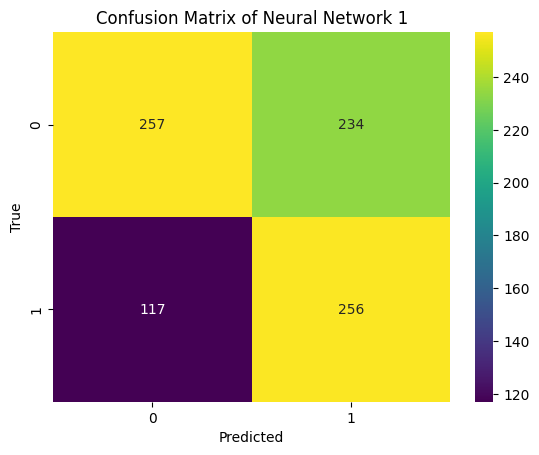

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step


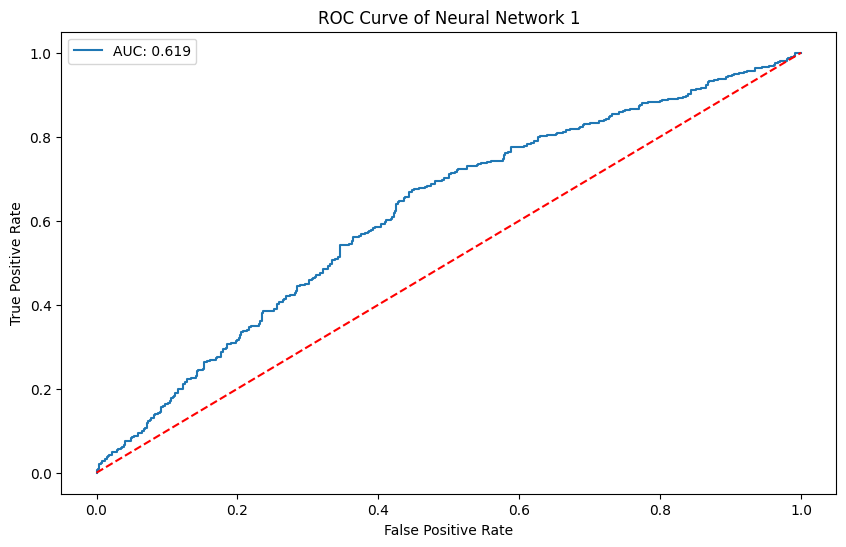

In [55]:
roc_auc_nn1 = roc_auc_score(y_test1, nn1.predict(X_test1))

cm_nn1 = confusion_matrix(y_test1, y_pred1)
sns.heatmap(cm_nn1, annot=True, cmap='viridis', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Neural Network 1')
plt.show()

roc_auc_nn1

fpr, tpr, thresholds = roc_curve(y_test1, nn1.predict(X_test1))
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC: {roc_auc_nn1:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Neural Network 1')
plt.legend()
plt.show()

In [56]:
study = optuna.load_study(study_name='Neural Network BAS 2', storage='sqlite:///optuna_study_nn2.db')
best_nn2 = study.best_params
use_resampled = best_nn2.pop('use_resampled')
nn2 = keras.models.Sequential()
nn2.add(keras.layers.InputLayer(shape=(X_train2_scaled.shape[1],)))
nn2.add(keras.layers.Dropout(best_nn2['dropout']))
nn2.add(keras.layers.Dense(best_nn2['neurons_first_layer'], activation=best_nn2['activation']))
nn2.add(keras.layers.Dropout(best_nn2['dropout']))
nn2.add(keras.layers.Dense(best_nn2['neurons_second_layer'], activation=best_nn2['activation']))
nn2.add(keras.layers.Dropout(best_nn2['dropout']))
nn2.add(keras.layers.Dense(best_nn2['neurons_third_layer'], activation=best_nn2['activation']))
if best_nn2['add_fourth_layer']:
    nn2.add(keras.layers.Dropout(best_nn2['dropout']))
    nn2.add(keras.layers.Dense(best_nn2['neurons_fourth_layer'], activation=best_nn2['activation']))
if best_nn2['add_fifth_layer']:
    nn2.add(keras.layers.Dropout(best_nn2['dropout']))
    nn2.add(keras.layers.Dense(best_nn2['neurons_fifth_layer'], activation=best_nn2['activation']))
nn2.add(keras.layers.Dense(1, activation='sigmoid'))

if best_nn2['optimizer'] == 'adam':
    opt = keras.optimizers.Adam(learning_rate=best_nn2['learning_rate'])
elif best_nn2['optimizer'] == 'rmsprop':
    opt = keras.optimizers.RMSprop(learning_rate=best_nn2['learning_rate'])
else:
    opt = keras.optimizers.SGD(learning_rate=best_nn2['learning_rate'])
    
nn2.compile(optimizer=opt, loss=best_nn2['loss'], metrics=[balanced_accuracy])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_balanced_accuracy', patience=20, restore_best_weights=True, mode='max')

if use_resampled:
    nn2.fit(X_train2_resampled, y_train2_resampled, validation_data=(X_val2, y_val2), batch_size=best_nn2['batch_size'],
            epochs=900, callbacks=[early_stopping], verbose=0)
else:
    nn2.fit(X_train2_scaled, y_train2, validation_data=(X_val2, y_val2), batch_size=best_nn2['batch_size'],
            epochs=900, callbacks=[early_stopping], verbose=0)
    
y_pred2 = nn2.predict(X_test2)
y_pred2 = np.round(y_pred2)

print(classification_report(y_test2, y_pred2))

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step
              precision    recall  f1-score   support

           0       0.84      0.55      0.67      1362
           1       0.35      0.70      0.47       470

    accuracy                           0.59      1832
   macro avg       0.60      0.63      0.57      1832
weighted avg       0.71      0.59      0.62      1832



58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step


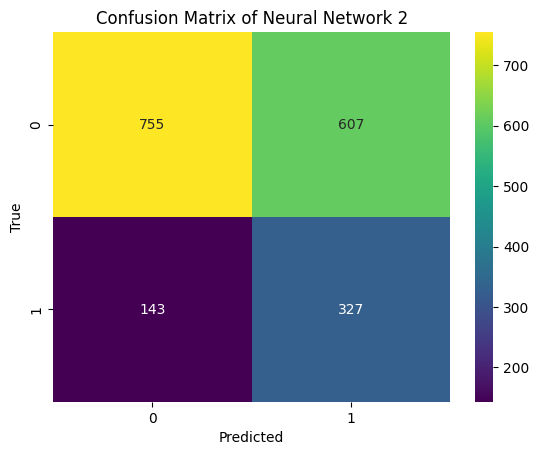

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step


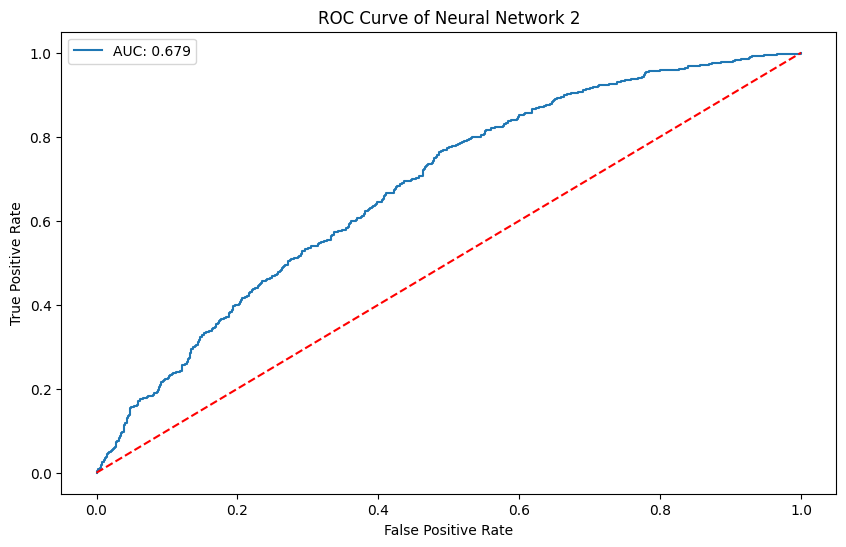

In [57]:
roc_auc_nn2 = roc_auc_score(y_test2, nn2.predict(X_test2))

cm_nn2 = confusion_matrix(y_test2, y_pred2)
sns.heatmap(cm_nn2, annot=True, cmap='viridis', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Neural Network 2')
plt.show()

roc_auc_nn2

fpr, tpr, thresholds = roc_curve(y_test2, nn2.predict(X_test2))
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC: {roc_auc_nn2:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Neural Network 2')
plt.legend()
plt.show()